In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import matplotlib.pyplot as plt
import numpy   as np
import cantera as ct

In [2]:
def ReactorOde_CVODE(t, y):
    print(t)

    #YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    #Y        = np.concatenate((y[1:], YEnd), axis=0)
    Y        = y[1:]

    gas_.TPY = y[0], P0, Y
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    #ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    ydot[1:] = wdot * gas_.molecular_weights / gas_.density

    return ydot

In [3]:
#### gas      = ct.Solution('gri30.yaml')
fuel     = "CH4"
oxidizer = "O2:0.21,N2:0.77,H:0.02"
gas      = ct.Solution('gri30.yaml')

P0      = ct.one_atm
T0      = 500.
gas.TP  = T0, P0
gas.set_equivalence_ratio(1., fuel, oxidizer)
r       = ct.IdealGasConstPressureReactor(gas)
Y0      = gas.Y

print(gas.h)

sim     = ct.ReactorNet([r])
sim.verbose = False

# limit advance when temperature difference is exceeded
delta_T_max = 10.
r.set_advance_limit('temperature', delta_T_max)

dt_max = 1e-6
t_end  = 1e-1

states = ct.SolutionArray(gas, extra=['t'])

gas_   = gas

print('{:10s} {:10s} {:10s} {:14s}'.format('t [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(0.0, r.T, r.thermo.P, r.thermo.u))
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time*1e3)
    print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(sim.time, r.T, r.thermo.P, r.thermo.u))
    dydt = ReactorOde_CVODE(sim.time, np.concatenate(([r.T], r.thermo.Y), axis=0))

116067.94210752581
t [s]      T [K]      P [Pa]     u [J/kg]      
 0.000e+00    500.000 101325.000  -36940.190470
 3.125e-08    506.160 101325.000  -38713.907978
3.125000002702647e-08
 6.250e-08    513.352 101325.000  -40809.423852
6.250000002702648e-08
 9.375e-08    520.664 101325.000  -42947.154611
9.375000002702647e-08
 1.250e-07    527.738 101325.000  -45017.096645
1.2500000002702646e-07
 1.563e-07    534.444 101325.000  -46979.683349
1.5625000002702645e-07
 1.875e-07    540.751 101325.000  -48824.989489
1.8750000002702644e-07
 2.188e-07    546.667 101325.000  -50555.381112
2.1875000002702644e-07
 2.500e-07    552.218 101325.000  -52177.997560
2.5000000002702643e-07
 2.813e-07    557.432 101325.000  -53701.465804
2.8125000002702645e-07
 3.438e-07    566.964 101325.000  -56485.203931
3.437500000270265e-07
 4.063e-07    575.474 101325.000  -58968.786074
4.062500000270265e-07
 4.688e-07    583.132 101325.000  -61202.743870
4.687500000270265e-07
 5.313e-07    590.072 101325.000  -6322

 7.121e-04    702.984 101325.000  -96356.350719
0.0007120937500000378
 7.131e-04    702.984 101325.000  -96356.400633
0.0007130937500000378
 7.141e-04    702.984 101325.000  -96356.450438
0.0007140937500000378
 7.151e-04    702.984 101325.000  -96356.500134
0.0007150937500000379
 7.161e-04    702.984 101325.000  -96356.549722
0.0007160937500000379
 7.171e-04    702.984 101325.000  -96356.599203
0.0007170937500000379
 7.181e-04    702.985 101325.000  -96356.648576
0.0007180937500000379
 7.191e-04    702.985 101325.000  -96356.697842
0.000719093750000038
 7.201e-04    702.985 101325.000  -96356.747001
0.000720093750000038
 7.211e-04    702.985 101325.000  -96356.796054
0.000721093750000038
 7.221e-04    702.985 101325.000  -96356.845001
0.000722093750000038
 7.231e-04    702.985 101325.000  -96356.893842
0.000723093750000038
 7.241e-04    702.986 101325.000  -96356.942578
0.0007240937500000381
 7.251e-04    702.986 101325.000  -96356.991209
0.0007250937500000381
 7.261e-04    702.986 101

 1.212e-03    703.037 101325.000  -96372.563946
0.0012120937500000243
 1.213e-03    703.037 101325.000  -96372.585040
0.0012130937500000243
 1.214e-03    703.037 101325.000  -96372.606105
0.0012140937500000242
 1.215e-03    703.038 101325.000  -96372.627141
0.001215093750000024
 1.216e-03    703.038 101325.000  -96372.648147
0.001216093750000024
 1.217e-03    703.038 101325.000  -96372.669124
0.001217093750000024
 1.218e-03    703.038 101325.000  -96372.690073
0.0012180937500000238
 1.219e-03    703.038 101325.000  -96372.710992
0.0012190937500000238
 1.220e-03    703.038 101325.000  -96372.731882
0.0012200937500000237
 1.221e-03    703.038 101325.000  -96372.752744
0.0012210937500000236
 1.222e-03    703.038 101325.000  -96372.773577
0.0012220937500000235
 1.223e-03    703.038 101325.000  -96372.794381
0.0012230937500000234
 1.224e-03    703.038 101325.000  -96372.815157
0.0012240937500000233
 1.225e-03    703.038 101325.000  -96372.835904
0.0012250937500000233
 1.226e-03    703.038 1

0.0017110937499999824
 1.712e-03    703.063 101325.000  -96380.405555
0.0017120937499999823
 1.713e-03    703.063 101325.000  -96380.417214
0.0017130937499999822
 1.714e-03    703.063 101325.000  -96380.428861
0.0017140937499999821
 1.715e-03    703.063 101325.000  -96380.440496
0.001715093749999982
 1.716e-03    703.063 101325.000  -96380.452119
0.001716093749999982
 1.717e-03    703.063 101325.000  -96380.463730
0.0017170937499999819
 1.718e-03    703.063 101325.000  -96380.475330
0.0017180937499999818
 1.719e-03    703.064 101325.000  -96380.486917
0.0017190937499999817
 1.720e-03    703.064 101325.000  -96380.498493
0.0017200937499999816
 1.721e-03    703.064 101325.000  -96380.510057
0.0017210937499999815
 1.722e-03    703.064 101325.000  -96380.521610
0.0017220937499999815
 1.723e-03    703.064 101325.000  -96380.533150
0.0017230937499999814
 1.724e-03    703.064 101325.000  -96380.544679
0.0017240937499999813
 1.725e-03    703.064 101325.000  -96380.556197
0.0017250937499999812


0.002211093749999996
 2.212e-03    703.079 101325.000  -96385.055090
0.002212093749999996
 2.213e-03    703.079 101325.000  -96385.062506
0.0022130937499999963
 2.214e-03    703.079 101325.000  -96385.069916
0.0022140937499999964
 2.215e-03    703.079 101325.000  -96385.077320
0.0022150937499999966
 2.216e-03    703.079 101325.000  -96385.084719
0.0022160937499999967
 2.217e-03    703.079 101325.000  -96385.092111
0.002217093749999997
 2.218e-03    703.079 101325.000  -96385.099498
0.002218093749999997
 2.219e-03    703.079 101325.000  -96385.106878
0.002219093749999997
 2.220e-03    703.079 101325.000  -96385.114253
0.0022200937499999972
 2.221e-03    703.079 101325.000  -96385.121621
0.0022210937499999974
 2.222e-03    703.079 101325.000  -96385.128984
0.0022220937499999975
 2.223e-03    703.079 101325.000  -96385.136341
0.0022230937499999976
 2.224e-03    703.079 101325.000  -96385.143692
0.0022240937499999978
 2.225e-03    703.079 101325.000  -96385.151037
0.002225093749999998
 2.2

 2.676e-03    703.088 101325.000  -96387.957063
0.0026760937500000578
 2.677e-03    703.088 101325.000  -96387.962336
0.002677093750000058
 2.678e-03    703.088 101325.000  -96387.967606
0.002678093750000058
 2.679e-03    703.088 101325.000  -96387.972873
0.002679093750000058
 2.680e-03    703.088 101325.000  -96387.978136
0.0026800937500000583
 2.681e-03    703.088 101325.000  -96387.983395
0.0026810937500000584
 2.682e-03    703.088 101325.000  -96387.988651
0.0026820937500000586
 2.683e-03    703.088 101325.000  -96387.993904
0.0026830937500000587
 2.684e-03    703.088 101325.000  -96387.999152
0.002684093750000059
 2.685e-03    703.088 101325.000  -96388.004398
0.002685093750000059
 2.686e-03    703.088 101325.000  -96388.009639
0.002686093750000059
 2.687e-03    703.088 101325.000  -96388.014878
0.0026870937500000592
 2.688e-03    703.088 101325.000  -96388.020113
0.0026880937500000594
 2.689e-03    703.088 101325.000  -96388.025344
0.0026890937500000595
 2.690e-03    703.089 1013

 2.988e-03    703.093 101325.000  -96389.447083
0.002988093750000099
 2.989e-03    703.093 101325.000  -96389.451406
0.0029890937500000993
 2.990e-03    703.093 101325.000  -96389.455726
0.0029900937500000994
 2.991e-03    703.093 101325.000  -96389.460044
0.0029910937500000996
 2.992e-03    703.093 101325.000  -96389.464359
0.0029920937500000997
 2.993e-03    703.093 101325.000  -96389.468672
0.0029930937500001
 2.994e-03    703.093 101325.000  -96389.472982
0.0029940937500001
 2.995e-03    703.093 101325.000  -96389.477290
0.0029950937500001
 2.996e-03    703.093 101325.000  -96389.481595
0.0029960937500001002
 2.997e-03    703.093 101325.000  -96389.485897
0.0029970937500001004
 2.998e-03    703.093 101325.000  -96389.490197
0.0029980937500001005
 2.999e-03    703.093 101325.000  -96389.494494
0.0029990937500001006
 3.000e-03    703.093 101325.000  -96389.498788
0.0030000937500001008
 3.001e-03    703.093 101325.000  -96389.503080
0.003001093750000101
 3.002e-03    703.093 101325.00

 3.400e-03    703.098 101325.000  -96391.032083
0.003400093750000154
 3.401e-03    703.098 101325.000  -96391.035505
0.003401093750000154
 3.402e-03    703.098 101325.000  -96391.038926
0.003402093750000154
 3.403e-03    703.098 101325.000  -96391.042346
0.0034030937500001543
 3.404e-03    703.098 101325.000  -96391.045763
0.0034040937500001544
 3.405e-03    703.098 101325.000  -96391.049179
0.0034050937500001545
 3.406e-03    703.099 101325.000  -96391.052592
0.0034060937500001547
 3.407e-03    703.099 101325.000  -96391.056004
0.003407093750000155
 3.408e-03    703.099 101325.000  -96391.059414
0.003408093750000155
 3.409e-03    703.099 101325.000  -96391.062823
0.003409093750000155
 3.410e-03    703.099 101325.000  -96391.066229
0.003410093750000155
 3.411e-03    703.099 101325.000  -96391.069634
0.0034110937500001553
 3.412e-03    703.099 101325.000  -96391.073037
0.0034120937500001555
 3.413e-03    703.099 101325.000  -96391.076438
0.0034130937500001556
 3.414e-03    703.099 10132

 3.740e-03    703.102 101325.000  -96392.099781
0.003740093750000199
 3.741e-03    703.102 101325.000  -96392.102662
0.003741093750000199
 3.742e-03    703.102 101325.000  -96392.105541
0.0037420937500001993
 3.743e-03    703.102 101325.000  -96392.108418
0.0037430937500001994
 3.744e-03    703.102 101325.000  -96392.111294
0.0037440937500001995
 3.745e-03    703.102 101325.000  -96392.114169
0.0037450937500001997
 3.746e-03    703.102 101325.000  -96392.117042
0.0037460937500002
 3.747e-03    703.102 101325.000  -96392.119914
0.0037470937500002
 3.748e-03    703.102 101325.000  -96392.122785
0.0037480937500002
 3.749e-03    703.102 101325.000  -96392.125654
0.0037490937500002
 3.750e-03    703.102 101325.000  -96392.128522
0.0037500937500002003
 3.751e-03    703.102 101325.000  -96392.131388
0.0037510937500002004
 3.752e-03    703.102 101325.000  -96392.134253
0.0037520937500002006
 3.753e-03    703.102 101325.000  -96392.137117
0.0037530937500002007
 3.754e-03    703.102 101325.000  

 4.111e-03    703.105 101325.000  -96393.080762
0.004111093750000248
 4.112e-03    703.105 101325.000  -96393.083189
0.004112093750000248
 4.113e-03    703.105 101325.000  -96393.085615
0.0041130937500002485
 4.114e-03    703.105 101325.000  -96393.088039
0.004114093750000249
 4.115e-03    703.105 101325.000  -96393.090463
0.004115093750000249
 4.116e-03    703.105 101325.000  -96393.092886
0.004116093750000249
 4.117e-03    703.105 101325.000  -96393.095307
0.004117093750000249
 4.118e-03    703.105 101325.000  -96393.097728
0.004118093750000249
 4.119e-03    703.105 101325.000  -96393.100147
0.004119093750000249
 4.120e-03    703.105 101325.000  -96393.102566
0.004120093750000249
 4.121e-03    703.105 101325.000  -96393.104983
0.0041210937500002496
 4.122e-03    703.105 101325.000  -96393.107399
0.00412209375000025
 4.123e-03    703.105 101325.000  -96393.109814
0.00412309375000025
 4.124e-03    703.105 101325.000  -96393.112228
0.00412409375000025
 4.125e-03    703.105 101325.000  -

 4.460e-03    703.108 101325.000  -96393.867629
0.0044600937500002946
 4.461e-03    703.108 101325.000  -96393.869723
0.004461093750000295
 4.462e-03    703.108 101325.000  -96393.871816
0.004462093750000295
 4.463e-03    703.108 101325.000  -96393.873909
0.004463093750000295
 4.464e-03    703.108 101325.000  -96393.876000
0.004464093750000295
 4.465e-03    703.108 101325.000  -96393.878091
0.004465093750000295
 4.466e-03    703.108 101325.000  -96393.880181
0.004466093750000295
 4.467e-03    703.108 101325.000  -96393.882270
0.0044670937500002955
 4.468e-03    703.108 101325.000  -96393.884358
0.004468093750000296
 4.469e-03    703.108 101325.000  -96393.886446
0.004469093750000296
 4.470e-03    703.108 101325.000  -96393.888532
0.004470093750000296
 4.471e-03    703.108 101325.000  -96393.890618
0.004471093750000296
 4.472e-03    703.108 101325.000  -96393.892703
0.004472093750000296
 4.473e-03    703.108 101325.000  -96393.894787
0.004473093750000296
 4.474e-03    703.108 101325.000

0.0047910937500003385
 4.792e-03    703.110 101325.000  -96394.519292
0.004792093750000339
 4.793e-03    703.110 101325.000  -96394.521132
0.004793093750000339
 4.794e-03    703.110 101325.000  -96394.522970
0.004794093750000339
 4.795e-03    703.110 101325.000  -96394.524808
0.004795093750000339
 4.796e-03    703.110 101325.000  -96394.526646
0.004796093750000339
 4.797e-03    703.110 101325.000  -96394.528482
0.004797093750000339
 4.798e-03    703.110 101325.000  -96394.530318
0.004798093750000339
 4.799e-03    703.110 101325.000  -96394.532154
0.0047990937500003395
 4.800e-03    703.110 101325.000  -96394.533988
0.00480009375000034
 4.801e-03    703.110 101325.000  -96394.535822
0.00480109375000034
 4.802e-03    703.110 101325.000  -96394.537655
0.00480209375000034
 4.803e-03    703.110 101325.000  -96394.539487
0.00480309375000034
 4.804e-03    703.110 101325.000  -96394.541319
0.00480409375000034
 4.805e-03    703.110 101325.000  -96394.543150
0.00480509375000034
 4.806e-03    703

0.005099093750000379
 5.100e-03    703.112 101325.000  -96395.054930
0.0051000937500003795
 5.101e-03    703.112 101325.000  -96395.056573
0.00510109375000038
 5.102e-03    703.112 101325.000  -96395.058217
0.00510209375000038
 5.103e-03    703.112 101325.000  -96395.059860
0.00510309375000038
 5.104e-03    703.112 101325.000  -96395.061502
0.00510409375000038
 5.105e-03    703.112 101325.000  -96395.063143
0.00510509375000038
 5.106e-03    703.112 101325.000  -96395.064784
0.00510609375000038
 5.107e-03    703.112 101325.000  -96395.066425
0.00510709375000038
 5.108e-03    703.112 101325.000  -96395.068065
0.0051080937500003806
 5.109e-03    703.112 101325.000  -96395.069704
0.005109093750000381
 5.110e-03    703.112 101325.000  -96395.071343
0.005110093750000381
 5.111e-03    703.112 101325.000  -96395.072981
0.005111093750000381
 5.112e-03    703.112 101325.000  -96395.074618
0.005112093750000381
 5.113e-03    703.112 101325.000  -96395.076255
0.005113093750000381
 5.114e-03    703.

 5.396e-03    703.113 101325.000  -96395.517491
0.005396093750000419
 5.397e-03    703.113 101325.000  -96395.518976
0.005397093750000419
 5.398e-03    703.113 101325.000  -96395.520461
0.005398093750000419
 5.399e-03    703.113 101325.000  -96395.521945
0.005399093750000419
 5.400e-03    703.113 101325.000  -96395.523429
0.005400093750000419
 5.401e-03    703.113 101325.000  -96395.524912
0.0054010937500004194
 5.402e-03    703.113 101325.000  -96395.526395
0.00540209375000042
 5.403e-03    703.113 101325.000  -96395.527877
0.00540309375000042
 5.404e-03    703.113 101325.000  -96395.529359
0.00540409375000042
 5.405e-03    703.113 101325.000  -96395.530840
0.00540509375000042
 5.406e-03    703.113 101325.000  -96395.532321
0.00540609375000042
 5.407e-03    703.113 101325.000  -96395.533801
0.00540709375000042
 5.408e-03    703.113 101325.000  -96395.535281
0.00540809375000042
 5.409e-03    703.113 101325.000  -96395.536760
0.0054090937500004205
 5.410e-03    703.113 101325.000  -9639

0.0057560937500004666
 5.757e-03    703.115 101325.000  -96396.023416
0.005757093750000467
 5.758e-03    703.115 101325.000  -96396.024738
0.005758093750000467
 5.759e-03    703.115 101325.000  -96396.026060
0.005759093750000467
 5.760e-03    703.115 101325.000  -96396.027381
0.005760093750000467
 5.761e-03    703.115 101325.000  -96396.028702
0.005761093750000467
 5.762e-03    703.115 101325.000  -96396.030023
0.005762093750000467
 5.763e-03    703.115 101325.000  -96396.031343
0.0057630937500004675
 5.764e-03    703.115 101325.000  -96396.032663
0.005764093750000468
 5.765e-03    703.115 101325.000  -96396.033982
0.005765093750000468
 5.766e-03    703.115 101325.000  -96396.035301
0.005766093750000468
 5.767e-03    703.115 101325.000  -96396.036620
0.005767093750000468
 5.768e-03    703.115 101325.000  -96396.037938
0.005768093750000468
 5.769e-03    703.115 101325.000  -96396.039256
0.005769093750000468
 5.770e-03    703.115 101325.000  -96396.040573
0.005770093750000468
 5.771e-03 

 6.100e-03    703.116 101325.000  -96396.454103
0.006100093750000512
 6.101e-03    703.116 101325.000  -96396.455295
0.006101093750000512
 6.102e-03    703.116 101325.000  -96396.456487
0.0061020937500005125
 6.103e-03    703.116 101325.000  -96396.457678
0.006103093750000513
 6.104e-03    703.116 101325.000  -96396.458870
0.006104093750000513
 6.105e-03    703.116 101325.000  -96396.460061
0.006105093750000513
 6.106e-03    703.116 101325.000  -96396.461251
0.006106093750000513
 6.107e-03    703.116 101325.000  -96396.462441
0.006107093750000513
 6.108e-03    703.116 101325.000  -96396.463631
0.006108093750000513
 6.109e-03    703.116 101325.000  -96396.464820
0.006109093750000513
 6.110e-03    703.116 101325.000  -96396.466009
0.0061100937500005136
 6.111e-03    703.116 101325.000  -96396.467198
0.006111093750000514
 6.112e-03    703.116 101325.000  -96396.468387
0.006112093750000514
 6.113e-03    703.116 101325.000  -96396.469575
0.006113093750000514
 6.114e-03    703.116 101325.000

 6.323e-03    703.117 101325.000  -96396.711622
0.006323093750000542
 6.324e-03    703.117 101325.000  -96396.712740
0.006324093750000542
 6.325e-03    703.117 101325.000  -96396.713858
0.006325093750000542
 6.326e-03    703.117 101325.000  -96396.714976
0.006326093750000542
 6.327e-03    703.117 101325.000  -96396.716093
0.006327093750000542
 6.328e-03    703.117 101325.000  -96396.717210
0.0063280937500005425
 6.329e-03    703.117 101325.000  -96396.718327
0.006329093750000543
 6.330e-03    703.117 101325.000  -96396.719443
0.006330093750000543
 6.331e-03    703.117 101325.000  -96396.720559
0.006331093750000543
 6.332e-03    703.117 101325.000  -96396.721675
0.006332093750000543
 6.333e-03    703.117 101325.000  -96396.722790
0.006333093750000543
 6.334e-03    703.117 101325.000  -96396.723905
0.006334093750000543
 6.335e-03    703.117 101325.000  -96396.725020
0.006335093750000543
 6.336e-03    703.117 101325.000  -96396.726135
0.0063360937500005435
 6.337e-03    703.117 101325.000

 6.602e-03    703.118 101325.000  -96397.011896
0.006602093750000579
 6.603e-03    703.118 101325.000  -96397.012932
0.006603093750000579
 6.604e-03    703.118 101325.000  -96397.013967
0.006604093750000579
 6.605e-03    703.118 101325.000  -96397.015002
0.006605093750000579
 6.606e-03    703.118 101325.000  -96397.016037
0.006606093750000579
 6.607e-03    703.118 101325.000  -96397.017072
0.0066070937500005795
 6.608e-03    703.118 101325.000  -96397.018106
0.00660809375000058
 6.609e-03    703.118 101325.000  -96397.019140
0.00660909375000058
 6.610e-03    703.118 101325.000  -96397.020174
0.00661009375000058
 6.611e-03    703.118 101325.000  -96397.021207
0.00661109375000058
 6.612e-03    703.118 101325.000  -96397.022240
0.00661209375000058
 6.613e-03    703.118 101325.000  -96397.023273
0.00661309375000058
 6.614e-03    703.118 101325.000  -96397.024306
0.0066140937500005804
 6.615e-03    703.118 101325.000  -96397.025338
0.006615093750000581
 6.616e-03    703.118 101325.000  -963

 6.885e-03    703.119 101325.000  -96397.294298
0.006885093750000616
 6.886e-03    703.119 101325.000  -96397.295259
0.0068860937500006165
 6.887e-03    703.119 101325.000  -96397.296220
0.006887093750000617
 6.888e-03    703.119 101325.000  -96397.297181
0.006888093750000617
 6.889e-03    703.119 101325.000  -96397.298142
0.006889093750000617
 6.890e-03    703.119 101325.000  -96397.299102
0.006890093750000617
 6.891e-03    703.119 101325.000  -96397.300062
0.006891093750000617
 6.892e-03    703.119 101325.000  -96397.301022
0.006892093750000617
 6.893e-03    703.119 101325.000  -96397.301982
0.0068930937500006175
 6.894e-03    703.119 101325.000  -96397.302941
0.006894093750000618
 6.895e-03    703.119 101325.000  -96397.303900
0.006895093750000618
 6.896e-03    703.119 101325.000  -96397.304859
0.006896093750000618
 6.897e-03    703.119 101325.000  -96397.305818
0.006897093750000618
 6.898e-03    703.119 101325.000  -96397.306776
0.006898093750000618
 6.899e-03    703.119 101325.000

 7.160e-03    703.120 101325.000  -96397.549704
0.007160093750000653
 7.161e-03    703.120 101325.000  -96397.550601
0.007161093750000653
 7.162e-03    703.120 101325.000  -96397.551498
0.007162093750000653
 7.163e-03    703.120 101325.000  -96397.552395
0.007163093750000653
 7.164e-03    703.120 101325.000  -96397.553291
0.0071640937500006534
 7.165e-03    703.120 101325.000  -96397.554187
0.007165093750000654
 7.166e-03    703.120 101325.000  -96397.555083
0.007166093750000654
 7.167e-03    703.120 101325.000  -96397.555979
0.007167093750000654
 7.168e-03    703.120 101325.000  -96397.556875
0.007168093750000654
 7.169e-03    703.120 101325.000  -96397.557770
0.007169093750000654
 7.170e-03    703.120 101325.000  -96397.558665
0.007170093750000654
 7.171e-03    703.120 101325.000  -96397.559560
0.007171093750000654
 7.172e-03    703.120 101325.000  -96397.560455
0.0071720937500006545
 7.173e-03    703.120 101325.000  -96397.561349
0.007173093750000655
 7.174e-03    703.120 101325.000

 7.428e-03    703.121 101325.000  -96397.782492
0.0074280937500006885
 7.429e-03    703.121 101325.000  -96397.783332
0.007429093750000689
 7.430e-03    703.121 101325.000  -96397.784173
0.007430093750000689
 7.431e-03    703.121 101325.000  -96397.785014
0.007431093750000689
 7.432e-03    703.121 101325.000  -96397.785854
0.007432093750000689
 7.433e-03    703.121 101325.000  -96397.786694
0.007433093750000689
 7.434e-03    703.121 101325.000  -96397.787534
0.007434093750000689
 7.435e-03    703.121 101325.000  -96397.788374
0.007435093750000689
 7.436e-03    703.121 101325.000  -96397.789213
0.0074360937500006895
 7.437e-03    703.121 101325.000  -96397.790052
0.00743709375000069
 7.438e-03    703.121 101325.000  -96397.790892
0.00743809375000069
 7.439e-03    703.121 101325.000  -96397.791731
0.00743909375000069
 7.440e-03    703.121 101325.000  -96397.792569
0.00744009375000069
 7.441e-03    703.121 101325.000  -96397.793408
0.00744109375000069
 7.442e-03    703.121 101325.000  -96

 7.692e-03    703.121 101325.000  -96397.997806
0.0076920937500007235
 7.693e-03    703.121 101325.000  -96397.998597
0.007693093750000724
 7.694e-03    703.121 101325.000  -96397.999388
0.007694093750000724
 7.695e-03    703.121 101325.000  -96398.000179
0.007695093750000724
 7.696e-03    703.121 101325.000  -96398.000969
0.007696093750000724
 7.697e-03    703.121 101325.000  -96398.001759
0.007697093750000724
 7.698e-03    703.121 101325.000  -96398.002549
0.007698093750000724
 7.699e-03    703.121 101325.000  -96398.003339
0.0076990937500007245
 7.700e-03    703.122 101325.000  -96398.004129
0.007700093750000725
 7.701e-03    703.122 101325.000  -96398.004918
0.007701093750000725
 7.702e-03    703.122 101325.000  -96398.005707
0.007702093750000725
 7.703e-03    703.122 101325.000  -96398.006497
0.007703093750000725
 7.704e-03    703.122 101325.000  -96398.007286
0.007704093750000725
 7.705e-03    703.122 101325.000  -96398.008074
0.007705093750000725
 7.706e-03    703.122 101325.000

 7.951e-03    703.122 101325.000  -96398.196824
0.007951093750000637
 7.952e-03    703.122 101325.000  -96398.197570
0.007952093750000637
 7.953e-03    703.122 101325.000  -96398.198317
0.007953093750000636
 7.954e-03    703.122 101325.000  -96398.199063
0.007954093750000635
 7.955e-03    703.122 101325.000  -96398.199809
0.007955093750000634
 7.956e-03    703.122 101325.000  -96398.200554
0.007956093750000634
 7.957e-03    703.122 101325.000  -96398.201300
0.007957093750000633
 7.958e-03    703.122 101325.000  -96398.202045
0.007958093750000632
 7.959e-03    703.122 101325.000  -96398.202791
0.007959093750000631
 7.960e-03    703.122 101325.000  -96398.203536
0.00796009375000063
 7.961e-03    703.122 101325.000  -96398.204281
0.00796109375000063
 7.962e-03    703.122 101325.000  -96398.205026
0.00796209375000063
 7.963e-03    703.122 101325.000  -96398.205770
0.007963093750000629
 7.964e-03    703.122 101325.000  -96398.206515
0.007964093750000628
 7.965e-03    703.122 101325.000  -96

 8.203e-03    703.123 101325.000  -96398.379893
0.008203093750000452
 8.204e-03    703.123 101325.000  -96398.380600
0.008204093750000451
 8.205e-03    703.123 101325.000  -96398.381307
0.00820509375000045
 8.206e-03    703.123 101325.000  -96398.382014
0.00820609375000045
 8.207e-03    703.123 101325.000  -96398.382720
0.00820709375000045
 8.208e-03    703.123 101325.000  -96398.383427
0.008208093750000449
 8.209e-03    703.123 101325.000  -96398.384133
0.008209093750000448
 8.210e-03    703.123 101325.000  -96398.384839
0.008210093750000447
 8.211e-03    703.123 101325.000  -96398.385545
0.008211093750000446
 8.212e-03    703.123 101325.000  -96398.386250
0.008212093750000446
 8.213e-03    703.123 101325.000  -96398.386956
0.008213093750000445
 8.214e-03    703.123 101325.000  -96398.387661
0.008214093750000444
 8.215e-03    703.123 101325.000  -96398.388367
0.008215093750000443
 8.216e-03    703.123 101325.000  -96398.389072
0.008216093750000443
 8.217e-03    703.123 101325.000  -96

 8.448e-03    703.123 101325.000  -96398.548737
0.008448093750000272
 8.449e-03    703.123 101325.000  -96398.549408
0.008449093750000271
 8.450e-03    703.123 101325.000  -96398.550080
0.00845009375000027
 8.451e-03    703.123 101325.000  -96398.550751
0.00845109375000027
 8.452e-03    703.123 101325.000  -96398.551423
0.00845209375000027
 8.453e-03    703.123 101325.000  -96398.552094
0.008453093750000269
 8.454e-03    703.123 101325.000  -96398.552765
0.008454093750000268
 8.455e-03    703.123 101325.000  -96398.553436
0.008455093750000267
 8.456e-03    703.123 101325.000  -96398.554107
0.008456093750000266
 8.457e-03    703.123 101325.000  -96398.554777
0.008457093750000266
 8.458e-03    703.123 101325.000  -96398.555448
0.008458093750000265
 8.459e-03    703.123 101325.000  -96398.556118
0.008459093750000264
 8.460e-03    703.123 101325.000  -96398.556788
0.008460093750000263
 8.461e-03    703.123 101325.000  -96398.557458
0.008461093750000263
 8.462e-03    703.123 101325.000  -96

 8.676e-03    703.124 101325.000  -96398.698414
0.008676093750000105
 8.677e-03    703.124 101325.000  -96398.699055
0.008677093750000104
 8.678e-03    703.124 101325.000  -96398.699697
0.008678093750000103
 8.679e-03    703.124 101325.000  -96398.700338
0.008679093750000103
 8.680e-03    703.124 101325.000  -96398.700979
0.008680093750000102
 8.681e-03    703.124 101325.000  -96398.701620
0.008681093750000101
 8.682e-03    703.124 101325.000  -96398.702261
0.0086820937500001
 8.683e-03    703.124 101325.000  -96398.702902
0.0086830937500001
 8.684e-03    703.124 101325.000  -96398.703542
0.008684093750000099
 8.685e-03    703.124 101325.000  -96398.704183
0.008685093750000098
 8.686e-03    703.124 101325.000  -96398.704823
0.008686093750000097
 8.687e-03    703.124 101325.000  -96398.705463
0.008687093750000097
 8.688e-03    703.124 101325.000  -96398.706103
0.008688093750000096
 8.689e-03    703.124 101325.000  -96398.706743
0.008689093750000095
 8.690e-03    703.124 101325.000  -963

 8.970e-03    703.124 101325.000  -96398.881681
0.008970093749999889
 8.971e-03    703.124 101325.000  -96398.882287
0.008971093749999888
 8.972e-03    703.124 101325.000  -96398.882892
0.008972093749999887
 8.973e-03    703.124 101325.000  -96398.883498
0.008973093749999887
 8.974e-03    703.124 101325.000  -96398.884103
0.008974093749999886
 8.975e-03    703.124 101325.000  -96398.884708
0.008975093749999885
 8.976e-03    703.124 101325.000  -96398.885313
0.008976093749999884
 8.977e-03    703.124 101325.000  -96398.885918
0.008977093749999884
 8.978e-03    703.124 101325.000  -96398.886523
0.008978093749999883
 8.979e-03    703.124 101325.000  -96398.887128
0.008979093749999882
 8.980e-03    703.124 101325.000  -96398.887732
0.008980093749999881
 8.981e-03    703.124 101325.000  -96398.888337
0.00898109374999988
 8.982e-03    703.124 101325.000  -96398.888941
0.00898209374999988
 8.983e-03    703.124 101325.000  -96398.889546
0.00898309374999988
 8.984e-03    703.124 101325.000  -96

 9.221e-03    703.125 101325.000  -96399.030158
0.009221093749999704
 9.222e-03    703.125 101325.000  -96399.030735
0.009222093749999704
 9.223e-03    703.125 101325.000  -96399.031313
0.009223093749999703
 9.224e-03    703.125 101325.000  -96399.031890
0.009224093749999702
 9.225e-03    703.125 101325.000  -96399.032468
0.009225093749999701
 9.226e-03    703.125 101325.000  -96399.033045
0.0092260937499997
 9.227e-03    703.125 101325.000  -96399.033622
0.0092270937499997
 9.228e-03    703.125 101325.000  -96399.034199
0.0092280937499997
 9.229e-03    703.125 101325.000  -96399.034776
0.009229093749999698
 9.230e-03    703.125 101325.000  -96399.035353
0.009230093749999698
 9.231e-03    703.125 101325.000  -96399.035930
0.009231093749999697
 9.232e-03    703.125 101325.000  -96399.036506
0.009232093749999696
 9.233e-03    703.125 101325.000  -96399.037083
0.009233093749999696
 9.234e-03    703.125 101325.000  -96399.037659
0.009234093749999695
 9.235e-03    703.125 101325.000  -96399

0.009455093749999532
 9.456e-03    703.125 101325.000  -96399.163027
0.009456093749999532
 9.457e-03    703.125 101325.000  -96399.163580
0.009457093749999531
 9.458e-03    703.125 101325.000  -96399.164134
0.00945809374999953
 9.459e-03    703.125 101325.000  -96399.164687
0.00945909374999953
 9.460e-03    703.125 101325.000  -96399.165240
0.009460093749999529
 9.461e-03    703.125 101325.000  -96399.165793
0.009461093749999528
 9.462e-03    703.125 101325.000  -96399.166346
0.009462093749999527
 9.463e-03    703.125 101325.000  -96399.166898
0.009463093749999527
 9.464e-03    703.125 101325.000  -96399.167451
0.009464093749999526
 9.465e-03    703.125 101325.000  -96399.168003
0.009465093749999525
 9.466e-03    703.125 101325.000  -96399.168556
0.009466093749999524
 9.467e-03    703.125 101325.000  -96399.169108
0.009467093749999524
 9.468e-03    703.125 101325.000  -96399.169660
0.009468093749999523
 9.469e-03    703.125 101325.000  -96399.170213
0.009469093749999522
 9.470e-03    7

 9.705e-03    703.126 101325.000  -96399.297798
0.009705093749999349
 9.706e-03    703.126 101325.000  -96399.298327
0.009706093749999348
 9.707e-03    703.126 101325.000  -96399.298856
0.009707093749999347
 9.708e-03    703.126 101325.000  -96399.299386
0.009708093749999347
 9.709e-03    703.126 101325.000  -96399.299915
0.009709093749999346
 9.710e-03    703.126 101325.000  -96399.300444
0.009710093749999345
 9.711e-03    703.126 101325.000  -96399.300973
0.009711093749999344
 9.712e-03    703.126 101325.000  -96399.301501
0.009712093749999344
 9.713e-03    703.126 101325.000  -96399.302030
0.009713093749999343
 9.714e-03    703.126 101325.000  -96399.302559
0.009714093749999342
 9.715e-03    703.126 101325.000  -96399.303087
0.009715093749999341
 9.716e-03    703.126 101325.000  -96399.303616
0.00971609374999934
 9.717e-03    703.126 101325.000  -96399.304144
0.00971709374999934
 9.718e-03    703.126 101325.000  -96399.304672
0.00971809374999934
 9.719e-03    703.126 101325.000  -96

 9.954e-03    703.126 101325.000  -96399.426815
0.009954093749999166
 9.955e-03    703.126 101325.000  -96399.427322
0.009955093749999165
 9.956e-03    703.126 101325.000  -96399.427829
0.009956093749999164
 9.957e-03    703.126 101325.000  -96399.428336
0.009957093749999164
 9.958e-03    703.126 101325.000  -96399.428843
0.009958093749999163
 9.959e-03    703.126 101325.000  -96399.429349
0.009959093749999162
 9.960e-03    703.126 101325.000  -96399.429856
0.009960093749999161
 9.961e-03    703.126 101325.000  -96399.430363
0.00996109374999916
 9.962e-03    703.126 101325.000  -96399.430869
0.00996209374999916
 9.963e-03    703.126 101325.000  -96399.431376
0.00996309374999916
 9.964e-03    703.126 101325.000  -96399.431882
0.009964093749999159
 9.965e-03    703.126 101325.000  -96399.432388
0.009965093749999158
 9.966e-03    703.126 101325.000  -96399.432894
0.009966093749999157
 9.967e-03    703.126 101325.000  -96399.433400
0.009967093749999156
 9.968e-03    703.126 101325.000  -96

 1.018e-02    703.127 101325.000  -96399.537317
0.010176093749999003
 1.018e-02    703.127 101325.000  -96399.537806
0.010177093749999002
 1.018e-02    703.127 101325.000  -96399.538294
0.010178093749999001
 1.018e-02    703.127 101325.000  -96399.538783
0.010179093749999
 1.018e-02    703.127 101325.000  -96399.539271
0.010180093749999
 1.018e-02    703.127 101325.000  -96399.539759
0.010181093749998999
 1.018e-02    703.127 101325.000  -96399.540247
0.010182093749998998
 1.018e-02    703.127 101325.000  -96399.540735
0.010183093749998998
 1.018e-02    703.127 101325.000  -96399.541223
0.010184093749998997
 1.019e-02    703.127 101325.000  -96399.541711
0.010185093749998996
 1.019e-02    703.127 101325.000  -96399.542199
0.010186093749998995
 1.019e-02    703.127 101325.000  -96399.542687
0.010187093749998995
 1.019e-02    703.127 101325.000  -96399.543174
0.010188093749998994
 1.019e-02    703.127 101325.000  -96399.543662
0.010189093749998993
 1.019e-02    703.127 101325.000  -96399

 1.041e-02    703.127 101325.000  -96399.648062
0.010407093749998833
 1.041e-02    703.127 101325.000  -96399.648532
0.010408093749998832
 1.041e-02    703.127 101325.000  -96399.649003
0.010409093749998832
 1.041e-02    703.127 101325.000  -96399.649473
0.010410093749998831
 1.041e-02    703.127 101325.000  -96399.649943
0.01041109374999883
 1.041e-02    703.127 101325.000  -96399.650413
0.01041209374999883
 1.041e-02    703.127 101325.000  -96399.650883
0.010413093749998829
 1.041e-02    703.127 101325.000  -96399.651353
0.010414093749998828
 1.042e-02    703.127 101325.000  -96399.651823
0.010415093749998827
 1.042e-02    703.127 101325.000  -96399.652293
0.010416093749998826
 1.042e-02    703.127 101325.000  -96399.652763
0.010417093749998826
 1.042e-02    703.127 101325.000  -96399.653232
0.010418093749998825
 1.042e-02    703.127 101325.000  -96399.653702
0.010419093749998824
 1.042e-02    703.127 101325.000  -96399.654171
0.010420093749998824
 1.042e-02    703.127 101325.000  -9

 1.062e-02    703.127 101325.000  -96399.747031
0.010621093749998676
 1.062e-02    703.127 101325.000  -96399.747486
0.010622093749998675
 1.062e-02    703.127 101325.000  -96399.747940
0.010623093749998674
 1.062e-02    703.127 101325.000  -96399.748395
0.010624093749998674
 1.063e-02    703.127 101325.000  -96399.748849
0.010625093749998673
 1.063e-02    703.127 101325.000  -96399.749304
0.010626093749998672
 1.063e-02    703.127 101325.000  -96399.749758
0.010627093749998671
 1.063e-02    703.127 101325.000  -96399.750212
0.01062809374999867
 1.063e-02    703.127 101325.000  -96399.750666
0.01062909374999867
 1.063e-02    703.127 101325.000  -96399.751120
0.01063009374999867
 1.063e-02    703.127 101325.000  -96399.751574
0.010631093749998669
 1.063e-02    703.127 101325.000  -96399.752028
0.010632093749998668
 1.063e-02    703.127 101325.000  -96399.752482
0.010633093749998667
 1.063e-02    703.127 101325.000  -96399.752936
0.010634093749998666
 1.064e-02    703.127 101325.000  -96

 1.085e-02    703.128 101325.000  -96399.848865
0.010849093749998508
 1.085e-02    703.128 101325.000  -96399.849303
0.010850093749998508
 1.085e-02    703.128 101325.000  -96399.849742
0.010851093749998507
 1.085e-02    703.128 101325.000  -96399.850181
0.010852093749998506
 1.085e-02    703.128 101325.000  -96399.850619
0.010853093749998505
 1.085e-02    703.128 101325.000  -96399.851058
0.010854093749998505
 1.086e-02    703.128 101325.000  -96399.851496
0.010855093749998504
 1.086e-02    703.128 101325.000  -96399.851934
0.010856093749998503
 1.086e-02    703.128 101325.000  -96399.852373
0.010857093749998502
 1.086e-02    703.128 101325.000  -96399.852811
0.010858093749998502
 1.086e-02    703.128 101325.000  -96399.853249
0.010859093749998501
 1.086e-02    703.128 101325.000  -96399.853687
0.0108600937499985
 1.086e-02    703.128 101325.000  -96399.854125
0.0108610937499985
 1.086e-02    703.128 101325.000  -96399.854563
0.010862093749998499
 1.086e-02    703.128 101325.000  -963

0.011063093749998351
 1.106e-02    703.128 101325.000  -96399.941672
0.01106409374999835
 1.107e-02    703.128 101325.000  -96399.942097
0.01106509374999835
 1.107e-02    703.128 101325.000  -96399.942522
0.011066093749998349
 1.107e-02    703.128 101325.000  -96399.942946
0.011067093749998348
 1.107e-02    703.128 101325.000  -96399.943371
0.011068093749998347
 1.107e-02    703.128 101325.000  -96399.943795
0.011069093749998347
 1.107e-02    703.128 101325.000  -96399.944219
0.011070093749998346
 1.107e-02    703.128 101325.000  -96399.944644
0.011071093749998345
 1.107e-02    703.128 101325.000  -96399.945068
0.011072093749998345
 1.107e-02    703.128 101325.000  -96399.945492
0.011073093749998344
 1.107e-02    703.128 101325.000  -96399.945916
0.011074093749998343
 1.108e-02    703.128 101325.000  -96399.946340
0.011075093749998342
 1.108e-02    703.128 101325.000  -96399.946764
0.011076093749998342
 1.108e-02    703.128 101325.000  -96399.947188
0.011077093749998341
 1.108e-02    7

 1.126e-02    703.128 101325.000  -96400.024527
0.011262093749998205
 1.126e-02    703.128 101325.000  -96400.024940
0.011263093749998204
 1.126e-02    703.128 101325.000  -96400.025352
0.011264093749998203
 1.127e-02    703.128 101325.000  -96400.025764
0.011265093749998203
 1.127e-02    703.128 101325.000  -96400.026176
0.011266093749998202
 1.127e-02    703.128 101325.000  -96400.026588
0.011267093749998201
 1.127e-02    703.128 101325.000  -96400.027000
0.0112680937499982
 1.127e-02    703.128 101325.000  -96400.027412
0.0112690937499982
 1.127e-02    703.128 101325.000  -96400.027824
0.011270093749998199
 1.127e-02    703.128 101325.000  -96400.028236
0.011271093749998198
 1.127e-02    703.128 101325.000  -96400.028648
0.011272093749998198
 1.127e-02    703.128 101325.000  -96400.029060
0.011273093749998197
 1.127e-02    703.128 101325.000  -96400.029471
0.011274093749998196
 1.128e-02    703.128 101325.000  -96400.029883
0.011275093749998195
 1.128e-02    703.128 101325.000  -964

 1.148e-02    703.128 101325.000  -96400.113802
0.011482093749998043
 1.148e-02    703.128 101325.000  -96400.114202
0.011483093749998043
 1.148e-02    703.128 101325.000  -96400.114601
0.011484093749998042
 1.149e-02    703.128 101325.000  -96400.115000
0.011485093749998041
 1.149e-02    703.128 101325.000  -96400.115399
0.01148609374999804
 1.149e-02    703.128 101325.000  -96400.115799
0.01148709374999804
 1.149e-02    703.128 101325.000  -96400.116198
0.011488093749998039
 1.149e-02    703.128 101325.000  -96400.116597
0.011489093749998038
 1.149e-02    703.128 101325.000  -96400.116996
0.011490093749998037
 1.149e-02    703.128 101325.000  -96400.117394
0.011491093749998037
 1.149e-02    703.128 101325.000  -96400.117793
0.011492093749998036
 1.149e-02    703.128 101325.000  -96400.118192
0.011493093749998035
 1.149e-02    703.128 101325.000  -96400.118591
0.011494093749998035
 1.150e-02    703.128 101325.000  -96400.118989
0.011495093749998034
 1.150e-02    703.128 101325.000  -9

 1.173e-02    703.129 101325.000  -96400.209956
0.011727093749997863
 1.173e-02    703.129 101325.000  -96400.210342
0.011728093749997863
 1.173e-02    703.129 101325.000  -96400.210728
0.011729093749997862
 1.173e-02    703.129 101325.000  -96400.211113
0.011730093749997861
 1.173e-02    703.129 101325.000  -96400.211499
0.01173109374999786
 1.173e-02    703.129 101325.000  -96400.211884
0.01173209374999786
 1.173e-02    703.129 101325.000  -96400.212270
0.011733093749997859
 1.173e-02    703.129 101325.000  -96400.212655
0.011734093749997858
 1.174e-02    703.129 101325.000  -96400.213040
0.011735093749997857
 1.174e-02    703.129 101325.000  -96400.213425
0.011736093749997857
 1.174e-02    703.129 101325.000  -96400.213811
0.011737093749997856
 1.174e-02    703.129 101325.000  -96400.214196
0.011738093749997855
 1.174e-02    703.129 101325.000  -96400.214581
0.011739093749997855
 1.174e-02    703.129 101325.000  -96400.214966
0.011740093749997854
 1.174e-02    703.129 101325.000  -9

0.011952093749997698
 1.195e-02    703.129 101325.000  -96400.295769
0.011953093749997697
 1.195e-02    703.129 101325.000  -96400.296143
0.011954093749997697
 1.196e-02    703.129 101325.000  -96400.296517
0.011955093749997696
 1.196e-02    703.129 101325.000  -96400.296891
0.011956093749997695
 1.196e-02    703.129 101325.000  -96400.297264
0.011957093749997694
 1.196e-02    703.129 101325.000  -96400.297638
0.011958093749997694
 1.196e-02    703.129 101325.000  -96400.298011
0.011959093749997693
 1.196e-02    703.129 101325.000  -96400.298385
0.011960093749997692
 1.196e-02    703.129 101325.000  -96400.298758
0.011961093749997691
 1.196e-02    703.129 101325.000  -96400.299132
0.01196209374999769
 1.196e-02    703.129 101325.000  -96400.299505
0.01196309374999769
 1.196e-02    703.129 101325.000  -96400.299878
0.01196409374999769
 1.197e-02    703.129 101325.000  -96400.300251
0.011965093749997689
 1.197e-02    703.129 101325.000  -96400.300625
0.011966093749997688
 1.197e-02    70

 1.219e-02    703.129 101325.000  -96400.382226
0.012188093749997525
 1.219e-02    703.129 101325.000  -96400.382588
0.012189093749997524
 1.219e-02    703.129 101325.000  -96400.382950
0.012190093749997523
 1.219e-02    703.129 101325.000  -96400.383312
0.012191093749997522
 1.219e-02    703.129 101325.000  -96400.383674
0.012192093749997522
 1.219e-02    703.129 101325.000  -96400.384036
0.012193093749997521
 1.219e-02    703.129 101325.000  -96400.384398
0.01219409374999752
 1.220e-02    703.129 101325.000  -96400.384759
0.01219509374999752
 1.220e-02    703.129 101325.000  -96400.385121
0.012196093749997519
 1.220e-02    703.129 101325.000  -96400.385483
0.012197093749997518
 1.220e-02    703.129 101325.000  -96400.385844
0.012198093749997517
 1.220e-02    703.129 101325.000  -96400.386206
0.012199093749997517
 1.220e-02    703.129 101325.000  -96400.386568
0.012200093749997516
 1.220e-02    703.129 101325.000  -96400.386929
0.012201093749997515
 1.220e-02    703.129 101325.000  -9

 1.239e-02    703.130 101325.000  -96400.452633
0.01238509374999738
 1.239e-02    703.130 101325.000  -96400.452986
0.01238609374999738
 1.239e-02    703.130 101325.000  -96400.453338
0.012387093749997379
 1.239e-02    703.130 101325.000  -96400.453691
0.012388093749997378
 1.239e-02    703.130 101325.000  -96400.454044
0.012389093749997377
 1.239e-02    703.130 101325.000  -96400.454396
0.012390093749997376
 1.239e-02    703.130 101325.000  -96400.454749
0.012391093749997376
 1.239e-02    703.130 101325.000  -96400.455101
0.012392093749997375
 1.239e-02    703.130 101325.000  -96400.455454
0.012393093749997374
 1.239e-02    703.130 101325.000  -96400.455806
0.012394093749997373
 1.240e-02    703.130 101325.000  -96400.456158
0.012395093749997373
 1.240e-02    703.130 101325.000  -96400.456511
0.012396093749997372
 1.240e-02    703.130 101325.000  -96400.456863
0.012397093749997371
 1.240e-02    703.130 101325.000  -96400.457215
0.01239809374999737
 1.240e-02    703.130 101325.000  -96

 1.256e-02    703.130 101325.000  -96400.514701
0.01256309374999725
 1.256e-02    703.130 101325.000  -96400.515046
0.012564093749997248
 1.257e-02    703.130 101325.000  -96400.515391
0.012565093749997248
 1.257e-02    703.130 101325.000  -96400.515735
0.012566093749997247
 1.257e-02    703.130 101325.000  -96400.516080
0.012567093749997246
 1.257e-02    703.130 101325.000  -96400.516424
0.012568093749997246
 1.257e-02    703.130 101325.000  -96400.516769
0.012569093749997245
 1.257e-02    703.130 101325.000  -96400.517113
0.012570093749997244
 1.257e-02    703.130 101325.000  -96400.517458
0.012571093749997243
 1.257e-02    703.130 101325.000  -96400.517802
0.012572093749997243
 1.257e-02    703.130 101325.000  -96400.518146
0.012573093749997242
 1.257e-02    703.130 101325.000  -96400.518490
0.012574093749997241
 1.258e-02    703.130 101325.000  -96400.518834
0.01257509374999724
 1.258e-02    703.130 101325.000  -96400.519179
0.01257609374999724
 1.258e-02    703.130 101325.000  -96

 1.276e-02    703.130 101325.000  -96400.581082
0.012758093749997106
 1.276e-02    703.130 101325.000  -96400.581418
0.012759093749997105
 1.276e-02    703.130 101325.000  -96400.581755
0.012760093749997104
 1.276e-02    703.130 101325.000  -96400.582091
0.012761093749997104
 1.276e-02    703.130 101325.000  -96400.582427
0.012762093749997103
 1.276e-02    703.130 101325.000  -96400.582763
0.012763093749997102
 1.276e-02    703.130 101325.000  -96400.583099
0.012764093749997102
 1.277e-02    703.130 101325.000  -96400.583435
0.0127650937499971
 1.277e-02    703.130 101325.000  -96400.583771
0.0127660937499971
 1.277e-02    703.130 101325.000  -96400.584106
0.0127670937499971
 1.277e-02    703.130 101325.000  -96400.584442
0.012768093749997099
 1.277e-02    703.130 101325.000  -96400.584778
0.012769093749997098
 1.277e-02    703.130 101325.000  -96400.585114
0.012770093749997097
 1.277e-02    703.130 101325.000  -96400.585449
0.012771093749997096
 1.277e-02    703.130 101325.000  -96400

0.01294409374999697
 1.295e-02    703.130 101325.000  -96400.643218
0.012945093749996969
 1.295e-02    703.130 101325.000  -96400.643547
0.012946093749996968
 1.295e-02    703.130 101325.000  -96400.643875
0.012947093749996967
 1.295e-02    703.130 101325.000  -96400.644203
0.012948093749996966
 1.295e-02    703.130 101325.000  -96400.644531
0.012949093749996966
 1.295e-02    703.130 101325.000  -96400.644860
0.012950093749996965
 1.295e-02    703.130 101325.000  -96400.645188
0.012951093749996964
 1.295e-02    703.130 101325.000  -96400.645516
0.012952093749996963
 1.295e-02    703.130 101325.000  -96400.645844
0.012953093749996963
 1.295e-02    703.130 101325.000  -96400.646172
0.012954093749996962
 1.296e-02    703.130 101325.000  -96400.646500
0.012955093749996961
 1.296e-02    703.130 101325.000  -96400.646828
0.01295609374999696
 1.296e-02    703.130 101325.000  -96400.647156
0.01295709374999696
 1.296e-02    703.130 101325.000  -96400.647484
0.012958093749996959
 1.296e-02    70

 1.313e-02    703.130 101325.000  -96400.704246
0.01313309374999683
 1.313e-02    703.130 101325.000  -96400.704567
0.01313409374999683
 1.314e-02    703.130 101325.000  -96400.704888
0.013135093749996829
 1.314e-02    703.130 101325.000  -96400.705209
0.013136093749996828
 1.314e-02    703.130 101325.000  -96400.705530
0.013137093749996828
 1.314e-02    703.130 101325.000  -96400.705850
0.013138093749996827
 1.314e-02    703.130 101325.000  -96400.706171
0.013139093749996826
 1.314e-02    703.130 101325.000  -96400.706492
0.013140093749996825
 1.314e-02    703.130 101325.000  -96400.706812
0.013141093749996825
 1.314e-02    703.130 101325.000  -96400.707133
0.013142093749996824
 1.314e-02    703.130 101325.000  -96400.707453
0.013143093749996823
 1.314e-02    703.130 101325.000  -96400.707774
0.013144093749996822
 1.315e-02    703.130 101325.000  -96400.708094
0.013145093749996822
 1.315e-02    703.130 101325.000  -96400.708415
0.013146093749996821
 1.315e-02    703.130 101325.000  -9

 1.330e-02    703.131 101325.000  -96400.756664
0.01329809374999671
 1.330e-02    703.131 101325.000  -96400.756979
0.013299093749996709
 1.330e-02    703.131 101325.000  -96400.757293
0.013300093749996708
 1.330e-02    703.131 101325.000  -96400.757608
0.013301093749996707
 1.330e-02    703.131 101325.000  -96400.757922
0.013302093749996706
 1.330e-02    703.131 101325.000  -96400.758237
0.013303093749996706
 1.330e-02    703.131 101325.000  -96400.758551
0.013304093749996705
 1.331e-02    703.131 101325.000  -96400.758865
0.013305093749996704
 1.331e-02    703.131 101325.000  -96400.759179
0.013306093749996703
 1.331e-02    703.131 101325.000  -96400.759494
0.013307093749996703
 1.331e-02    703.131 101325.000  -96400.759808
0.013308093749996702
 1.331e-02    703.131 101325.000  -96400.760122
0.013309093749996701
 1.331e-02    703.131 101325.000  -96400.760436
0.0133100937499967
 1.331e-02    703.131 101325.000  -96400.760750
0.0133110937499967
 1.331e-02    703.131 101325.000  -9640

 1.347e-02    703.131 101325.000  -96400.808669
0.013465093749996587
 1.347e-02    703.131 101325.000  -96400.808977
0.013466093749996586
 1.347e-02    703.131 101325.000  -96400.809285
0.013467093749996585
 1.347e-02    703.131 101325.000  -96400.809594
0.013468093749996584
 1.347e-02    703.131 101325.000  -96400.809902
0.013469093749996584
 1.347e-02    703.131 101325.000  -96400.810210
0.013470093749996583
 1.347e-02    703.131 101325.000  -96400.810518
0.013471093749996582
 1.347e-02    703.131 101325.000  -96400.810826
0.013472093749996581
 1.347e-02    703.131 101325.000  -96400.811134
0.01347309374999658
 1.347e-02    703.131 101325.000  -96400.811442
0.01347409374999658
 1.348e-02    703.131 101325.000  -96400.811750
0.01347509374999658
 1.348e-02    703.131 101325.000  -96400.812058
0.013476093749996578
 1.348e-02    703.131 101325.000  -96400.812366
0.013477093749996578
 1.348e-02    703.131 101325.000  -96400.812674
0.013478093749996577
 1.348e-02    703.131 101325.000  -96

 1.367e-02    703.131 101325.000  -96400.872321
0.013674093749996433
 1.368e-02    703.131 101325.000  -96400.872622
0.013675093749996432
 1.368e-02    703.131 101325.000  -96400.872922
0.013676093749996432
 1.368e-02    703.131 101325.000  -96400.873223
0.01367709374999643
 1.368e-02    703.131 101325.000  -96400.873524
0.01367809374999643
 1.368e-02    703.131 101325.000  -96400.873825
0.01367909374999643
 1.368e-02    703.131 101325.000  -96400.874125
0.013680093749996429
 1.368e-02    703.131 101325.000  -96400.874426
0.013681093749996428
 1.368e-02    703.131 101325.000  -96400.874726
0.013682093749996427
 1.368e-02    703.131 101325.000  -96400.875027
0.013683093749996426
 1.368e-02    703.131 101325.000  -96400.875328
0.013684093749996426
 1.369e-02    703.131 101325.000  -96400.875628
0.013685093749996425
 1.369e-02    703.131 101325.000  -96400.875928
0.013686093749996424
 1.369e-02    703.131 101325.000  -96400.876229
0.013687093749996423
 1.369e-02    703.131 101325.000  -96

 1.387e-02    703.131 101325.000  -96400.931800
0.013874093749996286
 1.388e-02    703.131 101325.000  -96400.932094
0.013875093749996285
 1.388e-02    703.131 101325.000  -96400.932388
0.013876093749996285
 1.388e-02    703.131 101325.000  -96400.932682
0.013877093749996284
 1.388e-02    703.131 101325.000  -96400.932976
0.013878093749996283
 1.388e-02    703.131 101325.000  -96400.933270
0.013879093749996282
 1.388e-02    703.131 101325.000  -96400.933564
0.013880093749996282
 1.388e-02    703.131 101325.000  -96400.933858
0.013881093749996281
 1.388e-02    703.131 101325.000  -96400.934151
0.01388209374999628
 1.388e-02    703.131 101325.000  -96400.934445
0.01388309374999628
 1.388e-02    703.131 101325.000  -96400.934739
0.013884093749996279
 1.389e-02    703.131 101325.000  -96400.935032
0.013885093749996278
 1.389e-02    703.131 101325.000  -96400.935326
0.013886093749996277
 1.389e-02    703.131 101325.000  -96400.935620
0.013887093749996277
 1.389e-02    703.131 101325.000  -9

 1.403e-02    703.131 101325.000  -96400.976682
0.014028093749996173
 1.403e-02    703.131 101325.000  -96400.976971
0.014029093749996172
 1.403e-02    703.131 101325.000  -96400.977260
0.014030093749996171
 1.403e-02    703.131 101325.000  -96400.977549
0.01403109374999617
 1.403e-02    703.131 101325.000  -96400.977837
0.01403209374999617
 1.403e-02    703.131 101325.000  -96400.978126
0.01403309374999617
 1.403e-02    703.131 101325.000  -96400.978415
0.014034093749996169
 1.404e-02    703.131 101325.000  -96400.978703
0.014035093749996168
 1.404e-02    703.131 101325.000  -96400.978992
0.014036093749996167
 1.404e-02    703.131 101325.000  -96400.979281
0.014037093749996166
 1.404e-02    703.131 101325.000  -96400.979569
0.014038093749996166
 1.404e-02    703.131 101325.000  -96400.979858
0.014039093749996165
 1.404e-02    703.131 101325.000  -96400.980146
0.014040093749996164
 1.404e-02    703.131 101325.000  -96400.980435
0.014041093749996163
 1.404e-02    703.131 101325.000  -96

0.014199093749996047
 1.420e-02    703.131 101325.000  -96401.025898
0.014200093749996047
 1.420e-02    703.131 101325.000  -96401.026182
0.014201093749996046
 1.420e-02    703.131 101325.000  -96401.026465
0.014202093749996045
 1.420e-02    703.131 101325.000  -96401.026748
0.014203093749996044
 1.420e-02    703.131 101325.000  -96401.027032
0.014204093749996044
 1.421e-02    703.131 101325.000  -96401.027315
0.014205093749996043
 1.421e-02    703.132 101325.000  -96401.027598
0.014206093749996042
 1.421e-02    703.132 101325.000  -96401.027881
0.014207093749996041
 1.421e-02    703.132 101325.000  -96401.028165
0.01420809374999604
 1.421e-02    703.132 101325.000  -96401.028448
0.01420909374999604
 1.421e-02    703.132 101325.000  -96401.028731
0.01421009374999604
 1.421e-02    703.132 101325.000  -96401.029014
0.014211093749996039
 1.421e-02    703.132 101325.000  -96401.029297
0.014212093749996038
 1.421e-02    703.132 101325.000  -96401.029580
0.014213093749996037
 1.421e-02    70

 1.436e-02    703.132 101325.000  -96401.070010
0.014357093749995931
 1.436e-02    703.132 101325.000  -96401.070289
0.01435809374999593
 1.436e-02    703.132 101325.000  -96401.070567
0.01435909374999593
 1.436e-02    703.132 101325.000  -96401.070846
0.014360093749995929
 1.436e-02    703.132 101325.000  -96401.071124
0.014361093749995928
 1.436e-02    703.132 101325.000  -96401.071403
0.014362093749995928
 1.436e-02    703.132 101325.000  -96401.071681
0.014363093749995927
 1.436e-02    703.132 101325.000  -96401.071959
0.014364093749995926
 1.437e-02    703.132 101325.000  -96401.072238
0.014365093749995925
 1.437e-02    703.132 101325.000  -96401.072516
0.014366093749995925
 1.437e-02    703.132 101325.000  -96401.072794
0.014367093749995924
 1.437e-02    703.132 101325.000  -96401.073072
0.014368093749995923
 1.437e-02    703.132 101325.000  -96401.073351
0.014369093749995922
 1.437e-02    703.132 101325.000  -96401.073629
0.014370093749995922
 1.437e-02    703.132 101325.000  -9

 1.451e-02    703.132 101325.000  -96401.113371
0.014514093749995816
 1.452e-02    703.132 101325.000  -96401.113645
0.014515093749995815
 1.452e-02    703.132 101325.000  -96401.113919
0.014516093749995814
 1.452e-02    703.132 101325.000  -96401.114193
0.014517093749995814
 1.452e-02    703.132 101325.000  -96401.114466
0.014518093749995813
 1.452e-02    703.132 101325.000  -96401.114740
0.014519093749995812
 1.452e-02    703.132 101325.000  -96401.115014
0.014520093749995812
 1.452e-02    703.132 101325.000  -96401.115287
0.01452109374999581
 1.452e-02    703.132 101325.000  -96401.115561
0.01452209374999581
 1.452e-02    703.132 101325.000  -96401.115835
0.01452309374999581
 1.452e-02    703.132 101325.000  -96401.116108
0.014524093749995809
 1.453e-02    703.132 101325.000  -96401.116382
0.014525093749995808
 1.453e-02    703.132 101325.000  -96401.116655
0.014526093749995807
 1.453e-02    703.132 101325.000  -96401.116929
0.014527093749995806
 1.453e-02    703.132 101325.000  -96

 1.467e-02    703.132 101325.000  -96401.154388
0.014665093749995705
 1.467e-02    703.132 101325.000  -96401.154657
0.014666093749995704
 1.467e-02    703.132 101325.000  -96401.154927
0.014667093749995704
 1.467e-02    703.132 101325.000  -96401.155196
0.014668093749995703
 1.467e-02    703.132 101325.000  -96401.155465
0.014669093749995702
 1.467e-02    703.132 101325.000  -96401.155735
0.014670093749995701
 1.467e-02    703.132 101325.000  -96401.156004
0.0146710937499957
 1.467e-02    703.132 101325.000  -96401.156273
0.0146720937499957
 1.467e-02    703.132 101325.000  -96401.156542
0.014673093749995699
 1.467e-02    703.132 101325.000  -96401.156812
0.014674093749995698
 1.468e-02    703.132 101325.000  -96401.157081
0.014675093749995698
 1.468e-02    703.132 101325.000  -96401.157350
0.014676093749995697
 1.468e-02    703.132 101325.000  -96401.157619
0.014677093749995696
 1.468e-02    703.132 101325.000  -96401.157888
0.014678093749995695
 1.468e-02    703.132 101325.000  -964

 1.481e-02    703.132 101325.000  -96401.193158
0.014810093749995598
 1.481e-02    703.132 101325.000  -96401.193424
0.014811093749995598
 1.481e-02    703.132 101325.000  -96401.193689
0.014812093749995597
 1.481e-02    703.132 101325.000  -96401.193954
0.014813093749995596
 1.481e-02    703.132 101325.000  -96401.194220
0.014814093749995596
 1.482e-02    703.132 101325.000  -96401.194485
0.014815093749995595
 1.482e-02    703.132 101325.000  -96401.194750
0.014816093749995594
 1.482e-02    703.132 101325.000  -96401.195015
0.014817093749995593
 1.482e-02    703.132 101325.000  -96401.195280
0.014818093749995593
 1.482e-02    703.132 101325.000  -96401.195545
0.014819093749995592
 1.482e-02    703.132 101325.000  -96401.195811
0.014820093749995591
 1.482e-02    703.132 101325.000  -96401.196076
0.01482109374999559
 1.482e-02    703.132 101325.000  -96401.196341
0.01482209374999559
 1.482e-02    703.132 101325.000  -96401.196606
0.014823093749995589
 1.482e-02    703.132 101325.000  -9

 1.500e-02    703.132 101325.000  -96401.243076
0.015000093749995459
 1.500e-02    703.132 101325.000  -96401.243336
0.015001093749995458
 1.500e-02    703.132 101325.000  -96401.243596
0.015002093749995457
 1.500e-02    703.132 101325.000  -96401.243856
0.015003093749995457
 1.500e-02    703.132 101325.000  -96401.244116
0.015004093749995456
 1.501e-02    703.132 101325.000  -96401.244376
0.015005093749995455
 1.501e-02    703.132 101325.000  -96401.244636
0.015006093749995454
 1.501e-02    703.132 101325.000  -96401.244896
0.015007093749995454
 1.501e-02    703.132 101325.000  -96401.245156
0.015008093749995453
 1.501e-02    703.132 101325.000  -96401.245416
0.015009093749995452
 1.501e-02    703.132 101325.000  -96401.245676
0.015010093749995452
 1.501e-02    703.132 101325.000  -96401.245936
0.01501109374999545
 1.501e-02    703.132 101325.000  -96401.246196
0.01501209374999545
 1.501e-02    703.132 101325.000  -96401.246456
0.01501309374999545
 1.501e-02    703.132 101325.000  -96

 1.520e-02    703.132 101325.000  -96401.294572
0.015200093749995312
 1.520e-02    703.132 101325.000  -96401.294827
0.015201093749995311
 1.520e-02    703.132 101325.000  -96401.295081
0.01520209374999531
 1.520e-02    703.132 101325.000  -96401.295336
0.01520309374999531
 1.520e-02    703.132 101325.000  -96401.295591
0.015204093749995309
 1.521e-02    703.132 101325.000  -96401.295846
0.015205093749995308
 1.521e-02    703.132 101325.000  -96401.296100
0.015206093749995308
 1.521e-02    703.132 101325.000  -96401.296355
0.015207093749995307
 1.521e-02    703.132 101325.000  -96401.296610
0.015208093749995306
 1.521e-02    703.132 101325.000  -96401.296864
0.015209093749995305
 1.521e-02    703.132 101325.000  -96401.297119
0.015210093749995305
 1.521e-02    703.132 101325.000  -96401.297373
0.015211093749995304
 1.521e-02    703.132 101325.000  -96401.297628
0.015212093749995303
 1.521e-02    703.132 101325.000  -96401.297883
0.015213093749995302
 1.521e-02    703.132 101325.000  -9

 1.538e-02    703.133 101325.000  -96401.340280
0.015381093749995179
 1.538e-02    703.133 101325.000  -96401.340530
0.015382093749995178
 1.538e-02    703.133 101325.000  -96401.340780
0.015383093749995178
 1.538e-02    703.133 101325.000  -96401.341031
0.015384093749995177
 1.539e-02    703.133 101325.000  -96401.341281
0.015385093749995176
 1.539e-02    703.133 101325.000  -96401.341531
0.015386093749995175
 1.539e-02    703.133 101325.000  -96401.341781
0.015387093749995175
 1.539e-02    703.133 101325.000  -96401.342031
0.015388093749995174
 1.539e-02    703.133 101325.000  -96401.342281
0.015389093749995173
 1.539e-02    703.133 101325.000  -96401.342531
0.015390093749995172
 1.539e-02    703.133 101325.000  -96401.342781
0.015391093749995172
 1.539e-02    703.133 101325.000  -96401.343031
0.015392093749995171
 1.539e-02    703.133 101325.000  -96401.343281
0.01539309374999517
 1.539e-02    703.133 101325.000  -96401.343531
0.01539409374999517
 1.540e-02    703.133 101325.000  -9

 1.553e-02    703.133 101325.000  -96401.377536
0.015531093749995069
 1.553e-02    703.133 101325.000  -96401.377783
0.015532093749995068
 1.553e-02    703.133 101325.000  -96401.378029
0.015533093749995067
 1.553e-02    703.133 101325.000  -96401.378276
0.015534093749995067
 1.554e-02    703.133 101325.000  -96401.378522
0.015535093749995066
 1.554e-02    703.133 101325.000  -96401.378768
0.015536093749995065
 1.554e-02    703.133 101325.000  -96401.379015
0.015537093749995064
 1.554e-02    703.133 101325.000  -96401.379261
0.015538093749995064
 1.554e-02    703.133 101325.000  -96401.379508
0.015539093749995063
 1.554e-02    703.133 101325.000  -96401.379754
0.015540093749995062
 1.554e-02    703.133 101325.000  -96401.380000
0.015541093749995061
 1.554e-02    703.133 101325.000  -96401.380246
0.01554209374999506
 1.554e-02    703.133 101325.000  -96401.380493
0.01554309374999506
 1.554e-02    703.133 101325.000  -96401.380739
0.01554409374999506
 1.555e-02    703.133 101325.000  -96

 1.569e-02    703.133 101325.000  -96401.417156
0.015693093749995068
 1.569e-02    703.133 101325.000  -96401.417399
0.01569409374999507
 1.570e-02    703.133 101325.000  -96401.417642
0.01569509374999507
 1.570e-02    703.133 101325.000  -96401.417884
0.01569609374999507
 1.570e-02    703.133 101325.000  -96401.418127
0.015697093749995072
 1.570e-02    703.133 101325.000  -96401.418369
0.015698093749995073
 1.570e-02    703.133 101325.000  -96401.418612
0.015699093749995074
 1.570e-02    703.133 101325.000  -96401.418854
0.015700093749995075
 1.570e-02    703.133 101325.000  -96401.419097
0.015701093749995076
 1.570e-02    703.133 101325.000  -96401.419339
0.015702093749995077
 1.570e-02    703.133 101325.000  -96401.419582
0.015703093749995078
 1.570e-02    703.133 101325.000  -96401.419824
0.01570409374999508
 1.571e-02    703.133 101325.000  -96401.420066
0.01570509374999508
 1.571e-02    703.133 101325.000  -96401.420309
0.01570609374999508
 1.571e-02    703.133 101325.000  -96401

 1.583e-02    703.133 101325.000  -96401.450655
0.015832093749995207
 1.583e-02    703.133 101325.000  -96401.450895
0.015833093749995208
 1.583e-02    703.133 101325.000  -96401.451134
0.01583409374999521
 1.584e-02    703.133 101325.000  -96401.451373
0.01583509374999521
 1.584e-02    703.133 101325.000  -96401.451613
0.01583609374999521
 1.584e-02    703.133 101325.000  -96401.451852
0.015837093749995212
 1.584e-02    703.133 101325.000  -96401.452091
0.015838093749995213
 1.584e-02    703.133 101325.000  -96401.452330
0.015839093749995214
 1.584e-02    703.133 101325.000  -96401.452570
0.015840093749995215
 1.584e-02    703.133 101325.000  -96401.452809
0.015841093749995216
 1.584e-02    703.133 101325.000  -96401.453048
0.015842093749995217
 1.584e-02    703.133 101325.000  -96401.453287
0.015843093749995218
 1.584e-02    703.133 101325.000  -96401.453526
0.01584409374999522
 1.585e-02    703.133 101325.000  -96401.453765
0.01584509374999522
 1.585e-02    703.133 101325.000  -9640

 1.596e-02    703.133 101325.000  -96401.480871
0.015959093749995334
 1.596e-02    703.133 101325.000  -96401.481108
0.015960093749995335
 1.596e-02    703.133 101325.000  -96401.481344
0.015961093749995336
 1.596e-02    703.133 101325.000  -96401.481581
0.015962093749995337
 1.596e-02    703.133 101325.000  -96401.481817
0.015963093749995338
 1.596e-02    703.133 101325.000  -96401.482053
0.01596409374999534
 1.597e-02    703.133 101325.000  -96401.482290
0.01596509374999534
 1.597e-02    703.133 101325.000  -96401.482526
0.01596609374999534
 1.597e-02    703.133 101325.000  -96401.482762
0.015967093749995342
 1.597e-02    703.133 101325.000  -96401.482999
0.015968093749995343
 1.597e-02    703.133 101325.000  -96401.483235
0.015969093749995344
 1.597e-02    703.133 101325.000  -96401.483471
0.015970093749995345
 1.597e-02    703.133 101325.000  -96401.483707
0.015971093749995346
 1.597e-02    703.133 101325.000  -96401.483944
0.015972093749995347
 1.597e-02    703.133 101325.000  -96

 1.617e-02    703.133 101325.000  -96401.530966
0.016173093749995548
 1.617e-02    703.133 101325.000  -96401.531198
0.01617409374999555
 1.618e-02    703.133 101325.000  -96401.531430
0.01617509374999555
 1.618e-02    703.133 101325.000  -96401.531661
0.01617609374999555
 1.618e-02    703.133 101325.000  -96401.531893
0.016177093749995552
 1.618e-02    703.133 101325.000  -96401.532125
0.016178093749995553
 1.618e-02    703.133 101325.000  -96401.532356
0.016179093749995554
 1.618e-02    703.133 101325.000  -96401.532588
0.016180093749995555
 1.618e-02    703.133 101325.000  -96401.532819
0.016181093749995556
 1.618e-02    703.133 101325.000  -96401.533051
0.016182093749995557
 1.618e-02    703.133 101325.000  -96401.533282
0.016183093749995558
 1.618e-02    703.133 101325.000  -96401.533514
0.01618409374999556
 1.619e-02    703.133 101325.000  -96401.533745
0.01618509374999556
 1.619e-02    703.133 101325.000  -96401.533977
0.01618609374999556
 1.619e-02    703.133 101325.000  -96401

 1.643e-02    703.133 101325.000  -96401.589586
0.016429093749995804
 1.643e-02    703.133 101325.000  -96401.589812
0.016430093749995805
 1.643e-02    703.133 101325.000  -96401.590039
0.016431093749995806
 1.643e-02    703.133 101325.000  -96401.590265
0.016432093749995807
 1.643e-02    703.133 101325.000  -96401.590491
0.016433093749995808
 1.643e-02    703.133 101325.000  -96401.590717
0.01643409374999581
 1.644e-02    703.133 101325.000  -96401.590943
0.01643509374999581
 1.644e-02    703.133 101325.000  -96401.591169
0.01643609374999581
 1.644e-02    703.133 101325.000  -96401.591396
0.016437093749995812
 1.644e-02    703.133 101325.000  -96401.591622
0.016438093749995813
 1.644e-02    703.133 101325.000  -96401.591848
0.016439093749995814
 1.644e-02    703.133 101325.000  -96401.592074
0.016440093749995815
 1.644e-02    703.133 101325.000  -96401.592300
0.016441093749995816
 1.644e-02    703.133 101325.000  -96401.592526
0.016442093749995817
 1.644e-02    703.133 101325.000  -96

 1.661e-02    703.133 101325.000  -96401.629314
0.01660609374999598
 1.661e-02    703.133 101325.000  -96401.629537
0.016607093749995982
 1.661e-02    703.133 101325.000  -96401.629760
0.016608093749995983
 1.661e-02    703.133 101325.000  -96401.629982
0.016609093749995984
 1.661e-02    703.133 101325.000  -96401.630205
0.016610093749995985
 1.661e-02    703.133 101325.000  -96401.630427
0.016611093749995986
 1.661e-02    703.133 101325.000  -96401.630650
0.016612093749995987
 1.661e-02    703.133 101325.000  -96401.630872
0.016613093749995988
 1.661e-02    703.133 101325.000  -96401.631095
0.01661409374999599
 1.662e-02    703.133 101325.000  -96401.631317
0.01661509374999599
 1.662e-02    703.133 101325.000  -96401.631540
0.01661609374999599
 1.662e-02    703.133 101325.000  -96401.631762
0.016617093749995992
 1.662e-02    703.133 101325.000  -96401.631985
0.016618093749995993
 1.662e-02    703.133 101325.000  -96401.632207
0.016619093749995994
 1.662e-02    703.133 101325.000  -964

 1.677e-02    703.134 101325.000  -96401.665998
0.016772093749996147
 1.677e-02    703.134 101325.000  -96401.666217
0.016773093749996148
 1.677e-02    703.134 101325.000  -96401.666436
0.01677409374999615
 1.678e-02    703.134 101325.000  -96401.666656
0.01677509374999615
 1.678e-02    703.134 101325.000  -96401.666875
0.01677609374999615
 1.678e-02    703.134 101325.000  -96401.667094
0.016777093749996152
 1.678e-02    703.134 101325.000  -96401.667313
0.016778093749996153
 1.678e-02    703.134 101325.000  -96401.667533
0.016779093749996154
 1.678e-02    703.134 101325.000  -96401.667752
0.016780093749996155
 1.678e-02    703.134 101325.000  -96401.667971
0.016781093749996156
 1.678e-02    703.134 101325.000  -96401.668190
0.016782093749996157
 1.678e-02    703.134 101325.000  -96401.668409
0.016783093749996158
 1.678e-02    703.134 101325.000  -96401.668628
0.01678409374999616
 1.679e-02    703.134 101325.000  -96401.668847
0.01678509374999616
 1.679e-02    703.134 101325.000  -9640

 1.694e-02    703.134 101325.000  -96401.702356
0.016939093749996314
 1.694e-02    703.134 101325.000  -96401.702572
0.016940093749996315
 1.694e-02    703.134 101325.000  -96401.702788
0.016941093749996316
 1.694e-02    703.134 101325.000  -96401.703004
0.016942093749996317
 1.694e-02    703.134 101325.000  -96401.703220
0.016943093749996318
 1.694e-02    703.134 101325.000  -96401.703436
0.01694409374999632
 1.695e-02    703.134 101325.000  -96401.703652
0.01694509374999632
 1.695e-02    703.134 101325.000  -96401.703868
0.01694609374999632
 1.695e-02    703.134 101325.000  -96401.704084
0.016947093749996322
 1.695e-02    703.134 101325.000  -96401.704300
0.016948093749996323
 1.695e-02    703.134 101325.000  -96401.704516
0.016949093749996324
 1.695e-02    703.134 101325.000  -96401.704732
0.016950093749996325
 1.695e-02    703.134 101325.000  -96401.704948
0.016951093749996326
 1.695e-02    703.134 101325.000  -96401.705163
0.016952093749996327
 1.695e-02    703.134 101325.000  -96

 1.707e-02    703.134 101325.000  -96401.730716
0.017071093749996446
 1.707e-02    703.134 101325.000  -96401.730929
0.017072093749996447
 1.707e-02    703.134 101325.000  -96401.731143
0.017073093749996448
 1.707e-02    703.134 101325.000  -96401.731357
0.01707409374999645
 1.708e-02    703.134 101325.000  -96401.731570
0.01707509374999645
 1.708e-02    703.134 101325.000  -96401.731784
0.01707609374999645
 1.708e-02    703.134 101325.000  -96401.731997
0.017077093749996452
 1.708e-02    703.134 101325.000  -96401.732211
0.017078093749996453
 1.708e-02    703.134 101325.000  -96401.732424
0.017079093749996454
 1.708e-02    703.134 101325.000  -96401.732638
0.017080093749996455
 1.708e-02    703.134 101325.000  -96401.732851
0.017081093749996456
 1.708e-02    703.134 101325.000  -96401.733064
0.017082093749996457
 1.708e-02    703.134 101325.000  -96401.733278
0.017083093749996458
 1.708e-02    703.134 101325.000  -96401.733491
0.01708409374999646
 1.709e-02    703.134 101325.000  -964

 1.720e-02    703.134 101325.000  -96401.757694
0.017198093749996573
 1.720e-02    703.134 101325.000  -96401.757905
0.017199093749996574
 1.720e-02    703.134 101325.000  -96401.758116
0.017200093749996575
 1.720e-02    703.134 101325.000  -96401.758328
0.017201093749996576
 1.720e-02    703.134 101325.000  -96401.758539
0.017202093749996577
 1.720e-02    703.134 101325.000  -96401.758750
0.017203093749996578
 1.720e-02    703.134 101325.000  -96401.758961
0.01720409374999658
 1.721e-02    703.134 101325.000  -96401.759172
0.01720509374999658
 1.721e-02    703.134 101325.000  -96401.759383
0.01720609374999658
 1.721e-02    703.134 101325.000  -96401.759595
0.017207093749996582
 1.721e-02    703.134 101325.000  -96401.759806
0.017208093749996583
 1.721e-02    703.134 101325.000  -96401.760017
0.017209093749996584
 1.721e-02    703.134 101325.000  -96401.760228
0.017210093749996585
 1.721e-02    703.134 101325.000  -96401.760439
0.017211093749996586
 1.721e-02    703.134 101325.000  -96

 1.733e-02    703.134 101325.000  -96401.785630
0.017331093749996706
 1.733e-02    703.134 101325.000  -96401.785839
0.017332093749996707
 1.733e-02    703.134 101325.000  -96401.786048
0.017333093749996708
 1.733e-02    703.134 101325.000  -96401.786257
0.01733409374999671
 1.734e-02    703.134 101325.000  -96401.786465
0.01733509374999671
 1.734e-02    703.134 101325.000  -96401.786674
0.01733609374999671
 1.734e-02    703.134 101325.000  -96401.786883
0.017337093749996712
 1.734e-02    703.134 101325.000  -96401.787092
0.017338093749996713
 1.734e-02    703.134 101325.000  -96401.787300
0.017339093749996714
 1.734e-02    703.134 101325.000  -96401.787509
0.017340093749996715
 1.734e-02    703.134 101325.000  -96401.787718
0.017341093749996716
 1.734e-02    703.134 101325.000  -96401.787926
0.017342093749996717
 1.734e-02    703.134 101325.000  -96401.788135
0.017343093749996718
 1.734e-02    703.134 101325.000  -96401.788344
0.01734409374999672
 1.735e-02    703.134 101325.000  -964

 1.748e-02    703.134 101325.000  -96401.817375
0.01748409374999686
 1.749e-02    703.134 101325.000  -96401.817582
0.01748509374999686
 1.749e-02    703.134 101325.000  -96401.817788
0.01748609374999686
 1.749e-02    703.134 101325.000  -96401.817994
0.017487093749996862
 1.749e-02    703.134 101325.000  -96401.818200
0.017488093749996863
 1.749e-02    703.134 101325.000  -96401.818406
0.017489093749996864
 1.749e-02    703.134 101325.000  -96401.818612
0.017490093749996865
 1.749e-02    703.134 101325.000  -96401.818818
0.017491093749996866
 1.749e-02    703.134 101325.000  -96401.819024
0.017492093749996867
 1.749e-02    703.134 101325.000  -96401.819230
0.017493093749996868
 1.749e-02    703.134 101325.000  -96401.819436
0.01749409374999687
 1.750e-02    703.134 101325.000  -96401.819642
0.01749509374999687
 1.750e-02    703.134 101325.000  -96401.819848
0.01749609374999687
 1.750e-02    703.134 101325.000  -96401.820054
0.017497093749996872
 1.750e-02    703.134 101325.000  -96401

 1.765e-02    703.134 101325.000  -96401.850949
0.017648093749997023
 1.765e-02    703.134 101325.000  -96401.851152
0.017649093749997024
 1.765e-02    703.134 101325.000  -96401.851355
0.017650093749997025
 1.765e-02    703.134 101325.000  -96401.851558
0.017651093749997026
 1.765e-02    703.134 101325.000  -96401.851762
0.017652093749997027
 1.765e-02    703.134 101325.000  -96401.851965
0.017653093749997028
 1.765e-02    703.134 101325.000  -96401.852168
0.01765409374999703
 1.766e-02    703.134 101325.000  -96401.852371
0.01765509374999703
 1.766e-02    703.134 101325.000  -96401.852575
0.01765609374999703
 1.766e-02    703.134 101325.000  -96401.852778
0.017657093749997032
 1.766e-02    703.134 101325.000  -96401.852981
0.017658093749997033
 1.766e-02    703.134 101325.000  -96401.853184
0.017659093749997034
 1.766e-02    703.134 101325.000  -96401.853387
0.017660093749997035
 1.766e-02    703.134 101325.000  -96401.853590
0.017661093749997036
 1.766e-02    703.134 101325.000  -96

 1.781e-02    703.134 101325.000  -96401.884465
0.01781409374999719
 1.782e-02    703.134 101325.000  -96401.884665
0.01781509374999719
 1.782e-02    703.134 101325.000  -96401.884866
0.01781609374999719
 1.782e-02    703.134 101325.000  -96401.885066
0.017817093749997192
 1.782e-02    703.134 101325.000  -96401.885267
0.017818093749997193
 1.782e-02    703.134 101325.000  -96401.885467
0.017819093749997194
 1.782e-02    703.134 101325.000  -96401.885667
0.017820093749997195
 1.782e-02    703.134 101325.000  -96401.885868
0.017821093749997196
 1.782e-02    703.134 101325.000  -96401.886068
0.017822093749997197
 1.782e-02    703.134 101325.000  -96401.886269
0.017823093749997198
 1.782e-02    703.134 101325.000  -96401.886469
0.0178240937499972
 1.783e-02    703.134 101325.000  -96401.886669
0.0178250937499972
 1.783e-02    703.134 101325.000  -96401.886870
0.0178260937499972
 1.783e-02    703.134 101325.000  -96401.887070
0.017827093749997202
 1.783e-02    703.134 101325.000  -96401.88

0.017943093749997318
 1.794e-02    703.134 101325.000  -96401.910392
0.01794409374999732
 1.795e-02    703.134 101325.000  -96401.910591
0.01794509374999732
 1.795e-02    703.134 101325.000  -96401.910789
0.01794609374999732
 1.795e-02    703.134 101325.000  -96401.910987
0.017947093749997322
 1.795e-02    703.134 101325.000  -96401.911186
0.017948093749997323
 1.795e-02    703.134 101325.000  -96401.911384
0.017949093749997324
 1.795e-02    703.134 101325.000  -96401.911582
0.017950093749997325
 1.795e-02    703.134 101325.000  -96401.911780
0.017951093749997326
 1.795e-02    703.134 101325.000  -96401.911979
0.017952093749997327
 1.795e-02    703.134 101325.000  -96401.912177
0.017953093749997328
 1.795e-02    703.134 101325.000  -96401.912375
0.01795409374999733
 1.796e-02    703.134 101325.000  -96401.912573
0.01795509374999733
 1.796e-02    703.134 101325.000  -96401.912772
0.01795609374999733
 1.796e-02    703.134 101325.000  -96401.912970
0.017957093749997332
 1.796e-02    703.1

 1.808e-02    703.135 101325.000  -96401.938007
0.01808409374999746
 1.809e-02    703.135 101325.000  -96401.938203
0.01808509374999746
 1.809e-02    703.135 101325.000  -96401.938399
0.01808609374999746
 1.809e-02    703.135 101325.000  -96401.938595
0.018087093749997462
 1.809e-02    703.135 101325.000  -96401.938791
0.018088093749997463
 1.809e-02    703.135 101325.000  -96401.938987
0.018089093749997464
 1.809e-02    703.135 101325.000  -96401.939183
0.018090093749997465
 1.809e-02    703.135 101325.000  -96401.939379
0.018091093749997466
 1.809e-02    703.135 101325.000  -96401.939575
0.018092093749997467
 1.809e-02    703.135 101325.000  -96401.939771
0.018093093749997468
 1.809e-02    703.135 101325.000  -96401.939967
0.01809409374999747
 1.810e-02    703.135 101325.000  -96401.940163
0.01809509374999747
 1.810e-02    703.135 101325.000  -96401.940359
0.01809609374999747
 1.810e-02    703.135 101325.000  -96401.940555
0.018097093749997472
 1.810e-02    703.135 101325.000  -96401

 1.822e-02    703.135 101325.000  -96401.964922
0.018222093749997597
 1.822e-02    703.135 101325.000  -96401.965116
0.018223093749997598
 1.822e-02    703.135 101325.000  -96401.965310
0.0182240937499976
 1.823e-02    703.135 101325.000  -96401.965504
0.0182250937499976
 1.823e-02    703.135 101325.000  -96401.965698
0.0182260937499976
 1.823e-02    703.135 101325.000  -96401.965891
0.018227093749997602
 1.823e-02    703.135 101325.000  -96401.966085
0.018228093749997603
 1.823e-02    703.135 101325.000  -96401.966279
0.018229093749997604
 1.823e-02    703.135 101325.000  -96401.966473
0.018230093749997605
 1.823e-02    703.135 101325.000  -96401.966667
0.018231093749997606
 1.823e-02    703.135 101325.000  -96401.966861
0.018232093749997607
 1.823e-02    703.135 101325.000  -96401.967054
0.018233093749997608
 1.823e-02    703.135 101325.000  -96401.967248
0.01823409374999761
 1.824e-02    703.135 101325.000  -96401.967442
0.01823509374999761
 1.824e-02    703.135 101325.000  -96401.9

 1.835e-02    703.135 101325.000  -96401.989429
0.018349093749997724
 1.835e-02    703.135 101325.000  -96401.989621
0.018350093749997725
 1.835e-02    703.135 101325.000  -96401.989813
0.018351093749997726
 1.835e-02    703.135 101325.000  -96401.990005
0.018352093749997727
 1.835e-02    703.135 101325.000  -96401.990197
0.018353093749997728
 1.835e-02    703.135 101325.000  -96401.990389
0.01835409374999773
 1.836e-02    703.135 101325.000  -96401.990581
0.01835509374999773
 1.836e-02    703.135 101325.000  -96401.990773
0.01835609374999773
 1.836e-02    703.135 101325.000  -96401.990965
0.018357093749997732
 1.836e-02    703.135 101325.000  -96401.991156
0.018358093749997733
 1.836e-02    703.135 101325.000  -96401.991348
0.018359093749997734
 1.836e-02    703.135 101325.000  -96401.991540
0.018360093749997735
 1.836e-02    703.135 101325.000  -96401.991732
0.018361093749997736
 1.836e-02    703.135 101325.000  -96401.991924
0.018362093749997737
 1.836e-02    703.135 101325.000  -96

 1.848e-02    703.135 101325.000  -96402.013880
0.018477093749997852
 1.848e-02    703.135 101325.000  -96402.014070
0.018478093749997853
 1.848e-02    703.135 101325.000  -96402.014260
0.018479093749997854
 1.848e-02    703.135 101325.000  -96402.014450
0.018480093749997855
 1.848e-02    703.135 101325.000  -96402.014640
0.018481093749997856
 1.848e-02    703.135 101325.000  -96402.014830
0.018482093749997857
 1.848e-02    703.135 101325.000  -96402.015020
0.018483093749997858
 1.848e-02    703.135 101325.000  -96402.015210
0.01848409374999786
 1.849e-02    703.135 101325.000  -96402.015400
0.01848509374999786
 1.849e-02    703.135 101325.000  -96402.015590
0.01848609374999786
 1.849e-02    703.135 101325.000  -96402.015780
0.018487093749997862
 1.849e-02    703.135 101325.000  -96402.015970
0.018488093749997863
 1.849e-02    703.135 101325.000  -96402.016160
0.018489093749997864
 1.849e-02    703.135 101325.000  -96402.016350
0.018490093749997865
 1.849e-02    703.135 101325.000  -96

 1.862e-02    703.135 101325.000  -96402.041470
0.018623093749997998
 1.862e-02    703.135 101325.000  -96402.041658
0.018624093749998
 1.863e-02    703.135 101325.000  -96402.041846
0.018625093749998
 1.863e-02    703.135 101325.000  -96402.042034
0.018626093749998
 1.863e-02    703.135 101325.000  -96402.042221
0.018627093749998002
 1.863e-02    703.135 101325.000  -96402.042409
0.018628093749998003
 1.863e-02    703.135 101325.000  -96402.042597
0.018629093749998004
 1.863e-02    703.135 101325.000  -96402.042785
0.018630093749998005
 1.863e-02    703.135 101325.000  -96402.042973
0.018631093749998006
 1.863e-02    703.135 101325.000  -96402.043160
0.018632093749998007
 1.863e-02    703.135 101325.000  -96402.043348
0.018633093749998008
 1.863e-02    703.135 101325.000  -96402.043536
0.01863409374999801
 1.864e-02    703.135 101325.000  -96402.043724
0.01863509374999801
 1.864e-02    703.135 101325.000  -96402.043911
0.01863609374999801
 1.864e-02    703.135 101325.000  -96402.04409

 1.880e-02    703.135 101325.000  -96402.073758
0.01879609374999817
 1.880e-02    703.135 101325.000  -96402.073943
0.018797093749998172
 1.880e-02    703.135 101325.000  -96402.074129
0.018798093749998173
 1.880e-02    703.135 101325.000  -96402.074314
0.018799093749998174
 1.880e-02    703.135 101325.000  -96402.074500
0.018800093749998175
 1.880e-02    703.135 101325.000  -96402.074685
0.018801093749998176
 1.880e-02    703.135 101325.000  -96402.074870
0.018802093749998177
 1.880e-02    703.135 101325.000  -96402.075055
0.018803093749998178
 1.880e-02    703.135 101325.000  -96402.075241
0.01880409374999818
 1.881e-02    703.135 101325.000  -96402.075426
0.01880509374999818
 1.881e-02    703.135 101325.000  -96402.075611
0.01880609374999818
 1.881e-02    703.135 101325.000  -96402.075796
0.018807093749998182
 1.881e-02    703.135 101325.000  -96402.075982
0.018808093749998183
 1.881e-02    703.135 101325.000  -96402.076167
0.018809093749998184
 1.881e-02    703.135 101325.000  -964

 1.895e-02    703.135 101325.000  -96402.102873
0.01895409374999833
 1.896e-02    703.135 101325.000  -96402.103056
0.01895509374999833
 1.896e-02    703.135 101325.000  -96402.103239
0.01895609374999833
 1.896e-02    703.135 101325.000  -96402.103422
0.018957093749998332
 1.896e-02    703.135 101325.000  -96402.103605
0.018958093749998333
 1.896e-02    703.135 101325.000  -96402.103788
0.018959093749998334
 1.896e-02    703.135 101325.000  -96402.103972
0.018960093749998335
 1.896e-02    703.135 101325.000  -96402.104155
0.018961093749998336
 1.896e-02    703.135 101325.000  -96402.104338
0.018962093749998337
 1.896e-02    703.135 101325.000  -96402.104521
0.018963093749998338
 1.896e-02    703.135 101325.000  -96402.104704
0.01896409374999834
 1.897e-02    703.135 101325.000  -96402.104887
0.01896509374999834
 1.897e-02    703.135 101325.000  -96402.105070
0.01896609374999834
 1.897e-02    703.135 101325.000  -96402.105253
0.018967093749998342
 1.897e-02    703.135 101325.000  -96402

 1.910e-02    703.135 101325.000  -96402.128742
0.01909609374999847
 1.910e-02    703.135 101325.000  -96402.128923
0.019097093749998472
 1.910e-02    703.135 101325.000  -96402.129104
0.019098093749998473
 1.910e-02    703.135 101325.000  -96402.129285
0.019099093749998474
 1.910e-02    703.135 101325.000  -96402.129466
0.019100093749998475
 1.910e-02    703.135 101325.000  -96402.129648
0.019101093749998476
 1.910e-02    703.135 101325.000  -96402.129829
0.019102093749998477
 1.910e-02    703.135 101325.000  -96402.130010
0.019103093749998478
 1.910e-02    703.135 101325.000  -96402.130191
0.01910409374999848
 1.911e-02    703.135 101325.000  -96402.130372
0.01910509374999848
 1.911e-02    703.135 101325.000  -96402.130553
0.01910609374999848
 1.911e-02    703.135 101325.000  -96402.130734
0.019107093749998482
 1.911e-02    703.135 101325.000  -96402.130915
0.019108093749998483
 1.911e-02    703.135 101325.000  -96402.131096
0.019109093749998484
 1.911e-02    703.135 101325.000  -964

 1.923e-02    703.135 101325.000  -96402.152900
0.019230093749998605
 1.923e-02    703.135 101325.000  -96402.153080
0.019231093749998606
 1.923e-02    703.135 101325.000  -96402.153259
0.019232093749998607
 1.923e-02    703.135 101325.000  -96402.153439
0.019233093749998608
 1.923e-02    703.135 101325.000  -96402.153618
0.01923409374999861
 1.924e-02    703.135 101325.000  -96402.153797
0.01923509374999861
 1.924e-02    703.135 101325.000  -96402.153976
0.01923609374999861
 1.924e-02    703.135 101325.000  -96402.154156
0.019237093749998612
 1.924e-02    703.135 101325.000  -96402.154335
0.019238093749998613
 1.924e-02    703.135 101325.000  -96402.154514
0.019239093749998614
 1.924e-02    703.135 101325.000  -96402.154694
0.019240093749998615
 1.924e-02    703.135 101325.000  -96402.154873
0.019241093749998616
 1.924e-02    703.135 101325.000  -96402.155052
0.019242093749998617
 1.924e-02    703.135 101325.000  -96402.155231
0.019243093749998618
 1.924e-02    703.135 101325.000  -96

 1.936e-02    703.135 101325.000  -96402.176286
0.019361093749998736
 1.936e-02    703.135 101325.000  -96402.176463
0.019362093749998737
 1.936e-02    703.135 101325.000  -96402.176641
0.019363093749998738
 1.936e-02    703.135 101325.000  -96402.176818
0.01936409374999874
 1.937e-02    703.135 101325.000  -96402.176996
0.01936509374999874
 1.937e-02    703.135 101325.000  -96402.177174
0.01936609374999874
 1.937e-02    703.135 101325.000  -96402.177351
0.019367093749998742
 1.937e-02    703.135 101325.000  -96402.177529
0.019368093749998743
 1.937e-02    703.135 101325.000  -96402.177706
0.019369093749998744
 1.937e-02    703.135 101325.000  -96402.177884
0.019370093749998745
 1.937e-02    703.135 101325.000  -96402.178061
0.019371093749998746
 1.937e-02    703.135 101325.000  -96402.178239
0.019372093749998747
 1.937e-02    703.135 101325.000  -96402.178416
0.019373093749998748
 1.937e-02    703.135 101325.000  -96402.178594
0.01937409374999875
 1.938e-02    703.135 101325.000  -964

 1.950e-02    703.135 101325.000  -96402.200324
0.019497093749998872
 1.950e-02    703.135 101325.000  -96402.200500
0.019498093749998873
 1.950e-02    703.135 101325.000  -96402.200676
0.019499093749998874
 1.950e-02    703.135 101325.000  -96402.200852
0.019500093749998875
 1.950e-02    703.135 101325.000  -96402.201028
0.019501093749998876
 1.950e-02    703.135 101325.000  -96402.201204
0.019502093749998877
 1.950e-02    703.135 101325.000  -96402.201379
0.019503093749998878
 1.950e-02    703.135 101325.000  -96402.201555
0.01950409374999888
 1.951e-02    703.135 101325.000  -96402.201731
0.01950509374999888
 1.951e-02    703.135 101325.000  -96402.201907
0.01950609374999888
 1.951e-02    703.135 101325.000  -96402.202083
0.019507093749998882
 1.951e-02    703.135 101325.000  -96402.202258
0.019508093749998883
 1.951e-02    703.135 101325.000  -96402.202434
0.019509093749998884
 1.951e-02    703.135 101325.000  -96402.202610
0.019510093749998885
 1.951e-02    703.135 101325.000  -96

 1.963e-02    703.135 101325.000  -96402.222731
0.019625093749999
 1.963e-02    703.135 101325.000  -96402.222906
0.019626093749999
 1.963e-02    703.135 101325.000  -96402.223080
0.019627093749999002
 1.963e-02    703.135 101325.000  -96402.223254
0.019628093749999003
 1.963e-02    703.135 101325.000  -96402.223428
0.019629093749999004
 1.963e-02    703.135 101325.000  -96402.223602
0.019630093749999005
 1.963e-02    703.135 101325.000  -96402.223776
0.019631093749999006
 1.963e-02    703.135 101325.000  -96402.223951
0.019632093749999007
 1.963e-02    703.135 101325.000  -96402.224125
0.019633093749999008
 1.963e-02    703.135 101325.000  -96402.224299
0.01963409374999901
 1.964e-02    703.135 101325.000  -96402.224473
0.01963509374999901
 1.964e-02    703.135 101325.000  -96402.224647
0.01963609374999901
 1.964e-02    703.135 101325.000  -96402.224821
0.019637093749999012
 1.964e-02    703.135 101325.000  -96402.224995
0.019638093749999013
 1.964e-02    703.135 101325.000  -96402.22

0.019768093749999143
 1.977e-02    703.136 101325.000  -96402.247691
0.019769093749999144
 1.977e-02    703.136 101325.000  -96402.247864
0.019770093749999145
 1.977e-02    703.136 101325.000  -96402.248036
0.019771093749999146
 1.977e-02    703.136 101325.000  -96402.248208
0.019772093749999147
 1.977e-02    703.136 101325.000  -96402.248381
0.019773093749999148
 1.977e-02    703.136 101325.000  -96402.248553
0.01977409374999915
 1.978e-02    703.136 101325.000  -96402.248725
0.01977509374999915
 1.978e-02    703.136 101325.000  -96402.248898
0.01977609374999915
 1.978e-02    703.136 101325.000  -96402.249070
0.019777093749999152
 1.978e-02    703.136 101325.000  -96402.249242
0.019778093749999153
 1.978e-02    703.136 101325.000  -96402.249415
0.019779093749999154
 1.978e-02    703.136 101325.000  -96402.249587
0.019780093749999155
 1.978e-02    703.136 101325.000  -96402.249759
0.019781093749999156
 1.978e-02    703.136 101325.000  -96402.249932
0.019782093749999157
 1.978e-02    70

 1.992e-02    703.136 101325.000  -96402.272735
0.01991509374999929
 1.992e-02    703.136 101325.000  -96402.272905
0.01991609374999929
 1.992e-02    703.136 101325.000  -96402.273076
0.019917093749999292
 1.992e-02    703.136 101325.000  -96402.273247
0.019918093749999293
 1.992e-02    703.136 101325.000  -96402.273417
0.019919093749999294
 1.992e-02    703.136 101325.000  -96402.273588
0.019920093749999295
 1.992e-02    703.136 101325.000  -96402.273758
0.019921093749999296
 1.992e-02    703.136 101325.000  -96402.273929
0.019922093749999297
 1.992e-02    703.136 101325.000  -96402.274100
0.019923093749999298
 1.992e-02    703.136 101325.000  -96402.274270
0.0199240937499993
 1.993e-02    703.136 101325.000  -96402.274441
0.0199250937499993
 1.993e-02    703.136 101325.000  -96402.274611
0.0199260937499993
 1.993e-02    703.136 101325.000  -96402.274782
0.019927093749999302
 1.993e-02    703.136 101325.000  -96402.274952
0.019928093749999303
 1.993e-02    703.136 101325.000  -96402.2

 2.005e-02    703.136 101325.000  -96402.295830
0.020051093749999426
 2.005e-02    703.136 101325.000  -96402.295999
0.020052093749999427
 2.005e-02    703.136 101325.000  -96402.296168
0.020053093749999428
 2.005e-02    703.136 101325.000  -96402.296337
0.02005409374999943
 2.006e-02    703.136 101325.000  -96402.296506
0.02005509374999943
 2.006e-02    703.136 101325.000  -96402.296675
0.02005609374999943
 2.006e-02    703.136 101325.000  -96402.296844
0.020057093749999432
 2.006e-02    703.136 101325.000  -96402.297013
0.020058093749999433
 2.006e-02    703.136 101325.000  -96402.297182
0.020059093749999434
 2.006e-02    703.136 101325.000  -96402.297351
0.020060093749999435
 2.006e-02    703.136 101325.000  -96402.297519
0.020061093749999436
 2.006e-02    703.136 101325.000  -96402.297688
0.020062093749999437
 2.006e-02    703.136 101325.000  -96402.297857
0.020063093749999438
 2.006e-02    703.136 101325.000  -96402.298026
0.02006409374999944
 2.007e-02    703.136 101325.000  -964

 2.019e-02    703.136 101325.000  -96402.318537
0.02018609374999956
 2.019e-02    703.136 101325.000  -96402.318704
0.020187093749999562
 2.019e-02    703.136 101325.000  -96402.318872
0.020188093749999563
 2.019e-02    703.136 101325.000  -96402.319039
0.020189093749999564
 2.019e-02    703.136 101325.000  -96402.319207
0.020190093749999565
 2.019e-02    703.136 101325.000  -96402.319374
0.020191093749999566
 2.019e-02    703.136 101325.000  -96402.319541
0.020192093749999567
 2.019e-02    703.136 101325.000  -96402.319709
0.020193093749999568
 2.019e-02    703.136 101325.000  -96402.319876
0.02019409374999957
 2.020e-02    703.136 101325.000  -96402.320043
0.02019509374999957
 2.020e-02    703.136 101325.000  -96402.320211
0.02019609374999957
 2.020e-02    703.136 101325.000  -96402.320378
0.020197093749999572
 2.020e-02    703.136 101325.000  -96402.320545
0.020198093749999573
 2.020e-02    703.136 101325.000  -96402.320712
0.020199093749999574
 2.020e-02    703.136 101325.000  -964

 2.031e-02    703.136 101325.000  -96402.338376
0.02030509374999968
 2.031e-02    703.136 101325.000  -96402.338542
0.02030609374999968
 2.031e-02    703.136 101325.000  -96402.338708
0.020307093749999682
 2.031e-02    703.136 101325.000  -96402.338874
0.020308093749999683
 2.031e-02    703.136 101325.000  -96402.339040
0.020309093749999684
 2.031e-02    703.136 101325.000  -96402.339206
0.020310093749999685
 2.031e-02    703.136 101325.000  -96402.339372
0.020311093749999686
 2.031e-02    703.136 101325.000  -96402.339538
0.020312093749999687
 2.031e-02    703.136 101325.000  -96402.339704
0.020313093749999688
 2.031e-02    703.136 101325.000  -96402.339870
0.02031409374999969
 2.032e-02    703.136 101325.000  -96402.340035
0.02031509374999969
 2.032e-02    703.136 101325.000  -96402.340201
0.02031609374999969
 2.032e-02    703.136 101325.000  -96402.340367
0.020317093749999692
 2.032e-02    703.136 101325.000  -96402.340533
0.020318093749999693
 2.032e-02    703.136 101325.000  -9640

 2.043e-02    703.136 101325.000  -96402.358875
0.020429093749999804
 2.043e-02    703.136 101325.000  -96402.359039
0.020430093749999805
 2.043e-02    703.136 101325.000  -96402.359204
0.020431093749999806
 2.043e-02    703.136 101325.000  -96402.359368
0.020432093749999807
 2.043e-02    703.136 101325.000  -96402.359533
0.020433093749999808
 2.043e-02    703.136 101325.000  -96402.359697
0.02043409374999981
 2.044e-02    703.136 101325.000  -96402.359862
0.02043509374999981
 2.044e-02    703.136 101325.000  -96402.360026
0.02043609374999981
 2.044e-02    703.136 101325.000  -96402.360191
0.020437093749999812
 2.044e-02    703.136 101325.000  -96402.360356
0.020438093749999813
 2.044e-02    703.136 101325.000  -96402.360520
0.020439093749999814
 2.044e-02    703.136 101325.000  -96402.360684
0.020440093749999815
 2.044e-02    703.136 101325.000  -96402.360849
0.020441093749999816
 2.044e-02    703.136 101325.000  -96402.361013
0.020442093749999817
 2.044e-02    703.136 101325.000  -96

 2.055e-02    703.136 101325.000  -96402.378546
0.020549093749999924
 2.055e-02    703.136 101325.000  -96402.378709
0.020550093749999925
 2.055e-02    703.136 101325.000  -96402.378873
0.020551093749999926
 2.055e-02    703.136 101325.000  -96402.379036
0.020552093749999927
 2.055e-02    703.136 101325.000  -96402.379199
0.020553093749999928
 2.055e-02    703.136 101325.000  -96402.379362
0.02055409374999993
 2.056e-02    703.136 101325.000  -96402.379525
0.02055509374999993
 2.056e-02    703.136 101325.000  -96402.379689
0.02055609374999993
 2.056e-02    703.136 101325.000  -96402.379852
0.020557093749999932
 2.056e-02    703.136 101325.000  -96402.380015
0.020558093749999933
 2.056e-02    703.136 101325.000  -96402.380178
0.020559093749999934
 2.056e-02    703.136 101325.000  -96402.380341
0.020560093749999935
 2.056e-02    703.136 101325.000  -96402.380504
0.020561093749999936
 2.056e-02    703.136 101325.000  -96402.380668
0.020562093749999937
 2.056e-02    703.136 101325.000  -96

0.020811093750000186
 2.081e-02    703.136 101325.000  -96402.421102
0.020812093750000187
 2.081e-02    703.136 101325.000  -96402.421262
0.020813093750000188
 2.081e-02    703.136 101325.000  -96402.421423
0.02081409375000019
 2.082e-02    703.136 101325.000  -96402.421583
0.02081509375000019
 2.082e-02    703.136 101325.000  -96402.421743
0.02081609375000019
 2.082e-02    703.136 101325.000  -96402.421904
0.020817093750000192
 2.082e-02    703.136 101325.000  -96402.422064
0.020818093750000193
 2.082e-02    703.136 101325.000  -96402.422224
0.020819093750000194
 2.082e-02    703.136 101325.000  -96402.422385
0.020820093750000195
 2.082e-02    703.136 101325.000  -96402.422545
0.020821093750000196
 2.082e-02    703.136 101325.000  -96402.422705
0.020822093750000197
 2.082e-02    703.136 101325.000  -96402.422865
0.020823093750000198
 2.082e-02    703.136 101325.000  -96402.423026
0.0208240937500002
 2.083e-02    703.136 101325.000  -96402.423186
0.0208250937500002
 2.083e-02    703.13

 2.096e-02    703.136 101325.000  -96402.444244
0.020957093750000332
 2.096e-02    703.136 101325.000  -96402.444403
0.020958093750000333
 2.096e-02    703.136 101325.000  -96402.444562
0.020959093750000334
 2.096e-02    703.136 101325.000  -96402.444721
0.020960093750000335
 2.096e-02    703.136 101325.000  -96402.444880
0.020961093750000336
 2.096e-02    703.136 101325.000  -96402.445038
0.020962093750000337
 2.096e-02    703.136 101325.000  -96402.445197
0.020963093750000338
 2.096e-02    703.136 101325.000  -96402.445356
0.02096409375000034
 2.097e-02    703.136 101325.000  -96402.445515
0.02096509375000034
 2.097e-02    703.136 101325.000  -96402.445673
0.02096609375000034
 2.097e-02    703.136 101325.000  -96402.445832
0.020967093750000342
 2.097e-02    703.136 101325.000  -96402.445991
0.020968093750000343
 2.097e-02    703.136 101325.000  -96402.446149
0.020969093750000344
 2.097e-02    703.136 101325.000  -96402.446308
0.020970093750000345
 2.097e-02    703.136 101325.000  -96

 2.110e-02    703.136 101325.000  -96402.466535
0.021098093750000473
 2.110e-02    703.136 101325.000  -96402.466693
0.021099093750000474
 2.110e-02    703.136 101325.000  -96402.466850
0.021100093750000475
 2.110e-02    703.136 101325.000  -96402.467007
0.021101093750000476
 2.110e-02    703.136 101325.000  -96402.467165
0.021102093750000477
 2.110e-02    703.136 101325.000  -96402.467322
0.021103093750000478
 2.110e-02    703.136 101325.000  -96402.467479
0.02110409375000048
 2.111e-02    703.136 101325.000  -96402.467637
0.02110509375000048
 2.111e-02    703.136 101325.000  -96402.467794
0.02110609375000048
 2.111e-02    703.136 101325.000  -96402.467951
0.021107093750000482
 2.111e-02    703.136 101325.000  -96402.468108
0.021108093750000483
 2.111e-02    703.136 101325.000  -96402.468266
0.021109093750000484
 2.111e-02    703.136 101325.000  -96402.468423
0.021110093750000485
 2.111e-02    703.136 101325.000  -96402.468580
0.021111093750000486
 2.111e-02    703.136 101325.000  -96

 2.133e-02    703.136 101325.000  -96402.503076
0.021332093750000707
 2.133e-02    703.136 101325.000  -96402.503231
0.021333093750000708
 2.133e-02    703.136 101325.000  -96402.503386
0.02133409375000071
 2.134e-02    703.136 101325.000  -96402.503541
0.02133509375000071
 2.134e-02    703.136 101325.000  -96402.503696
0.02133609375000071
 2.134e-02    703.136 101325.000  -96402.503851
0.021337093750000712
 2.134e-02    703.136 101325.000  -96402.504006
0.021338093750000713
 2.134e-02    703.136 101325.000  -96402.504161
0.021339093750000714
 2.134e-02    703.136 101325.000  -96402.504316
0.021340093750000715
 2.134e-02    703.136 101325.000  -96402.504471
0.021341093750000716
 2.134e-02    703.136 101325.000  -96402.504626
0.021342093750000717
 2.134e-02    703.136 101325.000  -96402.504780
0.021343093750000718
 2.134e-02    703.136 101325.000  -96402.504935
0.02134409375000072
 2.135e-02    703.136 101325.000  -96402.505090
0.02134509375000072
 2.135e-02    703.136 101325.000  -9640

 2.146e-02    703.136 101325.000  -96402.522370
0.021457093750000832
 2.146e-02    703.136 101325.000  -96402.522523
0.021458093750000833
 2.146e-02    703.136 101325.000  -96402.522677
0.021459093750000834
 2.146e-02    703.136 101325.000  -96402.522831
0.021460093750000835
 2.146e-02    703.136 101325.000  -96402.522984
0.021461093750000836
 2.146e-02    703.136 101325.000  -96402.523138
0.021462093750000837
 2.146e-02    703.136 101325.000  -96402.523292
0.02146309375000084
 2.146e-02    703.136 101325.000  -96402.523445
0.02146409375000084
 2.147e-02    703.136 101325.000  -96402.523599
0.02146509375000084
 2.147e-02    703.136 101325.000  -96402.523753
0.02146609375000084
 2.147e-02    703.136 101325.000  -96402.523906
0.021467093750000842
 2.147e-02    703.136 101325.000  -96402.524060
0.021468093750000843
 2.147e-02    703.136 101325.000  -96402.524214
0.021469093750000844
 2.147e-02    703.136 101325.000  -96402.524367
0.021470093750000845
 2.147e-02    703.136 101325.000  -964

 2.169e-02    703.137 101325.000  -96402.557770
0.021689093750001064
 2.169e-02    703.137 101325.000  -96402.557922
0.021690093750001065
 2.169e-02    703.137 101325.000  -96402.558073
0.021691093750001066
 2.169e-02    703.137 101325.000  -96402.558224
0.021692093750001067
 2.169e-02    703.137 101325.000  -96402.558376
0.02169309375000107
 2.169e-02    703.137 101325.000  -96402.558527
0.02169409375000107
 2.170e-02    703.137 101325.000  -96402.558679
0.02169509375000107
 2.170e-02    703.137 101325.000  -96402.558830
0.02169609375000107
 2.170e-02    703.137 101325.000  -96402.558982
0.021697093750001072
 2.170e-02    703.137 101325.000  -96402.559133
0.021698093750001073
 2.170e-02    703.137 101325.000  -96402.559284
0.021699093750001074
 2.170e-02    703.137 101325.000  -96402.559436
0.021700093750001075
 2.170e-02    703.137 101325.000  -96402.559587
0.021701093750001076
 2.170e-02    703.137 101325.000  -96402.559738
0.021702093750001077
 2.170e-02    703.137 101325.000  -964

 2.184e-02    703.137 101325.000  -96402.580232
0.021838093750001213
 2.184e-02    703.137 101325.000  -96402.580382
0.021839093750001214
 2.184e-02    703.137 101325.000  -96402.580533
0.021840093750001215
 2.184e-02    703.137 101325.000  -96402.580683
0.021841093750001216
 2.184e-02    703.137 101325.000  -96402.580833
0.021842093750001217
 2.184e-02    703.137 101325.000  -96402.580983
0.02184309375000122
 2.184e-02    703.137 101325.000  -96402.581133
0.02184409375000122
 2.185e-02    703.137 101325.000  -96402.581283
0.02184509375000122
 2.185e-02    703.137 101325.000  -96402.581433
0.02184609375000122
 2.185e-02    703.137 101325.000  -96402.581582
0.021847093750001222
 2.185e-02    703.137 101325.000  -96402.581732
0.021848093750001223
 2.185e-02    703.137 101325.000  -96402.581882
0.021849093750001224
 2.185e-02    703.137 101325.000  -96402.582032
0.021850093750001225
 2.185e-02    703.137 101325.000  -96402.582182
0.021851093750001226
 2.185e-02    703.137 101325.000  -964

0.02198409375000136
 2.199e-02    703.137 101325.000  -96402.602188
0.02198509375000136
 2.199e-02    703.137 101325.000  -96402.602337
0.02198609375000136
 2.199e-02    703.137 101325.000  -96402.602486
0.021987093750001362
 2.199e-02    703.137 101325.000  -96402.602634
0.021988093750001363
 2.199e-02    703.137 101325.000  -96402.602783
0.021989093750001364
 2.199e-02    703.137 101325.000  -96402.602932
0.021990093750001365
 2.199e-02    703.137 101325.000  -96402.603080
0.021991093750001366
 2.199e-02    703.137 101325.000  -96402.603229
0.021992093750001367
 2.199e-02    703.137 101325.000  -96402.603377
0.02199309375000137
 2.199e-02    703.137 101325.000  -96402.603526
0.02199409375000137
 2.200e-02    703.137 101325.000  -96402.603675
0.02199509375000137
 2.200e-02    703.137 101325.000  -96402.603823
0.02199609375000137
 2.200e-02    703.137 101325.000  -96402.603972
0.021997093750001372
 2.200e-02    703.137 101325.000  -96402.604120
0.021998093750001373
 2.200e-02    703.13

 2.212e-02    703.137 101325.000  -96402.622471
0.022122093750001497
 2.212e-02    703.137 101325.000  -96402.622618
0.0221230937500015
 2.212e-02    703.137 101325.000  -96402.622765
0.0221240937500015
 2.213e-02    703.137 101325.000  -96402.622913
0.0221250937500015
 2.213e-02    703.137 101325.000  -96402.623060
0.0221260937500015
 2.213e-02    703.137 101325.000  -96402.623208
0.022127093750001502
 2.213e-02    703.137 101325.000  -96402.623355
0.022128093750001503
 2.213e-02    703.137 101325.000  -96402.623502
0.022129093750001504
 2.213e-02    703.137 101325.000  -96402.623650
0.022130093750001505
 2.213e-02    703.137 101325.000  -96402.623797
0.022131093750001506
 2.213e-02    703.137 101325.000  -96402.623944
0.022132093750001507
 2.213e-02    703.137 101325.000  -96402.624092
0.02213309375000151
 2.213e-02    703.137 101325.000  -96402.624239
0.02213409375000151
 2.214e-02    703.137 101325.000  -96402.624386
0.02213509375000151
 2.214e-02    703.137 101325.000  -96402.6245

 2.226e-02    703.137 101325.000  -96402.642144
0.02225609375000163
 2.226e-02    703.137 101325.000  -96402.642290
0.022257093750001632
 2.226e-02    703.137 101325.000  -96402.642436
0.022258093750001633
 2.226e-02    703.137 101325.000  -96402.642582
0.022259093750001634
 2.226e-02    703.137 101325.000  -96402.642729
0.022260093750001635
 2.226e-02    703.137 101325.000  -96402.642875
0.022261093750001636
 2.226e-02    703.137 101325.000  -96402.643021
0.022262093750001637
 2.226e-02    703.137 101325.000  -96402.643167
0.02226309375000164
 2.226e-02    703.137 101325.000  -96402.643313
0.02226409375000164
 2.227e-02    703.137 101325.000  -96402.643459
0.02226509375000164
 2.227e-02    703.137 101325.000  -96402.643605
0.02226609375000164
 2.227e-02    703.137 101325.000  -96402.643752
0.022267093750001642
 2.227e-02    703.137 101325.000  -96402.643898
0.022268093750001643
 2.227e-02    703.137 101325.000  -96402.644044
0.022269093750001644
 2.227e-02    703.137 101325.000  -9640

 2.238e-02    703.137 101325.000  -96402.660786
0.02238409375000176
 2.239e-02    703.137 101325.000  -96402.660931
0.02238509375000176
 2.239e-02    703.137 101325.000  -96402.661076
0.02238609375000176
 2.239e-02    703.137 101325.000  -96402.661221
0.022387093750001762
 2.239e-02    703.137 101325.000  -96402.661366
0.022388093750001763
 2.239e-02    703.137 101325.000  -96402.661511
0.022389093750001764
 2.239e-02    703.137 101325.000  -96402.661656
0.022390093750001765
 2.239e-02    703.137 101325.000  -96402.661802
0.022391093750001766
 2.239e-02    703.137 101325.000  -96402.661947
0.022392093750001767
 2.239e-02    703.137 101325.000  -96402.662092
0.02239309375000177
 2.239e-02    703.137 101325.000  -96402.662237
0.02239409375000177
 2.240e-02    703.137 101325.000  -96402.662382
0.02239509375000177
 2.240e-02    703.137 101325.000  -96402.662526
0.02239609375000177
 2.240e-02    703.137 101325.000  -96402.662671
0.022397093750001772
 2.240e-02    703.137 101325.000  -96402.

 2.251e-02    703.137 101325.000  -96402.678420
0.02250609375000188
 2.251e-02    703.137 101325.000  -96402.678564
0.022507093750001882
 2.251e-02    703.137 101325.000  -96402.678708
0.022508093750001883
 2.251e-02    703.137 101325.000  -96402.678852
0.022509093750001884
 2.251e-02    703.137 101325.000  -96402.678996
0.022510093750001885
 2.251e-02    703.137 101325.000  -96402.679140
0.022511093750001886
 2.251e-02    703.137 101325.000  -96402.679284
0.022512093750001887
 2.251e-02    703.137 101325.000  -96402.679428
0.02251309375000189
 2.251e-02    703.137 101325.000  -96402.679572
0.02251409375000189
 2.252e-02    703.137 101325.000  -96402.679716
0.02251509375000189
 2.252e-02    703.137 101325.000  -96402.679860
0.02251609375000189
 2.252e-02    703.137 101325.000  -96402.680004
0.022517093750001892
 2.252e-02    703.137 101325.000  -96402.680148
0.022518093750001893
 2.252e-02    703.137 101325.000  -96402.680292
0.022519093750001894
 2.252e-02    703.137 101325.000  -9640

 2.274e-02    703.137 101325.000  -96402.711884
0.022740093750002115
 2.274e-02    703.137 101325.000  -96402.712026
0.022741093750002116
 2.274e-02    703.137 101325.000  -96402.712168
0.022742093750002117
 2.274e-02    703.137 101325.000  -96402.712310
0.02274309375000212
 2.274e-02    703.137 101325.000  -96402.712452
0.02274409375000212
 2.275e-02    703.137 101325.000  -96402.712594
0.02274509375000212
 2.275e-02    703.137 101325.000  -96402.712736
0.02274609375000212
 2.275e-02    703.137 101325.000  -96402.712878
0.022747093750002122
 2.275e-02    703.137 101325.000  -96402.713020
0.022748093750002123
 2.275e-02    703.137 101325.000  -96402.713162
0.022749093750002124
 2.275e-02    703.137 101325.000  -96402.713304
0.022750093750002125
 2.275e-02    703.137 101325.000  -96402.713446
0.022751093750002126
 2.275e-02    703.137 101325.000  -96402.713588
0.022752093750002127
 2.275e-02    703.137 101325.000  -96402.713730
0.02275309375000213
 2.275e-02    703.137 101325.000  -9640

 2.287e-02    703.137 101325.000  -96402.730839
0.02287409375000225
 2.288e-02    703.137 101325.000  -96402.730980
0.02287509375000225
 2.288e-02    703.137 101325.000  -96402.731121
0.02287609375000225
 2.288e-02    703.137 101325.000  -96402.731261
0.022877093750002252
 2.288e-02    703.137 101325.000  -96402.731402
0.022878093750002253
 2.288e-02    703.137 101325.000  -96402.731543
0.022879093750002254
 2.288e-02    703.137 101325.000  -96402.731684
0.022880093750002255
 2.288e-02    703.137 101325.000  -96402.731825
0.022881093750002256
 2.288e-02    703.137 101325.000  -96402.731966
0.022882093750002257
 2.288e-02    703.137 101325.000  -96402.732106
0.02288309375000226
 2.288e-02    703.137 101325.000  -96402.732247
0.02288409375000226
 2.289e-02    703.137 101325.000  -96402.732388
0.02288509375000226
 2.289e-02    703.137 101325.000  -96402.732529
0.02288609375000226
 2.289e-02    703.137 101325.000  -96402.732670
0.022887093750002262
 2.289e-02    703.137 101325.000  -96402.

 2.301e-02    703.137 101325.000  -96402.749505
0.023007093750002382
 2.301e-02    703.137 101325.000  -96402.749644
0.023008093750002383
 2.301e-02    703.137 101325.000  -96402.749784
0.023009093750002384
 2.301e-02    703.137 101325.000  -96402.749924
0.023010093750002385
 2.301e-02    703.137 101325.000  -96402.750064
0.023011093750002386
 2.301e-02    703.137 101325.000  -96402.750204
0.023012093750002387
 2.301e-02    703.137 101325.000  -96402.750343
0.02301309375000239
 2.301e-02    703.137 101325.000  -96402.750483
0.02301409375000239
 2.302e-02    703.137 101325.000  -96402.750623
0.02301509375000239
 2.302e-02    703.137 101325.000  -96402.750763
0.02301609375000239
 2.302e-02    703.137 101325.000  -96402.750902
0.023017093750002392
 2.302e-02    703.137 101325.000  -96402.751042
0.023018093750002393
 2.302e-02    703.137 101325.000  -96402.751182
0.023019093750002394
 2.302e-02    703.137 101325.000  -96402.751321
0.023020093750002395
 2.302e-02    703.137 101325.000  -964

 2.314e-02    703.137 101325.000  -96402.767610
0.023137093750002512
 2.314e-02    703.137 101325.000  -96402.767749
0.023138093750002513
 2.314e-02    703.137 101325.000  -96402.767887
0.023139093750002514
 2.314e-02    703.137 101325.000  -96402.768026
0.023140093750002515
 2.314e-02    703.137 101325.000  -96402.768165
0.023141093750002516
 2.314e-02    703.137 101325.000  -96402.768304
0.023142093750002517
 2.314e-02    703.137 101325.000  -96402.768442
0.02314309375000252
 2.314e-02    703.137 101325.000  -96402.768581
0.02314409375000252
 2.315e-02    703.137 101325.000  -96402.768720
0.02314509375000252
 2.315e-02    703.137 101325.000  -96402.768858
0.02314609375000252
 2.315e-02    703.137 101325.000  -96402.768997
0.023147093750002522
 2.315e-02    703.137 101325.000  -96402.769136
0.023148093750002523
 2.315e-02    703.137 101325.000  -96402.769274
0.023149093750002524
 2.315e-02    703.137 101325.000  -96402.769413
0.023150093750002525
 2.315e-02    703.137 101325.000  -964

 2.327e-02    703.137 101325.000  -96402.785580
0.023267093750002642
 2.327e-02    703.137 101325.000  -96402.785717
0.023268093750002643
 2.327e-02    703.137 101325.000  -96402.785855
0.023269093750002644
 2.327e-02    703.137 101325.000  -96402.785993
0.023270093750002645
 2.327e-02    703.137 101325.000  -96402.786130
0.023271093750002646
 2.327e-02    703.137 101325.000  -96402.786268
0.023272093750002647
 2.327e-02    703.137 101325.000  -96402.786406
0.02327309375000265
 2.327e-02    703.137 101325.000  -96402.786543
0.02327409375000265
 2.328e-02    703.137 101325.000  -96402.786681
0.02327509375000265
 2.328e-02    703.137 101325.000  -96402.786819
0.02327609375000265
 2.328e-02    703.137 101325.000  -96402.786956
0.023277093750002652
 2.328e-02    703.137 101325.000  -96402.787094
0.023278093750002653
 2.328e-02    703.137 101325.000  -96402.787232
0.023279093750002654
 2.328e-02    703.137 101325.000  -96402.787369
0.023280093750002655
 2.328e-02    703.137 101325.000  -964

 2.339e-02    703.137 101325.000  -96402.802732
0.023392093750002767
 2.339e-02    703.137 101325.000  -96402.802869
0.02339309375000277
 2.339e-02    703.137 101325.000  -96402.803005
0.02339409375000277
 2.340e-02    703.137 101325.000  -96402.803142
0.02339509375000277
 2.340e-02    703.137 101325.000  -96402.803279
0.02339609375000277
 2.340e-02    703.137 101325.000  -96402.803416
0.023397093750002772
 2.340e-02    703.137 101325.000  -96402.803552
0.023398093750002773
 2.340e-02    703.137 101325.000  -96402.803689
0.023399093750002774
 2.340e-02    703.137 101325.000  -96402.803826
0.023400093750002775
 2.340e-02    703.137 101325.000  -96402.803962
0.023401093750002776
 2.340e-02    703.137 101325.000  -96402.804099
0.023402093750002777
 2.340e-02    703.137 101325.000  -96402.804236
0.02340309375000278
 2.340e-02    703.137 101325.000  -96402.804372
0.02340409375000278
 2.341e-02    703.137 101325.000  -96402.804509
0.02340509375000278
 2.341e-02    703.137 101325.000  -96402.

 2.351e-02    703.137 101325.000  -96402.818948
0.023511093750002886
 2.351e-02    703.137 101325.000  -96402.819084
0.023512093750002887
 2.351e-02    703.137 101325.000  -96402.819220
0.02351309375000289
 2.351e-02    703.137 101325.000  -96402.819355
0.02351409375000289
 2.352e-02    703.137 101325.000  -96402.819491
0.02351509375000289
 2.352e-02    703.137 101325.000  -96402.819627
0.02351609375000289
 2.352e-02    703.137 101325.000  -96402.819763
0.023517093750002892
 2.352e-02    703.137 101325.000  -96402.819898
0.023518093750002893
 2.352e-02    703.137 101325.000  -96402.820034
0.023519093750002894
 2.352e-02    703.137 101325.000  -96402.820170
0.023520093750002895
 2.352e-02    703.137 101325.000  -96402.820306
0.023521093750002896
 2.352e-02    703.137 101325.000  -96402.820441
0.023522093750002897
 2.352e-02    703.137 101325.000  -96402.820577
0.0235230937500029
 2.352e-02    703.137 101325.000  -96402.820713
0.0235240937500029
 2.353e-02    703.137 101325.000  -96402.8

 2.363e-02    703.137 101325.000  -96402.835055
0.023630093750003005
 2.363e-02    703.137 101325.000  -96402.835190
0.023631093750003006
 2.363e-02    703.137 101325.000  -96402.835325
0.023632093750003007
 2.363e-02    703.137 101325.000  -96402.835460
0.02363309375000301
 2.363e-02    703.137 101325.000  -96402.835595
0.02363409375000301
 2.364e-02    703.137 101325.000  -96402.835729
0.02363509375000301
 2.364e-02    703.137 101325.000  -96402.835864
0.02363609375000301
 2.364e-02    703.137 101325.000  -96402.835999
0.023637093750003012
 2.364e-02    703.137 101325.000  -96402.836134
0.023638093750003013
 2.364e-02    703.137 101325.000  -96402.836269
0.023639093750003014
 2.364e-02    703.137 101325.000  -96402.836404
0.023640093750003015
 2.364e-02    703.137 101325.000  -96402.836539
0.023641093750003016
 2.364e-02    703.137 101325.000  -96402.836673
0.023642093750003017
 2.364e-02    703.137 101325.000  -96402.836808
0.02364309375000302
 2.364e-02    703.137 101325.000  -9640

 2.388e-02    703.138 101325.000  -96402.868413
0.023879093750003254
 2.388e-02    703.138 101325.000  -96402.868546
0.023880093750003255
 2.388e-02    703.138 101325.000  -96402.868679
0.023881093750003256
 2.388e-02    703.138 101325.000  -96402.868812
0.023882093750003257
 2.388e-02    703.138 101325.000  -96402.868945
0.02388309375000326
 2.388e-02    703.138 101325.000  -96402.869078
0.02388409375000326
 2.389e-02    703.138 101325.000  -96402.869211
0.02388509375000326
 2.389e-02    703.138 101325.000  -96402.869344
0.02388609375000326
 2.389e-02    703.138 101325.000  -96402.869477
0.023887093750003262
 2.389e-02    703.138 101325.000  -96402.869610
0.023888093750003263
 2.389e-02    703.138 101325.000  -96402.869743
0.023889093750003264
 2.389e-02    703.138 101325.000  -96402.869876
0.023890093750003265
 2.389e-02    703.138 101325.000  -96402.870009
0.023891093750003266
 2.389e-02    703.138 101325.000  -96402.870141
0.023892093750003267
 2.389e-02    703.138 101325.000  -964

 2.401e-02    703.138 101325.000  -96402.886042
0.024012093750003387
 2.401e-02    703.138 101325.000  -96402.886174
0.02401309375000339
 2.401e-02    703.138 101325.000  -96402.886306
0.02401409375000339
 2.402e-02    703.138 101325.000  -96402.886438
0.02401509375000339
 2.402e-02    703.138 101325.000  -96402.886570
0.02401609375000339
 2.402e-02    703.138 101325.000  -96402.886702
0.024017093750003392
 2.402e-02    703.138 101325.000  -96402.886834
0.024018093750003393
 2.402e-02    703.138 101325.000  -96402.886966
0.024019093750003394
 2.402e-02    703.138 101325.000  -96402.887098
0.024020093750003395
 2.402e-02    703.138 101325.000  -96402.887230
0.024021093750003396
 2.402e-02    703.138 101325.000  -96402.887362
0.024022093750003397
 2.402e-02    703.138 101325.000  -96402.887494
0.0240230937500034
 2.402e-02    703.138 101325.000  -96402.887626
0.0240240937500034
 2.403e-02    703.138 101325.000  -96402.887758
0.0240250937500034
 2.403e-02    703.138 101325.000  -96402.887

 2.414e-02    703.138 101325.000  -96402.902363
0.02413609375000351
 2.414e-02    703.138 101325.000  -96402.902494
0.024137093750003513
 2.414e-02    703.138 101325.000  -96402.902625
0.024138093750003514
 2.414e-02    703.138 101325.000  -96402.902757
0.024139093750003515
 2.414e-02    703.138 101325.000  -96402.902888
0.024140093750003516
 2.414e-02    703.138 101325.000  -96402.903019
0.024141093750003517
 2.414e-02    703.138 101325.000  -96402.903150
0.024142093750003518
 2.414e-02    703.138 101325.000  -96402.903281
0.02414309375000352
 2.414e-02    703.138 101325.000  -96402.903412
0.02414409375000352
 2.415e-02    703.138 101325.000  -96402.903543
0.02414509375000352
 2.415e-02    703.138 101325.000  -96402.903674
0.02414609375000352
 2.415e-02    703.138 101325.000  -96402.903806
0.024147093750003523
 2.415e-02    703.138 101325.000  -96402.903937
0.024148093750003524
 2.415e-02    703.138 101325.000  -96402.904068
0.024149093750003525
 2.415e-02    703.138 101325.000  -9640

 2.426e-02    703.138 101325.000  -96402.917922
0.02425509375000363
 2.426e-02    703.138 101325.000  -96402.918053
0.02425609375000363
 2.426e-02    703.138 101325.000  -96402.918183
0.024257093750003633
 2.426e-02    703.138 101325.000  -96402.918313
0.024258093750003634
 2.426e-02    703.138 101325.000  -96402.918444
0.024259093750003635
 2.426e-02    703.138 101325.000  -96402.918574
0.024260093750003636
 2.426e-02    703.138 101325.000  -96402.918704
0.024261093750003637
 2.426e-02    703.138 101325.000  -96402.918835
0.024262093750003638
 2.426e-02    703.138 101325.000  -96402.918965
0.02426309375000364
 2.426e-02    703.138 101325.000  -96402.919095
0.02426409375000364
 2.427e-02    703.138 101325.000  -96402.919225
0.02426509375000364
 2.427e-02    703.138 101325.000  -96402.919356
0.02426609375000364
 2.427e-02    703.138 101325.000  -96402.919486
0.024267093750003643
 2.427e-02    703.138 101325.000  -96402.919616
0.024268093750003644
 2.427e-02    703.138 101325.000  -96402

 2.448e-02    703.138 101325.000  -96402.946554
0.02447609375000385
 2.448e-02    703.138 101325.000  -96402.946683
0.024477093750003853
 2.448e-02    703.138 101325.000  -96402.946812
0.024478093750003854
 2.448e-02    703.138 101325.000  -96402.946941
0.024479093750003855
 2.448e-02    703.138 101325.000  -96402.947069
0.024480093750003856
 2.448e-02    703.138 101325.000  -96402.947198
0.024481093750003857
 2.448e-02    703.138 101325.000  -96402.947327
0.024482093750003858
 2.448e-02    703.138 101325.000  -96402.947456
0.02448309375000386
 2.448e-02    703.138 101325.000  -96402.947584
0.02448409375000386
 2.449e-02    703.138 101325.000  -96402.947713
0.02448509375000386
 2.449e-02    703.138 101325.000  -96402.947842
0.02448609375000386
 2.449e-02    703.138 101325.000  -96402.947971
0.024487093750003863
 2.449e-02    703.138 101325.000  -96402.948099
0.024488093750003864
 2.449e-02    703.138 101325.000  -96402.948228
0.024489093750003865
 2.449e-02    703.138 101325.000  -9640

 2.460e-02    703.138 101325.000  -96402.961960
0.02459609375000397
 2.460e-02    703.138 101325.000  -96402.962088
0.024597093750003973
 2.460e-02    703.138 101325.000  -96402.962216
0.024598093750003974
 2.460e-02    703.138 101325.000  -96402.962344
0.024599093750003975
 2.460e-02    703.138 101325.000  -96402.962472
0.024600093750003976
 2.460e-02    703.138 101325.000  -96402.962599
0.024601093750003977
 2.460e-02    703.138 101325.000  -96402.962727
0.024602093750003978
 2.460e-02    703.138 101325.000  -96402.962855
0.02460309375000398
 2.460e-02    703.138 101325.000  -96402.962983
0.02460409375000398
 2.461e-02    703.138 101325.000  -96402.963111
0.02460509375000398
 2.461e-02    703.138 101325.000  -96402.963239
0.02460609375000398
 2.461e-02    703.138 101325.000  -96402.963367
0.024607093750003983
 2.461e-02    703.138 101325.000  -96402.963495
0.024608093750003984
 2.461e-02    703.138 101325.000  -96402.963623
0.024609093750003985
 2.461e-02    703.138 101325.000  -9640

 2.472e-02    703.138 101325.000  -96402.977522
0.024718093750004094
 2.472e-02    703.138 101325.000  -96402.977649
0.024719093750004095
 2.472e-02    703.138 101325.000  -96402.977776
0.024720093750004096
 2.472e-02    703.138 101325.000  -96402.977903
0.024721093750004097
 2.472e-02    703.138 101325.000  -96402.978030
0.024722093750004098
 2.472e-02    703.138 101325.000  -96402.978157
0.0247230937500041
 2.472e-02    703.138 101325.000  -96402.978284
0.0247240937500041
 2.473e-02    703.138 101325.000  -96402.978411
0.0247250937500041
 2.473e-02    703.138 101325.000  -96402.978539
0.0247260937500041
 2.473e-02    703.138 101325.000  -96402.978666
0.024727093750004103
 2.473e-02    703.138 101325.000  -96402.978793
0.024728093750004104
 2.473e-02    703.138 101325.000  -96402.978920
0.024729093750004105
 2.473e-02    703.138 101325.000  -96402.979047
0.024730093750004106
 2.473e-02    703.138 101325.000  -96402.979174
0.024731093750004107
 2.473e-02    703.138 101325.000  -96402.9

 2.494e-02    703.138 101325.000  -96403.005836
0.024942093750004318
 2.494e-02    703.138 101325.000  -96403.005961
0.02494309375000432
 2.494e-02    703.138 101325.000  -96403.006087
0.02494409375000432
 2.495e-02    703.138 101325.000  -96403.006212
0.02494509375000432
 2.495e-02    703.138 101325.000  -96403.006338
0.02494609375000432
 2.495e-02    703.138 101325.000  -96403.006464
0.024947093750004323
 2.495e-02    703.138 101325.000  -96403.006589
0.024948093750004324
 2.495e-02    703.138 101325.000  -96403.006715
0.024949093750004325
 2.495e-02    703.138 101325.000  -96403.006841
0.024950093750004326
 2.495e-02    703.138 101325.000  -96403.006966
0.024951093750004327
 2.495e-02    703.138 101325.000  -96403.007092
0.024952093750004328
 2.495e-02    703.138 101325.000  -96403.007217
0.02495309375000433
 2.495e-02    703.138 101325.000  -96403.007343
0.02495409375000433
 2.496e-02    703.138 101325.000  -96403.007469
0.02495509375000433
 2.496e-02    703.138 101325.000  -96403.

 2.513e-02    703.138 101325.000  -96403.028848
0.0251260937500045
 2.513e-02    703.138 101325.000  -96403.028972
0.025127093750004503
 2.513e-02    703.138 101325.000  -96403.029097
0.025128093750004504
 2.513e-02    703.138 101325.000  -96403.029221
0.025129093750004505
 2.513e-02    703.138 101325.000  -96403.029345
0.025130093750004506
 2.513e-02    703.138 101325.000  -96403.029470
0.025131093750004507
 2.513e-02    703.138 101325.000  -96403.029594
0.025132093750004508
 2.513e-02    703.138 101325.000  -96403.029719
0.02513309375000451
 2.513e-02    703.138 101325.000  -96403.029843
0.02513409375000451
 2.514e-02    703.138 101325.000  -96403.029968
0.02513509375000451
 2.514e-02    703.138 101325.000  -96403.030092
0.02513609375000451
 2.514e-02    703.138 101325.000  -96403.030216
0.025137093750004513
 2.514e-02    703.138 101325.000  -96403.030341
0.025138093750004514
 2.514e-02    703.138 101325.000  -96403.030465
0.025139093750004515
 2.514e-02    703.138 101325.000  -96403

 2.530e-02    703.138 101325.000  -96403.049792
0.02529509375000467
 2.530e-02    703.138 101325.000  -96403.049916
0.02529609375000467
 2.530e-02    703.138 101325.000  -96403.050039
0.025297093750004673
 2.530e-02    703.138 101325.000  -96403.050163
0.025298093750004674
 2.530e-02    703.138 101325.000  -96403.050286
0.025299093750004675
 2.530e-02    703.138 101325.000  -96403.050409
0.025300093750004676
 2.530e-02    703.138 101325.000  -96403.050533
0.025301093750004677
 2.530e-02    703.138 101325.000  -96403.050656
0.025302093750004678
 2.530e-02    703.138 101325.000  -96403.050779
0.02530309375000468
 2.530e-02    703.138 101325.000  -96403.050903
0.02530409375000468
 2.531e-02    703.138 101325.000  -96403.051026
0.02530509375000468
 2.531e-02    703.138 101325.000  -96403.051150
0.02530609375000468
 2.531e-02    703.138 101325.000  -96403.051273
0.025307093750004683
 2.531e-02    703.138 101325.000  -96403.051396
0.025308093750004684
 2.531e-02    703.138 101325.000  -96403

 2.549e-02    703.138 101325.000  -96403.074225
0.02549409375000487
 2.550e-02    703.138 101325.000  -96403.074347
0.02549509375000487
 2.550e-02    703.138 101325.000  -96403.074470
0.02549609375000487
 2.550e-02    703.138 101325.000  -96403.074592
0.025497093750004873
 2.550e-02    703.138 101325.000  -96403.074714
0.025498093750004874
 2.550e-02    703.138 101325.000  -96403.074836
0.025499093750004875
 2.550e-02    703.138 101325.000  -96403.074958
0.025500093750004876
 2.550e-02    703.138 101325.000  -96403.075080
0.025501093750004877
 2.550e-02    703.138 101325.000  -96403.075202
0.025502093750004878
 2.550e-02    703.138 101325.000  -96403.075324
0.02550309375000488
 2.550e-02    703.138 101325.000  -96403.075447
0.02550409375000488
 2.551e-02    703.138 101325.000  -96403.075569
0.02550509375000488
 2.551e-02    703.138 101325.000  -96403.075691
0.02550609375000488
 2.551e-02    703.138 101325.000  -96403.075813
0.025507093750004883
 2.551e-02    703.138 101325.000  -96403.

 2.562e-02    703.138 101325.000  -96403.089205
0.025617093750004993
 2.562e-02    703.138 101325.000  -96403.089326
0.025618093750004994
 2.562e-02    703.138 101325.000  -96403.089447
0.025619093750004995
 2.562e-02    703.138 101325.000  -96403.089569
0.025620093750004996
 2.562e-02    703.138 101325.000  -96403.089690
0.025621093750004997
 2.562e-02    703.138 101325.000  -96403.089812
0.025622093750004998
 2.562e-02    703.138 101325.000  -96403.089933
0.025623093750005
 2.562e-02    703.138 101325.000  -96403.090054
0.025624093750005
 2.563e-02    703.138 101325.000  -96403.090176
0.025625093750005
 2.563e-02    703.138 101325.000  -96403.090297
0.025626093750005
 2.563e-02    703.138 101325.000  -96403.090418
0.025627093750005003
 2.563e-02    703.138 101325.000  -96403.090540
0.025628093750005004
 2.563e-02    703.138 101325.000  -96403.090661
0.025629093750005005
 2.563e-02    703.138 101325.000  -96403.090782
0.025630093750005006
 2.563e-02    703.138 101325.000  -96403.09090

 2.585e-02    703.138 101325.000  -96403.116849
0.02584609375000522
 2.585e-02    703.138 101325.000  -96403.116969
0.025847093750005223
 2.585e-02    703.138 101325.000  -96403.117089
0.025848093750005224
 2.585e-02    703.138 101325.000  -96403.117209
0.025849093750005225
 2.585e-02    703.138 101325.000  -96403.117329
0.025850093750005226
 2.585e-02    703.138 101325.000  -96403.117449
0.025851093750005227
 2.585e-02    703.138 101325.000  -96403.117569
0.025852093750005228
 2.585e-02    703.138 101325.000  -96403.117689
0.02585309375000523
 2.585e-02    703.138 101325.000  -96403.117809
0.02585409375000523
 2.586e-02    703.138 101325.000  -96403.117929
0.02585509375000523
 2.586e-02    703.138 101325.000  -96403.118049
0.02585609375000523
 2.586e-02    703.138 101325.000  -96403.118169
0.025857093750005233
 2.586e-02    703.138 101325.000  -96403.118289
0.025858093750005234
 2.586e-02    703.138 101325.000  -96403.118409
0.025859093750005235
 2.586e-02    703.138 101325.000  -9640

 2.606e-02    703.138 101325.000  -96403.142282
0.026059093750005435
 2.606e-02    703.138 101325.000  -96403.142401
0.026060093750005436
 2.606e-02    703.138 101325.000  -96403.142520
0.026061093750005437
 2.606e-02    703.138 101325.000  -96403.142639
0.026062093750005438
 2.606e-02    703.138 101325.000  -96403.142758
0.02606309375000544
 2.606e-02    703.138 101325.000  -96403.142876
0.02606409375000544
 2.607e-02    703.138 101325.000  -96403.142995
0.02606509375000544
 2.607e-02    703.138 101325.000  -96403.143114
0.02606609375000544
 2.607e-02    703.138 101325.000  -96403.143233
0.026067093750005443
 2.607e-02    703.138 101325.000  -96403.143351
0.026068093750005444
 2.607e-02    703.138 101325.000  -96403.143470
0.026069093750005445
 2.607e-02    703.138 101325.000  -96403.143589
0.026070093750005446
 2.607e-02    703.138 101325.000  -96403.143707
0.026071093750005447
 2.607e-02    703.138 101325.000  -96403.143826
0.026072093750005448
 2.607e-02    703.138 101325.000  -964

 2.630e-02    703.139 101325.000  -96403.170273
0.02629609375000567
 2.630e-02    703.139 101325.000  -96403.170390
0.026297093750005673
 2.630e-02    703.139 101325.000  -96403.170507
0.026298093750005674
 2.630e-02    703.139 101325.000  -96403.170625
0.026299093750005675
 2.630e-02    703.139 101325.000  -96403.170742
0.026300093750005676
 2.630e-02    703.139 101325.000  -96403.170860
0.026301093750005677
 2.630e-02    703.139 101325.000  -96403.170977
0.026302093750005678
 2.630e-02    703.139 101325.000  -96403.171094
0.02630309375000568
 2.630e-02    703.139 101325.000  -96403.171212
0.02630409375000568
 2.631e-02    703.139 101325.000  -96403.171329
0.02630509375000568
 2.631e-02    703.139 101325.000  -96403.171446
0.02630609375000568
 2.631e-02    703.139 101325.000  -96403.171564
0.026307093750005683
 2.631e-02    703.139 101325.000  -96403.171681
0.026308093750005684
 2.631e-02    703.139 101325.000  -96403.171799
0.026309093750005685
 2.631e-02    703.139 101325.000  -9640

 2.653e-02    703.139 101325.000  -96403.197016
0.0265250937500059
 2.653e-02    703.139 101325.000  -96403.197132
0.0265260937500059
 2.653e-02    703.139 101325.000  -96403.197248
0.026527093750005903
 2.653e-02    703.139 101325.000  -96403.197364
0.026528093750005904
 2.653e-02    703.139 101325.000  -96403.197480
0.026529093750005905
 2.653e-02    703.139 101325.000  -96403.197596
0.026530093750005906
 2.653e-02    703.139 101325.000  -96403.197712
0.026531093750005907
 2.653e-02    703.139 101325.000  -96403.197829
0.026532093750005908
 2.653e-02    703.139 101325.000  -96403.197945
0.02653309375000591
 2.653e-02    703.139 101325.000  -96403.198061
0.02653409375000591
 2.654e-02    703.139 101325.000  -96403.198177
0.02653509375000591
 2.654e-02    703.139 101325.000  -96403.198293
0.02653609375000591
 2.654e-02    703.139 101325.000  -96403.198409
0.026537093750005913
 2.654e-02    703.139 101325.000  -96403.198525
0.026538093750005914
 2.654e-02    703.139 101325.000  -96403.1

 2.674e-02    703.139 101325.000  -96403.221860
0.026740093750006116
 2.674e-02    703.139 101325.000  -96403.221975
0.026741093750006117
 2.674e-02    703.139 101325.000  -96403.222090
0.026742093750006118
 2.674e-02    703.139 101325.000  -96403.222205
0.02674309375000612
 2.674e-02    703.139 101325.000  -96403.222320
0.02674409375000612
 2.675e-02    703.139 101325.000  -96403.222435
0.02674509375000612
 2.675e-02    703.139 101325.000  -96403.222549
0.026746093750006122
 2.675e-02    703.139 101325.000  -96403.222664
0.026747093750006123
 2.675e-02    703.139 101325.000  -96403.222779
0.026748093750006124
 2.675e-02    703.139 101325.000  -96403.222894
0.026749093750006125
 2.675e-02    703.139 101325.000  -96403.223009
0.026750093750006126
 2.675e-02    703.139 101325.000  -96403.223124
0.026751093750006127
 2.675e-02    703.139 101325.000  -96403.223239
0.026752093750006128
 2.675e-02    703.139 101325.000  -96403.223354
0.02675309375000613
 2.675e-02    703.139 101325.000  -964

 2.696e-02    703.139 101325.000  -96403.247137
0.026961093750006337
 2.696e-02    703.139 101325.000  -96403.247250
0.026962093750006338
 2.696e-02    703.139 101325.000  -96403.247364
0.02696309375000634
 2.696e-02    703.139 101325.000  -96403.247478
0.02696409375000634
 2.697e-02    703.139 101325.000  -96403.247592
0.02696509375000634
 2.697e-02    703.139 101325.000  -96403.247706
0.026966093750006342
 2.697e-02    703.139 101325.000  -96403.247819
0.026967093750006343
 2.697e-02    703.139 101325.000  -96403.247933
0.026968093750006344
 2.697e-02    703.139 101325.000  -96403.248047
0.026969093750006345
 2.697e-02    703.139 101325.000  -96403.248161
0.026970093750006346
 2.697e-02    703.139 101325.000  -96403.248274
0.026971093750006347
 2.697e-02    703.139 101325.000  -96403.248388
0.026972093750006348
 2.697e-02    703.139 101325.000  -96403.248502
0.02697309375000635
 2.697e-02    703.139 101325.000  -96403.248615
0.02697409375000635
 2.698e-02    703.139 101325.000  -9640

 2.708e-02    703.139 101325.000  -96403.260979
0.02708309375000646
 2.708e-02    703.139 101325.000  -96403.261093
0.02708409375000646
 2.709e-02    703.139 101325.000  -96403.261206
0.02708509375000646
 2.709e-02    703.139 101325.000  -96403.261319
0.027086093750006462
 2.709e-02    703.139 101325.000  -96403.261432
0.027087093750006463
 2.709e-02    703.139 101325.000  -96403.261545
0.027088093750006464
 2.709e-02    703.139 101325.000  -96403.261658
0.027089093750006465
 2.709e-02    703.139 101325.000  -96403.261771
0.027090093750006466
 2.709e-02    703.139 101325.000  -96403.261884
0.027091093750006467
 2.709e-02    703.139 101325.000  -96403.261997
0.027092093750006468
 2.709e-02    703.139 101325.000  -96403.262111
0.02709309375000647
 2.709e-02    703.139 101325.000  -96403.262224
0.02709409375000647
 2.710e-02    703.139 101325.000  -96403.262337
0.02709509375000647
 2.710e-02    703.139 101325.000  -96403.262450
0.027096093750006472
 2.710e-02    703.139 101325.000  -96403

 2.731e-02    703.139 101325.000  -96403.286082
0.027306093750006682
 2.731e-02    703.139 101325.000  -96403.286194
0.027307093750006683
 2.731e-02    703.139 101325.000  -96403.286306
0.027308093750006684
 2.731e-02    703.139 101325.000  -96403.286418
0.027309093750006685
 2.731e-02    703.139 101325.000  -96403.286530
0.027310093750006686
 2.731e-02    703.139 101325.000  -96403.286642
0.027311093750006687
 2.731e-02    703.139 101325.000  -96403.286754
0.027312093750006688
 2.731e-02    703.139 101325.000  -96403.286866
0.02731309375000669
 2.731e-02    703.139 101325.000  -96403.286978
0.02731409375000669
 2.732e-02    703.139 101325.000  -96403.287089
0.02731509375000669
 2.732e-02    703.139 101325.000  -96403.287201
0.027316093750006692
 2.732e-02    703.139 101325.000  -96403.287313
0.027317093750006693
 2.732e-02    703.139 101325.000  -96403.287425
0.027318093750006694
 2.732e-02    703.139 101325.000  -96403.287537
0.027319093750006695
 2.732e-02    703.139 101325.000  -96

 2.752e-02    703.139 101325.000  -96403.310376
0.0275240937500069
 2.753e-02    703.139 101325.000  -96403.310486
0.0275250937500069
 2.753e-02    703.139 101325.000  -96403.310597
0.027526093750006902
 2.753e-02    703.139 101325.000  -96403.310708
0.027527093750006903
 2.753e-02    703.139 101325.000  -96403.310819
0.027528093750006904
 2.753e-02    703.139 101325.000  -96403.310930
0.027529093750006905
 2.753e-02    703.139 101325.000  -96403.311041
0.027530093750006906
 2.753e-02    703.139 101325.000  -96403.311152
0.027531093750006907
 2.753e-02    703.139 101325.000  -96403.311263
0.027532093750006908
 2.753e-02    703.139 101325.000  -96403.311373
0.02753309375000691
 2.753e-02    703.139 101325.000  -96403.311484
0.02753409375000691
 2.754e-02    703.139 101325.000  -96403.311595
0.02753509375000691
 2.754e-02    703.139 101325.000  -96403.311706
0.027536093750006912
 2.754e-02    703.139 101325.000  -96403.311817
0.027537093750006913
 2.754e-02    703.139 101325.000  -96403.

 2.773e-02    703.139 101325.000  -96403.333114
0.027730093750007106
 2.773e-02    703.139 101325.000  -96403.333223
0.027731093750007107
 2.773e-02    703.139 101325.000  -96403.333333
0.027732093750007108
 2.773e-02    703.139 101325.000  -96403.333443
0.02773309375000711
 2.773e-02    703.139 101325.000  -96403.333553
0.02773409375000711
 2.774e-02    703.139 101325.000  -96403.333663
0.02773509375000711
 2.774e-02    703.139 101325.000  -96403.333773
0.027736093750007112
 2.774e-02    703.139 101325.000  -96403.333883
0.027737093750007113
 2.774e-02    703.139 101325.000  -96403.333992
0.027738093750007114
 2.774e-02    703.139 101325.000  -96403.334102
0.027739093750007115
 2.774e-02    703.139 101325.000  -96403.334212
0.027740093750007116
 2.774e-02    703.139 101325.000  -96403.334322
0.027741093750007117
 2.774e-02    703.139 101325.000  -96403.334432
0.027742093750007118
 2.774e-02    703.139 101325.000  -96403.334541
0.02774309375000712
 2.774e-02    703.139 101325.000  -964

 2.785e-02    703.139 101325.000  -96403.346372
0.027851093750007227
 2.785e-02    703.139 101325.000  -96403.346481
0.027852093750007228
 2.785e-02    703.139 101325.000  -96403.346591
0.02785309375000723
 2.785e-02    703.139 101325.000  -96403.346700
0.02785409375000723
 2.786e-02    703.139 101325.000  -96403.346809
0.02785509375000723
 2.786e-02    703.139 101325.000  -96403.346918
0.027856093750007232
 2.786e-02    703.139 101325.000  -96403.347028
0.027857093750007233
 2.786e-02    703.139 101325.000  -96403.347137
0.027858093750007234
 2.786e-02    703.139 101325.000  -96403.347246
0.027859093750007235
 2.786e-02    703.139 101325.000  -96403.347355
0.027860093750007236
 2.786e-02    703.139 101325.000  -96403.347465
0.027861093750007237
 2.786e-02    703.139 101325.000  -96403.347574
0.027862093750007238
 2.786e-02    703.139 101325.000  -96403.347683
0.02786309375000724
 2.786e-02    703.139 101325.000  -96403.347792
0.02786409375000724
 2.787e-02    703.139 101325.000  -9640

 2.807e-02    703.139 101325.000  -96403.370514
0.02807309375000745
 2.807e-02    703.139 101325.000  -96403.370622
0.02807409375000745
 2.808e-02    703.139 101325.000  -96403.370730
0.02807509375000745
 2.808e-02    703.139 101325.000  -96403.370839
0.028076093750007452
 2.808e-02    703.139 101325.000  -96403.370947
0.028077093750007453
 2.808e-02    703.139 101325.000  -96403.371055
0.028078093750007454
 2.808e-02    703.139 101325.000  -96403.371163
0.028079093750007455
 2.808e-02    703.139 101325.000  -96403.371271
0.028080093750007456
 2.808e-02    703.139 101325.000  -96403.371380
0.028081093750007457
 2.808e-02    703.139 101325.000  -96403.371488
0.028082093750007458
 2.808e-02    703.139 101325.000  -96403.371596
0.02808309375000746
 2.808e-02    703.139 101325.000  -96403.371704
0.02808409375000746
 2.809e-02    703.139 101325.000  -96403.371812
0.02808509375000746
 2.809e-02    703.139 101325.000  -96403.371920
0.028086093750007462
 2.809e-02    703.139 101325.000  -96403

 2.828e-02    703.139 101325.000  -96403.392707
0.028279093750007655
 2.828e-02    703.139 101325.000  -96403.392814
0.028280093750007656
 2.828e-02    703.139 101325.000  -96403.392921
0.028281093750007657
 2.828e-02    703.139 101325.000  -96403.393028
0.028282093750007658
 2.828e-02    703.139 101325.000  -96403.393136
0.02828309375000766
 2.828e-02    703.139 101325.000  -96403.393243
0.02828409375000766
 2.829e-02    703.139 101325.000  -96403.393350
0.02828509375000766
 2.829e-02    703.139 101325.000  -96403.393457
0.028286093750007662
 2.829e-02    703.139 101325.000  -96403.393565
0.028287093750007663
 2.829e-02    703.139 101325.000  -96403.393672
0.028288093750007664
 2.829e-02    703.139 101325.000  -96403.393779
0.028289093750007665
 2.829e-02    703.139 101325.000  -96403.393886
0.028290093750007666
 2.829e-02    703.139 101325.000  -96403.393993
0.028291093750007667
 2.829e-02    703.139 101325.000  -96403.394101
0.028292093750007668
 2.829e-02    703.139 101325.000  -96

 2.848e-02    703.139 101325.000  -96403.413958
0.028478093750007854
 2.848e-02    703.139 101325.000  -96403.414064
0.028479093750007855
 2.848e-02    703.139 101325.000  -96403.414171
0.028480093750007856
 2.848e-02    703.139 101325.000  -96403.414277
0.028481093750007857
 2.848e-02    703.139 101325.000  -96403.414383
0.028482093750007858
 2.848e-02    703.139 101325.000  -96403.414489
0.02848309375000786
 2.848e-02    703.139 101325.000  -96403.414596
0.02848409375000786
 2.849e-02    703.139 101325.000  -96403.414702
0.02848509375000786
 2.849e-02    703.139 101325.000  -96403.414808
0.028486093750007862
 2.849e-02    703.139 101325.000  -96403.414915
0.028487093750007863
 2.849e-02    703.139 101325.000  -96403.415021
0.028488093750007864
 2.849e-02    703.139 101325.000  -96403.415127
0.028489093750007865
 2.849e-02    703.139 101325.000  -96403.415234
0.028490093750007866
 2.849e-02    703.139 101325.000  -96403.415340
0.028491093750007867
 2.849e-02    703.139 101325.000  -96

 2.871e-02    703.139 101325.000  -96403.438295
0.028708093750008084
 2.871e-02    703.139 101325.000  -96403.438400
0.028709093750008085
 2.871e-02    703.139 101325.000  -96403.438505
0.028710093750008086
 2.871e-02    703.139 101325.000  -96403.438611
0.028711093750008087
 2.871e-02    703.139 101325.000  -96403.438716
0.028712093750008088
 2.871e-02    703.139 101325.000  -96403.438821
0.02871309375000809
 2.871e-02    703.139 101325.000  -96403.438926
0.02871409375000809
 2.872e-02    703.139 101325.000  -96403.439032
0.02871509375000809
 2.872e-02    703.139 101325.000  -96403.439137
0.028716093750008092
 2.872e-02    703.139 101325.000  -96403.439242
0.028717093750008093
 2.872e-02    703.139 101325.000  -96403.439347
0.028718093750008094
 2.872e-02    703.139 101325.000  -96403.439453
0.028719093750008095
 2.872e-02    703.139 101325.000  -96403.439558
0.028720093750008096
 2.872e-02    703.139 101325.000  -96403.439663
0.028721093750008097
 2.872e-02    703.139 101325.000  -96

 2.892e-02    703.140 101325.000  -96403.460205
0.028917093750008293
 2.892e-02    703.140 101325.000  -96403.460309
0.028918093750008294
 2.892e-02    703.140 101325.000  -96403.460413
0.028919093750008295
 2.892e-02    703.140 101325.000  -96403.460518
0.028920093750008296
 2.892e-02    703.140 101325.000  -96403.460622
0.028921093750008297
 2.892e-02    703.140 101325.000  -96403.460726
0.028922093750008298
 2.892e-02    703.140 101325.000  -96403.460831
0.0289230937500083
 2.892e-02    703.140 101325.000  -96403.460935
0.0289240937500083
 2.893e-02    703.140 101325.000  -96403.461039
0.0289250937500083
 2.893e-02    703.140 101325.000  -96403.461144
0.028926093750008302
 2.893e-02    703.140 101325.000  -96403.461248
0.028927093750008303
 2.893e-02    703.140 101325.000  -96403.461352
0.028928093750008304
 2.893e-02    703.140 101325.000  -96403.461457
0.028929093750008305
 2.893e-02    703.140 101325.000  -96403.461561
0.028930093750008306
 2.893e-02    703.140 101325.000  -96403

 2.912e-02    703.140 101325.000  -96403.481199
0.029119093750008495
 2.912e-02    703.140 101325.000  -96403.481302
0.029120093750008496
 2.912e-02    703.140 101325.000  -96403.481406
0.029121093750008497
 2.912e-02    703.140 101325.000  -96403.481509
0.029122093750008498
 2.912e-02    703.140 101325.000  -96403.481613
0.0291230937500085
 2.912e-02    703.140 101325.000  -96403.481716
0.0291240937500085
 2.913e-02    703.140 101325.000  -96403.481820
0.0291250937500085
 2.913e-02    703.140 101325.000  -96403.481923
0.029126093750008502
 2.913e-02    703.140 101325.000  -96403.482027
0.029127093750008503
 2.913e-02    703.140 101325.000  -96403.482130
0.029128093750008504
 2.913e-02    703.140 101325.000  -96403.482234
0.029129093750008505
 2.913e-02    703.140 101325.000  -96403.482337
0.029130093750008506
 2.913e-02    703.140 101325.000  -96403.482440
0.029131093750008507
 2.913e-02    703.140 101325.000  -96403.482544
0.029132093750008508
 2.913e-02    703.140 101325.000  -96403

 2.933e-02    703.140 101325.000  -96403.502941
0.029330093750008706
 2.933e-02    703.140 101325.000  -96403.503044
0.029331093750008707
 2.933e-02    703.140 101325.000  -96403.503146
0.029332093750008708
 2.933e-02    703.140 101325.000  -96403.503249
0.02933309375000871
 2.933e-02    703.140 101325.000  -96403.503352
0.02933409375000871
 2.934e-02    703.140 101325.000  -96403.503454
0.02933509375000871
 2.934e-02    703.140 101325.000  -96403.503557
0.029336093750008712
 2.934e-02    703.140 101325.000  -96403.503659
0.029337093750008713
 2.934e-02    703.140 101325.000  -96403.503762
0.029338093750008714
 2.934e-02    703.140 101325.000  -96403.503864
0.029339093750008715
 2.934e-02    703.140 101325.000  -96403.503967
0.029340093750008716
 2.934e-02    703.140 101325.000  -96403.504070
0.029341093750008717
 2.934e-02    703.140 101325.000  -96403.504172
0.029342093750008718
 2.934e-02    703.140 101325.000  -96403.504275
0.02934309375000872
 2.934e-02    703.140 101325.000  -964

 2.955e-02    703.140 101325.000  -96403.525106
0.029547093750008923
 2.955e-02    703.140 101325.000  -96403.525208
0.029548093750008924
 2.955e-02    703.140 101325.000  -96403.525310
0.029549093750008925
 2.955e-02    703.140 101325.000  -96403.525411
0.029550093750008926
 2.955e-02    703.140 101325.000  -96403.525513
0.029551093750008927
 2.955e-02    703.140 101325.000  -96403.525615
0.029552093750008928
 2.955e-02    703.140 101325.000  -96403.525716
0.02955309375000893
 2.955e-02    703.140 101325.000  -96403.525818
0.02955409375000893
 2.956e-02    703.140 101325.000  -96403.525920
0.02955509375000893
 2.956e-02    703.140 101325.000  -96403.526021
0.029556093750008932
 2.956e-02    703.140 101325.000  -96403.526123
0.029557093750008933
 2.956e-02    703.140 101325.000  -96403.526225
0.029558093750008934
 2.956e-02    703.140 101325.000  -96403.526326
0.029559093750008935
 2.956e-02    703.140 101325.000  -96403.526428
0.029560093750008936
 2.956e-02    703.140 101325.000  -96

 2.975e-02    703.140 101325.000  -96403.546069
0.02975409375000913
 2.976e-02    703.140 101325.000  -96403.546169
0.02975509375000913
 2.976e-02    703.140 101325.000  -96403.546270
0.029756093750009132
 2.976e-02    703.140 101325.000  -96403.546371
0.029757093750009133
 2.976e-02    703.140 101325.000  -96403.546472
0.029758093750009134
 2.976e-02    703.140 101325.000  -96403.546573
0.029759093750009135
 2.976e-02    703.140 101325.000  -96403.546674
0.029760093750009136
 2.976e-02    703.140 101325.000  -96403.546774
0.029761093750009137
 2.976e-02    703.140 101325.000  -96403.546875
0.029762093750009138
 2.976e-02    703.140 101325.000  -96403.546976
0.02976309375000914
 2.976e-02    703.140 101325.000  -96403.547077
0.02976409375000914
 2.977e-02    703.140 101325.000  -96403.547178
0.02976509375000914
 2.977e-02    703.140 101325.000  -96403.547278
0.029766093750009142
 2.977e-02    703.140 101325.000  -96403.547379
0.029767093750009143
 2.977e-02    703.140 101325.000  -9640

 2.996e-02    703.140 101325.000  -96403.566557
0.029958093750009334
 2.996e-02    703.140 101325.000  -96403.566657
0.029959093750009335
 2.996e-02    703.140 101325.000  -96403.566757
0.029960093750009336
 2.996e-02    703.140 101325.000  -96403.566857
0.029961093750009337
 2.996e-02    703.140 101325.000  -96403.566957
0.029962093750009338
 2.996e-02    703.140 101325.000  -96403.567057
0.02996309375000934
 2.996e-02    703.140 101325.000  -96403.567157
0.02996409375000934
 2.997e-02    703.140 101325.000  -96403.567257
0.02996509375000934
 2.997e-02    703.140 101325.000  -96403.567357
0.029966093750009342
 2.997e-02    703.140 101325.000  -96403.567457
0.029967093750009343
 2.997e-02    703.140 101325.000  -96403.567557
0.029968093750009344
 2.997e-02    703.140 101325.000  -96403.567657
0.029969093750009345
 2.997e-02    703.140 101325.000  -96403.567757
0.029970093750009346
 2.997e-02    703.140 101325.000  -96403.567857
0.029971093750009347
 2.997e-02    703.140 101325.000  -96

 3.018e-02    703.140 101325.000  -96403.588269
0.030176093750009552
 3.018e-02    703.140 101325.000  -96403.588368
0.030177093750009553
 3.018e-02    703.140 101325.000  -96403.588467
0.030178093750009554
 3.018e-02    703.140 101325.000  -96403.588566
0.030179093750009555
 3.018e-02    703.140 101325.000  -96403.588665
0.030180093750009556
 3.018e-02    703.140 101325.000  -96403.588764
0.030181093750009557
 3.018e-02    703.140 101325.000  -96403.588864
0.030182093750009558
 3.018e-02    703.140 101325.000  -96403.588963
0.03018309375000956
 3.018e-02    703.140 101325.000  -96403.589062
0.03018409375000956
 3.019e-02    703.140 101325.000  -96403.589161
0.03018509375000956
 3.019e-02    703.140 101325.000  -96403.589260
0.030186093750009562
 3.019e-02    703.140 101325.000  -96403.589359
0.030187093750009563
 3.019e-02    703.140 101325.000  -96403.589458
0.030188093750009564
 3.019e-02    703.140 101325.000  -96403.589557
0.030189093750009565
 3.019e-02    703.140 101325.000  -96

 3.040e-02    703.140 101325.000  -96403.609893
0.03039509375000977
 3.040e-02    703.140 101325.000  -96403.609991
0.030396093750009772
 3.040e-02    703.140 101325.000  -96403.610090
0.030397093750009773
 3.040e-02    703.140 101325.000  -96403.610188
0.030398093750009774
 3.040e-02    703.140 101325.000  -96403.610286
0.030399093750009775
 3.040e-02    703.140 101325.000  -96403.610384
0.030400093750009776
 3.040e-02    703.140 101325.000  -96403.610483
0.030401093750009777
 3.040e-02    703.140 101325.000  -96403.610581
0.030402093750009778
 3.040e-02    703.140 101325.000  -96403.610679
0.03040309375000978
 3.040e-02    703.140 101325.000  -96403.610778
0.03040409375000978
 3.041e-02    703.140 101325.000  -96403.610876
0.03040509375000978
 3.041e-02    703.140 101325.000  -96403.610974
0.030406093750009782
 3.041e-02    703.140 101325.000  -96403.611072
0.030407093750009783
 3.041e-02    703.140 101325.000  -96403.611171
0.030408093750009784
 3.041e-02    703.140 101325.000  -964

 3.059e-02    703.140 101325.000  -96403.628602
0.030586093750009962
 3.059e-02    703.140 101325.000  -96403.628700
0.030587093750009963
 3.059e-02    703.140 101325.000  -96403.628798
0.030588093750009964
 3.059e-02    703.140 101325.000  -96403.628895
0.030589093750009965
 3.059e-02    703.140 101325.000  -96403.628993
0.030590093750009966
 3.059e-02    703.140 101325.000  -96403.629090
0.030591093750009967
 3.059e-02    703.140 101325.000  -96403.629188
0.030592093750009968
 3.059e-02    703.140 101325.000  -96403.629285
0.03059309375000997
 3.059e-02    703.140 101325.000  -96403.629383
0.03059409375000997
 3.060e-02    703.140 101325.000  -96403.629481
0.03059509375000997
 3.060e-02    703.140 101325.000  -96403.629578
0.030596093750009972
 3.060e-02    703.140 101325.000  -96403.629676
0.030597093750009973
 3.060e-02    703.140 101325.000  -96403.629773
0.030598093750009974
 3.060e-02    703.140 101325.000  -96403.629871
0.030599093750009975
 3.060e-02    703.140 101325.000  -96

 3.078e-02    703.140 101325.000  -96403.647852
0.03078409375001016
 3.079e-02    703.140 101325.000  -96403.647949
0.03078509375001016
 3.079e-02    703.140 101325.000  -96403.648046
0.030786093750010162
 3.079e-02    703.140 101325.000  -96403.648143
0.030787093750010163
 3.079e-02    703.140 101325.000  -96403.648240
0.030788093750010164
 3.079e-02    703.140 101325.000  -96403.648337
0.030789093750010165
 3.079e-02    703.140 101325.000  -96403.648434
0.030790093750010166
 3.079e-02    703.140 101325.000  -96403.648530
0.030791093750010167
 3.079e-02    703.140 101325.000  -96403.648627
0.030792093750010168
 3.079e-02    703.140 101325.000  -96403.648724
0.03079309375001017
 3.079e-02    703.140 101325.000  -96403.648821
0.03079409375001017
 3.080e-02    703.140 101325.000  -96403.648918
0.03079509375001017
 3.080e-02    703.140 101325.000  -96403.649014
0.030796093750010172
 3.080e-02    703.140 101325.000  -96403.649111
0.030797093750010173
 3.080e-02    703.140 101325.000  -9640

 3.100e-02    703.140 101325.000  -96403.668399
0.030997093750010373
 3.100e-02    703.140 101325.000  -96403.668495
0.030998093750010374
 3.100e-02    703.140 101325.000  -96403.668591
0.030999093750010375
 3.100e-02    703.140 101325.000  -96403.668687
0.031000093750010376
 3.100e-02    703.140 101325.000  -96403.668783
0.031001093750010377
 3.100e-02    703.140 101325.000  -96403.668879
0.031002093750010378
 3.100e-02    703.140 101325.000  -96403.668975
0.03100309375001038
 3.100e-02    703.140 101325.000  -96403.669071
0.03100409375001038
 3.101e-02    703.140 101325.000  -96403.669167
0.03100509375001038
 3.101e-02    703.140 101325.000  -96403.669264
0.031006093750010382
 3.101e-02    703.140 101325.000  -96403.669360
0.031007093750010383
 3.101e-02    703.140 101325.000  -96403.669456
0.031008093750010384
 3.101e-02    703.140 101325.000  -96403.669552
0.031009093750010385
 3.101e-02    703.140 101325.000  -96403.669648
0.031010093750010386
 3.101e-02    703.140 101325.000  -96

 3.119e-02    703.140 101325.000  -96403.687065
0.031192093750010568
 3.119e-02    703.140 101325.000  -96403.687160
0.03119309375001057
 3.119e-02    703.140 101325.000  -96403.687255
0.03119409375001057
 3.120e-02    703.140 101325.000  -96403.687351
0.03119509375001057
 3.120e-02    703.140 101325.000  -96403.687446
0.031196093750010572
 3.120e-02    703.140 101325.000  -96403.687541
0.031197093750010573
 3.120e-02    703.140 101325.000  -96403.687637
0.031198093750010574
 3.120e-02    703.140 101325.000  -96403.687732
0.031199093750010575
 3.120e-02    703.140 101325.000  -96403.687827
0.031200093750010576
 3.120e-02    703.140 101325.000  -96403.687923
0.031201093750010577
 3.120e-02    703.140 101325.000  -96403.688018
0.031202093750010578
 3.120e-02    703.140 101325.000  -96403.688113
0.03120309375001058
 3.120e-02    703.140 101325.000  -96403.688209
0.03120409375001058
 3.121e-02    703.140 101325.000  -96403.688304
0.03120509375001058
 3.121e-02    703.140 101325.000  -96403

 3.138e-02    703.140 101325.000  -96403.704647
0.03137709375001075
 3.138e-02    703.140 101325.000  -96403.704742
0.03137809375001075
 3.138e-02    703.140 101325.000  -96403.704837
0.03137909375001075
 3.138e-02    703.140 101325.000  -96403.704931
0.03138009375001075
 3.138e-02    703.140 101325.000  -96403.705026
0.031381093750010754
 3.138e-02    703.140 101325.000  -96403.705121
0.031382093750010755
 3.138e-02    703.140 101325.000  -96403.705216
0.031383093750010756
 3.138e-02    703.140 101325.000  -96403.705310
0.03138409375001076
 3.139e-02    703.140 101325.000  -96403.705405
0.03138509375001076
 3.139e-02    703.140 101325.000  -96403.705500
0.03138609375001076
 3.139e-02    703.140 101325.000  -96403.705594
0.03138709375001076
 3.139e-02    703.140 101325.000  -96403.705689
0.03138809375001076
 3.139e-02    703.140 101325.000  -96403.705784
0.03138909375001076
 3.139e-02    703.140 101325.000  -96403.705878
0.03139009375001076
 3.139e-02    703.140 101325.000  -96403.7059

 3.157e-02    703.140 101325.000  -96403.723238
0.03157409375001095
 3.158e-02    703.140 101325.000  -96403.723332
0.03157509375001095
 3.158e-02    703.140 101325.000  -96403.723426
0.03157609375001095
 3.158e-02    703.140 101325.000  -96403.723520
0.03157709375001095
 3.158e-02    703.140 101325.000  -96403.723614
0.03157809375001095
 3.158e-02    703.140 101325.000  -96403.723708
0.03157909375001095
 3.158e-02    703.140 101325.000  -96403.723802
0.03158009375001095
 3.158e-02    703.140 101325.000  -96403.723896
0.031581093750010954
 3.158e-02    703.140 101325.000  -96403.723990
0.031582093750010955
 3.158e-02    703.140 101325.000  -96403.724084
0.031583093750010956
 3.158e-02    703.140 101325.000  -96403.724178
0.03158409375001096
 3.159e-02    703.140 101325.000  -96403.724272
0.03158509375001096
 3.159e-02    703.140 101325.000  -96403.724366
0.03158609375001096
 3.159e-02    703.140 101325.000  -96403.724460
0.03158709375001096
 3.159e-02    703.140 101325.000  -96403.7245

 3.177e-02    703.140 101325.000  -96403.741321
0.03176709375001114
 3.177e-02    703.140 101325.000  -96403.741415
0.03176809375001114
 3.177e-02    703.140 101325.000  -96403.741508
0.03176909375001114
 3.177e-02    703.140 101325.000  -96403.741601
0.03177009375001114
 3.177e-02    703.140 101325.000  -96403.741695
0.031771093750011144
 3.177e-02    703.140 101325.000  -96403.741788
0.031772093750011145
 3.177e-02    703.140 101325.000  -96403.741882
0.031773093750011146
 3.177e-02    703.140 101325.000  -96403.741975
0.03177409375001115
 3.178e-02    703.140 101325.000  -96403.742068
0.03177509375001115
 3.178e-02    703.140 101325.000  -96403.742162
0.03177609375001115
 3.178e-02    703.140 101325.000  -96403.742255
0.03177709375001115
 3.178e-02    703.140 101325.000  -96403.742348
0.03177809375001115
 3.178e-02    703.140 101325.000  -96403.742442
0.03177909375001115
 3.178e-02    703.140 101325.000  -96403.742535
0.03178009375001115
 3.178e-02    703.140 101325.000  -96403.7426

 3.196e-02    703.141 101325.000  -96403.759371
0.031961093750011334
 3.196e-02    703.141 101325.000  -96403.759463
0.031962093750011335
 3.196e-02    703.141 101325.000  -96403.759556
0.031963093750011336
 3.196e-02    703.141 101325.000  -96403.759649
0.03196409375001134
 3.197e-02    703.141 101325.000  -96403.759741
0.03196509375001134
 3.197e-02    703.141 101325.000  -96403.759834
0.03196609375001134
 3.197e-02    703.141 101325.000  -96403.759927
0.03196709375001134
 3.197e-02    703.141 101325.000  -96403.760019
0.03196809375001134
 3.197e-02    703.141 101325.000  -96403.760112
0.03196909375001134
 3.197e-02    703.141 101325.000  -96403.760205
0.03197009375001134
 3.197e-02    703.141 101325.000  -96403.760297
0.031971093750011344
 3.197e-02    703.141 101325.000  -96403.760390
0.031972093750011345
 3.197e-02    703.141 101325.000  -96403.760483
0.031973093750011346
 3.197e-02    703.141 101325.000  -96403.760576
0.03197409375001135
 3.198e-02    703.141 101325.000  -96403.7

 3.216e-02    703.141 101325.000  -96403.777294
0.03215509375001153
 3.216e-02    703.141 101325.000  -96403.777386
0.03215609375001153
 3.216e-02    703.141 101325.000  -96403.777478
0.03215709375001153
 3.216e-02    703.141 101325.000  -96403.777570
0.03215809375001153
 3.216e-02    703.141 101325.000  -96403.777662
0.03215909375001153
 3.216e-02    703.141 101325.000  -96403.777754
0.03216009375001153
 3.216e-02    703.141 101325.000  -96403.777846
0.032161093750011534
 3.216e-02    703.141 101325.000  -96403.777938
0.032162093750011535
 3.216e-02    703.141 101325.000  -96403.778030
0.032163093750011536
 3.216e-02    703.141 101325.000  -96403.778122
0.03216409375001154
 3.217e-02    703.141 101325.000  -96403.778214
0.03216509375001154
 3.217e-02    703.141 101325.000  -96403.778306
0.03216609375001154
 3.217e-02    703.141 101325.000  -96403.778398
0.03216709375001154
 3.217e-02    703.141 101325.000  -96403.778490
0.03216809375001154
 3.217e-02    703.141 101325.000  -96403.7785

 3.235e-02    703.141 101325.000  -96403.795093
0.03234909375001172
 3.235e-02    703.141 101325.000  -96403.795184
0.03235009375001172
 3.235e-02    703.141 101325.000  -96403.795276
0.032351093750011724
 3.235e-02    703.141 101325.000  -96403.795367
0.032352093750011725
 3.235e-02    703.141 101325.000  -96403.795458
0.032353093750011726
 3.235e-02    703.141 101325.000  -96403.795550
0.03235409375001173
 3.236e-02    703.141 101325.000  -96403.795641
0.03235509375001173
 3.236e-02    703.141 101325.000  -96403.795733
0.03235609375001173
 3.236e-02    703.141 101325.000  -96403.795824
0.03235709375001173
 3.236e-02    703.141 101325.000  -96403.795915
0.03235809375001173
 3.236e-02    703.141 101325.000  -96403.796007
0.03235909375001173
 3.236e-02    703.141 101325.000  -96403.796098
0.03236009375001173
 3.236e-02    703.141 101325.000  -96403.796190
0.032361093750011734
 3.236e-02    703.141 101325.000  -96403.796281
0.032362093750011735
 3.236e-02    703.141 101325.000  -96403.79

 3.254e-02    703.141 101325.000  -96403.812316
0.03253809375001191
 3.254e-02    703.141 101325.000  -96403.812406
0.03253909375001191
 3.254e-02    703.141 101325.000  -96403.812497
0.03254009375001191
 3.254e-02    703.141 101325.000  -96403.812588
0.032541093750011914
 3.254e-02    703.141 101325.000  -96403.812679
0.032542093750011915
 3.254e-02    703.141 101325.000  -96403.812770
0.032543093750011916
 3.254e-02    703.141 101325.000  -96403.812861
0.03254409375001192
 3.255e-02    703.141 101325.000  -96403.812951
0.03254509375001192
 3.255e-02    703.141 101325.000  -96403.813042
0.03254609375001192
 3.255e-02    703.141 101325.000  -96403.813133
0.03254709375001192
 3.255e-02    703.141 101325.000  -96403.813224
0.03254809375001192
 3.255e-02    703.141 101325.000  -96403.813315
0.03254909375001192
 3.255e-02    703.141 101325.000  -96403.813405
0.03255009375001192
 3.255e-02    703.141 101325.000  -96403.813496
0.032551093750011924
 3.255e-02    703.141 101325.000  -96403.813

 3.273e-02    703.141 101325.000  -96403.829515
0.0327280937500121
 3.273e-02    703.141 101325.000  -96403.829605
0.0327290937500121
 3.273e-02    703.141 101325.000  -96403.829695
0.0327300937500121
 3.273e-02    703.141 101325.000  -96403.829785
0.032731093750012104
 3.273e-02    703.141 101325.000  -96403.829876
0.032732093750012105
 3.273e-02    703.141 101325.000  -96403.829966
0.032733093750012106
 3.273e-02    703.141 101325.000  -96403.830056
0.03273409375001211
 3.274e-02    703.141 101325.000  -96403.830146
0.03273509375001211
 3.274e-02    703.141 101325.000  -96403.830236
0.03273609375001211
 3.274e-02    703.141 101325.000  -96403.830327
0.03273709375001211
 3.274e-02    703.141 101325.000  -96403.830417
0.03273809375001211
 3.274e-02    703.141 101325.000  -96403.830507
0.03273909375001211
 3.274e-02    703.141 101325.000  -96403.830597
0.03274009375001211
 3.274e-02    703.141 101325.000  -96403.830687
0.032741093750012114
 3.274e-02    703.141 101325.000  -96403.830778

 3.292e-02    703.141 101325.000  -96403.846869
0.032921093750012294
 3.292e-02    703.141 101325.000  -96403.846959
0.032922093750012295
 3.292e-02    703.141 101325.000  -96403.847048
0.032923093750012296
 3.292e-02    703.141 101325.000  -96403.847138
0.0329240937500123
 3.293e-02    703.141 101325.000  -96403.847228
0.0329250937500123
 3.293e-02    703.141 101325.000  -96403.847317
0.0329260937500123
 3.293e-02    703.141 101325.000  -96403.847407
0.0329270937500123
 3.293e-02    703.141 101325.000  -96403.847496
0.0329280937500123
 3.293e-02    703.141 101325.000  -96403.847586
0.0329290937500123
 3.293e-02    703.141 101325.000  -96403.847676
0.0329300937500123
 3.293e-02    703.141 101325.000  -96403.847765
0.032931093750012304
 3.293e-02    703.141 101325.000  -96403.847855
0.032932093750012305
 3.293e-02    703.141 101325.000  -96403.847944
0.032933093750012306
 3.293e-02    703.141 101325.000  -96403.848034
0.03293409375001231
 3.294e-02    703.141 101325.000  -96403.848124
0

 3.310e-02    703.141 101325.000  -96403.862951
0.033101093750012474
 3.310e-02    703.141 101325.000  -96403.863040
0.033102093750012475
 3.310e-02    703.141 101325.000  -96403.863129
0.033103093750012476
 3.310e-02    703.141 101325.000  -96403.863218
0.03310409375001248
 3.311e-02    703.141 101325.000  -96403.863307
0.03310509375001248
 3.311e-02    703.141 101325.000  -96403.863396
0.03310609375001248
 3.311e-02    703.141 101325.000  -96403.863485
0.03310709375001248
 3.311e-02    703.141 101325.000  -96403.863574
0.03310809375001248
 3.311e-02    703.141 101325.000  -96403.863663
0.03310909375001248
 3.311e-02    703.141 101325.000  -96403.863752
0.03311009375001248
 3.311e-02    703.141 101325.000  -96403.863841
0.033111093750012484
 3.311e-02    703.141 101325.000  -96403.863930
0.033112093750012485
 3.311e-02    703.141 101325.000  -96403.864019
0.033113093750012486
 3.311e-02    703.141 101325.000  -96403.864108
0.03311409375001249
 3.312e-02    703.141 101325.000  -96403.8

 3.328e-02    703.141 101325.000  -96403.879022
0.033282093750012655
 3.328e-02    703.141 101325.000  -96403.879110
0.033283093750012656
 3.328e-02    703.141 101325.000  -96403.879199
0.03328409375001266
 3.329e-02    703.141 101325.000  -96403.879287
0.03328509375001266
 3.329e-02    703.141 101325.000  -96403.879376
0.03328609375001266
 3.329e-02    703.141 101325.000  -96403.879464
0.03328709375001266
 3.329e-02    703.141 101325.000  -96403.879553
0.03328809375001266
 3.329e-02    703.141 101325.000  -96403.879641
0.03328909375001266
 3.329e-02    703.141 101325.000  -96403.879730
0.03329009375001266
 3.329e-02    703.141 101325.000  -96403.879818
0.033291093750012664
 3.329e-02    703.141 101325.000  -96403.879907
0.033292093750012665
 3.329e-02    703.141 101325.000  -96403.879995
0.033293093750012666
 3.329e-02    703.141 101325.000  -96403.880084
0.03329409375001267
 3.330e-02    703.141 101325.000  -96403.880172
0.03329509375001267
 3.330e-02    703.141 101325.000  -96403.88

 3.348e-02    703.141 101325.000  -96403.896138
0.03347609375001285
 3.348e-02    703.141 101325.000  -96403.896226
0.03347709375001285
 3.348e-02    703.141 101325.000  -96403.896314
0.03347809375001285
 3.348e-02    703.141 101325.000  -96403.896402
0.03347909375001285
 3.348e-02    703.141 101325.000  -96403.896490
0.03348009375001285
 3.348e-02    703.141 101325.000  -96403.896578
0.033481093750012854
 3.348e-02    703.141 101325.000  -96403.896666
0.033482093750012855
 3.348e-02    703.141 101325.000  -96403.896754
0.033483093750012856
 3.348e-02    703.141 101325.000  -96403.896841
0.03348409375001286
 3.349e-02    703.141 101325.000  -96403.896929
0.03348509375001286
 3.349e-02    703.141 101325.000  -96403.897017
0.03348609375001286
 3.349e-02    703.141 101325.000  -96403.897105
0.03348709375001286
 3.349e-02    703.141 101325.000  -96403.897193
0.03348809375001286
 3.349e-02    703.141 101325.000  -96403.897281
0.03348909375001286
 3.349e-02    703.141 101325.000  -96403.8973

 3.366e-02    703.141 101325.000  -96403.912618
0.03366409375001304
 3.367e-02    703.141 101325.000  -96403.912706
0.03366509375001304
 3.367e-02    703.141 101325.000  -96403.912793
0.03366609375001304
 3.367e-02    703.141 101325.000  -96403.912881
0.03366709375001304
 3.367e-02    703.141 101325.000  -96403.912968
0.03366809375001304
 3.367e-02    703.141 101325.000  -96403.913055
0.03366909375001304
 3.367e-02    703.141 101325.000  -96403.913143
0.03367009375001304
 3.367e-02    703.141 101325.000  -96403.913230
0.033671093750013044
 3.367e-02    703.141 101325.000  -96403.913317
0.033672093750013045
 3.367e-02    703.141 101325.000  -96403.913405
0.033673093750013046
 3.367e-02    703.141 101325.000  -96403.913492
0.03367409375001305
 3.368e-02    703.141 101325.000  -96403.913579
0.03367509375001305
 3.368e-02    703.141 101325.000  -96403.913667
0.03367609375001305
 3.368e-02    703.141 101325.000  -96403.913754
0.03367709375001305
 3.368e-02    703.141 101325.000  -96403.9138

 3.384e-02    703.141 101325.000  -96403.928214
0.033843093750013216
 3.384e-02    703.141 101325.000  -96403.928301
0.03384409375001322
 3.385e-02    703.141 101325.000  -96403.928388
0.03384509375001322
 3.385e-02    703.141 101325.000  -96403.928475
0.03384609375001322
 3.385e-02    703.141 101325.000  -96403.928561
0.03384709375001322
 3.385e-02    703.141 101325.000  -96403.928648
0.03384809375001322
 3.385e-02    703.141 101325.000  -96403.928735
0.03384909375001322
 3.385e-02    703.141 101325.000  -96403.928822
0.03385009375001322
 3.385e-02    703.141 101325.000  -96403.928909
0.033851093750013224
 3.385e-02    703.141 101325.000  -96403.928996
0.033852093750013225
 3.385e-02    703.141 101325.000  -96403.929083
0.033853093750013226
 3.385e-02    703.141 101325.000  -96403.929169
0.03385409375001323
 3.386e-02    703.141 101325.000  -96403.929256
0.03385509375001323
 3.386e-02    703.141 101325.000  -96403.929343
0.03385609375001323
 3.386e-02    703.141 101325.000  -96403.929

 3.403e-02    703.141 101325.000  -96403.944581
0.034032093750013405
 3.403e-02    703.141 101325.000  -96403.944667
0.034033093750013406
 3.403e-02    703.141 101325.000  -96403.944753
0.03403409375001341
 3.404e-02    703.141 101325.000  -96403.944840
0.03403509375001341
 3.404e-02    703.141 101325.000  -96403.944926
0.03403609375001341
 3.404e-02    703.141 101325.000  -96403.945012
0.03403709375001341
 3.404e-02    703.141 101325.000  -96403.945099
0.03403809375001341
 3.404e-02    703.141 101325.000  -96403.945185
0.03403909375001341
 3.404e-02    703.141 101325.000  -96403.945271
0.03404009375001341
 3.404e-02    703.141 101325.000  -96403.945358
0.034041093750013414
 3.404e-02    703.141 101325.000  -96403.945444
0.034042093750013415
 3.404e-02    703.141 101325.000  -96403.945530
0.034043093750013416
 3.404e-02    703.141 101325.000  -96403.945616
0.03404409375001342
 3.405e-02    703.141 101325.000  -96403.945703
0.03404509375001342
 3.405e-02    703.141 101325.000  -96403.94

 3.422e-02    703.141 101325.000  -96403.960932
0.034222093750013595
 3.422e-02    703.141 101325.000  -96403.961018
0.034223093750013596
 3.422e-02    703.141 101325.000  -96403.961104
0.0342240937500136
 3.423e-02    703.141 101325.000  -96403.961189
0.0342250937500136
 3.423e-02    703.141 101325.000  -96403.961275
0.0342260937500136
 3.423e-02    703.141 101325.000  -96403.961361
0.0342270937500136
 3.423e-02    703.141 101325.000  -96403.961447
0.0342280937500136
 3.423e-02    703.141 101325.000  -96403.961533
0.0342290937500136
 3.423e-02    703.141 101325.000  -96403.961618
0.0342300937500136
 3.423e-02    703.141 101325.000  -96403.961704
0.034231093750013604
 3.423e-02    703.141 101325.000  -96403.961790
0.034232093750013605
 3.423e-02    703.141 101325.000  -96403.961876
0.034233093750013606
 3.423e-02    703.141 101325.000  -96403.961961
0.03423409375001361
 3.424e-02    703.141 101325.000  -96403.962047
0.03423509375001361
 3.424e-02    703.141 101325.000  -96403.962133
0.

 3.440e-02    703.141 101325.000  -96403.976330
0.034402093750013775
 3.440e-02    703.141 101325.000  -96403.976415
0.034403093750013776
 3.440e-02    703.141 101325.000  -96403.976500
0.03440409375001378
 3.441e-02    703.141 101325.000  -96403.976586
0.03440509375001378
 3.441e-02    703.141 101325.000  -96403.976671
0.03440609375001378
 3.441e-02    703.141 101325.000  -96403.976756
0.03440709375001378
 3.441e-02    703.141 101325.000  -96403.976841
0.03440809375001378
 3.441e-02    703.141 101325.000  -96403.976927
0.03440909375001378
 3.441e-02    703.141 101325.000  -96403.977012
0.03441009375001378
 3.441e-02    703.141 101325.000  -96403.977097
0.034411093750013784
 3.441e-02    703.141 101325.000  -96403.977183
0.034412093750013785
 3.441e-02    703.141 101325.000  -96403.977268
0.034413093750013786
 3.441e-02    703.141 101325.000  -96403.977353
0.03441409375001379
 3.442e-02    703.141 101325.000  -96403.977438
0.03441509375001379
 3.442e-02    703.141 101325.000  -96403.97

 3.458e-02    703.141 101325.000  -96403.991044
0.03457509375001395
 3.458e-02    703.141 101325.000  -96403.991129
0.03457609375001395
 3.458e-02    703.141 101325.000  -96403.991214
0.03457709375001395
 3.458e-02    703.141 101325.000  -96403.991299
0.03457809375001395
 3.458e-02    703.141 101325.000  -96403.991384
0.03457909375001395
 3.458e-02    703.141 101325.000  -96403.991468
0.03458009375001395
 3.458e-02    703.141 101325.000  -96403.991553
0.034581093750013954
 3.458e-02    703.141 101325.000  -96403.991638
0.034582093750013955
 3.458e-02    703.141 101325.000  -96403.991723
0.034583093750013956
 3.458e-02    703.141 101325.000  -96403.991808
0.03458409375001396
 3.459e-02    703.141 101325.000  -96403.991892
0.03458509375001396
 3.459e-02    703.141 101325.000  -96403.991977
0.03458609375001396
 3.459e-02    703.141 101325.000  -96403.992062
0.03458709375001396
 3.459e-02    703.141 101325.000  -96403.992147
0.03458809375001396
 3.459e-02    703.141 101325.000  -96403.9922

 3.476e-02    703.141 101325.000  -96404.006521
0.03475809375001413
 3.476e-02    703.141 101325.000  -96404.006605
0.03475909375001413
 3.476e-02    703.141 101325.000  -96404.006690
0.03476009375001413
 3.476e-02    703.141 101325.000  -96404.006774
0.034761093750014134
 3.476e-02    703.141 101325.000  -96404.006858
0.034762093750014135
 3.476e-02    703.141 101325.000  -96404.006943
0.034763093750014136
 3.476e-02    703.141 101325.000  -96404.007027
0.03476409375001414
 3.477e-02    703.141 101325.000  -96404.007111
0.03476509375001414
 3.477e-02    703.141 101325.000  -96404.007196
0.03476609375001414
 3.477e-02    703.141 101325.000  -96404.007280
0.03476709375001414
 3.477e-02    703.141 101325.000  -96404.007364
0.03476809375001414
 3.477e-02    703.141 101325.000  -96404.007449
0.03476909375001414
 3.477e-02    703.141 101325.000  -96404.007533
0.03477009375001414
 3.477e-02    703.141 101325.000  -96404.007617
0.034771093750014144
 3.477e-02    703.141 101325.000  -96404.007

 3.494e-02    703.141 101325.000  -96404.021908
0.034941093750014314
 3.494e-02    703.141 101325.000  -96404.021992
0.034942093750014315
 3.494e-02    703.141 101325.000  -96404.022076
0.034943093750014316
 3.494e-02    703.141 101325.000  -96404.022160
0.03494409375001432
 3.495e-02    703.141 101325.000  -96404.022243
0.03494509375001432
 3.495e-02    703.141 101325.000  -96404.022327
0.03494609375001432
 3.495e-02    703.141 101325.000  -96404.022411
0.03494709375001432
 3.495e-02    703.141 101325.000  -96404.022495
0.03494809375001432
 3.495e-02    703.141 101325.000  -96404.022579
0.03494909375001432
 3.495e-02    703.141 101325.000  -96404.022662
0.03495009375001432
 3.495e-02    703.141 101325.000  -96404.022746
0.034951093750014324
 3.495e-02    703.141 101325.000  -96404.022830
0.034952093750014325
 3.495e-02    703.141 101325.000  -96404.022914
0.034953093750014326
 3.495e-02    703.141 101325.000  -96404.022998
0.03495409375001433
 3.496e-02    703.141 101325.000  -96404.0

 3.512e-02    703.141 101325.000  -96404.036539
0.03511609375001449
 3.512e-02    703.141 101325.000  -96404.036623
0.03511709375001449
 3.512e-02    703.141 101325.000  -96404.036706
0.03511809375001449
 3.512e-02    703.141 101325.000  -96404.036790
0.03511909375001449
 3.512e-02    703.141 101325.000  -96404.036873
0.03512009375001449
 3.512e-02    703.141 101325.000  -96404.036956
0.035121093750014494
 3.512e-02    703.141 101325.000  -96404.037040
0.035122093750014495
 3.512e-02    703.141 101325.000  -96404.037123
0.035123093750014496
 3.512e-02    703.141 101325.000  -96404.037206
0.0351240937500145
 3.513e-02    703.141 101325.000  -96404.037290
0.0351250937500145
 3.513e-02    703.141 101325.000  -96404.037373
0.0351260937500145
 3.513e-02    703.141 101325.000  -96404.037456
0.0351270937500145
 3.513e-02    703.141 101325.000  -96404.037540
0.0351280937500145
 3.513e-02    703.141 101325.000  -96404.037623
0.0351290937500145
 3.513e-02    703.141 101325.000  -96404.037706
0.0

 3.530e-02    703.141 101325.000  -96404.051505
0.03529609375001467
 3.530e-02    703.141 101325.000  -96404.051588
0.03529709375001467
 3.530e-02    703.141 101325.000  -96404.051671
0.03529809375001467
 3.530e-02    703.141 101325.000  -96404.051754
0.03529909375001467
 3.530e-02    703.141 101325.000  -96404.051837
0.03530009375001467
 3.530e-02    703.141 101325.000  -96404.051920
0.035301093750014674
 3.530e-02    703.141 101325.000  -96404.052003
0.035302093750014675
 3.530e-02    703.141 101325.000  -96404.052086
0.035303093750014676
 3.530e-02    703.141 101325.000  -96404.052169
0.03530409375001468
 3.531e-02    703.141 101325.000  -96404.052252
0.03530509375001468
 3.531e-02    703.141 101325.000  -96404.052334
0.03530609375001468
 3.531e-02    703.141 101325.000  -96404.052417
0.03530709375001468
 3.531e-02    703.141 101325.000  -96404.052500
0.03530809375001468
 3.531e-02    703.141 101325.000  -96404.052583
0.03530909375001468
 3.531e-02    703.141 101325.000  -96404.0526

 3.548e-02    703.142 101325.000  -96404.066718
0.03548009375001485
 3.548e-02    703.142 101325.000  -96404.066800
0.035481093750014854
 3.548e-02    703.142 101325.000  -96404.066883
0.035482093750014855
 3.548e-02    703.142 101325.000  -96404.066965
0.035483093750014856
 3.548e-02    703.142 101325.000  -96404.067048
0.03548409375001486
 3.549e-02    703.142 101325.000  -96404.067130
0.03548509375001486
 3.549e-02    703.142 101325.000  -96404.067212
0.03548609375001486
 3.549e-02    703.142 101325.000  -96404.067295
0.03548709375001486
 3.549e-02    703.142 101325.000  -96404.067377
0.03548809375001486
 3.549e-02    703.142 101325.000  -96404.067460
0.03548909375001486
 3.549e-02    703.142 101325.000  -96404.067542
0.03549009375001486
 3.549e-02    703.142 101325.000  -96404.067625
0.035491093750014864
 3.549e-02    703.142 101325.000  -96404.067707
0.035492093750014865
 3.549e-02    703.142 101325.000  -96404.067789
0.035493093750014866
 3.549e-02    703.142 101325.000  -96404.0

 3.566e-02    703.142 101325.000  -96404.081188
0.03565609375001503
 3.566e-02    703.142 101325.000  -96404.081270
0.03565709375001503
 3.566e-02    703.142 101325.000  -96404.081352
0.03565809375001503
 3.566e-02    703.142 101325.000  -96404.081434
0.03565909375001503
 3.566e-02    703.142 101325.000  -96404.081516
0.03566009375001503
 3.566e-02    703.142 101325.000  -96404.081598
0.035661093750015034
 3.566e-02    703.142 101325.000  -96404.081680
0.035662093750015035
 3.566e-02    703.142 101325.000  -96404.081762
0.035663093750015036
 3.566e-02    703.142 101325.000  -96404.081844
0.03566409375001504
 3.567e-02    703.142 101325.000  -96404.081926
0.03566509375001504
 3.567e-02    703.142 101325.000  -96404.082008
0.03566609375001504
 3.567e-02    703.142 101325.000  -96404.082090
0.03566709375001504
 3.567e-02    703.142 101325.000  -96404.082172
0.03566809375001504
 3.567e-02    703.142 101325.000  -96404.082254
0.03566909375001504
 3.567e-02    703.142 101325.000  -96404.0823

 3.583e-02    703.142 101325.000  -96404.095173
0.0358270937500152
 3.583e-02    703.142 101325.000  -96404.095255
0.0358280937500152
 3.583e-02    703.142 101325.000  -96404.095336
0.0358290937500152
 3.583e-02    703.142 101325.000  -96404.095418
0.0358300937500152
 3.583e-02    703.142 101325.000  -96404.095500
0.035831093750015204
 3.583e-02    703.142 101325.000  -96404.095581
0.035832093750015205
 3.583e-02    703.142 101325.000  -96404.095663
0.035833093750015206
 3.583e-02    703.142 101325.000  -96404.095744
0.03583409375001521
 3.584e-02    703.142 101325.000  -96404.095826
0.03583509375001521
 3.584e-02    703.142 101325.000  -96404.095907
0.03583609375001521
 3.584e-02    703.142 101325.000  -96404.095989
0.03583709375001521
 3.584e-02    703.142 101325.000  -96404.096070
0.03583809375001521
 3.584e-02    703.142 101325.000  -96404.096152
0.03583909375001521
 3.584e-02    703.142 101325.000  -96404.096234
0.03584009375001521
 3.584e-02    703.142 101325.000  -96404.096315
0

 3.602e-02    703.142 101325.000  -96404.110789
0.03601909375001539
 3.602e-02    703.142 101325.000  -96404.110871
0.03602009375001539
 3.602e-02    703.142 101325.000  -96404.110952
0.036021093750015394
 3.602e-02    703.142 101325.000  -96404.111033
0.036022093750015395
 3.602e-02    703.142 101325.000  -96404.111114
0.036023093750015396
 3.602e-02    703.142 101325.000  -96404.111195
0.0360240937500154
 3.603e-02    703.142 101325.000  -96404.111276
0.0360250937500154
 3.603e-02    703.142 101325.000  -96404.111357
0.0360260937500154
 3.603e-02    703.142 101325.000  -96404.111438
0.0360270937500154
 3.603e-02    703.142 101325.000  -96404.111519
0.0360280937500154
 3.603e-02    703.142 101325.000  -96404.111600
0.0360290937500154
 3.603e-02    703.142 101325.000  -96404.111681
0.0360300937500154
 3.603e-02    703.142 101325.000  -96404.111762
0.036031093750015404
 3.603e-02    703.142 101325.000  -96404.111844
0.036032093750015405
 3.603e-02    703.142 101325.000  -96404.111925
0.

 3.619e-02    703.142 101325.000  -96404.124702
0.036191093750015564
 3.619e-02    703.142 101325.000  -96404.124783
0.036192093750015565
 3.619e-02    703.142 101325.000  -96404.124864
0.036193093750015566
 3.619e-02    703.142 101325.000  -96404.124945
0.03619409375001557
 3.620e-02    703.142 101325.000  -96404.125025
0.03619509375001557
 3.620e-02    703.142 101325.000  -96404.125106
0.03619609375001557
 3.620e-02    703.142 101325.000  -96404.125187
0.03619709375001557
 3.620e-02    703.142 101325.000  -96404.125267
0.03619809375001557
 3.620e-02    703.142 101325.000  -96404.125348
0.03619909375001557
 3.620e-02    703.142 101325.000  -96404.125429
0.03620009375001557
 3.620e-02    703.142 101325.000  -96404.125509
0.036201093750015574
 3.620e-02    703.142 101325.000  -96404.125590
0.036202093750015575
 3.620e-02    703.142 101325.000  -96404.125670
0.036203093750015576
 3.620e-02    703.142 101325.000  -96404.125751
0.03620409375001558
 3.621e-02    703.142 101325.000  -96404.1

 3.634e-02    703.142 101325.000  -96404.137019
0.03634409375001572
 3.635e-02    703.142 101325.000  -96404.137099
0.03634509375001572
 3.635e-02    703.142 101325.000  -96404.137179
0.03634609375001572
 3.635e-02    703.142 101325.000  -96404.137260
0.03634709375001572
 3.635e-02    703.142 101325.000  -96404.137340
0.03634809375001572
 3.635e-02    703.142 101325.000  -96404.137420
0.03634909375001572
 3.635e-02    703.142 101325.000  -96404.137500
0.03635009375001572
 3.635e-02    703.142 101325.000  -96404.137581
0.036351093750015724
 3.635e-02    703.142 101325.000  -96404.137661
0.036352093750015725
 3.635e-02    703.142 101325.000  -96404.137741
0.036353093750015726
 3.635e-02    703.142 101325.000  -96404.137822
0.03635409375001573
 3.636e-02    703.142 101325.000  -96404.137902
0.03635509375001573
 3.636e-02    703.142 101325.000  -96404.137982
0.03635609375001573
 3.636e-02    703.142 101325.000  -96404.138063
0.03635709375001573
 3.636e-02    703.142 101325.000  -96404.1381

 3.654e-02    703.142 101325.000  -96404.152954
0.036543093750015916
 3.654e-02    703.142 101325.000  -96404.153034
0.03654409375001592
 3.655e-02    703.142 101325.000  -96404.153114
0.03654509375001592
 3.655e-02    703.142 101325.000  -96404.153194
0.03654609375001592
 3.655e-02    703.142 101325.000  -96404.153274
0.03654709375001592
 3.655e-02    703.142 101325.000  -96404.153353
0.03654809375001592
 3.655e-02    703.142 101325.000  -96404.153433
0.03654909375001592
 3.655e-02    703.142 101325.000  -96404.153513
0.03655009375001592
 3.655e-02    703.142 101325.000  -96404.153593
0.036551093750015924
 3.655e-02    703.142 101325.000  -96404.153673
0.036552093750015925
 3.655e-02    703.142 101325.000  -96404.153753
0.036553093750015926
 3.655e-02    703.142 101325.000  -96404.153832
0.03655409375001593
 3.656e-02    703.142 101325.000  -96404.153912
0.03655509375001593
 3.656e-02    703.142 101325.000  -96404.153992
0.03655609375001593
 3.656e-02    703.142 101325.000  -96404.154

 3.670e-02    703.142 101325.000  -96404.165063
0.03669509375001607
 3.670e-02    703.142 101325.000  -96404.165143
0.03669609375001607
 3.670e-02    703.142 101325.000  -96404.165222
0.03669709375001607
 3.670e-02    703.142 101325.000  -96404.165302
0.03669809375001607
 3.670e-02    703.142 101325.000  -96404.165381
0.03669909375001607
 3.670e-02    703.142 101325.000  -96404.165461
0.03670009375001607
 3.670e-02    703.142 101325.000  -96404.165540
0.036701093750016074
 3.670e-02    703.142 101325.000  -96404.165620
0.036702093750016075
 3.670e-02    703.142 101325.000  -96404.165699
0.036703093750016076
 3.670e-02    703.142 101325.000  -96404.165779
0.03670409375001608
 3.671e-02    703.142 101325.000  -96404.165858
0.03670509375001608
 3.671e-02    703.142 101325.000  -96404.165938
0.03670609375001608
 3.671e-02    703.142 101325.000  -96404.166017
0.03670709375001608
 3.671e-02    703.142 101325.000  -96404.166096
0.03670809375001608
 3.671e-02    703.142 101325.000  -96404.1661

 3.683e-02    703.142 101325.000  -96404.175456
0.0368260937500162
 3.683e-02    703.142 101325.000  -96404.175536
0.0368270937500162
 3.683e-02    703.142 101325.000  -96404.175615
0.0368280937500162
 3.683e-02    703.142 101325.000  -96404.175694
0.0368290937500162
 3.683e-02    703.142 101325.000  -96404.175773
0.0368300937500162
 3.683e-02    703.142 101325.000  -96404.175852
0.036831093750016204
 3.683e-02    703.142 101325.000  -96404.175931
0.036832093750016205
 3.683e-02    703.142 101325.000  -96404.176011
0.036833093750016206
 3.683e-02    703.142 101325.000  -96404.176090
0.03683409375001621
 3.684e-02    703.142 101325.000  -96404.176169
0.03683509375001621
 3.684e-02    703.142 101325.000  -96404.176248
0.03683609375001621
 3.684e-02    703.142 101325.000  -96404.176327
0.03683709375001621
 3.684e-02    703.142 101325.000  -96404.176406
0.03683809375001621
 3.684e-02    703.142 101325.000  -96404.176486
0.03683909375001621
 3.684e-02    703.142 101325.000  -96404.176565
0.

 3.697e-02    703.142 101325.000  -96404.186914
0.036971093750016344
 3.697e-02    703.142 101325.000  -96404.186993
0.036972093750016345
 3.697e-02    703.142 101325.000  -96404.187072
0.036973093750016346
 3.697e-02    703.142 101325.000  -96404.187151
0.03697409375001635
 3.698e-02    703.142 101325.000  -96404.187229
0.03697509375001635
 3.698e-02    703.142 101325.000  -96404.187308
0.03697609375001635
 3.698e-02    703.142 101325.000  -96404.187387
0.03697709375001635
 3.698e-02    703.142 101325.000  -96404.187466
0.03697809375001635
 3.698e-02    703.142 101325.000  -96404.187545
0.03697909375001635
 3.698e-02    703.142 101325.000  -96404.187624
0.03698009375001635
 3.698e-02    703.142 101325.000  -96404.187702
0.036981093750016354
 3.698e-02    703.142 101325.000  -96404.187781
0.036982093750016355
 3.698e-02    703.142 101325.000  -96404.187860
0.036983093750016356
 3.698e-02    703.142 101325.000  -96404.187939
0.03698409375001636
 3.699e-02    703.142 101325.000  -96404.1

 3.714e-02    703.142 101325.000  -96404.200521
0.03714409375001652
 3.715e-02    703.142 101325.000  -96404.200600
0.03714509375001652
 3.715e-02    703.142 101325.000  -96404.200678
0.03714609375001652
 3.715e-02    703.142 101325.000  -96404.200757
0.03714709375001652
 3.715e-02    703.142 101325.000  -96404.200835
0.03714809375001652
 3.715e-02    703.142 101325.000  -96404.200914
0.03714909375001652
 3.715e-02    703.142 101325.000  -96404.200992
0.03715009375001652
 3.715e-02    703.142 101325.000  -96404.201071
0.037151093750016524
 3.715e-02    703.142 101325.000  -96404.201149
0.037152093750016525
 3.715e-02    703.142 101325.000  -96404.201228
0.037153093750016526
 3.715e-02    703.142 101325.000  -96404.201306
0.03715409375001653
 3.716e-02    703.142 101325.000  -96404.201384
0.03715509375001653
 3.716e-02    703.142 101325.000  -96404.201463
0.03715609375001653
 3.716e-02    703.142 101325.000  -96404.201541
0.03715709375001653
 3.716e-02    703.142 101325.000  -96404.2016

 3.732e-02    703.142 101325.000  -96404.214296
0.03732009375001669
 3.732e-02    703.142 101325.000  -96404.214374
0.037321093750016694
 3.732e-02    703.142 101325.000  -96404.214452
0.037322093750016695
 3.732e-02    703.142 101325.000  -96404.214530
0.037323093750016696
 3.732e-02    703.142 101325.000  -96404.214608
0.0373240937500167
 3.733e-02    703.142 101325.000  -96404.214686
0.0373250937500167
 3.733e-02    703.142 101325.000  -96404.214764
0.0373260937500167
 3.733e-02    703.142 101325.000  -96404.214842
0.0373270937500167
 3.733e-02    703.142 101325.000  -96404.214920
0.0373280937500167
 3.733e-02    703.142 101325.000  -96404.214998
0.0373290937500167
 3.733e-02    703.142 101325.000  -96404.215076
0.0373300937500167
 3.733e-02    703.142 101325.000  -96404.215154
0.037331093750016704
 3.733e-02    703.142 101325.000  -96404.215232
0.037332093750016705
 3.733e-02    703.142 101325.000  -96404.215310
0.037333093750016706
 3.733e-02    703.142 101325.000  -96404.215388
0

 3.748e-02    703.142 101325.000  -96404.226913
0.037482093750016855
 3.748e-02    703.142 101325.000  -96404.226991
0.037483093750016856
 3.748e-02    703.142 101325.000  -96404.227069
0.03748409375001686
 3.749e-02    703.142 101325.000  -96404.227146
0.03748509375001686
 3.749e-02    703.142 101325.000  -96404.227224
0.03748609375001686
 3.749e-02    703.142 101325.000  -96404.227302
0.03748709375001686
 3.749e-02    703.142 101325.000  -96404.227380
0.03748809375001686
 3.749e-02    703.142 101325.000  -96404.227457
0.03748909375001686
 3.749e-02    703.142 101325.000  -96404.227535
0.03749009375001686
 3.749e-02    703.142 101325.000  -96404.227613
0.037491093750016864
 3.749e-02    703.142 101325.000  -96404.227690
0.037492093750016865
 3.749e-02    703.142 101325.000  -96404.227768
0.037493093750016866
 3.749e-02    703.142 101325.000  -96404.227846
0.03749409375001687
 3.750e-02    703.142 101325.000  -96404.227923
0.03749509375001687
 3.750e-02    703.142 101325.000  -96404.22

 3.765e-02    703.142 101325.000  -96404.239937
0.03765009375001702
 3.765e-02    703.142 101325.000  -96404.240015
0.037651093750017024
 3.765e-02    703.142 101325.000  -96404.240092
0.037652093750017025
 3.765e-02    703.142 101325.000  -96404.240169
0.037653093750017026
 3.765e-02    703.142 101325.000  -96404.240247
0.03765409375001703
 3.766e-02    703.142 101325.000  -96404.240324
0.03765509375001703
 3.766e-02    703.142 101325.000  -96404.240401
0.03765609375001703
 3.766e-02    703.142 101325.000  -96404.240479
0.03765709375001703
 3.766e-02    703.142 101325.000  -96404.240556
0.03765809375001703
 3.766e-02    703.142 101325.000  -96404.240633
0.03765909375001703
 3.766e-02    703.142 101325.000  -96404.240711
0.03766009375001703
 3.766e-02    703.142 101325.000  -96404.240788
0.037661093750017034
 3.766e-02    703.142 101325.000  -96404.240865
0.037662093750017035
 3.766e-02    703.142 101325.000  -96404.240943
0.037663093750017036
 3.766e-02    703.142 101325.000  -96404.2

 3.782e-02    703.142 101325.000  -96404.253131
0.037821093750017194
 3.782e-02    703.142 101325.000  -96404.253208
0.037822093750017195
 3.782e-02    703.142 101325.000  -96404.253285
0.037823093750017196
 3.782e-02    703.142 101325.000  -96404.253362
0.0378240937500172
 3.783e-02    703.142 101325.000  -96404.253439
0.0378250937500172
 3.783e-02    703.142 101325.000  -96404.253516
0.0378260937500172
 3.783e-02    703.142 101325.000  -96404.253593
0.0378270937500172
 3.783e-02    703.142 101325.000  -96404.253670
0.0378280937500172
 3.783e-02    703.142 101325.000  -96404.253747
0.0378290937500172
 3.783e-02    703.142 101325.000  -96404.253823
0.0378300937500172
 3.783e-02    703.142 101325.000  -96404.253900
0.037831093750017204
 3.783e-02    703.142 101325.000  -96404.253977
0.037832093750017205
 3.783e-02    703.142 101325.000  -96404.254054
0.037833093750017206
 3.783e-02    703.142 101325.000  -96404.254131
0.03783409375001721
 3.784e-02    703.142 101325.000  -96404.254208
0

 3.799e-02    703.142 101325.000  -96404.266108
0.03799009375001736
 3.799e-02    703.142 101325.000  -96404.266185
0.037991093750017364
 3.799e-02    703.142 101325.000  -96404.266262
0.037992093750017365
 3.799e-02    703.142 101325.000  -96404.266338
0.037993093750017366
 3.799e-02    703.142 101325.000  -96404.266415
0.03799409375001737
 3.800e-02    703.142 101325.000  -96404.266491
0.03799509375001737
 3.800e-02    703.142 101325.000  -96404.266568
0.03799609375001737
 3.800e-02    703.142 101325.000  -96404.266645
0.03799709375001737
 3.800e-02    703.142 101325.000  -96404.266721
0.03799809375001737
 3.800e-02    703.142 101325.000  -96404.266798
0.03799909375001737
 3.800e-02    703.142 101325.000  -96404.266874
0.03800009375001737
 3.800e-02    703.142 101325.000  -96404.266951
0.038001093750017374
 3.800e-02    703.142 101325.000  -96404.267027
0.038002093750017375
 3.800e-02    703.142 101325.000  -96404.267104
0.038003093750017376
 3.800e-02    703.142 101325.000  -96404.2

 3.815e-02    703.142 101325.000  -96404.278110
0.03814709375001752
 3.815e-02    703.142 101325.000  -96404.278186
0.03814809375001752
 3.815e-02    703.142 101325.000  -96404.278262
0.03814909375001752
 3.815e-02    703.142 101325.000  -96404.278339
0.03815009375001752
 3.815e-02    703.142 101325.000  -96404.278415
0.038151093750017524
 3.815e-02    703.142 101325.000  -96404.278491
0.038152093750017525
 3.815e-02    703.142 101325.000  -96404.278568
0.038153093750017526
 3.815e-02    703.142 101325.000  -96404.278644
0.03815409375001753
 3.816e-02    703.142 101325.000  -96404.278720
0.03815509375001753
 3.816e-02    703.142 101325.000  -96404.278796
0.03815609375001753
 3.816e-02    703.142 101325.000  -96404.278873
0.03815709375001753
 3.816e-02    703.142 101325.000  -96404.278949
0.03815809375001753
 3.816e-02    703.142 101325.000  -96404.279025
0.03815909375001753
 3.816e-02    703.142 101325.000  -96404.279101
0.03816009375001753
 3.816e-02    703.142 101325.000  -96404.2791

 3.832e-02    703.142 101325.000  -96404.291351
0.038321093750017694
 3.832e-02    703.142 101325.000  -96404.291427
0.038322093750017695
 3.832e-02    703.142 101325.000  -96404.291502
0.038323093750017696
 3.832e-02    703.142 101325.000  -96404.291578
0.0383240937500177
 3.833e-02    703.142 101325.000  -96404.291654
0.0383250937500177
 3.833e-02    703.142 101325.000  -96404.291730
0.0383260937500177
 3.833e-02    703.142 101325.000  -96404.291806
0.0383270937500177
 3.833e-02    703.142 101325.000  -96404.291882
0.0383280937500177
 3.833e-02    703.142 101325.000  -96404.291958
0.0383290937500177
 3.833e-02    703.142 101325.000  -96404.292034
0.0383300937500177
 3.833e-02    703.142 101325.000  -96404.292110
0.038331093750017704
 3.833e-02    703.142 101325.000  -96404.292186
0.038332093750017705
 3.833e-02    703.142 101325.000  -96404.292261
0.038333093750017706
 3.833e-02    703.142 101325.000  -96404.292337
0.03833409375001771
 3.834e-02    703.142 101325.000  -96404.292413
0

 3.849e-02    703.142 101325.000  -96404.304377
0.038493093750017866
 3.849e-02    703.142 101325.000  -96404.304453
0.03849409375001787
 3.850e-02    703.142 101325.000  -96404.304528
0.03849509375001787
 3.850e-02    703.142 101325.000  -96404.304604
0.03849609375001787
 3.850e-02    703.142 101325.000  -96404.304679
0.03849709375001787
 3.850e-02    703.142 101325.000  -96404.304755
0.03849809375001787
 3.850e-02    703.142 101325.000  -96404.304831
0.03849909375001787
 3.850e-02    703.142 101325.000  -96404.304906
0.03850009375001787
 3.850e-02    703.142 101325.000  -96404.304982
0.038501093750017874
 3.850e-02    703.142 101325.000  -96404.305057
0.038502093750017875
 3.850e-02    703.142 101325.000  -96404.305133
0.038503093750017876
 3.850e-02    703.142 101325.000  -96404.305208
0.03850409375001788
 3.851e-02    703.142 101325.000  -96404.305284
0.03850509375001788
 3.851e-02    703.142 101325.000  -96404.305359
0.03850609375001788
 3.851e-02    703.142 101325.000  -96404.305

 3.865e-02    703.142 101325.000  -96404.315914
0.03864609375001802
 3.865e-02    703.142 101325.000  -96404.315989
0.03864709375001802
 3.865e-02    703.142 101325.000  -96404.316064
0.03864809375001802
 3.865e-02    703.142 101325.000  -96404.316140
0.03864909375001802
 3.865e-02    703.142 101325.000  -96404.316215
0.03865009375001802
 3.865e-02    703.142 101325.000  -96404.316290
0.038651093750018024
 3.865e-02    703.142 101325.000  -96404.316365
0.038652093750018025
 3.865e-02    703.142 101325.000  -96404.316441
0.038653093750018026
 3.865e-02    703.142 101325.000  -96404.316516
0.03865409375001803
 3.866e-02    703.142 101325.000  -96404.316591
0.03865509375001803
 3.866e-02    703.142 101325.000  -96404.316666
0.03865609375001803
 3.866e-02    703.142 101325.000  -96404.316741
0.03865709375001803
 3.866e-02    703.142 101325.000  -96404.316817
0.03865809375001803
 3.866e-02    703.142 101325.000  -96404.316892
0.03865909375001803
 3.866e-02    703.142 101325.000  -96404.3169

 3.881e-02    703.142 101325.000  -96404.328527
0.03881409375001819
 3.882e-02    703.142 101325.000  -96404.328602
0.03881509375001819
 3.882e-02    703.142 101325.000  -96404.328677
0.03881609375001819
 3.882e-02    703.142 101325.000  -96404.328752
0.03881709375001819
 3.882e-02    703.142 101325.000  -96404.328826
0.03881809375001819
 3.882e-02    703.142 101325.000  -96404.328901
0.03881909375001819
 3.882e-02    703.142 101325.000  -96404.328976
0.03882009375001819
 3.882e-02    703.142 101325.000  -96404.329051
0.038821093750018194
 3.882e-02    703.142 101325.000  -96404.329126
0.038822093750018195
 3.882e-02    703.142 101325.000  -96404.329201
0.038823093750018196
 3.882e-02    703.142 101325.000  -96404.329276
0.0388240937500182
 3.883e-02    703.142 101325.000  -96404.329351
0.0388250937500182
 3.883e-02    703.142 101325.000  -96404.329426
0.0388260937500182
 3.883e-02    703.142 101325.000  -96404.329500
0.0388270937500182
 3.883e-02    703.142 101325.000  -96404.329575
0

 3.897e-02    703.142 101325.000  -96404.339964
0.03896709375001834
 3.897e-02    703.142 101325.000  -96404.340039
0.03896809375001834
 3.897e-02    703.142 101325.000  -96404.340113
0.03896909375001834
 3.897e-02    703.142 101325.000  -96404.340188
0.03897009375001834
 3.897e-02    703.142 101325.000  -96404.340263
0.038971093750018344
 3.897e-02    703.142 101325.000  -96404.340337
0.038972093750018345
 3.897e-02    703.142 101325.000  -96404.340412
0.038973093750018346
 3.897e-02    703.142 101325.000  -96404.340486
0.03897409375001835
 3.898e-02    703.142 101325.000  -96404.340561
0.03897509375001835
 3.898e-02    703.142 101325.000  -96404.340636
0.03897609375001835
 3.898e-02    703.142 101325.000  -96404.340710
0.03897709375001835
 3.898e-02    703.142 101325.000  -96404.340785
0.03897809375001835
 3.898e-02    703.142 101325.000  -96404.340859
0.03897909375001835
 3.898e-02    703.142 101325.000  -96404.340934
0.03898009375001835
 3.898e-02    703.142 101325.000  -96404.3410

 3.912e-02    703.142 101325.000  -96404.351578
0.039123093750018496
 3.912e-02    703.142 101325.000  -96404.351652
0.0391240937500185
 3.913e-02    703.142 101325.000  -96404.351727
0.0391250937500185
 3.913e-02    703.142 101325.000  -96404.351801
0.0391260937500185
 3.913e-02    703.142 101325.000  -96404.351875
0.0391270937500185
 3.913e-02    703.142 101325.000  -96404.351949
0.0391280937500185
 3.913e-02    703.142 101325.000  -96404.352024
0.0391290937500185
 3.913e-02    703.142 101325.000  -96404.352098
0.0391300937500185
 3.913e-02    703.142 101325.000  -96404.352172
0.039131093750018504
 3.913e-02    703.142 101325.000  -96404.352247
0.039132093750018505
 3.913e-02    703.142 101325.000  -96404.352321
0.039133093750018506
 3.913e-02    703.142 101325.000  -96404.352395
0.03913409375001851
 3.914e-02    703.142 101325.000  -96404.352469
0.03913509375001851
 3.914e-02    703.142 101325.000  -96404.352544
0.03913609375001851
 3.914e-02    703.142 101325.000  -96404.352618
0.0

 3.928e-02    703.143 101325.000  -96404.363218
0.03928009375001865
 3.928e-02    703.143 101325.000  -96404.363292
0.039281093750018654
 3.928e-02    703.143 101325.000  -96404.363366
0.039282093750018655
 3.928e-02    703.143 101325.000  -96404.363440
0.039283093750018656
 3.928e-02    703.143 101325.000  -96404.363514
0.03928409375001866
 3.929e-02    703.143 101325.000  -96404.363588
0.03928509375001866
 3.929e-02    703.143 101325.000  -96404.363662
0.03928609375001866
 3.929e-02    703.143 101325.000  -96404.363736
0.03928709375001866
 3.929e-02    703.143 101325.000  -96404.363810
0.03928809375001866
 3.929e-02    703.143 101325.000  -96404.363884
0.03928909375001866
 3.929e-02    703.143 101325.000  -96404.363958
0.03929009375001866
 3.929e-02    703.143 101325.000  -96404.364032
0.039291093750018664
 3.929e-02    703.143 101325.000  -96404.364106
0.039292093750018665
 3.929e-02    703.143 101325.000  -96404.364179
0.039293093750018666
 3.929e-02    703.143 101325.000  -96404.3

 3.945e-02    703.143 101325.000  -96404.375841
0.039451093750018824
 3.945e-02    703.143 101325.000  -96404.375915
0.039452093750018825
 3.945e-02    703.143 101325.000  -96404.375988
0.039453093750018826
 3.945e-02    703.143 101325.000  -96404.376062
0.03945409375001883
 3.946e-02    703.143 101325.000  -96404.376136
0.03945509375001883
 3.946e-02    703.143 101325.000  -96404.376209
0.03945609375001883
 3.946e-02    703.143 101325.000  -96404.376283
0.03945709375001883
 3.946e-02    703.143 101325.000  -96404.376357
0.03945809375001883
 3.946e-02    703.143 101325.000  -96404.376430
0.03945909375001883
 3.946e-02    703.143 101325.000  -96404.376504
0.03946009375001883
 3.946e-02    703.143 101325.000  -96404.376578
0.039461093750018834
 3.946e-02    703.143 101325.000  -96404.376651
0.039462093750018835
 3.946e-02    703.143 101325.000  -96404.376725
0.039463093750018836
 3.946e-02    703.143 101325.000  -96404.376798
0.03946409375001884
 3.947e-02    703.143 101325.000  -96404.3

 3.961e-02    703.143 101325.000  -96404.387748
0.039613093750018986
 3.961e-02    703.143 101325.000  -96404.387821
0.03961409375001899
 3.962e-02    703.143 101325.000  -96404.387895
0.03961509375001899
 3.962e-02    703.143 101325.000  -96404.387968
0.03961609375001899
 3.962e-02    703.143 101325.000  -96404.388041
0.03961709375001899
 3.962e-02    703.143 101325.000  -96404.388115
0.03961809375001899
 3.962e-02    703.143 101325.000  -96404.388188
0.03961909375001899
 3.962e-02    703.143 101325.000  -96404.388261
0.03962009375001899
 3.962e-02    703.143 101325.000  -96404.388335
0.039621093750018994
 3.962e-02    703.143 101325.000  -96404.388408
0.039622093750018995
 3.962e-02    703.143 101325.000  -96404.388481
0.039623093750018996
 3.962e-02    703.143 101325.000  -96404.388555
0.039624093750019
 3.963e-02    703.143 101325.000  -96404.388628
0.039625093750019
 3.963e-02    703.143 101325.000  -96404.388701
0.039626093750019
 3.963e-02    703.143 101325.000  -96404.388775
0.

 3.977e-02    703.143 101325.000  -96404.399532
0.03977409375001915
 3.978e-02    703.143 101325.000  -96404.399605
0.03977509375001915
 3.978e-02    703.143 101325.000  -96404.399678
0.03977609375001915
 3.978e-02    703.143 101325.000  -96404.399751
0.03977709375001915
 3.978e-02    703.143 101325.000  -96404.399824
0.03977809375001915
 3.978e-02    703.143 101325.000  -96404.399897
0.03977909375001915
 3.978e-02    703.143 101325.000  -96404.399970
0.03978009375001915
 3.978e-02    703.143 101325.000  -96404.400043
0.039781093750019154
 3.978e-02    703.143 101325.000  -96404.400116
0.039782093750019155
 3.978e-02    703.143 101325.000  -96404.400189
0.039783093750019156
 3.978e-02    703.143 101325.000  -96404.400262
0.03978409375001916
 3.979e-02    703.143 101325.000  -96404.400335
0.03978509375001916
 3.979e-02    703.143 101325.000  -96404.400408
0.03978609375001916
 3.979e-02    703.143 101325.000  -96404.400481
0.03978709375001916
 3.979e-02    703.143 101325.000  -96404.4005

 3.994e-02    703.143 101325.000  -96404.411849
0.039943093750019316
 3.994e-02    703.143 101325.000  -96404.411921
0.03994409375001932
 3.995e-02    703.143 101325.000  -96404.411994
0.03994509375001932
 3.995e-02    703.143 101325.000  -96404.412067
0.03994609375001932
 3.995e-02    703.143 101325.000  -96404.412139
0.03994709375001932
 3.995e-02    703.143 101325.000  -96404.412212
0.03994809375001932
 3.995e-02    703.143 101325.000  -96404.412285
0.03994909375001932
 3.995e-02    703.143 101325.000  -96404.412358
0.03995009375001932
 3.995e-02    703.143 101325.000  -96404.412430
0.039951093750019324
 3.995e-02    703.143 101325.000  -96404.412503
0.039952093750019325
 3.995e-02    703.143 101325.000  -96404.412576
0.039953093750019326
 3.995e-02    703.143 101325.000  -96404.412648
0.03995409375001933
 3.996e-02    703.143 101325.000  -96404.412721
0.03995509375001933
 3.996e-02    703.143 101325.000  -96404.412794
0.03995609375001933
 3.996e-02    703.143 101325.000  -96404.412

 4.010e-02    703.143 101325.000  -96404.423533
0.04010409375001948
 4.011e-02    703.143 101325.000  -96404.423605
0.04010509375001948
 4.011e-02    703.143 101325.000  -96404.423678
0.04010609375001948
 4.011e-02    703.143 101325.000  -96404.423750
0.04010709375001948
 4.011e-02    703.143 101325.000  -96404.423823
0.04010809375001948
 4.011e-02    703.143 101325.000  -96404.423895
0.04010909375001948
 4.011e-02    703.143 101325.000  -96404.423967
0.04011009375001948
 4.011e-02    703.143 101325.000  -96404.424040
0.040111093750019484
 4.011e-02    703.143 101325.000  -96404.424112
0.040112093750019485
 4.011e-02    703.143 101325.000  -96404.424185
0.040113093750019486
 4.011e-02    703.143 101325.000  -96404.424257
0.04011409375001949
 4.012e-02    703.143 101325.000  -96404.424329
0.04011509375001949
 4.012e-02    703.143 101325.000  -96404.424402
0.04011609375001949
 4.012e-02    703.143 101325.000  -96404.424474
0.04011709375001949
 4.012e-02    703.143 101325.000  -96404.4245

 4.026e-02    703.143 101325.000  -96404.434953
0.040262093750019635
 4.026e-02    703.143 101325.000  -96404.435025
0.040263093750019636
 4.026e-02    703.143 101325.000  -96404.435097
0.04026409375001964
 4.027e-02    703.143 101325.000  -96404.435169
0.04026509375001964
 4.027e-02    703.143 101325.000  -96404.435241
0.04026609375001964
 4.027e-02    703.143 101325.000  -96404.435314
0.04026709375001964
 4.027e-02    703.143 101325.000  -96404.435386
0.04026809375001964
 4.027e-02    703.143 101325.000  -96404.435458
0.04026909375001964
 4.027e-02    703.143 101325.000  -96404.435530
0.040270093750019643
 4.027e-02    703.143 101325.000  -96404.435602
0.040271093750019644
 4.027e-02    703.143 101325.000  -96404.435674
0.040272093750019645
 4.027e-02    703.143 101325.000  -96404.435746
0.040273093750019646
 4.027e-02    703.143 101325.000  -96404.435818
0.04027409375001965
 4.028e-02    703.143 101325.000  -96404.435890
0.04027509375001965
 4.028e-02    703.143 101325.000  -96404.4

 4.041e-02    703.143 101325.000  -96404.445896
0.04041409375001979
 4.042e-02    703.143 101325.000  -96404.445968
0.04041509375001979
 4.042e-02    703.143 101325.000  -96404.446040
0.04041609375001979
 4.042e-02    703.143 101325.000  -96404.446112
0.04041709375001979
 4.042e-02    703.143 101325.000  -96404.446184
0.04041809375001979
 4.042e-02    703.143 101325.000  -96404.446255
0.04041909375001979
 4.042e-02    703.143 101325.000  -96404.446327
0.040420093750019793
 4.042e-02    703.143 101325.000  -96404.446399
0.040421093750019794
 4.042e-02    703.143 101325.000  -96404.446471
0.040422093750019795
 4.042e-02    703.143 101325.000  -96404.446543
0.040423093750019796
 4.042e-02    703.143 101325.000  -96404.446615
0.0404240937500198
 4.043e-02    703.143 101325.000  -96404.446686
0.0404250937500198
 4.043e-02    703.143 101325.000  -96404.446758
0.0404260937500198
 4.043e-02    703.143 101325.000  -96404.446830
0.0404270937500198
 4.043e-02    703.143 101325.000  -96404.446902


 4.059e-02    703.143 101325.000  -96404.458157
0.04058509375001996
 4.059e-02    703.143 101325.000  -96404.458229
0.04058609375001996
 4.059e-02    703.143 101325.000  -96404.458301
0.04058709375001996
 4.059e-02    703.143 101325.000  -96404.458372
0.04058809375001996
 4.059e-02    703.143 101325.000  -96404.458444
0.04058909375001996
 4.059e-02    703.143 101325.000  -96404.458515
0.040590093750019964
 4.059e-02    703.143 101325.000  -96404.458587
0.040591093750019965
 4.059e-02    703.143 101325.000  -96404.458658
0.040592093750019966
 4.059e-02    703.143 101325.000  -96404.458730
0.040593093750019967
 4.059e-02    703.143 101325.000  -96404.458801
0.04059409375001997
 4.060e-02    703.143 101325.000  -96404.458873
0.04059509375001997
 4.060e-02    703.143 101325.000  -96404.458944
0.04059609375001997
 4.060e-02    703.143 101325.000  -96404.459016
0.04059709375001997
 4.060e-02    703.143 101325.000  -96404.459087
0.04059809375001997
 4.060e-02    703.143 101325.000  -96404.459

 4.074e-02    703.143 101325.000  -96404.469298
0.040741093750020115
 4.074e-02    703.143 101325.000  -96404.469369
0.040742093750020116
 4.074e-02    703.143 101325.000  -96404.469440
0.040743093750020117
 4.074e-02    703.143 101325.000  -96404.469511
0.04074409375002012
 4.075e-02    703.143 101325.000  -96404.469583
0.04074509375002012
 4.075e-02    703.143 101325.000  -96404.469654
0.04074609375002012
 4.075e-02    703.143 101325.000  -96404.469725
0.04074709375002012
 4.075e-02    703.143 101325.000  -96404.469796
0.04074809375002012
 4.075e-02    703.143 101325.000  -96404.469868
0.04074909375002012
 4.075e-02    703.143 101325.000  -96404.469939
0.040750093750020124
 4.075e-02    703.143 101325.000  -96404.470010
0.040751093750020125
 4.075e-02    703.143 101325.000  -96404.470081
0.040752093750020126
 4.075e-02    703.143 101325.000  -96404.470153
0.040753093750020127
 4.075e-02    703.143 101325.000  -96404.470224
0.04075409375002013
 4.076e-02    703.143 101325.000  -96404.

 4.089e-02    703.143 101325.000  -96404.479826
0.04088909375002026
 4.089e-02    703.143 101325.000  -96404.479897
0.040890093750020264
 4.089e-02    703.143 101325.000  -96404.479968
0.040891093750020265
 4.089e-02    703.143 101325.000  -96404.480039
0.040892093750020266
 4.089e-02    703.143 101325.000  -96404.480110
0.040893093750020267
 4.089e-02    703.143 101325.000  -96404.480181
0.04089409375002027
 4.090e-02    703.143 101325.000  -96404.480252
0.04089509375002027
 4.090e-02    703.143 101325.000  -96404.480323
0.04089609375002027
 4.090e-02    703.143 101325.000  -96404.480394
0.04089709375002027
 4.090e-02    703.143 101325.000  -96404.480465
0.04089809375002027
 4.090e-02    703.143 101325.000  -96404.480536
0.04089909375002027
 4.090e-02    703.143 101325.000  -96404.480607
0.040900093750020274
 4.090e-02    703.143 101325.000  -96404.480678
0.040901093750020275
 4.090e-02    703.143 101325.000  -96404.480749
0.040902093750020276
 4.090e-02    703.143 101325.000  -96404.

 4.104e-02    703.143 101325.000  -96404.490529
0.041040093750020414
 4.104e-02    703.143 101325.000  -96404.490600
0.041041093750020415
 4.104e-02    703.143 101325.000  -96404.490671
0.041042093750020416
 4.104e-02    703.143 101325.000  -96404.490741
0.04104309375002042
 4.104e-02    703.143 101325.000  -96404.490812
0.04104409375002042
 4.105e-02    703.143 101325.000  -96404.490883
0.04104509375002042
 4.105e-02    703.143 101325.000  -96404.490954
0.04104609375002042
 4.105e-02    703.143 101325.000  -96404.491024
0.04104709375002042
 4.105e-02    703.143 101325.000  -96404.491095
0.04104809375002042
 4.105e-02    703.143 101325.000  -96404.491166
0.04104909375002042
 4.105e-02    703.143 101325.000  -96404.491237
0.041050093750020424
 4.105e-02    703.143 101325.000  -96404.491307
0.041051093750020425
 4.105e-02    703.143 101325.000  -96404.491378
0.041052093750020426
 4.105e-02    703.143 101325.000  -96404.491449
0.04105309375002043
 4.105e-02    703.143 101325.000  -96404.4

 4.120e-02    703.143 101325.000  -96404.501615
0.04119709375002057
 4.120e-02    703.143 101325.000  -96404.501686
0.04119809375002057
 4.120e-02    703.143 101325.000  -96404.501756
0.04119909375002057
 4.120e-02    703.143 101325.000  -96404.501827
0.041200093750020574
 4.120e-02    703.143 101325.000  -96404.501897
0.041201093750020575
 4.120e-02    703.143 101325.000  -96404.501968
0.041202093750020576
 4.120e-02    703.143 101325.000  -96404.502038
0.04120309375002058
 4.120e-02    703.143 101325.000  -96404.502108
0.04120409375002058
 4.121e-02    703.143 101325.000  -96404.502179
0.04120509375002058
 4.121e-02    703.143 101325.000  -96404.502249
0.04120609375002058
 4.121e-02    703.143 101325.000  -96404.502320
0.04120709375002058
 4.121e-02    703.143 101325.000  -96404.502390
0.04120809375002058
 4.121e-02    703.143 101325.000  -96404.502461
0.04120909375002058
 4.121e-02    703.143 101325.000  -96404.502531
0.041210093750020584
 4.121e-02    703.143 101325.000  -96404.502

 4.136e-02    703.143 101325.000  -96404.513080
0.041360093750020734
 4.136e-02    703.143 101325.000  -96404.513150
0.041361093750020735
 4.136e-02    703.143 101325.000  -96404.513220
0.041362093750020736
 4.136e-02    703.143 101325.000  -96404.513291
0.04136309375002074
 4.136e-02    703.143 101325.000  -96404.513361
0.04136409375002074
 4.137e-02    703.143 101325.000  -96404.513431
0.04136509375002074
 4.137e-02    703.143 101325.000  -96404.513501
0.04136609375002074
 4.137e-02    703.143 101325.000  -96404.513571
0.04136709375002074
 4.137e-02    703.143 101325.000  -96404.513641
0.04136809375002074
 4.137e-02    703.143 101325.000  -96404.513712
0.04136909375002074
 4.137e-02    703.143 101325.000  -96404.513782
0.041370093750020744
 4.137e-02    703.143 101325.000  -96404.513852
0.041371093750020745
 4.137e-02    703.143 101325.000  -96404.513922
0.041372093750020746
 4.137e-02    703.143 101325.000  -96404.513992
0.04137309375002075
 4.137e-02    703.143 101325.000  -96404.5

 4.150e-02    703.143 101325.000  -96404.523171
0.04150409375002088
 4.151e-02    703.143 101325.000  -96404.523241
0.04150509375002088
 4.151e-02    703.143 101325.000  -96404.523311
0.04150609375002088
 4.151e-02    703.143 101325.000  -96404.523380
0.04150709375002088
 4.151e-02    703.143 101325.000  -96404.523450
0.04150809375002088
 4.151e-02    703.143 101325.000  -96404.523520
0.04150909375002088
 4.151e-02    703.143 101325.000  -96404.523590
0.041510093750020884
 4.151e-02    703.143 101325.000  -96404.523660
0.041511093750020885
 4.151e-02    703.143 101325.000  -96404.523730
0.041512093750020886
 4.151e-02    703.143 101325.000  -96404.523800
0.04151309375002089
 4.151e-02    703.143 101325.000  -96404.523870
0.04151409375002089
 4.152e-02    703.143 101325.000  -96404.523940
0.04151509375002089
 4.152e-02    703.143 101325.000  -96404.524010
0.04151609375002089
 4.152e-02    703.143 101325.000  -96404.524080
0.04151709375002089
 4.152e-02    703.143 101325.000  -96404.5241

 4.166e-02    703.143 101325.000  -96404.534132
0.041661093750021035
 4.166e-02    703.143 101325.000  -96404.534202
0.041662093750021036
 4.166e-02    703.143 101325.000  -96404.534272
0.04166309375002104
 4.166e-02    703.143 101325.000  -96404.534341
0.04166409375002104
 4.167e-02    703.143 101325.000  -96404.534411
0.04166509375002104
 4.167e-02    703.143 101325.000  -96404.534481
0.04166609375002104
 4.167e-02    703.143 101325.000  -96404.534551
0.04166709375002104
 4.167e-02    703.143 101325.000  -96404.534620
0.04166809375002104
 4.167e-02    703.143 101325.000  -96404.534690
0.04166909375002104
 4.167e-02    703.143 101325.000  -96404.534760
0.041670093750021044
 4.167e-02    703.143 101325.000  -96404.534829
0.041671093750021045
 4.167e-02    703.143 101325.000  -96404.534899
0.041672093750021046
 4.167e-02    703.143 101325.000  -96404.534969
0.04167309375002105
 4.167e-02    703.143 101325.000  -96404.535038
0.04167409375002105
 4.168e-02    703.143 101325.000  -96404.53

 4.182e-02    703.143 101325.000  -96404.545470
0.0418240937500212
 4.183e-02    703.143 101325.000  -96404.545539
0.0418250937500212
 4.183e-02    703.143 101325.000  -96404.545608
0.0418260937500212
 4.183e-02    703.143 101325.000  -96404.545678
0.0418270937500212
 4.183e-02    703.143 101325.000  -96404.545747
0.0418280937500212
 4.183e-02    703.143 101325.000  -96404.545817
0.0418290937500212
 4.183e-02    703.143 101325.000  -96404.545886
0.041830093750021204
 4.183e-02    703.143 101325.000  -96404.545955
0.041831093750021205
 4.183e-02    703.143 101325.000  -96404.546025
0.041832093750021206
 4.183e-02    703.143 101325.000  -96404.546094
0.04183309375002121
 4.183e-02    703.143 101325.000  -96404.546164
0.04183409375002121
 4.184e-02    703.143 101325.000  -96404.546233
0.04183509375002121
 4.184e-02    703.143 101325.000  -96404.546302
0.04183609375002121
 4.184e-02    703.143 101325.000  -96404.546372
0.04183709375002121
 4.184e-02    703.143 101325.000  -96404.546441
0.0

 4.198e-02    703.143 101325.000  -96404.555933
0.04197509375002135
 4.198e-02    703.143 101325.000  -96404.556002
0.04197609375002135
 4.198e-02    703.143 101325.000  -96404.556071
0.04197709375002135
 4.198e-02    703.143 101325.000  -96404.556140
0.04197809375002135
 4.198e-02    703.143 101325.000  -96404.556209
0.04197909375002135
 4.198e-02    703.143 101325.000  -96404.556279
0.041980093750021354
 4.198e-02    703.143 101325.000  -96404.556348
0.041981093750021355
 4.198e-02    703.143 101325.000  -96404.556417
0.041982093750021356
 4.198e-02    703.143 101325.000  -96404.556486
0.04198309375002136
 4.198e-02    703.143 101325.000  -96404.556555
0.04198409375002136
 4.199e-02    703.143 101325.000  -96404.556624
0.04198509375002136
 4.199e-02    703.143 101325.000  -96404.556693
0.04198609375002136
 4.199e-02    703.143 101325.000  -96404.556763
0.04198709375002136
 4.199e-02    703.143 101325.000  -96404.556832
0.04198809375002136
 4.199e-02    703.143 101325.000  -96404.5569

 4.213e-02    703.143 101325.000  -96404.566634
0.042130093750021504
 4.213e-02    703.143 101325.000  -96404.566703
0.042131093750021505
 4.213e-02    703.143 101325.000  -96404.566772
0.042132093750021506
 4.213e-02    703.143 101325.000  -96404.566841
0.04213309375002151
 4.213e-02    703.143 101325.000  -96404.566910
0.04213409375002151
 4.214e-02    703.143 101325.000  -96404.566979
0.04213509375002151
 4.214e-02    703.143 101325.000  -96404.567048
0.04213609375002151
 4.214e-02    703.143 101325.000  -96404.567117
0.04213709375002151
 4.214e-02    703.143 101325.000  -96404.567185
0.04213809375002151
 4.214e-02    703.143 101325.000  -96404.567254
0.04213909375002151
 4.214e-02    703.143 101325.000  -96404.567323
0.042140093750021514
 4.214e-02    703.143 101325.000  -96404.567392
0.042141093750021515
 4.214e-02    703.143 101325.000  -96404.567461
0.042142093750021516
 4.214e-02    703.143 101325.000  -96404.567530
0.04214309375002152
 4.214e-02    703.143 101325.000  -96404.5

 4.228e-02    703.143 101325.000  -96404.577228
0.04228409375002166
 4.229e-02    703.143 101325.000  -96404.577297
0.04228509375002166
 4.229e-02    703.143 101325.000  -96404.577365
0.04228609375002166
 4.229e-02    703.143 101325.000  -96404.577434
0.04228709375002166
 4.229e-02    703.143 101325.000  -96404.577503
0.04228809375002166
 4.229e-02    703.143 101325.000  -96404.577571
0.04228909375002166
 4.229e-02    703.143 101325.000  -96404.577640
0.042290093750021664
 4.229e-02    703.143 101325.000  -96404.577709
0.042291093750021665
 4.229e-02    703.143 101325.000  -96404.577777
0.042292093750021666
 4.229e-02    703.143 101325.000  -96404.577846
0.04229309375002167
 4.229e-02    703.143 101325.000  -96404.577915
0.04229409375002167
 4.230e-02    703.143 101325.000  -96404.577983
0.04229509375002167
 4.230e-02    703.143 101325.000  -96404.578052
0.04229609375002167
 4.230e-02    703.143 101325.000  -96404.578120
0.04229709375002167
 4.230e-02    703.143 101325.000  -96404.5781

 4.245e-02    703.143 101325.000  -96404.588262
0.04244509375002182
 4.245e-02    703.143 101325.000  -96404.588331
0.04244609375002182
 4.245e-02    703.143 101325.000  -96404.588399
0.04244709375002182
 4.245e-02    703.143 101325.000  -96404.588468
0.04244809375002182
 4.245e-02    703.143 101325.000  -96404.588536
0.04244909375002182
 4.245e-02    703.143 101325.000  -96404.588604
0.042450093750021824
 4.245e-02    703.143 101325.000  -96404.588673
0.042451093750021825
 4.245e-02    703.143 101325.000  -96404.588741
0.042452093750021826
 4.245e-02    703.143 101325.000  -96404.588810
0.04245309375002183
 4.245e-02    703.143 101325.000  -96404.588878
0.04245409375002183
 4.246e-02    703.143 101325.000  -96404.588946
0.04245509375002183
 4.246e-02    703.143 101325.000  -96404.589015
0.04245609375002183
 4.246e-02    703.143 101325.000  -96404.589083
0.04245709375002183
 4.246e-02    703.143 101325.000  -96404.589152
0.04245809375002183
 4.246e-02    703.143 101325.000  -96404.5892

 4.260e-02    703.143 101325.000  -96404.599051
0.04260309375002198
 4.260e-02    703.143 101325.000  -96404.599119
0.04260409375002198
 4.261e-02    703.143 101325.000  -96404.599187
0.04260509375002198
 4.261e-02    703.143 101325.000  -96404.599256
0.04260609375002198
 4.261e-02    703.143 101325.000  -96404.599324
0.04260709375002198
 4.261e-02    703.143 101325.000  -96404.599392
0.04260809375002198
 4.261e-02    703.143 101325.000  -96404.599460
0.04260909375002198
 4.261e-02    703.143 101325.000  -96404.599528
0.042610093750021984
 4.261e-02    703.143 101325.000  -96404.599596
0.042611093750021985
 4.261e-02    703.143 101325.000  -96404.599665
0.042612093750021986
 4.261e-02    703.143 101325.000  -96404.599733
0.04261309375002199
 4.261e-02    703.143 101325.000  -96404.599801
0.04261409375002199
 4.262e-02    703.143 101325.000  -96404.599869
0.04261509375002199
 4.262e-02    703.143 101325.000  -96404.599937
0.04261609375002199
 4.262e-02    703.143 101325.000  -96404.6000

 4.275e-02    703.143 101325.000  -96404.608918
0.04274809375002212
 4.275e-02    703.143 101325.000  -96404.608985
0.04274909375002212
 4.275e-02    703.143 101325.000  -96404.609053
0.042750093750022124
 4.275e-02    703.143 101325.000  -96404.609121
0.042751093750022125
 4.275e-02    703.143 101325.000  -96404.609189
0.042752093750022126
 4.275e-02    703.143 101325.000  -96404.609257
0.04275309375002213
 4.275e-02    703.143 101325.000  -96404.609325
0.04275409375002213
 4.276e-02    703.143 101325.000  -96404.609393
0.04275509375002213
 4.276e-02    703.143 101325.000  -96404.609461
0.04275609375002213
 4.276e-02    703.143 101325.000  -96404.609529
0.04275709375002213
 4.276e-02    703.143 101325.000  -96404.609597
0.04275809375002213
 4.276e-02    703.143 101325.000  -96404.609665
0.04275909375002213
 4.276e-02    703.143 101325.000  -96404.609733
0.042760093750022134
 4.276e-02    703.143 101325.000  -96404.609800
0.042761093750022135
 4.276e-02    703.143 101325.000  -96404.60

 4.290e-02    703.143 101325.000  -96404.619360
0.042902093750022276
 4.290e-02    703.143 101325.000  -96404.619428
0.04290309375002228
 4.290e-02    703.143 101325.000  -96404.619496
0.04290409375002228
 4.291e-02    703.143 101325.000  -96404.619563
0.04290509375002228
 4.291e-02    703.143 101325.000  -96404.619631
0.04290609375002228
 4.291e-02    703.143 101325.000  -96404.619699
0.04290709375002228
 4.291e-02    703.143 101325.000  -96404.619766
0.04290809375002228
 4.291e-02    703.143 101325.000  -96404.619834
0.04290909375002228
 4.291e-02    703.143 101325.000  -96404.619902
0.042910093750022284
 4.291e-02    703.143 101325.000  -96404.619969
0.042911093750022285
 4.291e-02    703.143 101325.000  -96404.620037
0.042912093750022286
 4.291e-02    703.143 101325.000  -96404.620105
0.04291309375002229
 4.291e-02    703.143 101325.000  -96404.620172
0.04291409375002229
 4.292e-02    703.143 101325.000  -96404.620240
0.04291509375002229
 4.292e-02    703.143 101325.000  -96404.620

 4.305e-02    703.143 101325.000  -96404.629159
0.04304709375002242
 4.305e-02    703.143 101325.000  -96404.629226
0.04304809375002242
 4.305e-02    703.143 101325.000  -96404.629294
0.04304909375002242
 4.305e-02    703.143 101325.000  -96404.629361
0.043050093750022424
 4.305e-02    703.143 101325.000  -96404.629429
0.043051093750022425
 4.305e-02    703.143 101325.000  -96404.629496
0.043052093750022426
 4.305e-02    703.143 101325.000  -96404.629564
0.04305309375002243
 4.305e-02    703.143 101325.000  -96404.629631
0.04305409375002243
 4.306e-02    703.143 101325.000  -96404.629699
0.04305509375002243
 4.306e-02    703.143 101325.000  -96404.629766
0.04305609375002243
 4.306e-02    703.143 101325.000  -96404.629834
0.04305709375002243
 4.306e-02    703.143 101325.000  -96404.629901
0.04305809375002243
 4.306e-02    703.143 101325.000  -96404.629969
0.04305909375002243
 4.306e-02    703.143 101325.000  -96404.630036
0.043060093750022434
 4.306e-02    703.143 101325.000  -96404.630

 4.320e-02    703.143 101325.000  -96404.639127
0.04319509375002257
 4.320e-02    703.143 101325.000  -96404.639194
0.04319609375002257
 4.320e-02    703.143 101325.000  -96404.639262
0.04319709375002257
 4.320e-02    703.143 101325.000  -96404.639329
0.04319809375002257
 4.320e-02    703.143 101325.000  -96404.639396
0.04319909375002257
 4.320e-02    703.143 101325.000  -96404.639463
0.043200093750022574
 4.320e-02    703.143 101325.000  -96404.639531
0.043201093750022575
 4.320e-02    703.143 101325.000  -96404.639598
0.043202093750022576
 4.320e-02    703.143 101325.000  -96404.639665
0.04320309375002258
 4.320e-02    703.143 101325.000  -96404.639732
0.04320409375002258
 4.321e-02    703.143 101325.000  -96404.639800
0.04320509375002258
 4.321e-02    703.143 101325.000  -96404.639867
0.04320609375002258
 4.321e-02    703.143 101325.000  -96404.639934
0.04320709375002258
 4.321e-02    703.143 101325.000  -96404.640001
0.04320809375002258
 4.321e-02    703.143 101325.000  -96404.6400

 4.334e-02    703.143 101325.000  -96404.648660
0.04333709375002271
 4.334e-02    703.143 101325.000  -96404.648727
0.04333809375002271
 4.334e-02    703.143 101325.000  -96404.648794
0.04333909375002271
 4.334e-02    703.143 101325.000  -96404.648861
0.043340093750022714
 4.334e-02    703.143 101325.000  -96404.648928
0.043341093750022715
 4.334e-02    703.143 101325.000  -96404.648995
0.043342093750022716
 4.334e-02    703.143 101325.000  -96404.649062
0.04334309375002272
 4.334e-02    703.143 101325.000  -96404.649129
0.04334409375002272
 4.335e-02    703.143 101325.000  -96404.649196
0.04334509375002272
 4.335e-02    703.143 101325.000  -96404.649263
0.04334609375002272
 4.335e-02    703.143 101325.000  -96404.649330
0.04334709375002272
 4.335e-02    703.143 101325.000  -96404.649397
0.04334809375002272
 4.335e-02    703.143 101325.000  -96404.649464
0.04334909375002272
 4.335e-02    703.143 101325.000  -96404.649531
0.043350093750022724
 4.335e-02    703.143 101325.000  -96404.649

 4.348e-02    703.143 101325.000  -96404.658296
0.043481093750022855
 4.348e-02    703.143 101325.000  -96404.658363
0.043482093750022856
 4.348e-02    703.143 101325.000  -96404.658429
0.04348309375002286
 4.348e-02    703.143 101325.000  -96404.658496
0.04348409375002286
 4.349e-02    703.143 101325.000  -96404.658563
0.04348509375002286
 4.349e-02    703.143 101325.000  -96404.658630
0.04348609375002286
 4.349e-02    703.143 101325.000  -96404.658697
0.04348709375002286
 4.349e-02    703.143 101325.000  -96404.658763
0.04348809375002286
 4.349e-02    703.143 101325.000  -96404.658830
0.04348909375002286
 4.349e-02    703.143 101325.000  -96404.658897
0.043490093750022864
 4.349e-02    703.143 101325.000  -96404.658964
0.043491093750022865
 4.349e-02    703.143 101325.000  -96404.659031
0.043492093750022866
 4.349e-02    703.143 101325.000  -96404.659097
0.04349309375002287
 4.349e-02    703.143 101325.000  -96404.659164
0.04349409375002287
 4.350e-02    703.143 101325.000  -96404.65

 4.363e-02    703.144 101325.000  -96404.667901
0.043625093750023
 4.363e-02    703.144 101325.000  -96404.667967
0.043626093750023
 4.363e-02    703.144 101325.000  -96404.668034
0.043627093750023
 4.363e-02    703.144 101325.000  -96404.668100
0.043628093750023
 4.363e-02    703.144 101325.000  -96404.668167
0.043629093750023
 4.363e-02    703.144 101325.000  -96404.668234
0.043630093750023004
 4.363e-02    703.144 101325.000  -96404.668300
0.043631093750023005
 4.363e-02    703.144 101325.000  -96404.668367
0.043632093750023006
 4.363e-02    703.144 101325.000  -96404.668433
0.04363309375002301
 4.363e-02    703.144 101325.000  -96404.668500
0.04363409375002301
 4.364e-02    703.144 101325.000  -96404.668566
0.04363509375002301
 4.364e-02    703.144 101325.000  -96404.668633
0.04363609375002301
 4.364e-02    703.144 101325.000  -96404.668700
0.04363709375002301
 4.364e-02    703.144 101325.000  -96404.668766
0.04363809375002301
 4.364e-02    703.144 101325.000  -96404.668833
0.04363

 4.377e-02    703.144 101325.000  -96404.677342
0.04376709375002314
 4.377e-02    703.144 101325.000  -96404.677408
0.04376809375002314
 4.377e-02    703.144 101325.000  -96404.677475
0.04376909375002314
 4.377e-02    703.144 101325.000  -96404.677541
0.043770093750023144
 4.377e-02    703.144 101325.000  -96404.677607
0.043771093750023145
 4.377e-02    703.144 101325.000  -96404.677674
0.043772093750023146
 4.377e-02    703.144 101325.000  -96404.677740
0.04377309375002315
 4.377e-02    703.144 101325.000  -96404.677806
0.04377409375002315
 4.378e-02    703.144 101325.000  -96404.677873
0.04377509375002315
 4.378e-02    703.144 101325.000  -96404.677939
0.04377609375002315
 4.378e-02    703.144 101325.000  -96404.678006
0.04377709375002315
 4.378e-02    703.144 101325.000  -96404.678072
0.04377809375002315
 4.378e-02    703.144 101325.000  -96404.678138
0.04377909375002315
 4.378e-02    703.144 101325.000  -96404.678205
0.043780093750023154
 4.378e-02    703.144 101325.000  -96404.678

 4.392e-02    703.144 101325.000  -96404.687613
0.043922093750023296
 4.392e-02    703.144 101325.000  -96404.687680
0.0439230937500233
 4.392e-02    703.144 101325.000  -96404.687746
0.0439240937500233
 4.393e-02    703.144 101325.000  -96404.687812
0.0439250937500233
 4.393e-02    703.144 101325.000  -96404.687878
0.0439260937500233
 4.393e-02    703.144 101325.000  -96404.687944
0.0439270937500233
 4.393e-02    703.144 101325.000  -96404.688010
0.0439280937500233
 4.393e-02    703.144 101325.000  -96404.688077
0.0439290937500233
 4.393e-02    703.144 101325.000  -96404.688143
0.043930093750023304
 4.393e-02    703.144 101325.000  -96404.688209
0.043931093750023305
 4.393e-02    703.144 101325.000  -96404.688275
0.043932093750023306
 4.393e-02    703.144 101325.000  -96404.688341
0.04393309375002331
 4.393e-02    703.144 101325.000  -96404.688407
0.04393409375002331
 4.394e-02    703.144 101325.000  -96404.688473
0.04393509375002331
 4.394e-02    703.144 101325.000  -96404.688540
0.0

 4.406e-02    703.144 101325.000  -96404.696531
0.04405709375002343
 4.406e-02    703.144 101325.000  -96404.696597
0.04405809375002343
 4.406e-02    703.144 101325.000  -96404.696663
0.04405909375002343
 4.406e-02    703.144 101325.000  -96404.696729
0.044060093750023434
 4.406e-02    703.144 101325.000  -96404.696795
0.044061093750023435
 4.406e-02    703.144 101325.000  -96404.696861
0.044062093750023436
 4.406e-02    703.144 101325.000  -96404.696927
0.04406309375002344
 4.406e-02    703.144 101325.000  -96404.696993
0.04406409375002344
 4.407e-02    703.144 101325.000  -96404.697059
0.04406509375002344
 4.407e-02    703.144 101325.000  -96404.697125
0.04406609375002344
 4.407e-02    703.144 101325.000  -96404.697191
0.04406709375002344
 4.407e-02    703.144 101325.000  -96404.697257
0.04406809375002344
 4.407e-02    703.144 101325.000  -96404.697323
0.04406909375002344
 4.407e-02    703.144 101325.000  -96404.697389
0.044070093750023444
 4.407e-02    703.144 101325.000  -96404.697

 4.420e-02    703.144 101325.000  -96404.706212
0.04420409375002358
 4.421e-02    703.144 101325.000  -96404.706277
0.04420509375002358
 4.421e-02    703.144 101325.000  -96404.706343
0.04420609375002358
 4.421e-02    703.144 101325.000  -96404.706409
0.04420709375002358
 4.421e-02    703.144 101325.000  -96404.706475
0.04420809375002358
 4.421e-02    703.144 101325.000  -96404.706540
0.04420909375002358
 4.421e-02    703.144 101325.000  -96404.706606
0.044210093750023584
 4.421e-02    703.144 101325.000  -96404.706672
0.044211093750023585
 4.421e-02    703.144 101325.000  -96404.706737
0.044212093750023586
 4.421e-02    703.144 101325.000  -96404.706803
0.04421309375002359
 4.421e-02    703.144 101325.000  -96404.706869
0.04421409375002359
 4.422e-02    703.144 101325.000  -96404.706935
0.04421509375002359
 4.422e-02    703.144 101325.000  -96404.707000
0.04421609375002359
 4.422e-02    703.144 101325.000  -96404.707066
0.04421709375002359
 4.422e-02    703.144 101325.000  -96404.7071

 4.435e-02    703.144 101325.000  -96404.715664
0.04434809375002372
 4.435e-02    703.144 101325.000  -96404.715730
0.04434909375002372
 4.435e-02    703.144 101325.000  -96404.715795
0.044350093750023724
 4.435e-02    703.144 101325.000  -96404.715861
0.044351093750023725
 4.435e-02    703.144 101325.000  -96404.715926
0.044352093750023726
 4.435e-02    703.144 101325.000  -96404.715992
0.04435309375002373
 4.435e-02    703.144 101325.000  -96404.716057
0.04435409375002373
 4.436e-02    703.144 101325.000  -96404.716123
0.04435509375002373
 4.436e-02    703.144 101325.000  -96404.716189
0.04435609375002373
 4.436e-02    703.144 101325.000  -96404.716254
0.04435709375002373
 4.436e-02    703.144 101325.000  -96404.716320
0.04435809375002373
 4.436e-02    703.144 101325.000  -96404.716385
0.04435909375002373
 4.436e-02    703.144 101325.000  -96404.716451
0.044360093750023734
 4.436e-02    703.144 101325.000  -96404.716516
0.044361093750023735
 4.436e-02    703.144 101325.000  -96404.71

 4.449e-02    703.144 101325.000  -96404.725218
0.04449409375002387
 4.450e-02    703.144 101325.000  -96404.725283
0.04449509375002387
 4.450e-02    703.144 101325.000  -96404.725349
0.04449609375002387
 4.450e-02    703.144 101325.000  -96404.725414
0.04449709375002387
 4.450e-02    703.144 101325.000  -96404.725479
0.04449809375002387
 4.450e-02    703.144 101325.000  -96404.725545
0.04449909375002387
 4.450e-02    703.144 101325.000  -96404.725610
0.044500093750023874
 4.450e-02    703.144 101325.000  -96404.725675
0.044501093750023875
 4.450e-02    703.144 101325.000  -96404.725741
0.044502093750023876
 4.450e-02    703.144 101325.000  -96404.725806
0.04450309375002388
 4.450e-02    703.144 101325.000  -96404.725871
0.04450409375002388
 4.451e-02    703.144 101325.000  -96404.725937
0.04450509375002388
 4.451e-02    703.144 101325.000  -96404.726002
0.04450609375002388
 4.451e-02    703.144 101325.000  -96404.726067
0.04450709375002388
 4.451e-02    703.144 101325.000  -96404.7261

 4.464e-02    703.144 101325.000  -96404.734612
0.04463809375002401
 4.464e-02    703.144 101325.000  -96404.734677
0.04463909375002401
 4.464e-02    703.144 101325.000  -96404.734742
0.044640093750024014
 4.464e-02    703.144 101325.000  -96404.734807
0.044641093750024015
 4.464e-02    703.144 101325.000  -96404.734872
0.044642093750024016
 4.464e-02    703.144 101325.000  -96404.734937
0.04464309375002402
 4.464e-02    703.144 101325.000  -96404.735002
0.04464409375002402
 4.465e-02    703.144 101325.000  -96404.735067
0.04464509375002402
 4.465e-02    703.144 101325.000  -96404.735133
0.04464609375002402
 4.465e-02    703.144 101325.000  -96404.735198
0.04464709375002402
 4.465e-02    703.144 101325.000  -96404.735263
0.04464809375002402
 4.465e-02    703.144 101325.000  -96404.735328
0.04464909375002402
 4.465e-02    703.144 101325.000  -96404.735393
0.044650093750024024
 4.465e-02    703.144 101325.000  -96404.735458
0.044651093750024025
 4.465e-02    703.144 101325.000  -96404.73

 4.478e-02    703.144 101325.000  -96404.743781
0.04477909375002415
 4.478e-02    703.144 101325.000  -96404.743846
0.044780093750024154
 4.478e-02    703.144 101325.000  -96404.743911
0.044781093750024155
 4.478e-02    703.144 101325.000  -96404.743976
0.044782093750024156
 4.478e-02    703.144 101325.000  -96404.744041
0.04478309375002416
 4.478e-02    703.144 101325.000  -96404.744106
0.04478409375002416
 4.479e-02    703.144 101325.000  -96404.744171
0.04478509375002416
 4.479e-02    703.144 101325.000  -96404.744236
0.04478609375002416
 4.479e-02    703.144 101325.000  -96404.744301
0.04478709375002416
 4.479e-02    703.144 101325.000  -96404.744366
0.04478809375002416
 4.479e-02    703.144 101325.000  -96404.744431
0.04478909375002416
 4.479e-02    703.144 101325.000  -96404.744495
0.044790093750024164
 4.479e-02    703.144 101325.000  -96404.744560
0.044791093750024165
 4.479e-02    703.144 101325.000  -96404.744625
0.044792093750024166
 4.479e-02    703.144 101325.000  -96404.7

 4.492e-02    703.144 101325.000  -96404.752794
0.04491809375002429
 4.492e-02    703.144 101325.000  -96404.752859
0.04491909375002429
 4.492e-02    703.144 101325.000  -96404.752923
0.044920093750024294
 4.492e-02    703.144 101325.000  -96404.752988
0.044921093750024295
 4.492e-02    703.144 101325.000  -96404.753053
0.044922093750024296
 4.492e-02    703.144 101325.000  -96404.753117
0.0449230937500243
 4.492e-02    703.144 101325.000  -96404.753182
0.0449240937500243
 4.493e-02    703.144 101325.000  -96404.753247
0.0449250937500243
 4.493e-02    703.144 101325.000  -96404.753312
0.0449260937500243
 4.493e-02    703.144 101325.000  -96404.753376
0.0449270937500243
 4.493e-02    703.144 101325.000  -96404.753441
0.0449280937500243
 4.493e-02    703.144 101325.000  -96404.753506
0.0449290937500243
 4.493e-02    703.144 101325.000  -96404.753571
0.044930093750024304
 4.493e-02    703.144 101325.000  -96404.753635
0.044931093750024305
 4.493e-02    703.144 101325.000  -96404.753700
0.

 4.507e-02    703.144 101325.000  -96404.762361
0.04506609375002444
 4.507e-02    703.144 101325.000  -96404.762425
0.04506709375002444
 4.507e-02    703.144 101325.000  -96404.762490
0.04506809375002444
 4.507e-02    703.144 101325.000  -96404.762554
0.04506909375002444
 4.507e-02    703.144 101325.000  -96404.762619
0.045070093750024444
 4.507e-02    703.144 101325.000  -96404.762683
0.045071093750024445
 4.507e-02    703.144 101325.000  -96404.762748
0.045072093750024446
 4.507e-02    703.144 101325.000  -96404.762812
0.04507309375002445
 4.507e-02    703.144 101325.000  -96404.762877
0.04507409375002445
 4.508e-02    703.144 101325.000  -96404.762941
0.04507509375002445
 4.508e-02    703.144 101325.000  -96404.763006
0.04507609375002445
 4.508e-02    703.144 101325.000  -96404.763070
0.04507709375002445
 4.508e-02    703.144 101325.000  -96404.763135
0.04507809375002445
 4.508e-02    703.144 101325.000  -96404.763199
0.04507909375002445
 4.508e-02    703.144 101325.000  -96404.7632

 4.521e-02    703.144 101325.000  -96404.771704
0.045211093750024585
 4.521e-02    703.144 101325.000  -96404.771769
0.045212093750024586
 4.521e-02    703.144 101325.000  -96404.771833
0.04521309375002459
 4.521e-02    703.144 101325.000  -96404.771897
0.04521409375002459
 4.522e-02    703.144 101325.000  -96404.771962
0.04521509375002459
 4.522e-02    703.144 101325.000  -96404.772026
0.04521609375002459
 4.522e-02    703.144 101325.000  -96404.772090
0.04521709375002459
 4.522e-02    703.144 101325.000  -96404.772155
0.04521809375002459
 4.522e-02    703.144 101325.000  -96404.772219
0.04521909375002459
 4.522e-02    703.144 101325.000  -96404.772283
0.045220093750024594
 4.522e-02    703.144 101325.000  -96404.772348
0.045221093750024595
 4.522e-02    703.144 101325.000  -96404.772412
0.045222093750024596
 4.522e-02    703.144 101325.000  -96404.772476
0.0452230937500246
 4.522e-02    703.144 101325.000  -96404.772541
0.0452240937500246
 4.523e-02    703.144 101325.000  -96404.7726

 4.535e-02    703.144 101325.000  -96404.780827
0.04535309375002473
 4.535e-02    703.144 101325.000  -96404.780891
0.04535409375002473
 4.536e-02    703.144 101325.000  -96404.780956
0.04535509375002473
 4.536e-02    703.144 101325.000  -96404.781020
0.04535609375002473
 4.536e-02    703.144 101325.000  -96404.781084
0.04535709375002473
 4.536e-02    703.144 101325.000  -96404.781148
0.04535809375002473
 4.536e-02    703.144 101325.000  -96404.781212
0.04535909375002473
 4.536e-02    703.144 101325.000  -96404.781276
0.045360093750024734
 4.536e-02    703.144 101325.000  -96404.781340
0.045361093750024735
 4.536e-02    703.144 101325.000  -96404.781405
0.045362093750024736
 4.536e-02    703.144 101325.000  -96404.781469
0.04536309375002474
 4.536e-02    703.144 101325.000  -96404.781533
0.04536409375002474
 4.537e-02    703.144 101325.000  -96404.781597
0.04536509375002474
 4.537e-02    703.144 101325.000  -96404.781661
0.04536609375002474
 4.537e-02    703.144 101325.000  -96404.7817

 4.550e-02    703.144 101325.000  -96404.789987
0.04549609375002487
 4.550e-02    703.144 101325.000  -96404.790051
0.04549709375002487
 4.550e-02    703.144 101325.000  -96404.790115
0.04549809375002487
 4.550e-02    703.144 101325.000  -96404.790179
0.04549909375002487
 4.550e-02    703.144 101325.000  -96404.790243
0.045500093750024874
 4.550e-02    703.144 101325.000  -96404.790307
0.045501093750024875
 4.550e-02    703.144 101325.000  -96404.790371
0.045502093750024876
 4.550e-02    703.144 101325.000  -96404.790435
0.04550309375002488
 4.550e-02    703.144 101325.000  -96404.790499
0.04550409375002488
 4.551e-02    703.144 101325.000  -96404.790563
0.04550509375002488
 4.551e-02    703.144 101325.000  -96404.790627
0.04550609375002488
 4.551e-02    703.144 101325.000  -96404.790690
0.04550709375002488
 4.551e-02    703.144 101325.000  -96404.790754
0.04550809375002488
 4.551e-02    703.144 101325.000  -96404.790818
0.04550909375002488
 4.551e-02    703.144 101325.000  -96404.7908

 4.563e-02    703.144 101325.000  -96404.798609
0.045631093750025005
 4.563e-02    703.144 101325.000  -96404.798673
0.045632093750025006
 4.563e-02    703.144 101325.000  -96404.798737
0.04563309375002501
 4.563e-02    703.144 101325.000  -96404.798801
0.04563409375002501
 4.564e-02    703.144 101325.000  -96404.798864
0.04563509375002501
 4.564e-02    703.144 101325.000  -96404.798928
0.04563609375002501
 4.564e-02    703.144 101325.000  -96404.798992
0.04563709375002501
 4.564e-02    703.144 101325.000  -96404.799056
0.04563809375002501
 4.564e-02    703.144 101325.000  -96404.799119
0.04563909375002501
 4.564e-02    703.144 101325.000  -96404.799183
0.045640093750025014
 4.564e-02    703.144 101325.000  -96404.799247
0.045641093750025015
 4.564e-02    703.144 101325.000  -96404.799311
0.045642093750025016
 4.564e-02    703.144 101325.000  -96404.799375
0.04564309375002502
 4.564e-02    703.144 101325.000  -96404.799438
0.04564409375002502
 4.565e-02    703.144 101325.000  -96404.79

 4.579e-02    703.144 101325.000  -96404.808479
0.04578609375002516
 4.579e-02    703.144 101325.000  -96404.808543
0.04578709375002516
 4.579e-02    703.144 101325.000  -96404.808606
0.04578809375002516
 4.579e-02    703.144 101325.000  -96404.808670
0.04578909375002516
 4.579e-02    703.144 101325.000  -96404.808733
0.045790093750025164
 4.579e-02    703.144 101325.000  -96404.808797
0.045791093750025165
 4.579e-02    703.144 101325.000  -96404.808861
0.045792093750025166
 4.579e-02    703.144 101325.000  -96404.808924
0.04579309375002517
 4.579e-02    703.144 101325.000  -96404.808988
0.04579409375002517
 4.580e-02    703.144 101325.000  -96404.809051
0.04579509375002517
 4.580e-02    703.144 101325.000  -96404.809115
0.04579609375002517
 4.580e-02    703.144 101325.000  -96404.809178
0.04579709375002517
 4.580e-02    703.144 101325.000  -96404.809242
0.04579809375002517
 4.580e-02    703.144 101325.000  -96404.809306
0.04579909375002517
 4.580e-02    703.144 101325.000  -96404.8093

 4.592e-02    703.144 101325.000  -96404.817177
0.0459230937500253
 4.592e-02    703.144 101325.000  -96404.817240
0.0459240937500253
 4.593e-02    703.144 101325.000  -96404.817303
0.0459250937500253
 4.593e-02    703.144 101325.000  -96404.817367
0.0459260937500253
 4.593e-02    703.144 101325.000  -96404.817430
0.0459270937500253
 4.593e-02    703.144 101325.000  -96404.817494
0.0459280937500253
 4.593e-02    703.144 101325.000  -96404.817557
0.0459290937500253
 4.593e-02    703.144 101325.000  -96404.817620
0.045930093750025304
 4.593e-02    703.144 101325.000  -96404.817684
0.045931093750025305
 4.593e-02    703.144 101325.000  -96404.817747
0.045932093750025306
 4.593e-02    703.144 101325.000  -96404.817810
0.04593309375002531
 4.593e-02    703.144 101325.000  -96404.817874
0.04593409375002531
 4.594e-02    703.144 101325.000  -96404.817937
0.04593509375002531
 4.594e-02    703.144 101325.000  -96404.818001
0.04593609375002531
 4.594e-02    703.144 101325.000  -96404.818064
0.04

 4.606e-02    703.144 101325.000  -96404.825913
0.046061093750025435
 4.606e-02    703.144 101325.000  -96404.825976
0.046062093750025436
 4.606e-02    703.144 101325.000  -96404.826039
0.04606309375002544
 4.606e-02    703.144 101325.000  -96404.826102
0.04606409375002544
 4.607e-02    703.144 101325.000  -96404.826166
0.04606509375002544
 4.607e-02    703.144 101325.000  -96404.826229
0.04606609375002544
 4.607e-02    703.144 101325.000  -96404.826292
0.04606709375002544
 4.607e-02    703.144 101325.000  -96404.826355
0.04606809375002544
 4.607e-02    703.144 101325.000  -96404.826418
0.04606909375002544
 4.607e-02    703.144 101325.000  -96404.826482
0.046070093750025444
 4.607e-02    703.144 101325.000  -96404.826545
0.046071093750025445
 4.607e-02    703.144 101325.000  -96404.826608
0.046072093750025446
 4.607e-02    703.144 101325.000  -96404.826671
0.04607309375002545
 4.607e-02    703.144 101325.000  -96404.826734
0.04607409375002545
 4.608e-02    703.144 101325.000  -96404.82

 4.620e-02    703.144 101325.000  -96404.834498
0.04619709375002557
 4.620e-02    703.144 101325.000  -96404.834561
0.04619809375002557
 4.620e-02    703.144 101325.000  -96404.834624
0.04619909375002557
 4.620e-02    703.144 101325.000  -96404.834687
0.046200093750025574
 4.620e-02    703.144 101325.000  -96404.834750
0.046201093750025575
 4.620e-02    703.144 101325.000  -96404.834813
0.046202093750025576
 4.620e-02    703.144 101325.000  -96404.834876
0.04620309375002558
 4.620e-02    703.144 101325.000  -96404.834939
0.04620409375002558
 4.621e-02    703.144 101325.000  -96404.835003
0.04620509375002558
 4.621e-02    703.144 101325.000  -96404.835066
0.04620609375002558
 4.621e-02    703.144 101325.000  -96404.835129
0.04620709375002558
 4.621e-02    703.144 101325.000  -96404.835192
0.04620809375002558
 4.621e-02    703.144 101325.000  -96404.835255
0.04620909375002558
 4.621e-02    703.144 101325.000  -96404.835318
0.046210093750025584
 4.621e-02    703.144 101325.000  -96404.835

 4.634e-02    703.144 101325.000  -96404.843437
0.04633909375002571
 4.634e-02    703.144 101325.000  -96404.843500
0.046340093750025714
 4.634e-02    703.144 101325.000  -96404.843563
0.046341093750025715
 4.634e-02    703.144 101325.000  -96404.843626
0.046342093750025716
 4.634e-02    703.144 101325.000  -96404.843689
0.04634309375002572
 4.634e-02    703.144 101325.000  -96404.843751
0.04634409375002572
 4.635e-02    703.144 101325.000  -96404.843814
0.04634509375002572
 4.635e-02    703.144 101325.000  -96404.843877
0.04634609375002572
 4.635e-02    703.144 101325.000  -96404.843940
0.04634709375002572
 4.635e-02    703.144 101325.000  -96404.844003
0.04634809375002572
 4.635e-02    703.144 101325.000  -96404.844066
0.04634909375002572
 4.635e-02    703.144 101325.000  -96404.844129
0.046350093750025724
 4.635e-02    703.144 101325.000  -96404.844191
0.046351093750025725
 4.635e-02    703.144 101325.000  -96404.844254
0.046352093750025726
 4.635e-02    703.144 101325.000  -96404.8

 4.649e-02    703.144 101325.000  -96404.852664
0.04648609375002586
 4.649e-02    703.144 101325.000  -96404.852726
0.04648709375002586
 4.649e-02    703.144 101325.000  -96404.852789
0.04648809375002586
 4.649e-02    703.144 101325.000  -96404.852852
0.04648909375002586
 4.649e-02    703.144 101325.000  -96404.852914
0.046490093750025864
 4.649e-02    703.144 101325.000  -96404.852977
0.046491093750025865
 4.649e-02    703.144 101325.000  -96404.853040
0.046492093750025866
 4.649e-02    703.144 101325.000  -96404.853102
0.04649309375002587
 4.649e-02    703.144 101325.000  -96404.853165
0.04649409375002587
 4.650e-02    703.144 101325.000  -96404.853228
0.04649509375002587
 4.650e-02    703.144 101325.000  -96404.853290
0.04649609375002587
 4.650e-02    703.144 101325.000  -96404.853353
0.04649709375002587
 4.650e-02    703.144 101325.000  -96404.853416
0.04649809375002587
 4.650e-02    703.144 101325.000  -96404.853478
0.04649909375002587
 4.650e-02    703.144 101325.000  -96404.8535

 4.663e-02    703.144 101325.000  -96404.861738
0.046631093750026005
 4.663e-02    703.144 101325.000  -96404.861801
0.046632093750026006
 4.663e-02    703.144 101325.000  -96404.861863
0.04663309375002601
 4.663e-02    703.144 101325.000  -96404.861926
0.04663409375002601
 4.664e-02    703.144 101325.000  -96404.861988
0.04663509375002601
 4.664e-02    703.144 101325.000  -96404.862051
0.04663609375002601
 4.664e-02    703.144 101325.000  -96404.862113
0.04663709375002601
 4.664e-02    703.144 101325.000  -96404.862176
0.04663809375002601
 4.664e-02    703.144 101325.000  -96404.862238
0.04663909375002601
 4.664e-02    703.144 101325.000  -96404.862301
0.046640093750026014
 4.664e-02    703.144 101325.000  -96404.862363
0.046641093750026015
 4.664e-02    703.144 101325.000  -96404.862425
0.046642093750026016
 4.664e-02    703.144 101325.000  -96404.862488
0.04664309375002602
 4.664e-02    703.144 101325.000  -96404.862550
0.04664409375002602
 4.665e-02    703.144 101325.000  -96404.86

 4.677e-02    703.144 101325.000  -96404.870288
0.04676809375002614
 4.677e-02    703.144 101325.000  -96404.870350
0.04676909375002614
 4.677e-02    703.144 101325.000  -96404.870412
0.046770093750026144
 4.677e-02    703.144 101325.000  -96404.870475
0.046771093750026145
 4.677e-02    703.144 101325.000  -96404.870537
0.046772093750026146
 4.677e-02    703.144 101325.000  -96404.870599
0.04677309375002615
 4.677e-02    703.144 101325.000  -96404.870662
0.04677409375002615
 4.678e-02    703.144 101325.000  -96404.870724
0.04677509375002615
 4.678e-02    703.144 101325.000  -96404.870786
0.04677609375002615
 4.678e-02    703.144 101325.000  -96404.870848
0.04677709375002615
 4.678e-02    703.144 101325.000  -96404.870911
0.04677809375002615
 4.678e-02    703.144 101325.000  -96404.870973
0.04677909375002615
 4.678e-02    703.144 101325.000  -96404.871035
0.046780093750026154
 4.678e-02    703.144 101325.000  -96404.871098
0.046781093750026155
 4.678e-02    703.144 101325.000  -96404.87

 4.690e-02    703.144 101325.000  -96404.878317
0.04689709375002627
 4.690e-02    703.144 101325.000  -96404.878379
0.04689809375002627
 4.690e-02    703.144 101325.000  -96404.878441
0.04689909375002627
 4.690e-02    703.144 101325.000  -96404.878503
0.046900093750026274
 4.690e-02    703.144 101325.000  -96404.878565
0.046901093750026275
 4.690e-02    703.144 101325.000  -96404.878627
0.046902093750026276
 4.690e-02    703.144 101325.000  -96404.878690
0.04690309375002628
 4.690e-02    703.144 101325.000  -96404.878752
0.04690409375002628
 4.691e-02    703.144 101325.000  -96404.878814
0.04690509375002628
 4.691e-02    703.144 101325.000  -96404.878876
0.04690609375002628
 4.691e-02    703.144 101325.000  -96404.878938
0.04690709375002628
 4.691e-02    703.144 101325.000  -96404.879000
0.04690809375002628
 4.691e-02    703.144 101325.000  -96404.879062
0.04690909375002628
 4.691e-02    703.144 101325.000  -96404.879125
0.046910093750026284
 4.691e-02    703.144 101325.000  -96404.879

 4.704e-02    703.144 101325.000  -96404.886883
0.04703509375002641
 4.704e-02    703.144 101325.000  -96404.886945
0.04703609375002641
 4.704e-02    703.144 101325.000  -96404.887007
0.04703709375002641
 4.704e-02    703.144 101325.000  -96404.887069
0.04703809375002641
 4.704e-02    703.144 101325.000  -96404.887131
0.04703909375002641
 4.704e-02    703.144 101325.000  -96404.887193
0.047040093750026414
 4.704e-02    703.144 101325.000  -96404.887255
0.047041093750026415
 4.704e-02    703.144 101325.000  -96404.887317
0.047042093750026416
 4.704e-02    703.144 101325.000  -96404.887379
0.04704309375002642
 4.704e-02    703.144 101325.000  -96404.887441
0.04704409375002642
 4.705e-02    703.144 101325.000  -96404.887503
0.04704509375002642
 4.705e-02    703.144 101325.000  -96404.887565
0.04704609375002642
 4.705e-02    703.144 101325.000  -96404.887627
0.04704709375002642
 4.705e-02    703.144 101325.000  -96404.887689
0.04704809375002642
 4.705e-02    703.144 101325.000  -96404.8877

 4.717e-02    703.144 101325.000  -96404.895117
0.04716809375002654
 4.717e-02    703.144 101325.000  -96404.895179
0.04716909375002654
 4.717e-02    703.144 101325.000  -96404.895240
0.047170093750026544
 4.717e-02    703.144 101325.000  -96404.895302
0.047171093750026545
 4.717e-02    703.144 101325.000  -96404.895364
0.047172093750026546
 4.717e-02    703.144 101325.000  -96404.895426
0.04717309375002655
 4.717e-02    703.144 101325.000  -96404.895488
0.04717409375002655
 4.718e-02    703.144 101325.000  -96404.895550
0.04717509375002655
 4.718e-02    703.144 101325.000  -96404.895611
0.04717609375002655
 4.718e-02    703.144 101325.000  -96404.895673
0.04717709375002655
 4.718e-02    703.144 101325.000  -96404.895735
0.04717809375002655
 4.718e-02    703.144 101325.000  -96404.895797
0.04717909375002655
 4.718e-02    703.144 101325.000  -96404.895859
0.047180093750026554
 4.718e-02    703.144 101325.000  -96404.895920
0.047181093750026555
 4.718e-02    703.144 101325.000  -96404.89

 4.731e-02    703.144 101325.000  -96404.903637
0.04730609375002668
 4.731e-02    703.144 101325.000  -96404.903699
0.04730709375002668
 4.731e-02    703.144 101325.000  -96404.903761
0.04730809375002668
 4.731e-02    703.144 101325.000  -96404.903822
0.04730909375002668
 4.731e-02    703.144 101325.000  -96404.903884
0.047310093750026684
 4.731e-02    703.144 101325.000  -96404.903946
0.047311093750026685
 4.731e-02    703.144 101325.000  -96404.904007
0.047312093750026686
 4.731e-02    703.144 101325.000  -96404.904069
0.04731309375002669
 4.731e-02    703.144 101325.000  -96404.904131
0.04731409375002669
 4.732e-02    703.144 101325.000  -96404.904192
0.04731509375002669
 4.732e-02    703.144 101325.000  -96404.904254
0.04731609375002669
 4.732e-02    703.144 101325.000  -96404.904316
0.04731709375002669
 4.732e-02    703.144 101325.000  -96404.904377
0.04731809375002669
 4.732e-02    703.144 101325.000  -96404.904439
0.04731909375002669
 4.732e-02    703.144 101325.000  -96404.9045

 4.744e-02    703.144 101325.000  -96404.911951
0.047441093750026815
 4.744e-02    703.144 101325.000  -96404.912012
0.047442093750026816
 4.744e-02    703.144 101325.000  -96404.912074
0.04744309375002682
 4.744e-02    703.144 101325.000  -96404.912135
0.04744409375002682
 4.745e-02    703.144 101325.000  -96404.912197
0.04744509375002682
 4.745e-02    703.144 101325.000  -96404.912258
0.04744609375002682
 4.745e-02    703.144 101325.000  -96404.912319
0.04744709375002682
 4.745e-02    703.144 101325.000  -96404.912381
0.04744809375002682
 4.745e-02    703.144 101325.000  -96404.912442
0.04744909375002682
 4.745e-02    703.144 101325.000  -96404.912504
0.047450093750026824
 4.745e-02    703.144 101325.000  -96404.912565
0.047451093750026825
 4.745e-02    703.144 101325.000  -96404.912627
0.047452093750026826
 4.745e-02    703.144 101325.000  -96404.912688
0.04745309375002683
 4.745e-02    703.144 101325.000  -96404.912750
0.04745409375002683
 4.746e-02    703.144 101325.000  -96404.91

 4.758e-02    703.144 101325.000  -96404.920242
0.04757609375002695
 4.758e-02    703.144 101325.000  -96404.920303
0.04757709375002695
 4.758e-02    703.144 101325.000  -96404.920364
0.04757809375002695
 4.758e-02    703.144 101325.000  -96404.920426
0.04757909375002695
 4.758e-02    703.144 101325.000  -96404.920487
0.047580093750026954
 4.758e-02    703.144 101325.000  -96404.920548
0.047581093750026955
 4.758e-02    703.144 101325.000  -96404.920610
0.047582093750026956
 4.758e-02    703.144 101325.000  -96404.920671
0.04758309375002696
 4.758e-02    703.144 101325.000  -96404.920732
0.04758409375002696
 4.759e-02    703.144 101325.000  -96404.920794
0.04758509375002696
 4.759e-02    703.144 101325.000  -96404.920855
0.04758609375002696
 4.759e-02    703.144 101325.000  -96404.920916
0.04758709375002696
 4.759e-02    703.144 101325.000  -96404.920978
0.04758809375002696
 4.759e-02    703.144 101325.000  -96404.921039
0.04758909375002696
 4.759e-02    703.144 101325.000  -96404.9211

 4.772e-02    703.144 101325.000  -96404.929062
0.047720093750027094
 4.772e-02    703.144 101325.000  -96404.929123
0.047721093750027095
 4.772e-02    703.144 101325.000  -96404.929184
0.047722093750027096
 4.772e-02    703.144 101325.000  -96404.929245
0.0477230937500271
 4.772e-02    703.144 101325.000  -96404.929307
0.0477240937500271
 4.773e-02    703.144 101325.000  -96404.929368
0.0477250937500271
 4.773e-02    703.144 101325.000  -96404.929429
0.0477260937500271
 4.773e-02    703.144 101325.000  -96404.929490
0.0477270937500271
 4.773e-02    703.144 101325.000  -96404.929551
0.0477280937500271
 4.773e-02    703.144 101325.000  -96404.929612
0.0477290937500271
 4.773e-02    703.144 101325.000  -96404.929674
0.047730093750027104
 4.773e-02    703.144 101325.000  -96404.929735
0.047731093750027105
 4.773e-02    703.144 101325.000  -96404.929796
0.047732093750027106
 4.773e-02    703.144 101325.000  -96404.929857
0.04773309375002711
 4.773e-02    703.144 101325.000  -96404.929918
0

 4.786e-02    703.144 101325.000  -96404.937309
0.04785509375002723
 4.786e-02    703.144 101325.000  -96404.937370
0.04785609375002723
 4.786e-02    703.144 101325.000  -96404.937431
0.04785709375002723
 4.786e-02    703.144 101325.000  -96404.937492
0.04785809375002723
 4.786e-02    703.144 101325.000  -96404.937553
0.04785909375002723
 4.786e-02    703.144 101325.000  -96404.937614
0.047860093750027234
 4.786e-02    703.144 101325.000  -96404.937675
0.047861093750027235
 4.786e-02    703.144 101325.000  -96404.937736
0.047862093750027236
 4.786e-02    703.144 101325.000  -96404.937797
0.04786309375002724
 4.786e-02    703.144 101325.000  -96404.937858
0.04786409375002724
 4.787e-02    703.144 101325.000  -96404.937919
0.04786509375002724
 4.787e-02    703.144 101325.000  -96404.937980
0.04786609375002724
 4.787e-02    703.144 101325.000  -96404.938041
0.04786709375002724
 4.787e-02    703.144 101325.000  -96404.938102
0.04786809375002724
 4.787e-02    703.144 101325.000  -96404.9381

 4.799e-02    703.144 101325.000  -96404.945655
0.047992093750027366
 4.799e-02    703.144 101325.000  -96404.945716
0.04799309375002737
 4.799e-02    703.144 101325.000  -96404.945777
0.04799409375002737
 4.800e-02    703.144 101325.000  -96404.945838
0.04799509375002737
 4.800e-02    703.144 101325.000  -96404.945899
0.04799609375002737
 4.800e-02    703.144 101325.000  -96404.945960
0.04799709375002737
 4.800e-02    703.144 101325.000  -96404.946020
0.04799809375002737
 4.800e-02    703.144 101325.000  -96404.946081
0.04799909375002737
 4.800e-02    703.144 101325.000  -96404.946142
0.048000093750027374
 4.800e-02    703.144 101325.000  -96404.946203
0.048001093750027375
 4.800e-02    703.144 101325.000  -96404.946264
0.048002093750027376
 4.800e-02    703.144 101325.000  -96404.946325
0.04800309375002738
 4.800e-02    703.144 101325.000  -96404.946386
0.04800409375002738
 4.801e-02    703.144 101325.000  -96404.946446
0.04800509375002738
 4.801e-02    703.144 101325.000  -96404.946

 4.813e-02    703.144 101325.000  -96404.953859
0.0481270937500275
 4.813e-02    703.144 101325.000  -96404.953920
0.0481280937500275
 4.813e-02    703.144 101325.000  -96404.953980
0.0481290937500275
 4.813e-02    703.144 101325.000  -96404.954041
0.048130093750027504
 4.813e-02    703.144 101325.000  -96404.954102
0.048131093750027505
 4.813e-02    703.144 101325.000  -96404.954163
0.048132093750027506
 4.813e-02    703.144 101325.000  -96404.954223
0.04813309375002751
 4.813e-02    703.144 101325.000  -96404.954284
0.04813409375002751
 4.814e-02    703.144 101325.000  -96404.954345
0.04813509375002751
 4.814e-02    703.144 101325.000  -96404.954405
0.04813609375002751
 4.814e-02    703.144 101325.000  -96404.954466
0.04813709375002751
 4.814e-02    703.144 101325.000  -96404.954527
0.04813809375002751
 4.814e-02    703.144 101325.000  -96404.954587
0.04813909375002751
 4.814e-02    703.144 101325.000  -96404.954648
0.048140093750027514
 4.814e-02    703.144 101325.000  -96404.954709

 4.827e-02    703.144 101325.000  -96404.962465
0.04826909375002764
 4.827e-02    703.144 101325.000  -96404.962526
0.048270093750027644
 4.827e-02    703.144 101325.000  -96404.962586
0.048271093750027645
 4.827e-02    703.144 101325.000  -96404.962647
0.048272093750027646
 4.827e-02    703.144 101325.000  -96404.962708
0.04827309375002765
 4.827e-02    703.144 101325.000  -96404.962768
0.04827409375002765
 4.828e-02    703.144 101325.000  -96404.962829
0.04827509375002765
 4.828e-02    703.144 101325.000  -96404.962889
0.04827609375002765
 4.828e-02    703.144 101325.000  -96404.962950
0.04827709375002765
 4.828e-02    703.144 101325.000  -96404.963010
0.04827809375002765
 4.828e-02    703.144 101325.000  -96404.963071
0.04827909375002765
 4.828e-02    703.144 101325.000  -96404.963131
0.048280093750027654
 4.828e-02    703.144 101325.000  -96404.963192
0.048281093750027655
 4.828e-02    703.144 101325.000  -96404.963252
0.048282093750027656
 4.828e-02    703.144 101325.000  -96404.9

 4.840e-02    703.145 101325.000  -96404.970566
0.04840309375002778
 4.840e-02    703.145 101325.000  -96404.970626
0.04840409375002778
 4.841e-02    703.145 101325.000  -96404.970686
0.04840509375002778
 4.841e-02    703.145 101325.000  -96404.970747
0.04840609375002778
 4.841e-02    703.145 101325.000  -96404.970807
0.04840709375002778
 4.841e-02    703.145 101325.000  -96404.970867
0.04840809375002778
 4.841e-02    703.145 101325.000  -96404.970928
0.04840909375002778
 4.841e-02    703.145 101325.000  -96404.970988
0.048410093750027784
 4.841e-02    703.145 101325.000  -96404.971049
0.048411093750027785
 4.841e-02    703.145 101325.000  -96404.971109
0.048412093750027786
 4.841e-02    703.145 101325.000  -96404.971169
0.04841309375002779
 4.841e-02    703.145 101325.000  -96404.971230
0.04841409375002779
 4.842e-02    703.145 101325.000  -96404.971290
0.04841509375002779
 4.842e-02    703.145 101325.000  -96404.971350
0.04841609375002779
 4.842e-02    703.145 101325.000  -96404.9714

 4.853e-02    703.145 101325.000  -96404.978164
0.0485290937500279
 4.853e-02    703.145 101325.000  -96404.978224
0.048530093750027904
 4.853e-02    703.145 101325.000  -96404.978284
0.048531093750027905
 4.853e-02    703.145 101325.000  -96404.978344
0.048532093750027906
 4.853e-02    703.145 101325.000  -96404.978404
0.04853309375002791
 4.853e-02    703.145 101325.000  -96404.978465
0.04853409375002791
 4.854e-02    703.145 101325.000  -96404.978525
0.04853509375002791
 4.854e-02    703.145 101325.000  -96404.978585
0.04853609375002791
 4.854e-02    703.145 101325.000  -96404.978645
0.04853709375002791
 4.854e-02    703.145 101325.000  -96404.978706
0.04853809375002791
 4.854e-02    703.145 101325.000  -96404.978766
0.04853909375002791
 4.854e-02    703.145 101325.000  -96404.978826
0.048540093750027914
 4.854e-02    703.145 101325.000  -96404.978886
0.048541093750027915
 4.854e-02    703.145 101325.000  -96404.978946
0.048542093750027916
 4.854e-02    703.145 101325.000  -96404.97

 4.867e-02    703.145 101325.000  -96404.986585
0.04866909375002804
 4.867e-02    703.145 101325.000  -96404.986645
0.048670093750028044
 4.867e-02    703.145 101325.000  -96404.986705
0.048671093750028045
 4.867e-02    703.145 101325.000  -96404.986765
0.048672093750028046
 4.867e-02    703.145 101325.000  -96404.986825
0.04867309375002805
 4.867e-02    703.145 101325.000  -96404.986885
0.04867409375002805
 4.868e-02    703.145 101325.000  -96404.986945
0.04867509375002805
 4.868e-02    703.145 101325.000  -96404.987005
0.04867609375002805
 4.868e-02    703.145 101325.000  -96404.987065
0.04867709375002805
 4.868e-02    703.145 101325.000  -96404.987125
0.04867809375002805
 4.868e-02    703.145 101325.000  -96404.987185
0.04867909375002805
 4.868e-02    703.145 101325.000  -96404.987245
0.048680093750028054
 4.868e-02    703.145 101325.000  -96404.987305
0.048681093750028055
 4.868e-02    703.145 101325.000  -96404.987365
0.048682093750028056
 4.868e-02    703.145 101325.000  -96404.9

 4.881e-02    703.145 101325.000  -96404.994744
0.04880509375002818
 4.881e-02    703.145 101325.000  -96404.994804
0.04880609375002818
 4.881e-02    703.145 101325.000  -96404.994864
0.04880709375002818
 4.881e-02    703.145 101325.000  -96404.994924
0.04880809375002818
 4.881e-02    703.145 101325.000  -96404.994984
0.04880909375002818
 4.881e-02    703.145 101325.000  -96404.995044
0.048810093750028184
 4.881e-02    703.145 101325.000  -96404.995104
0.048811093750028185
 4.881e-02    703.145 101325.000  -96404.995163
0.048812093750028186
 4.881e-02    703.145 101325.000  -96404.995223
0.04881309375002819
 4.881e-02    703.145 101325.000  -96404.995283
0.04881409375002819
 4.882e-02    703.145 101325.000  -96404.995343
0.04881509375002819
 4.882e-02    703.145 101325.000  -96404.995403
0.04881609375002819
 4.882e-02    703.145 101325.000  -96404.995463
0.04881709375002819
 4.882e-02    703.145 101325.000  -96404.995523
0.04881809375002819
 4.882e-02    703.145 101325.000  -96404.9955

 4.894e-02    703.145 101325.000  -96405.002584
0.04893609375002831
 4.894e-02    703.145 101325.000  -96405.002644
0.04893709375002831
 4.894e-02    703.145 101325.000  -96405.002703
0.04893809375002831
 4.894e-02    703.145 101325.000  -96405.002763
0.04893909375002831
 4.894e-02    703.145 101325.000  -96405.002823
0.048940093750028314
 4.894e-02    703.145 101325.000  -96405.002883
0.048941093750028315
 4.894e-02    703.145 101325.000  -96405.002943
0.048942093750028316
 4.894e-02    703.145 101325.000  -96405.003002
0.04894309375002832
 4.894e-02    703.145 101325.000  -96405.003062
0.04894409375002832
 4.895e-02    703.145 101325.000  -96405.003122
0.04894509375002832
 4.895e-02    703.145 101325.000  -96405.003182
0.04894609375002832
 4.895e-02    703.145 101325.000  -96405.003241
0.04894709375002832
 4.895e-02    703.145 101325.000  -96405.003301
0.04894809375002832
 4.895e-02    703.145 101325.000  -96405.003361
0.04894909375002832
 4.895e-02    703.145 101325.000  -96405.0034

 4.906e-02    703.145 101325.000  -96405.010226
0.04906409375002844
 4.907e-02    703.145 101325.000  -96405.010286
0.04906509375002844
 4.907e-02    703.145 101325.000  -96405.010345
0.04906609375002844
 4.907e-02    703.145 101325.000  -96405.010405
0.04906709375002844
 4.907e-02    703.145 101325.000  -96405.010464
0.04906809375002844
 4.907e-02    703.145 101325.000  -96405.010524
0.04906909375002844
 4.907e-02    703.145 101325.000  -96405.010584
0.049070093750028444
 4.907e-02    703.145 101325.000  -96405.010643
0.049071093750028445
 4.907e-02    703.145 101325.000  -96405.010703
0.049072093750028446
 4.907e-02    703.145 101325.000  -96405.010763
0.04907309375002845
 4.907e-02    703.145 101325.000  -96405.010822
0.04907409375002845
 4.908e-02    703.145 101325.000  -96405.010882
0.04907509375002845
 4.908e-02    703.145 101325.000  -96405.010941
0.04907609375002845
 4.908e-02    703.145 101325.000  -96405.011001
0.04907709375002845
 4.908e-02    703.145 101325.000  -96405.0110

 4.920e-02    703.145 101325.000  -96405.018564
0.04920409375002858
 4.921e-02    703.145 101325.000  -96405.018623
0.04920509375002858
 4.921e-02    703.145 101325.000  -96405.018683
0.04920609375002858
 4.921e-02    703.145 101325.000  -96405.018742
0.04920709375002858
 4.921e-02    703.145 101325.000  -96405.018802
0.04920809375002858
 4.921e-02    703.145 101325.000  -96405.018861
0.04920909375002858
 4.921e-02    703.145 101325.000  -96405.018920
0.049210093750028584
 4.921e-02    703.145 101325.000  -96405.018980
0.049211093750028585
 4.921e-02    703.145 101325.000  -96405.019039
0.049212093750028586
 4.921e-02    703.145 101325.000  -96405.019099
0.04921309375002859
 4.921e-02    703.145 101325.000  -96405.019158
0.04921409375002859
 4.922e-02    703.145 101325.000  -96405.019218
0.04921509375002859
 4.922e-02    703.145 101325.000  -96405.019277
0.04921609375002859
 4.922e-02    703.145 101325.000  -96405.019337
0.04921709375002859
 4.922e-02    703.145 101325.000  -96405.0193

 4.934e-02    703.145 101325.000  -96405.026346
0.04933509375002871
 4.934e-02    703.145 101325.000  -96405.026405
0.04933609375002871
 4.934e-02    703.145 101325.000  -96405.026465
0.04933709375002871
 4.934e-02    703.145 101325.000  -96405.026524
0.04933809375002871
 4.934e-02    703.145 101325.000  -96405.026583
0.04933909375002871
 4.934e-02    703.145 101325.000  -96405.026643
0.049340093750028714
 4.934e-02    703.145 101325.000  -96405.026702
0.049341093750028715
 4.934e-02    703.145 101325.000  -96405.026761
0.049342093750028716
 4.934e-02    703.145 101325.000  -96405.026821
0.04934309375002872
 4.934e-02    703.145 101325.000  -96405.026880
0.04934409375002872
 4.935e-02    703.145 101325.000  -96405.026939
0.04934509375002872
 4.935e-02    703.145 101325.000  -96405.026999
0.04934609375002872
 4.935e-02    703.145 101325.000  -96405.027058
0.04934709375002872
 4.935e-02    703.145 101325.000  -96405.027117
0.04934809375002872
 4.935e-02    703.145 101325.000  -96405.0271

 4.946e-02    703.145 101325.000  -96405.033518
0.04945609375002883
 4.946e-02    703.145 101325.000  -96405.033577
0.04945709375002883
 4.946e-02    703.145 101325.000  -96405.033636
0.04945809375002883
 4.946e-02    703.145 101325.000  -96405.033695
0.04945909375002883
 4.946e-02    703.145 101325.000  -96405.033754
0.049460093750028834
 4.946e-02    703.145 101325.000  -96405.033814
0.049461093750028835
 4.946e-02    703.145 101325.000  -96405.033873
0.049462093750028836
 4.946e-02    703.145 101325.000  -96405.033932
0.04946309375002884
 4.946e-02    703.145 101325.000  -96405.033991
0.04946409375002884
 4.947e-02    703.145 101325.000  -96405.034050
0.04946509375002884
 4.947e-02    703.145 101325.000  -96405.034110
0.04946609375002884
 4.947e-02    703.145 101325.000  -96405.034169
0.04946709375002884
 4.947e-02    703.145 101325.000  -96405.034228
0.04946809375002884
 4.947e-02    703.145 101325.000  -96405.034287
0.04946909375002884
 4.947e-02    703.145 101325.000  -96405.0343

 4.959e-02    703.145 101325.000  -96405.041146
0.04958509375002896
 4.959e-02    703.145 101325.000  -96405.041205
0.04958609375002896
 4.959e-02    703.145 101325.000  -96405.041264
0.04958709375002896
 4.959e-02    703.145 101325.000  -96405.041323
0.04958809375002896
 4.959e-02    703.145 101325.000  -96405.041382
0.04958909375002896
 4.959e-02    703.145 101325.000  -96405.041441
0.049590093750028964
 4.959e-02    703.145 101325.000  -96405.041500
0.049591093750028965
 4.959e-02    703.145 101325.000  -96405.041560
0.049592093750028966
 4.959e-02    703.145 101325.000  -96405.041619
0.04959309375002897
 4.959e-02    703.145 101325.000  -96405.041678
0.04959409375002897
 4.960e-02    703.145 101325.000  -96405.041737
0.04959509375002897
 4.960e-02    703.145 101325.000  -96405.041796
0.04959609375002897
 4.960e-02    703.145 101325.000  -96405.041855
0.04959709375002897
 4.960e-02    703.145 101325.000  -96405.041914
0.04959809375002897
 4.960e-02    703.145 101325.000  -96405.0419

 4.972e-02    703.145 101325.000  -96405.048816
0.04971509375002909
 4.972e-02    703.145 101325.000  -96405.048875
0.04971609375002909
 4.972e-02    703.145 101325.000  -96405.048933
0.04971709375002909
 4.972e-02    703.145 101325.000  -96405.048992
0.04971809375002909
 4.972e-02    703.145 101325.000  -96405.049051
0.04971909375002909
 4.972e-02    703.145 101325.000  -96405.049110
0.049720093750029094
 4.972e-02    703.145 101325.000  -96405.049169
0.049721093750029095
 4.972e-02    703.145 101325.000  -96405.049228
0.049722093750029096
 4.972e-02    703.145 101325.000  -96405.049287
0.0497230937500291
 4.972e-02    703.145 101325.000  -96405.049346
0.0497240937500291
 4.973e-02    703.145 101325.000  -96405.049405
0.0497250937500291
 4.973e-02    703.145 101325.000  -96405.049464
0.0497260937500291
 4.973e-02    703.145 101325.000  -96405.049523
0.0497270937500291
 4.973e-02    703.145 101325.000  -96405.049582
0.0497280937500291
 4.973e-02    703.145 101325.000  -96405.049640
0.0

 4.985e-02    703.145 101325.000  -96405.056937
0.04985309375002923
 4.985e-02    703.145 101325.000  -96405.056996
0.04985409375002923
 4.986e-02    703.145 101325.000  -96405.057055
0.04985509375002923
 4.986e-02    703.145 101325.000  -96405.057114
0.04985609375002923
 4.986e-02    703.145 101325.000  -96405.057173
0.04985709375002923
 4.986e-02    703.145 101325.000  -96405.057231
0.04985809375002923
 4.986e-02    703.145 101325.000  -96405.057290
0.04985909375002923
 4.986e-02    703.145 101325.000  -96405.057349
0.049860093750029234
 4.986e-02    703.145 101325.000  -96405.057408
0.049861093750029235
 4.986e-02    703.145 101325.000  -96405.057466
0.049862093750029236
 4.986e-02    703.145 101325.000  -96405.057525
0.04986309375002924
 4.986e-02    703.145 101325.000  -96405.057584
0.04986409375002924
 4.987e-02    703.145 101325.000  -96405.057643
0.04986509375002924
 4.987e-02    703.145 101325.000  -96405.057701
0.04986609375002924
 4.987e-02    703.145 101325.000  -96405.0577

 4.999e-02    703.145 101325.000  -96405.064863
0.04998809375002936
 4.999e-02    703.145 101325.000  -96405.064922
0.04998909375002936
 4.999e-02    703.145 101325.000  -96405.064980
0.049990093750029364
 4.999e-02    703.145 101325.000  -96405.065039
0.049991093750029365
 4.999e-02    703.145 101325.000  -96405.065098
0.049992093750029366
 4.999e-02    703.145 101325.000  -96405.065156
0.04999309375002937
 4.999e-02    703.145 101325.000  -96405.065215
0.04999409375002937
 5.000e-02    703.145 101325.000  -96405.065274
0.04999509375002937
 5.000e-02    703.145 101325.000  -96405.065332
0.04999609375002937
 5.000e-02    703.145 101325.000  -96405.065391
0.04999709375002937
 5.000e-02    703.145 101325.000  -96405.065449
0.04999809375002937
 5.000e-02    703.145 101325.000  -96405.065508
0.04999909375002937
 5.000e-02    703.145 101325.000  -96405.065567
0.050000093750029374
 5.000e-02    703.145 101325.000  -96405.065625
0.050001093750029375
 5.000e-02    703.145 101325.000  -96405.06

 5.018e-02    703.145 101325.000  -96405.075985
0.05017809375002955
 5.018e-02    703.145 101325.000  -96405.076044
0.05017909375002955
 5.018e-02    703.145 101325.000  -96405.076102
0.050180093750029554
 5.018e-02    703.145 101325.000  -96405.076161
0.050181093750029555
 5.018e-02    703.145 101325.000  -96405.076219
0.050182093750029556
 5.018e-02    703.145 101325.000  -96405.076278
0.05018309375002956
 5.018e-02    703.145 101325.000  -96405.076336
0.05018409375002956
 5.019e-02    703.145 101325.000  -96405.076395
0.05018509375002956
 5.019e-02    703.145 101325.000  -96405.076453
0.05018609375002956
 5.019e-02    703.145 101325.000  -96405.076511
0.05018709375002956
 5.019e-02    703.145 101325.000  -96405.076570
0.05018809375002956
 5.019e-02    703.145 101325.000  -96405.076628
0.05018909375002956
 5.019e-02    703.145 101325.000  -96405.076687
0.050190093750029564
 5.019e-02    703.145 101325.000  -96405.076745
0.050191093750029565
 5.019e-02    703.145 101325.000  -96405.07

 5.031e-02    703.145 101325.000  -96405.083865
0.05031309375002969
 5.031e-02    703.145 101325.000  -96405.083924
0.05031409375002969
 5.032e-02    703.145 101325.000  -96405.083982
0.05031509375002969
 5.032e-02    703.145 101325.000  -96405.084040
0.05031609375002969
 5.032e-02    703.145 101325.000  -96405.084099
0.05031709375002969
 5.032e-02    703.145 101325.000  -96405.084157
0.05031809375002969
 5.032e-02    703.145 101325.000  -96405.084215
0.05031909375002969
 5.032e-02    703.145 101325.000  -96405.084273
0.050320093750029694
 5.032e-02    703.145 101325.000  -96405.084332
0.050321093750029695
 5.032e-02    703.145 101325.000  -96405.084390
0.050322093750029696
 5.032e-02    703.145 101325.000  -96405.084448
0.0503230937500297
 5.032e-02    703.145 101325.000  -96405.084507
0.0503240937500297
 5.033e-02    703.145 101325.000  -96405.084565
0.0503250937500297
 5.033e-02    703.145 101325.000  -96405.084623
0.0503260937500297
 5.033e-02    703.145 101325.000  -96405.084681
0

 5.045e-02    703.145 101325.000  -96405.091959
0.050452093750029826
 5.045e-02    703.145 101325.000  -96405.092017
0.05045309375002983
 5.045e-02    703.145 101325.000  -96405.092075
0.05045409375002983
 5.046e-02    703.145 101325.000  -96405.092133
0.05045509375002983
 5.046e-02    703.145 101325.000  -96405.092192
0.05045609375002983
 5.046e-02    703.145 101325.000  -96405.092250
0.05045709375002983
 5.046e-02    703.145 101325.000  -96405.092308
0.05045809375002983
 5.046e-02    703.145 101325.000  -96405.092366
0.05045909375002983
 5.046e-02    703.145 101325.000  -96405.092424
0.050460093750029834
 5.046e-02    703.145 101325.000  -96405.092482
0.050461093750029835
 5.046e-02    703.145 101325.000  -96405.092541
0.050462093750029836
 5.046e-02    703.145 101325.000  -96405.092599
0.05046309375002984
 5.046e-02    703.145 101325.000  -96405.092657
0.05046409375002984
 5.047e-02    703.145 101325.000  -96405.092715
0.05046509375002984
 5.047e-02    703.145 101325.000  -96405.092

 5.058e-02    703.145 101325.000  -96405.099221
0.05057709375002995
 5.058e-02    703.145 101325.000  -96405.099279
0.05057809375002995
 5.058e-02    703.145 101325.000  -96405.099337
0.05057909375002995
 5.058e-02    703.145 101325.000  -96405.099395
0.050580093750029954
 5.058e-02    703.145 101325.000  -96405.099453
0.050581093750029955
 5.058e-02    703.145 101325.000  -96405.099511
0.050582093750029956
 5.058e-02    703.145 101325.000  -96405.099569
0.05058309375002996
 5.058e-02    703.145 101325.000  -96405.099627
0.05058409375002996
 5.059e-02    703.145 101325.000  -96405.099685
0.05058509375002996
 5.059e-02    703.145 101325.000  -96405.099743
0.05058609375002996
 5.059e-02    703.145 101325.000  -96405.099801
0.05058709375002996
 5.059e-02    703.145 101325.000  -96405.099859
0.05058809375002996
 5.059e-02    703.145 101325.000  -96405.099917
0.05058909375002996
 5.059e-02    703.145 101325.000  -96405.099975
0.050590093750029964
 5.059e-02    703.145 101325.000  -96405.100

 5.070e-02    703.145 101325.000  -96405.106582
0.05070409375003008
 5.071e-02    703.145 101325.000  -96405.106640
0.05070509375003008
 5.071e-02    703.145 101325.000  -96405.106698
0.05070609375003008
 5.071e-02    703.145 101325.000  -96405.106756
0.05070709375003008
 5.071e-02    703.145 101325.000  -96405.106814
0.05070809375003008
 5.071e-02    703.145 101325.000  -96405.106871
0.05070909375003008
 5.071e-02    703.145 101325.000  -96405.106929
0.050710093750030084
 5.071e-02    703.145 101325.000  -96405.106987
0.050711093750030085
 5.071e-02    703.145 101325.000  -96405.107045
0.050712093750030086
 5.071e-02    703.145 101325.000  -96405.107103
0.05071309375003009
 5.071e-02    703.145 101325.000  -96405.107161
0.05071409375003009
 5.072e-02    703.145 101325.000  -96405.107219
0.05071509375003009
 5.072e-02    703.145 101325.000  -96405.107277
0.05071609375003009
 5.072e-02    703.145 101325.000  -96405.107335
0.05071709375003009
 5.072e-02    703.145 101325.000  -96405.1073

 5.083e-02    703.145 101325.000  -96405.113927
0.050831093750030205
 5.083e-02    703.145 101325.000  -96405.113985
0.050832093750030206
 5.083e-02    703.145 101325.000  -96405.114043
0.05083309375003021
 5.083e-02    703.145 101325.000  -96405.114100
0.05083409375003021
 5.084e-02    703.145 101325.000  -96405.114158
0.05083509375003021
 5.084e-02    703.145 101325.000  -96405.114216
0.05083609375003021
 5.084e-02    703.145 101325.000  -96405.114274
0.05083709375003021
 5.084e-02    703.145 101325.000  -96405.114331
0.05083809375003021
 5.084e-02    703.145 101325.000  -96405.114389
0.05083909375003021
 5.084e-02    703.145 101325.000  -96405.114447
0.050840093750030214
 5.084e-02    703.145 101325.000  -96405.114505
0.050841093750030215
 5.084e-02    703.145 101325.000  -96405.114562
0.050842093750030216
 5.084e-02    703.145 101325.000  -96405.114620
0.05084309375003022
 5.084e-02    703.145 101325.000  -96405.114678
0.05084409375003022
 5.085e-02    703.145 101325.000  -96405.11

 5.095e-02    703.145 101325.000  -96405.120852
0.050951093750030325
 5.095e-02    703.145 101325.000  -96405.120910
0.050952093750030326
 5.095e-02    703.145 101325.000  -96405.120968
0.05095309375003033
 5.095e-02    703.145 101325.000  -96405.121025
0.05095409375003033
 5.096e-02    703.145 101325.000  -96405.121083
0.05095509375003033
 5.096e-02    703.145 101325.000  -96405.121141
0.05095609375003033
 5.096e-02    703.145 101325.000  -96405.121198
0.05095709375003033
 5.096e-02    703.145 101325.000  -96405.121256
0.05095809375003033
 5.096e-02    703.145 101325.000  -96405.121313
0.05095909375003033
 5.096e-02    703.145 101325.000  -96405.121371
0.050960093750030334
 5.096e-02    703.145 101325.000  -96405.121429
0.050961093750030335
 5.096e-02    703.145 101325.000  -96405.121486
0.050962093750030336
 5.096e-02    703.145 101325.000  -96405.121544
0.05096309375003034
 5.096e-02    703.145 101325.000  -96405.121602
0.05096409375003034
 5.097e-02    703.145 101325.000  -96405.12

 5.107e-02    703.145 101325.000  -96405.127821
0.051072093750030446
 5.107e-02    703.145 101325.000  -96405.127878
0.05107309375003045
 5.107e-02    703.145 101325.000  -96405.127936
0.05107409375003045
 5.108e-02    703.145 101325.000  -96405.127993
0.05107509375003045
 5.108e-02    703.145 101325.000  -96405.128051
0.05107609375003045
 5.108e-02    703.145 101325.000  -96405.128108
0.05107709375003045
 5.108e-02    703.145 101325.000  -96405.128166
0.05107809375003045
 5.108e-02    703.145 101325.000  -96405.128223
0.05107909375003045
 5.108e-02    703.145 101325.000  -96405.128281
0.051080093750030454
 5.108e-02    703.145 101325.000  -96405.128338
0.051081093750030455
 5.108e-02    703.145 101325.000  -96405.128396
0.051082093750030456
 5.108e-02    703.145 101325.000  -96405.128453
0.05108309375003046
 5.108e-02    703.145 101325.000  -96405.128511
0.05108409375003046
 5.109e-02    703.145 101325.000  -96405.128568
0.05108509375003046
 5.109e-02    703.145 101325.000  -96405.128

 5.119e-02    703.145 101325.000  -96405.134774
0.05119309375003057
 5.119e-02    703.145 101325.000  -96405.134832
0.05119409375003057
 5.120e-02    703.145 101325.000  -96405.134889
0.05119509375003057
 5.120e-02    703.145 101325.000  -96405.134947
0.05119609375003057
 5.120e-02    703.145 101325.000  -96405.135004
0.05119709375003057
 5.120e-02    703.145 101325.000  -96405.135062
0.05119809375003057
 5.120e-02    703.145 101325.000  -96405.135119
0.05119909375003057
 5.120e-02    703.145 101325.000  -96405.135176
0.051200093750030574
 5.120e-02    703.145 101325.000  -96405.135234
0.051201093750030575
 5.120e-02    703.145 101325.000  -96405.135291
0.051202093750030576
 5.120e-02    703.145 101325.000  -96405.135349
0.05120309375003058
 5.120e-02    703.145 101325.000  -96405.135406
0.05120409375003058
 5.121e-02    703.145 101325.000  -96405.135463
0.05120509375003058
 5.121e-02    703.145 101325.000  -96405.135521
0.05120609375003058
 5.121e-02    703.145 101325.000  -96405.1355

 5.136e-02    703.145 101325.000  -96405.144119
0.05135609375003073
 5.136e-02    703.145 101325.000  -96405.144176
0.05135709375003073
 5.136e-02    703.145 101325.000  -96405.144234
0.05135809375003073
 5.136e-02    703.145 101325.000  -96405.144291
0.05135909375003073
 5.136e-02    703.145 101325.000  -96405.144348
0.051360093750030734
 5.136e-02    703.145 101325.000  -96405.144405
0.051361093750030735
 5.136e-02    703.145 101325.000  -96405.144463
0.051362093750030736
 5.136e-02    703.145 101325.000  -96405.144520
0.05136309375003074
 5.136e-02    703.145 101325.000  -96405.144577
0.05136409375003074
 5.137e-02    703.145 101325.000  -96405.144634
0.05136509375003074
 5.137e-02    703.145 101325.000  -96405.144692
0.05136609375003074
 5.137e-02    703.145 101325.000  -96405.144749
0.05136709375003074
 5.137e-02    703.145 101325.000  -96405.144806
0.05136809375003074
 5.137e-02    703.145 101325.000  -96405.144863
0.05136909375003074
 5.137e-02    703.145 101325.000  -96405.1449

 5.148e-02    703.145 101325.000  -96405.151325
0.051482093750030856
 5.148e-02    703.145 101325.000  -96405.151382
0.05148309375003086
 5.148e-02    703.145 101325.000  -96405.151439
0.05148409375003086
 5.149e-02    703.145 101325.000  -96405.151496
0.05148509375003086
 5.149e-02    703.145 101325.000  -96405.151553
0.05148609375003086
 5.149e-02    703.145 101325.000  -96405.151610
0.05148709375003086
 5.149e-02    703.145 101325.000  -96405.151667
0.05148809375003086
 5.149e-02    703.145 101325.000  -96405.151725
0.051489093750030863
 5.149e-02    703.145 101325.000  -96405.151782
0.051490093750030864
 5.149e-02    703.145 101325.000  -96405.151839
0.051491093750030865
 5.149e-02    703.145 101325.000  -96405.151896
0.051492093750030866
 5.149e-02    703.145 101325.000  -96405.151953
0.05149309375003087
 5.149e-02    703.145 101325.000  -96405.152010
0.05149409375003087
 5.150e-02    703.145 101325.000  -96405.152067
0.05149509375003087
 5.150e-02    703.145 101325.000  -96405.15

 5.161e-02    703.145 101325.000  -96405.158458
0.05160709375003098
 5.161e-02    703.145 101325.000  -96405.158515
0.05160809375003098
 5.161e-02    703.145 101325.000  -96405.158572
0.051609093750030983
 5.161e-02    703.145 101325.000  -96405.158629
0.051610093750030984
 5.161e-02    703.145 101325.000  -96405.158686
0.051611093750030985
 5.161e-02    703.145 101325.000  -96405.158743
0.051612093750030986
 5.161e-02    703.145 101325.000  -96405.158800
0.05161309375003099
 5.161e-02    703.145 101325.000  -96405.158857
0.05161409375003099
 5.162e-02    703.145 101325.000  -96405.158914
0.05161509375003099
 5.162e-02    703.145 101325.000  -96405.158971
0.05161609375003099
 5.162e-02    703.145 101325.000  -96405.159028
0.05161709375003099
 5.162e-02    703.145 101325.000  -96405.159085
0.05161809375003099
 5.162e-02    703.145 101325.000  -96405.159142
0.051619093750030993
 5.162e-02    703.145 101325.000  -96405.159199
0.051620093750030994
 5.162e-02    703.145 101325.000  -96405.1

 5.179e-02    703.145 101325.000  -96405.168873
0.051790093750031164
 5.179e-02    703.145 101325.000  -96405.168930
0.051791093750031165
 5.179e-02    703.145 101325.000  -96405.168987
0.051792093750031166
 5.179e-02    703.145 101325.000  -96405.169044
0.05179309375003117
 5.179e-02    703.145 101325.000  -96405.169101
0.05179409375003117
 5.180e-02    703.145 101325.000  -96405.169157
0.05179509375003117
 5.180e-02    703.145 101325.000  -96405.169214
0.05179609375003117
 5.180e-02    703.145 101325.000  -96405.169271
0.05179709375003117
 5.180e-02    703.145 101325.000  -96405.169328
0.05179809375003117
 5.180e-02    703.145 101325.000  -96405.169385
0.051799093750031173
 5.180e-02    703.145 101325.000  -96405.169442
0.051800093750031174
 5.180e-02    703.145 101325.000  -96405.169498
0.051801093750031175
 5.180e-02    703.145 101325.000  -96405.169555
0.051802093750031177
 5.180e-02    703.145 101325.000  -96405.169612
0.05180309375003118
 5.180e-02    703.145 101325.000  -96405.

 5.192e-02    703.145 101325.000  -96405.176310
0.051921093750031296
 5.192e-02    703.145 101325.000  -96405.176366
0.051922093750031297
 5.192e-02    703.145 101325.000  -96405.176423
0.0519230937500313
 5.192e-02    703.145 101325.000  -96405.176480
0.0519240937500313
 5.193e-02    703.145 101325.000  -96405.176536
0.0519250937500313
 5.193e-02    703.145 101325.000  -96405.176593
0.0519260937500313
 5.193e-02    703.145 101325.000  -96405.176650
0.0519270937500313
 5.193e-02    703.145 101325.000  -96405.176706
0.0519280937500313
 5.193e-02    703.145 101325.000  -96405.176763
0.051929093750031304
 5.193e-02    703.145 101325.000  -96405.176820
0.051930093750031305
 5.193e-02    703.145 101325.000  -96405.176877
0.051931093750031306
 5.193e-02    703.145 101325.000  -96405.176933
0.051932093750031307
 5.193e-02    703.145 101325.000  -96405.176990
0.05193309375003131
 5.193e-02    703.145 101325.000  -96405.177047
0.05193409375003131
 5.194e-02    703.145 101325.000  -96405.177103


 5.206e-02    703.145 101325.000  -96405.184069
0.05205809375003143
 5.206e-02    703.145 101325.000  -96405.184125
0.052059093750031434
 5.206e-02    703.145 101325.000  -96405.184182
0.052060093750031435
 5.206e-02    703.145 101325.000  -96405.184238
0.052061093750031436
 5.206e-02    703.145 101325.000  -96405.184295
0.052062093750031437
 5.206e-02    703.145 101325.000  -96405.184352
0.05206309375003144
 5.206e-02    703.145 101325.000  -96405.184408
0.05206409375003144
 5.207e-02    703.145 101325.000  -96405.184465
0.05206509375003144
 5.207e-02    703.145 101325.000  -96405.184521
0.05206609375003144
 5.207e-02    703.145 101325.000  -96405.184578
0.05206709375003144
 5.207e-02    703.145 101325.000  -96405.184634
0.05206809375003144
 5.207e-02    703.145 101325.000  -96405.184691
0.052069093750031444
 5.207e-02    703.145 101325.000  -96405.184748
0.052070093750031445
 5.207e-02    703.145 101325.000  -96405.184804
0.052071093750031446
 5.207e-02    703.145 101325.000  -96405.

 5.219e-02    703.145 101325.000  -96405.191359
0.05218709375003156
 5.219e-02    703.145 101325.000  -96405.191415
0.05218809375003156
 5.219e-02    703.145 101325.000  -96405.191472
0.052189093750031564
 5.219e-02    703.145 101325.000  -96405.191528
0.052190093750031565
 5.219e-02    703.145 101325.000  -96405.191584
0.052191093750031566
 5.219e-02    703.145 101325.000  -96405.191641
0.05219209375003157
 5.219e-02    703.145 101325.000  -96405.191697
0.05219309375003157
 5.219e-02    703.145 101325.000  -96405.191754
0.05219409375003157
 5.220e-02    703.145 101325.000  -96405.191810
0.05219509375003157
 5.220e-02    703.145 101325.000  -96405.191867
0.05219609375003157
 5.220e-02    703.145 101325.000  -96405.191923
0.05219709375003157
 5.220e-02    703.145 101325.000  -96405.191980
0.05219809375003157
 5.220e-02    703.145 101325.000  -96405.192036
0.052199093750031574
 5.220e-02    703.145 101325.000  -96405.192092
0.052200093750031575
 5.220e-02    703.145 101325.000  -96405.19

 5.237e-02    703.145 101325.000  -96405.201729
0.052371093750031746
 5.237e-02    703.145 101325.000  -96405.201786
0.05237209375003175
 5.237e-02    703.145 101325.000  -96405.201842
0.05237309375003175
 5.237e-02    703.145 101325.000  -96405.201898
0.05237409375003175
 5.238e-02    703.145 101325.000  -96405.201955
0.05237509375003175
 5.238e-02    703.145 101325.000  -96405.202011
0.05237609375003175
 5.238e-02    703.145 101325.000  -96405.202067
0.05237709375003175
 5.238e-02    703.145 101325.000  -96405.202123
0.05237809375003175
 5.238e-02    703.145 101325.000  -96405.202180
0.052379093750031754
 5.238e-02    703.145 101325.000  -96405.202236
0.052380093750031755
 5.238e-02    703.145 101325.000  -96405.202292
0.052381093750031756
 5.238e-02    703.145 101325.000  -96405.202348
0.05238209375003176
 5.238e-02    703.145 101325.000  -96405.202405
0.05238309375003176
 5.238e-02    703.145 101325.000  -96405.202461
0.05238409375003176
 5.239e-02    703.145 101325.000  -96405.202

 5.249e-02    703.145 101325.000  -96405.208644
0.05249409375003187
 5.250e-02    703.145 101325.000  -96405.208701
0.05249509375003187
 5.250e-02    703.145 101325.000  -96405.208757
0.05249609375003187
 5.250e-02    703.145 101325.000  -96405.208813
0.05249709375003187
 5.250e-02    703.145 101325.000  -96405.208869
0.05249809375003187
 5.250e-02    703.145 101325.000  -96405.208925
0.052499093750031874
 5.250e-02    703.145 101325.000  -96405.208981
0.052500093750031875
 5.250e-02    703.145 101325.000  -96405.209038
0.052501093750031876
 5.250e-02    703.145 101325.000  -96405.209094
0.05250209375003188
 5.250e-02    703.145 101325.000  -96405.209150
0.05250309375003188
 5.250e-02    703.145 101325.000  -96405.209206
0.05250409375003188
 5.251e-02    703.145 101325.000  -96405.209262
0.05250509375003188
 5.251e-02    703.145 101325.000  -96405.209318
0.05250609375003188
 5.251e-02    703.145 101325.000  -96405.209374
0.05250709375003188
 5.251e-02    703.145 101325.000  -96405.2094

 5.263e-02    703.145 101325.000  -96405.216162
0.052628093750032
 5.263e-02    703.145 101325.000  -96405.216218
0.052629093750032004
 5.263e-02    703.145 101325.000  -96405.216274
0.052630093750032005
 5.263e-02    703.145 101325.000  -96405.216330
0.052631093750032006
 5.263e-02    703.145 101325.000  -96405.216386
0.05263209375003201
 5.263e-02    703.145 101325.000  -96405.216442
0.05263309375003201
 5.263e-02    703.145 101325.000  -96405.216498
0.05263409375003201
 5.264e-02    703.145 101325.000  -96405.216554
0.05263509375003201
 5.264e-02    703.145 101325.000  -96405.216610
0.05263609375003201
 5.264e-02    703.145 101325.000  -96405.216666
0.05263709375003201
 5.264e-02    703.145 101325.000  -96405.216722
0.05263809375003201
 5.264e-02    703.145 101325.000  -96405.216778
0.052639093750032014
 5.264e-02    703.145 101325.000  -96405.216834
0.052640093750032015
 5.264e-02    703.145 101325.000  -96405.216890
0.052641093750032016
 5.264e-02    703.145 101325.000  -96405.216

 5.275e-02    703.145 101325.000  -96405.223159
0.05275309375003213
 5.275e-02    703.145 101325.000  -96405.223215
0.05275409375003213
 5.276e-02    703.145 101325.000  -96405.223271
0.05275509375003213
 5.276e-02    703.145 101325.000  -96405.223327
0.05275609375003213
 5.276e-02    703.145 101325.000  -96405.223383
0.05275709375003213
 5.276e-02    703.145 101325.000  -96405.223439
0.05275809375003213
 5.276e-02    703.145 101325.000  -96405.223495
0.052759093750032134
 5.276e-02    703.145 101325.000  -96405.223551
0.052760093750032135
 5.276e-02    703.145 101325.000  -96405.223607
0.052761093750032136
 5.276e-02    703.145 101325.000  -96405.223663
0.05276209375003214
 5.276e-02    703.145 101325.000  -96405.223719
0.05276309375003214
 5.276e-02    703.145 101325.000  -96405.223775
0.05276409375003214
 5.277e-02    703.145 101325.000  -96405.223830
0.05276509375003214
 5.277e-02    703.145 101325.000  -96405.223886
0.05276609375003214
 5.277e-02    703.145 101325.000  -96405.2239

 5.288e-02    703.145 101325.000  -96405.229975
0.05287509375003225
 5.288e-02    703.145 101325.000  -96405.230031
0.05287609375003225
 5.288e-02    703.145 101325.000  -96405.230087
0.05287709375003225
 5.288e-02    703.145 101325.000  -96405.230143
0.05287809375003225
 5.288e-02    703.145 101325.000  -96405.230198
0.052879093750032254
 5.288e-02    703.145 101325.000  -96405.230254
0.052880093750032255
 5.288e-02    703.145 101325.000  -96405.230310
0.052881093750032256
 5.288e-02    703.145 101325.000  -96405.230366
0.05288209375003226
 5.288e-02    703.145 101325.000  -96405.230422
0.05288309375003226
 5.288e-02    703.145 101325.000  -96405.230478
0.05288409375003226
 5.289e-02    703.145 101325.000  -96405.230533
0.05288509375003226
 5.289e-02    703.145 101325.000  -96405.230589
0.05288609375003226
 5.289e-02    703.145 101325.000  -96405.230645
0.05288709375003226
 5.289e-02    703.145 101325.000  -96405.230701
0.05288809375003226
 5.289e-02    703.145 101325.000  -96405.2307

 5.301e-02    703.145 101325.000  -96405.237334
0.05300709375003238
 5.301e-02    703.145 101325.000  -96405.237390
0.05300809375003238
 5.301e-02    703.145 101325.000  -96405.237446
0.053009093750032384
 5.301e-02    703.145 101325.000  -96405.237502
0.053010093750032385
 5.301e-02    703.145 101325.000  -96405.237557
0.053011093750032386
 5.301e-02    703.145 101325.000  -96405.237613
0.05301209375003239
 5.301e-02    703.145 101325.000  -96405.237669
0.05301309375003239
 5.301e-02    703.145 101325.000  -96405.237724
0.05301409375003239
 5.302e-02    703.145 101325.000  -96405.237780
0.05301509375003239
 5.302e-02    703.145 101325.000  -96405.237836
0.05301609375003239
 5.302e-02    703.145 101325.000  -96405.237891
0.05301709375003239
 5.302e-02    703.145 101325.000  -96405.237947
0.05301809375003239
 5.302e-02    703.145 101325.000  -96405.238003
0.053019093750032394
 5.302e-02    703.145 101325.000  -96405.238058
0.053020093750032395
 5.302e-02    703.145 101325.000  -96405.23

 5.313e-02    703.145 101325.000  -96405.244011
0.0531270937500325
 5.313e-02    703.145 101325.000  -96405.244067
0.0531280937500325
 5.313e-02    703.145 101325.000  -96405.244122
0.053129093750032504
 5.313e-02    703.145 101325.000  -96405.244178
0.053130093750032505
 5.313e-02    703.145 101325.000  -96405.244233
0.053131093750032506
 5.313e-02    703.145 101325.000  -96405.244289
0.05313209375003251
 5.313e-02    703.145 101325.000  -96405.244344
0.05313309375003251
 5.313e-02    703.145 101325.000  -96405.244400
0.05313409375003251
 5.314e-02    703.145 101325.000  -96405.244456
0.05313509375003251
 5.314e-02    703.145 101325.000  -96405.244511
0.05313609375003251
 5.314e-02    703.145 101325.000  -96405.244567
0.05313709375003251
 5.314e-02    703.145 101325.000  -96405.244622
0.05313809375003251
 5.314e-02    703.145 101325.000  -96405.244678
0.053139093750032514
 5.314e-02    703.145 101325.000  -96405.244733
0.053140093750032515
 5.314e-02    703.145 101325.000  -96405.2447

 5.325e-02    703.145 101325.000  -96405.250730
0.05324809375003262
 5.325e-02    703.145 101325.000  -96405.250785
0.053249093750032624
 5.325e-02    703.145 101325.000  -96405.250841
0.053250093750032625
 5.325e-02    703.145 101325.000  -96405.250896
0.053251093750032626
 5.325e-02    703.145 101325.000  -96405.250952
0.05325209375003263
 5.325e-02    703.145 101325.000  -96405.251007
0.05325309375003263
 5.325e-02    703.145 101325.000  -96405.251063
0.05325409375003263
 5.326e-02    703.145 101325.000  -96405.251118
0.05325509375003263
 5.326e-02    703.145 101325.000  -96405.251174
0.05325609375003263
 5.326e-02    703.145 101325.000  -96405.251229
0.05325709375003263
 5.326e-02    703.145 101325.000  -96405.251285
0.05325809375003263
 5.326e-02    703.145 101325.000  -96405.251340
0.053259093750032634
 5.326e-02    703.145 101325.000  -96405.251396
0.053260093750032635
 5.326e-02    703.145 101325.000  -96405.251451
0.053261093750032636
 5.326e-02    703.145 101325.000  -96405.2

 5.343e-02    703.145 101325.000  -96405.260701
0.0534280937500328
 5.343e-02    703.145 101325.000  -96405.260756
0.053429093750032804
 5.343e-02    703.145 101325.000  -96405.260811
0.053430093750032805
 5.343e-02    703.145 101325.000  -96405.260867
0.053431093750032806
 5.343e-02    703.145 101325.000  -96405.260922
0.05343209375003281
 5.343e-02    703.145 101325.000  -96405.260977
0.05343309375003281
 5.343e-02    703.145 101325.000  -96405.261033
0.05343409375003281
 5.344e-02    703.145 101325.000  -96405.261088
0.05343509375003281
 5.344e-02    703.145 101325.000  -96405.261143
0.05343609375003281
 5.344e-02    703.145 101325.000  -96405.261199
0.05343709375003281
 5.344e-02    703.145 101325.000  -96405.261254
0.05343809375003281
 5.344e-02    703.145 101325.000  -96405.261309
0.053439093750032814
 5.344e-02    703.145 101325.000  -96405.261365
0.053440093750032815
 5.344e-02    703.145 101325.000  -96405.261420
0.053441093750032816
 5.344e-02    703.145 101325.000  -96405.26

 5.356e-02    703.145 101325.000  -96405.267995
0.053560093750032935
 5.356e-02    703.145 101325.000  -96405.268050
0.053561093750032936
 5.356e-02    703.145 101325.000  -96405.268105
0.05356209375003294
 5.356e-02    703.145 101325.000  -96405.268160
0.05356309375003294
 5.356e-02    703.145 101325.000  -96405.268215
0.05356409375003294
 5.357e-02    703.145 101325.000  -96405.268270
0.05356509375003294
 5.357e-02    703.145 101325.000  -96405.268326
0.05356609375003294
 5.357e-02    703.145 101325.000  -96405.268381
0.05356709375003294
 5.357e-02    703.145 101325.000  -96405.268436
0.05356809375003294
 5.357e-02    703.145 101325.000  -96405.268491
0.053569093750032944
 5.357e-02    703.145 101325.000  -96405.268546
0.053570093750032945
 5.357e-02    703.145 101325.000  -96405.268602
0.053571093750032946
 5.357e-02    703.145 101325.000  -96405.268657
0.05357209375003295
 5.357e-02    703.145 101325.000  -96405.268712
0.05357309375003295
 5.357e-02    703.145 101325.000  -96405.26

 5.368e-02    703.146 101325.000  -96405.274777
0.05368309375003306
 5.368e-02    703.146 101325.000  -96405.274832
0.05368409375003306
 5.369e-02    703.146 101325.000  -96405.274887
0.05368509375003306
 5.369e-02    703.146 101325.000  -96405.274942
0.05368609375003306
 5.369e-02    703.146 101325.000  -96405.274997
0.05368709375003306
 5.369e-02    703.146 101325.000  -96405.275052
0.05368809375003306
 5.369e-02    703.146 101325.000  -96405.275108
0.053689093750033064
 5.369e-02    703.146 101325.000  -96405.275163
0.053690093750033065
 5.369e-02    703.146 101325.000  -96405.275218
0.053691093750033066
 5.369e-02    703.146 101325.000  -96405.275273
0.05369209375003307
 5.369e-02    703.146 101325.000  -96405.275328
0.05369309375003307
 5.369e-02    703.146 101325.000  -96405.275383
0.05369409375003307
 5.370e-02    703.146 101325.000  -96405.275438
0.05369509375003307
 5.370e-02    703.146 101325.000  -96405.275493
0.05369609375003307
 5.370e-02    703.146 101325.000  -96405.2755

 5.381e-02    703.146 101325.000  -96405.281656
0.05380809375003318
 5.381e-02    703.146 101325.000  -96405.281711
0.053809093750033184
 5.381e-02    703.146 101325.000  -96405.281766
0.053810093750033185
 5.381e-02    703.146 101325.000  -96405.281821
0.053811093750033186
 5.381e-02    703.146 101325.000  -96405.281876
0.05381209375003319
 5.381e-02    703.146 101325.000  -96405.281931
0.05381309375003319
 5.381e-02    703.146 101325.000  -96405.281986
0.05381409375003319
 5.382e-02    703.146 101325.000  -96405.282041
0.05381509375003319
 5.382e-02    703.146 101325.000  -96405.282096
0.05381609375003319
 5.382e-02    703.146 101325.000  -96405.282151
0.05381709375003319
 5.382e-02    703.146 101325.000  -96405.282206
0.05381809375003319
 5.382e-02    703.146 101325.000  -96405.282261
0.053819093750033194
 5.382e-02    703.146 101325.000  -96405.282316
0.053820093750033195
 5.382e-02    703.146 101325.000  -96405.282371
0.053821093750033196
 5.382e-02    703.146 101325.000  -96405.2

 5.393e-02    703.146 101325.000  -96405.288247
0.0539280937500333
 5.393e-02    703.146 101325.000  -96405.288302
0.053929093750033304
 5.393e-02    703.146 101325.000  -96405.288357
0.053930093750033305
 5.393e-02    703.146 101325.000  -96405.288412
0.053931093750033306
 5.393e-02    703.146 101325.000  -96405.288467
0.05393209375003331
 5.393e-02    703.146 101325.000  -96405.288522
0.05393309375003331
 5.393e-02    703.146 101325.000  -96405.288577
0.05393409375003331
 5.394e-02    703.146 101325.000  -96405.288632
0.05393509375003331
 5.394e-02    703.146 101325.000  -96405.288686
0.05393609375003331
 5.394e-02    703.146 101325.000  -96405.288741
0.05393709375003331
 5.394e-02    703.146 101325.000  -96405.288796
0.05393809375003331
 5.394e-02    703.146 101325.000  -96405.288851
0.053939093750033314
 5.394e-02    703.146 101325.000  -96405.288906
0.053940093750033315
 5.394e-02    703.146 101325.000  -96405.288961
0.053941093750033316
 5.394e-02    703.146 101325.000  -96405.28

 5.405e-02    703.146 101325.000  -96405.295045
0.05405209375003343
 5.405e-02    703.146 101325.000  -96405.295100
0.05405309375003343
 5.405e-02    703.146 101325.000  -96405.295155
0.05405409375003343
 5.406e-02    703.146 101325.000  -96405.295210
0.05405509375003343
 5.406e-02    703.146 101325.000  -96405.295264
0.05405609375003343
 5.406e-02    703.146 101325.000  -96405.295319
0.05405709375003343
 5.406e-02    703.146 101325.000  -96405.295374
0.05405809375003343
 5.406e-02    703.146 101325.000  -96405.295429
0.054059093750033434
 5.406e-02    703.146 101325.000  -96405.295483
0.054060093750033435
 5.406e-02    703.146 101325.000  -96405.295538
0.054061093750033436
 5.406e-02    703.146 101325.000  -96405.295593
0.05406209375003344
 5.406e-02    703.146 101325.000  -96405.295648
0.05406309375003344
 5.406e-02    703.146 101325.000  -96405.295702
0.05406409375003344
 5.407e-02    703.146 101325.000  -96405.295757
0.05406509375003344
 5.407e-02    703.146 101325.000  -96405.2958

 5.418e-02    703.146 101325.000  -96405.301884
0.05417709375003355
 5.418e-02    703.146 101325.000  -96405.301939
0.05417809375003355
 5.418e-02    703.146 101325.000  -96405.301994
0.054179093750033554
 5.418e-02    703.146 101325.000  -96405.302048
0.054180093750033555
 5.418e-02    703.146 101325.000  -96405.302103
0.054181093750033556
 5.418e-02    703.146 101325.000  -96405.302158
0.05418209375003356
 5.418e-02    703.146 101325.000  -96405.302212
0.05418309375003356
 5.418e-02    703.146 101325.000  -96405.302267
0.05418409375003356
 5.419e-02    703.146 101325.000  -96405.302322
0.05418509375003356
 5.419e-02    703.146 101325.000  -96405.302376
0.05418609375003356
 5.419e-02    703.146 101325.000  -96405.302431
0.05418709375003356
 5.419e-02    703.146 101325.000  -96405.302486
0.05418809375003356
 5.419e-02    703.146 101325.000  -96405.302540
0.054189093750033564
 5.419e-02    703.146 101325.000  -96405.302595
0.054190093750033565
 5.419e-02    703.146 101325.000  -96405.30

 5.430e-02    703.146 101325.000  -96405.308601
0.054300093750033675
 5.430e-02    703.146 101325.000  -96405.308656
0.054301093750033676
 5.430e-02    703.146 101325.000  -96405.308710
0.05430209375003368
 5.430e-02    703.146 101325.000  -96405.308765
0.05430309375003368
 5.430e-02    703.146 101325.000  -96405.308819
0.05430409375003368
 5.431e-02    703.146 101325.000  -96405.308874
0.05430509375003368
 5.431e-02    703.146 101325.000  -96405.308928
0.05430609375003368
 5.431e-02    703.146 101325.000  -96405.308983
0.05430709375003368
 5.431e-02    703.146 101325.000  -96405.309038
0.05430809375003368
 5.431e-02    703.146 101325.000  -96405.309092
0.054309093750033684
 5.431e-02    703.146 101325.000  -96405.309147
0.054310093750033685
 5.431e-02    703.146 101325.000  -96405.309201
0.054311093750033686
 5.431e-02    703.146 101325.000  -96405.309256
0.05431209375003369
 5.431e-02    703.146 101325.000  -96405.309310
0.05431309375003369
 5.431e-02    703.146 101325.000  -96405.30

 5.448e-02    703.146 101325.000  -96405.318407
0.054480093750033855
 5.448e-02    703.146 101325.000  -96405.318462
0.054481093750033856
 5.448e-02    703.146 101325.000  -96405.318516
0.05448209375003386
 5.448e-02    703.146 101325.000  -96405.318570
0.05448309375003386
 5.448e-02    703.146 101325.000  -96405.318625
0.05448409375003386
 5.449e-02    703.146 101325.000  -96405.318679
0.05448509375003386
 5.449e-02    703.146 101325.000  -96405.318734
0.05448609375003386
 5.449e-02    703.146 101325.000  -96405.318788
0.05448709375003386
 5.449e-02    703.146 101325.000  -96405.318842
0.05448809375003386
 5.449e-02    703.146 101325.000  -96405.318897
0.054489093750033864
 5.449e-02    703.146 101325.000  -96405.318951
0.054490093750033865
 5.449e-02    703.146 101325.000  -96405.319005
0.054491093750033866
 5.449e-02    703.146 101325.000  -96405.319060
0.05449209375003387
 5.449e-02    703.146 101325.000  -96405.319114
0.05449309375003387
 5.449e-02    703.146 101325.000  -96405.31

 5.460e-02    703.146 101325.000  -96405.325146
0.05460409375003398
 5.461e-02    703.146 101325.000  -96405.325201
0.05460509375003398
 5.461e-02    703.146 101325.000  -96405.325255
0.05460609375003398
 5.461e-02    703.146 101325.000  -96405.325309
0.05460709375003398
 5.461e-02    703.146 101325.000  -96405.325364
0.05460809375003398
 5.461e-02    703.146 101325.000  -96405.325418
0.054609093750033984
 5.461e-02    703.146 101325.000  -96405.325472
0.054610093750033985
 5.461e-02    703.146 101325.000  -96405.325526
0.054611093750033986
 5.461e-02    703.146 101325.000  -96405.325581
0.05461209375003399
 5.461e-02    703.146 101325.000  -96405.325635
0.05461309375003399
 5.461e-02    703.146 101325.000  -96405.325689
0.05461409375003399
 5.462e-02    703.146 101325.000  -96405.325744
0.05461509375003399
 5.462e-02    703.146 101325.000  -96405.325798
0.05461609375003399
 5.462e-02    703.146 101325.000  -96405.325852
0.05461709375003399
 5.462e-02    703.146 101325.000  -96405.3259

 5.473e-02    703.146 101325.000  -96405.331764
0.0547260937500341
 5.473e-02    703.146 101325.000  -96405.331819
0.0547270937500341
 5.473e-02    703.146 101325.000  -96405.331873
0.0547280937500341
 5.473e-02    703.146 101325.000  -96405.331927
0.054729093750034104
 5.473e-02    703.146 101325.000  -96405.331981
0.054730093750034105
 5.473e-02    703.146 101325.000  -96405.332035
0.054731093750034106
 5.473e-02    703.146 101325.000  -96405.332090
0.05473209375003411
 5.473e-02    703.146 101325.000  -96405.332144
0.05473309375003411
 5.473e-02    703.146 101325.000  -96405.332198
0.05473409375003411
 5.474e-02    703.146 101325.000  -96405.332252
0.05473509375003411
 5.474e-02    703.146 101325.000  -96405.332306
0.05473609375003411
 5.474e-02    703.146 101325.000  -96405.332360
0.05473709375003411
 5.474e-02    703.146 101325.000  -96405.332415
0.05473809375003411
 5.474e-02    703.146 101325.000  -96405.332469
0.054739093750034114
 5.474e-02    703.146 101325.000  -96405.332523

 5.486e-02    703.146 101325.000  -96405.338749
0.05485509375003423
 5.486e-02    703.146 101325.000  -96405.338803
0.05485609375003423
 5.486e-02    703.146 101325.000  -96405.338857
0.05485709375003423
 5.486e-02    703.146 101325.000  -96405.338911
0.05485809375003423
 5.486e-02    703.146 101325.000  -96405.338965
0.054859093750034234
 5.486e-02    703.146 101325.000  -96405.339019
0.054860093750034235
 5.486e-02    703.146 101325.000  -96405.339073
0.054861093750034236
 5.486e-02    703.146 101325.000  -96405.339127
0.05486209375003424
 5.486e-02    703.146 101325.000  -96405.339181
0.05486309375003424
 5.486e-02    703.146 101325.000  -96405.339235
0.05486409375003424
 5.487e-02    703.146 101325.000  -96405.339289
0.05486509375003424
 5.487e-02    703.146 101325.000  -96405.339343
0.05486609375003424
 5.487e-02    703.146 101325.000  -96405.339398
0.05486709375003424
 5.487e-02    703.146 101325.000  -96405.339452
0.05486809375003424
 5.487e-02    703.146 101325.000  -96405.3395

 5.504e-02    703.146 101325.000  -96405.348525
0.05503609375003441
 5.504e-02    703.146 101325.000  -96405.348579
0.05503709375003441
 5.504e-02    703.146 101325.000  -96405.348633
0.05503809375003441
 5.504e-02    703.146 101325.000  -96405.348686
0.055039093750034414
 5.504e-02    703.146 101325.000  -96405.348740
0.055040093750034415
 5.504e-02    703.146 101325.000  -96405.348794
0.055041093750034416
 5.504e-02    703.146 101325.000  -96405.348848
0.05504209375003442
 5.504e-02    703.146 101325.000  -96405.348902
0.05504309375003442
 5.504e-02    703.146 101325.000  -96405.348956
0.05504409375003442
 5.505e-02    703.146 101325.000  -96405.349010
0.05504509375003442
 5.505e-02    703.146 101325.000  -96405.349064
0.05504609375003442
 5.505e-02    703.146 101325.000  -96405.349118
0.05504709375003442
 5.505e-02    703.146 101325.000  -96405.349172
0.05504809375003442
 5.505e-02    703.146 101325.000  -96405.349226
0.055049093750034424
 5.505e-02    703.146 101325.000  -96405.349

 5.522e-02    703.146 101325.000  -96405.358166
0.05521509375003459
 5.522e-02    703.146 101325.000  -96405.358220
0.05521609375003459
 5.522e-02    703.146 101325.000  -96405.358274
0.05521709375003459
 5.522e-02    703.146 101325.000  -96405.358328
0.05521809375003459
 5.522e-02    703.146 101325.000  -96405.358381
0.055219093750034594
 5.522e-02    703.146 101325.000  -96405.358435
0.055220093750034595
 5.522e-02    703.146 101325.000  -96405.358489
0.055221093750034596
 5.522e-02    703.146 101325.000  -96405.358543
0.0552220937500346
 5.522e-02    703.146 101325.000  -96405.358596
0.0552230937500346
 5.522e-02    703.146 101325.000  -96405.358650
0.0552240937500346
 5.523e-02    703.146 101325.000  -96405.358704
0.0552250937500346
 5.523e-02    703.146 101325.000  -96405.358758
0.0552260937500346
 5.523e-02    703.146 101325.000  -96405.358812
0.0552270937500346
 5.523e-02    703.146 101325.000  -96405.358865
0.0552280937500346
 5.523e-02    703.146 101325.000  -96405.358919
0.05

 5.534e-02    703.146 101325.000  -96405.364937
0.055341093750034716
 5.534e-02    703.146 101325.000  -96405.364991
0.05534209375003472
 5.534e-02    703.146 101325.000  -96405.365045
0.05534309375003472
 5.534e-02    703.146 101325.000  -96405.365098
0.05534409375003472
 5.535e-02    703.146 101325.000  -96405.365152
0.05534509375003472
 5.535e-02    703.146 101325.000  -96405.365206
0.05534609375003472
 5.535e-02    703.146 101325.000  -96405.365259
0.05534709375003472
 5.535e-02    703.146 101325.000  -96405.365313
0.05534809375003472
 5.535e-02    703.146 101325.000  -96405.365367
0.055349093750034724
 5.535e-02    703.146 101325.000  -96405.365420
0.055350093750034725
 5.535e-02    703.146 101325.000  -96405.365474
0.055351093750034726
 5.535e-02    703.146 101325.000  -96405.365528
0.05535209375003473
 5.535e-02    703.146 101325.000  -96405.365581
0.05535309375003473
 5.535e-02    703.146 101325.000  -96405.365635
0.05535409375003473
 5.536e-02    703.146 101325.000  -96405.365

 5.547e-02    703.146 101325.000  -96405.371963
0.05547209375003485
 5.547e-02    703.146 101325.000  -96405.372017
0.05547309375003485
 5.547e-02    703.146 101325.000  -96405.372070
0.05547409375003485
 5.548e-02    703.146 101325.000  -96405.372124
0.05547509375003485
 5.548e-02    703.146 101325.000  -96405.372178
0.05547609375003485
 5.548e-02    703.146 101325.000  -96405.372231
0.05547709375003485
 5.548e-02    703.146 101325.000  -96405.372285
0.05547809375003485
 5.548e-02    703.146 101325.000  -96405.372338
0.055479093750034854
 5.548e-02    703.146 101325.000  -96405.372392
0.055480093750034855
 5.548e-02    703.146 101325.000  -96405.372445
0.055481093750034856
 5.548e-02    703.146 101325.000  -96405.372499
0.05548209375003486
 5.548e-02    703.146 101325.000  -96405.372553
0.05548309375003486
 5.548e-02    703.146 101325.000  -96405.372606
0.05548409375003486
 5.549e-02    703.146 101325.000  -96405.372660
0.05548509375003486
 5.549e-02    703.146 101325.000  -96405.3727

 5.564e-02    703.146 101325.000  -96405.381060
0.05564209375003502
 5.564e-02    703.146 101325.000  -96405.381114
0.05564309375003502
 5.564e-02    703.146 101325.000  -96405.381167
0.05564409375003502
 5.565e-02    703.146 101325.000  -96405.381221
0.05564509375003502
 5.565e-02    703.146 101325.000  -96405.381274
0.05564609375003502
 5.565e-02    703.146 101325.000  -96405.381328
0.05564709375003502
 5.565e-02    703.146 101325.000  -96405.381381
0.05564809375003502
 5.565e-02    703.146 101325.000  -96405.381434
0.055649093750035024
 5.565e-02    703.146 101325.000  -96405.381488
0.055650093750035025
 5.565e-02    703.146 101325.000  -96405.381541
0.055651093750035026
 5.565e-02    703.146 101325.000  -96405.381595
0.05565209375003503
 5.565e-02    703.146 101325.000  -96405.381648
0.05565309375003503
 5.565e-02    703.146 101325.000  -96405.381702
0.05565409375003503
 5.566e-02    703.146 101325.000  -96405.381755
0.05565509375003503
 5.566e-02    703.146 101325.000  -96405.3818

 5.581e-02    703.146 101325.000  -96405.390081
0.055811093750035186
 5.581e-02    703.146 101325.000  -96405.390134
0.05581209375003519
 5.581e-02    703.146 101325.000  -96405.390188
0.05581309375003519
 5.581e-02    703.146 101325.000  -96405.390241
0.05581409375003519
 5.582e-02    703.146 101325.000  -96405.390294
0.05581509375003519
 5.582e-02    703.146 101325.000  -96405.390347
0.05581609375003519
 5.582e-02    703.146 101325.000  -96405.390401
0.05581709375003519
 5.582e-02    703.146 101325.000  -96405.390454
0.05581809375003519
 5.582e-02    703.146 101325.000  -96405.390507
0.055819093750035194
 5.582e-02    703.146 101325.000  -96405.390561
0.055820093750035195
 5.582e-02    703.146 101325.000  -96405.390614
0.055821093750035196
 5.582e-02    703.146 101325.000  -96405.390667
0.0558220937500352
 5.582e-02    703.146 101325.000  -96405.390721
0.0558230937500352
 5.582e-02    703.146 101325.000  -96405.390774
0.0558240937500352
 5.583e-02    703.146 101325.000  -96405.390827

 5.593e-02    703.146 101325.000  -96405.396579
0.05593309375003531
 5.593e-02    703.146 101325.000  -96405.396632
0.05593409375003531
 5.594e-02    703.146 101325.000  -96405.396685
0.05593509375003531
 5.594e-02    703.146 101325.000  -96405.396738
0.05593609375003531
 5.594e-02    703.146 101325.000  -96405.396791
0.05593709375003531
 5.594e-02    703.146 101325.000  -96405.396845
0.05593809375003531
 5.594e-02    703.146 101325.000  -96405.396898
0.055939093750035314
 5.594e-02    703.146 101325.000  -96405.396951
0.055940093750035315
 5.594e-02    703.146 101325.000  -96405.397004
0.055941093750035316
 5.594e-02    703.146 101325.000  -96405.397058
0.05594209375003532
 5.594e-02    703.146 101325.000  -96405.397111
0.05594309375003532
 5.594e-02    703.146 101325.000  -96405.397164
0.05594409375003532
 5.595e-02    703.146 101325.000  -96405.397217
0.05594509375003532
 5.595e-02    703.146 101325.000  -96405.397270
0.05594609375003532
 5.595e-02    703.146 101325.000  -96405.3973

 5.611e-02    703.146 101325.000  -96405.405719
0.05610509375003548
 5.611e-02    703.146 101325.000  -96405.405772
0.05610609375003548
 5.611e-02    703.146 101325.000  -96405.405826
0.05610709375003548
 5.611e-02    703.146 101325.000  -96405.405879
0.05610809375003548
 5.611e-02    703.146 101325.000  -96405.405932
0.056109093750035484
 5.611e-02    703.146 101325.000  -96405.405985
0.056110093750035485
 5.611e-02    703.146 101325.000  -96405.406038
0.056111093750035486
 5.611e-02    703.146 101325.000  -96405.406091
0.05611209375003549
 5.611e-02    703.146 101325.000  -96405.406144
0.05611309375003549
 5.611e-02    703.146 101325.000  -96405.406197
0.05611409375003549
 5.612e-02    703.146 101325.000  -96405.406250
0.05611509375003549
 5.612e-02    703.146 101325.000  -96405.406303
0.05611609375003549
 5.612e-02    703.146 101325.000  -96405.406356
0.05611709375003549
 5.612e-02    703.146 101325.000  -96405.406409
0.05611809375003549
 5.612e-02    703.146 101325.000  -96405.4064

 5.623e-02    703.146 101325.000  -96405.412083
0.0562250937500356
 5.623e-02    703.146 101325.000  -96405.412136
0.0562260937500356
 5.623e-02    703.146 101325.000  -96405.412189
0.0562270937500356
 5.623e-02    703.146 101325.000  -96405.412242
0.0562280937500356
 5.623e-02    703.146 101325.000  -96405.412295
0.056229093750035604
 5.623e-02    703.146 101325.000  -96405.412348
0.056230093750035605
 5.623e-02    703.146 101325.000  -96405.412401
0.056231093750035606
 5.623e-02    703.146 101325.000  -96405.412454
0.05623209375003561
 5.623e-02    703.146 101325.000  -96405.412507
0.05623309375003561
 5.623e-02    703.146 101325.000  -96405.412560
0.05623409375003561
 5.624e-02    703.146 101325.000  -96405.412613
0.05623509375003561
 5.624e-02    703.146 101325.000  -96405.412666
0.05623609375003561
 5.624e-02    703.146 101325.000  -96405.412719
0.05623709375003561
 5.624e-02    703.146 101325.000  -96405.412772
0.05623809375003561
 5.624e-02    703.146 101325.000  -96405.412825
0

 5.640e-02    703.146 101325.000  -96405.421396
0.056401093750035776
 5.640e-02    703.146 101325.000  -96405.421448
0.05640209375003578
 5.640e-02    703.146 101325.000  -96405.421501
0.05640309375003578
 5.640e-02    703.146 101325.000  -96405.421554
0.05640409375003578
 5.641e-02    703.146 101325.000  -96405.421607
0.05640509375003578
 5.641e-02    703.146 101325.000  -96405.421660
0.05640609375003578
 5.641e-02    703.146 101325.000  -96405.421713
0.05640709375003578
 5.641e-02    703.146 101325.000  -96405.421765
0.05640809375003578
 5.641e-02    703.146 101325.000  -96405.421818
0.056409093750035784
 5.641e-02    703.146 101325.000  -96405.421871
0.056410093750035785
 5.641e-02    703.146 101325.000  -96405.421924
0.056411093750035786
 5.641e-02    703.146 101325.000  -96405.421977
0.05641209375003579
 5.641e-02    703.146 101325.000  -96405.422030
0.05641309375003579
 5.641e-02    703.146 101325.000  -96405.422083
0.05641409375003579
 5.642e-02    703.146 101325.000  -96405.422

 5.658e-02    703.146 101325.000  -96405.430632
0.05657609375003595
 5.658e-02    703.146 101325.000  -96405.430684
0.05657709375003595
 5.658e-02    703.146 101325.000  -96405.430737
0.05657809375003595
 5.658e-02    703.146 101325.000  -96405.430790
0.056579093750035954
 5.658e-02    703.146 101325.000  -96405.430842
0.056580093750035955
 5.658e-02    703.146 101325.000  -96405.430895
0.056581093750035956
 5.658e-02    703.146 101325.000  -96405.430948
0.05658209375003596
 5.658e-02    703.146 101325.000  -96405.431001
0.05658309375003596
 5.658e-02    703.146 101325.000  -96405.431053
0.05658409375003596
 5.659e-02    703.146 101325.000  -96405.431106
0.05658509375003596
 5.659e-02    703.146 101325.000  -96405.431159
0.05658609375003596
 5.659e-02    703.146 101325.000  -96405.431211
0.05658709375003596
 5.659e-02    703.146 101325.000  -96405.431264
0.05658809375003596
 5.659e-02    703.146 101325.000  -96405.431317
0.056589093750035964
 5.659e-02    703.146 101325.000  -96405.431

 5.670e-02    703.146 101325.000  -96405.437056
0.05669809375003607
 5.670e-02    703.146 101325.000  -96405.437109
0.056699093750036074
 5.670e-02    703.146 101325.000  -96405.437162
0.056700093750036075
 5.670e-02    703.146 101325.000  -96405.437214
0.056701093750036076
 5.670e-02    703.146 101325.000  -96405.437267
0.05670209375003608
 5.670e-02    703.146 101325.000  -96405.437320
0.05670309375003608
 5.670e-02    703.146 101325.000  -96405.437372
0.05670409375003608
 5.671e-02    703.146 101325.000  -96405.437425
0.05670509375003608
 5.671e-02    703.146 101325.000  -96405.437477
0.05670609375003608
 5.671e-02    703.146 101325.000  -96405.437530
0.05670709375003608
 5.671e-02    703.146 101325.000  -96405.437583
0.05670809375003608
 5.671e-02    703.146 101325.000  -96405.437635
0.056709093750036084
 5.671e-02    703.146 101325.000  -96405.437688
0.056710093750036085
 5.671e-02    703.146 101325.000  -96405.437740
0.056711093750036086
 5.671e-02    703.146 101325.000  -96405.4

 5.687e-02    703.146 101325.000  -96405.446148
0.056871093750036246
 5.687e-02    703.146 101325.000  -96405.446200
0.05687209375003625
 5.687e-02    703.146 101325.000  -96405.446253
0.05687309375003625
 5.687e-02    703.146 101325.000  -96405.446305
0.05687409375003625
 5.688e-02    703.146 101325.000  -96405.446357
0.05687509375003625
 5.688e-02    703.146 101325.000  -96405.446410
0.05687609375003625
 5.688e-02    703.146 101325.000  -96405.446462
0.05687709375003625
 5.688e-02    703.146 101325.000  -96405.446515
0.05687809375003625
 5.688e-02    703.146 101325.000  -96405.446567
0.056879093750036254
 5.688e-02    703.146 101325.000  -96405.446620
0.056880093750036255
 5.688e-02    703.146 101325.000  -96405.446672
0.056881093750036256
 5.688e-02    703.146 101325.000  -96405.446725
0.05688209375003626
 5.688e-02    703.146 101325.000  -96405.446777
0.05688309375003626
 5.688e-02    703.146 101325.000  -96405.446830
0.05688409375003626
 5.689e-02    703.146 101325.000  -96405.446

 5.699e-02    703.146 101325.000  -96405.452493
0.05699209375003637
 5.699e-02    703.146 101325.000  -96405.452545
0.05699309375003637
 5.699e-02    703.146 101325.000  -96405.452597
0.05699409375003637
 5.700e-02    703.146 101325.000  -96405.452650
0.05699509375003637
 5.700e-02    703.146 101325.000  -96405.452702
0.05699609375003637
 5.700e-02    703.146 101325.000  -96405.452754
0.05699709375003637
 5.700e-02    703.146 101325.000  -96405.452807
0.05699809375003637
 5.700e-02    703.146 101325.000  -96405.452859
0.056999093750036374
 5.700e-02    703.146 101325.000  -96405.452912
0.057000093750036375
 5.700e-02    703.146 101325.000  -96405.452964
0.057001093750036376
 5.700e-02    703.146 101325.000  -96405.453016
0.05700209375003638
 5.700e-02    703.146 101325.000  -96405.453069
0.05700309375003638
 5.700e-02    703.146 101325.000  -96405.453121
0.05700409375003638
 5.701e-02    703.146 101325.000  -96405.453174
0.05700509375003638
 5.701e-02    703.146 101325.000  -96405.4532

 5.717e-02    703.146 101325.000  -96405.461806
0.057170093750036545
 5.717e-02    703.146 101325.000  -96405.461859
0.057171093750036546
 5.717e-02    703.146 101325.000  -96405.461911
0.05717209375003655
 5.717e-02    703.146 101325.000  -96405.461963
0.05717309375003655
 5.717e-02    703.146 101325.000  -96405.462015
0.05717409375003655
 5.718e-02    703.146 101325.000  -96405.462068
0.05717509375003655
 5.718e-02    703.146 101325.000  -96405.462120
0.05717609375003655
 5.718e-02    703.146 101325.000  -96405.462172
0.05717709375003655
 5.718e-02    703.146 101325.000  -96405.462224
0.05717809375003655
 5.718e-02    703.146 101325.000  -96405.462277
0.057179093750036554
 5.718e-02    703.146 101325.000  -96405.462329
0.057180093750036555
 5.718e-02    703.146 101325.000  -96405.462381
0.057181093750036556
 5.718e-02    703.146 101325.000  -96405.462433
0.05718209375003656
 5.718e-02    703.146 101325.000  -96405.462486
0.05718309375003656
 5.718e-02    703.146 101325.000  -96405.46

 5.734e-02    703.146 101325.000  -96405.470784
0.05734209375003672
 5.734e-02    703.146 101325.000  -96405.470836
0.05734309375003672
 5.734e-02    703.146 101325.000  -96405.470888
0.05734409375003672
 5.735e-02    703.146 101325.000  -96405.470940
0.05734509375003672
 5.735e-02    703.146 101325.000  -96405.470992
0.05734609375003672
 5.735e-02    703.146 101325.000  -96405.471044
0.05734709375003672
 5.735e-02    703.146 101325.000  -96405.471097
0.05734809375003672
 5.735e-02    703.146 101325.000  -96405.471149
0.057349093750036724
 5.735e-02    703.146 101325.000  -96405.471201
0.057350093750036725
 5.735e-02    703.146 101325.000  -96405.471253
0.057351093750036726
 5.735e-02    703.146 101325.000  -96405.471305
0.05735209375003673
 5.735e-02    703.146 101325.000  -96405.471357
0.05735309375003673
 5.735e-02    703.146 101325.000  -96405.471409
0.05735409375003673
 5.736e-02    703.146 101325.000  -96405.471461
0.05735509375003673
 5.736e-02    703.146 101325.000  -96405.4715

 5.752e-02    703.146 101325.000  -96405.479843
0.05751609375003689
 5.752e-02    703.146 101325.000  -96405.479895
0.05751709375003689
 5.752e-02    703.146 101325.000  -96405.479947
0.05751809375003689
 5.752e-02    703.146 101325.000  -96405.479999
0.057519093750036894
 5.752e-02    703.146 101325.000  -96405.480051
0.057520093750036895
 5.752e-02    703.146 101325.000  -96405.480103
0.057521093750036896
 5.752e-02    703.146 101325.000  -96405.480155
0.0575220937500369
 5.752e-02    703.146 101325.000  -96405.480207
0.0575230937500369
 5.752e-02    703.146 101325.000  -96405.480259
0.0575240937500369
 5.753e-02    703.146 101325.000  -96405.480311
0.0575250937500369
 5.753e-02    703.146 101325.000  -96405.480363
0.0575260937500369
 5.753e-02    703.146 101325.000  -96405.480415
0.0575270937500369
 5.753e-02    703.146 101325.000  -96405.480467
0.0575280937500369
 5.753e-02    703.146 101325.000  -96405.480519
0.057529093750036904
 5.753e-02    703.146 101325.000  -96405.480571
0.0

 5.770e-02    703.146 101325.000  -96405.489139
0.05769509375003707
 5.770e-02    703.146 101325.000  -96405.489191
0.05769609375003707
 5.770e-02    703.146 101325.000  -96405.489243
0.05769709375003707
 5.770e-02    703.146 101325.000  -96405.489295
0.05769809375003707
 5.770e-02    703.146 101325.000  -96405.489347
0.057699093750037074
 5.770e-02    703.146 101325.000  -96405.489399
0.057700093750037075
 5.770e-02    703.146 101325.000  -96405.489451
0.057701093750037076
 5.770e-02    703.146 101325.000  -96405.489502
0.05770209375003708
 5.770e-02    703.146 101325.000  -96405.489554
0.05770309375003708
 5.770e-02    703.146 101325.000  -96405.489606
0.05770409375003708
 5.771e-02    703.146 101325.000  -96405.489658
0.05770509375003708
 5.771e-02    703.146 101325.000  -96405.489710
0.05770609375003708
 5.771e-02    703.146 101325.000  -96405.489762
0.05770709375003708
 5.771e-02    703.146 101325.000  -96405.489814
0.05770809375003708
 5.771e-02    703.146 101325.000  -96405.4898

 5.787e-02    703.146 101325.000  -96405.498153
0.057869093750037244
 5.787e-02    703.146 101325.000  -96405.498205
0.057870093750037245
 5.787e-02    703.146 101325.000  -96405.498257
0.057871093750037246
 5.787e-02    703.146 101325.000  -96405.498309
0.05787209375003725
 5.787e-02    703.146 101325.000  -96405.498360
0.05787309375003725
 5.787e-02    703.146 101325.000  -96405.498412
0.05787409375003725
 5.788e-02    703.146 101325.000  -96405.498464
0.05787509375003725
 5.788e-02    703.146 101325.000  -96405.498516
0.05787609375003725
 5.788e-02    703.146 101325.000  -96405.498567
0.05787709375003725
 5.788e-02    703.146 101325.000  -96405.498619
0.05787809375003725
 5.788e-02    703.146 101325.000  -96405.498671
0.057879093750037254
 5.788e-02    703.146 101325.000  -96405.498723
0.057880093750037255
 5.788e-02    703.146 101325.000  -96405.498774
0.057881093750037256
 5.788e-02    703.146 101325.000  -96405.498826
0.05788209375003726
 5.788e-02    703.146 101325.000  -96405.4

 5.804e-02    703.146 101325.000  -96405.507145
0.05804309375003742
 5.804e-02    703.146 101325.000  -96405.507197
0.05804409375003742
 5.805e-02    703.146 101325.000  -96405.507249
0.05804509375003742
 5.805e-02    703.146 101325.000  -96405.507300
0.05804609375003742
 5.805e-02    703.146 101325.000  -96405.507352
0.05804709375003742
 5.805e-02    703.146 101325.000  -96405.507404
0.05804809375003742
 5.805e-02    703.146 101325.000  -96405.507455
0.058049093750037424
 5.805e-02    703.146 101325.000  -96405.507507
0.058050093750037425
 5.805e-02    703.146 101325.000  -96405.507558
0.058051093750037426
 5.805e-02    703.146 101325.000  -96405.507610
0.05805209375003743
 5.805e-02    703.146 101325.000  -96405.507662
0.05805309375003743
 5.805e-02    703.146 101325.000  -96405.507713
0.05805409375003743
 5.806e-02    703.146 101325.000  -96405.507765
0.05805509375003743
 5.806e-02    703.146 101325.000  -96405.507816
0.05805609375003743
 5.806e-02    703.146 101325.000  -96405.5078

 5.822e-02    703.146 101325.000  -96405.516219
0.058219093750037594
 5.822e-02    703.146 101325.000  -96405.516270
0.058220093750037595
 5.822e-02    703.146 101325.000  -96405.516322
0.058221093750037596
 5.822e-02    703.146 101325.000  -96405.516373
0.0582220937500376
 5.822e-02    703.146 101325.000  -96405.516425
0.0582230937500376
 5.822e-02    703.146 101325.000  -96405.516476
0.0582240937500376
 5.823e-02    703.146 101325.000  -96405.516528
0.0582250937500376
 5.823e-02    703.146 101325.000  -96405.516579
0.0582260937500376
 5.823e-02    703.146 101325.000  -96405.516631
0.0582270937500376
 5.823e-02    703.146 101325.000  -96405.516682
0.0582280937500376
 5.823e-02    703.146 101325.000  -96405.516734
0.058229093750037604
 5.823e-02    703.146 101325.000  -96405.516785
0.058230093750037605
 5.823e-02    703.146 101325.000  -96405.516836
0.058231093750037606
 5.823e-02    703.146 101325.000  -96405.516888
0.05823209375003761
 5.823e-02    703.146 101325.000  -96405.516939
0

 5.839e-02    703.146 101325.000  -96405.524910
0.05838809375003776
 5.839e-02    703.146 101325.000  -96405.524961
0.058389093750037764
 5.839e-02    703.146 101325.000  -96405.525013
0.058390093750037765
 5.839e-02    703.146 101325.000  -96405.525064
0.058391093750037766
 5.839e-02    703.146 101325.000  -96405.525116
0.05839209375003777
 5.839e-02    703.146 101325.000  -96405.525167
0.05839309375003777
 5.839e-02    703.146 101325.000  -96405.525218
0.05839409375003777
 5.840e-02    703.146 101325.000  -96405.525270
0.05839509375003777
 5.840e-02    703.146 101325.000  -96405.525321
0.05839609375003777
 5.840e-02    703.146 101325.000  -96405.525372
0.05839709375003777
 5.840e-02    703.146 101325.000  -96405.525424
0.05839809375003777
 5.840e-02    703.146 101325.000  -96405.525475
0.058399093750037774
 5.840e-02    703.146 101325.000  -96405.525526
0.058400093750037775
 5.840e-02    703.146 101325.000  -96405.525578
0.058401093750037776
 5.840e-02    703.146 101325.000  -96405.5

 5.856e-02    703.146 101325.000  -96405.533632
0.05855809375003793
 5.856e-02    703.146 101325.000  -96405.533684
0.058559093750037934
 5.856e-02    703.146 101325.000  -96405.533735
0.058560093750037935
 5.856e-02    703.146 101325.000  -96405.533786
0.058561093750037936
 5.856e-02    703.146 101325.000  -96405.533837
0.05856209375003794
 5.856e-02    703.146 101325.000  -96405.533889
0.05856309375003794
 5.856e-02    703.146 101325.000  -96405.533940
0.05856409375003794
 5.857e-02    703.146 101325.000  -96405.533991
0.05856509375003794
 5.857e-02    703.146 101325.000  -96405.534042
0.05856609375003794
 5.857e-02    703.146 101325.000  -96405.534094
0.05856709375003794
 5.857e-02    703.146 101325.000  -96405.534145
0.05856809375003794
 5.857e-02    703.146 101325.000  -96405.534196
0.058569093750037944
 5.857e-02    703.146 101325.000  -96405.534247
0.058570093750037945
 5.857e-02    703.146 101325.000  -96405.534299
0.058571093750037946
 5.857e-02    703.146 101325.000  -96405.5

 5.873e-02    703.146 101325.000  -96405.542385
0.058729093750038104
 5.873e-02    703.146 101325.000  -96405.542437
0.058730093750038105
 5.873e-02    703.146 101325.000  -96405.542488
0.058731093750038106
 5.873e-02    703.146 101325.000  -96405.542539
0.05873209375003811
 5.873e-02    703.146 101325.000  -96405.542590
0.05873309375003811
 5.873e-02    703.146 101325.000  -96405.542641
0.05873409375003811
 5.874e-02    703.146 101325.000  -96405.542692
0.05873509375003811
 5.874e-02    703.146 101325.000  -96405.542743
0.05873609375003811
 5.874e-02    703.146 101325.000  -96405.542794
0.05873709375003811
 5.874e-02    703.146 101325.000  -96405.542846
0.05873809375003811
 5.874e-02    703.146 101325.000  -96405.542897
0.058739093750038114
 5.874e-02    703.146 101325.000  -96405.542948
0.058740093750038115
 5.874e-02    703.146 101325.000  -96405.542999
0.058741093750038116
 5.874e-02    703.146 101325.000  -96405.543050
0.05874209375003812
 5.874e-02    703.146 101325.000  -96405.5

 5.890e-02    703.146 101325.000  -96405.551016
0.05889809375003827
 5.890e-02    703.146 101325.000  -96405.551067
0.058899093750038274
 5.890e-02    703.146 101325.000  -96405.551118
0.058900093750038275
 5.890e-02    703.146 101325.000  -96405.551169
0.058901093750038276
 5.890e-02    703.146 101325.000  -96405.551220
0.05890209375003828
 5.890e-02    703.146 101325.000  -96405.551271
0.05890309375003828
 5.890e-02    703.146 101325.000  -96405.551322
0.05890409375003828
 5.891e-02    703.146 101325.000  -96405.551373
0.05890509375003828
 5.891e-02    703.146 101325.000  -96405.551424
0.05890609375003828
 5.891e-02    703.146 101325.000  -96405.551475
0.05890709375003828
 5.891e-02    703.146 101325.000  -96405.551526
0.05890809375003828
 5.891e-02    703.146 101325.000  -96405.551577
0.058909093750038284
 5.891e-02    703.146 101325.000  -96405.551628
0.058910093750038285
 5.891e-02    703.146 101325.000  -96405.551679
0.058911093750038286
 5.891e-02    703.146 101325.000  -96405.5

 5.905e-02    703.146 101325.000  -96405.558914
0.05905309375003843
 5.905e-02    703.146 101325.000  -96405.558965
0.05905409375003843
 5.906e-02    703.146 101325.000  -96405.559016
0.05905509375003843
 5.906e-02    703.146 101325.000  -96405.559067
0.05905609375003843
 5.906e-02    703.146 101325.000  -96405.559118
0.05905709375003843
 5.906e-02    703.146 101325.000  -96405.559169
0.05905809375003843
 5.906e-02    703.146 101325.000  -96405.559219
0.059059093750038434
 5.906e-02    703.146 101325.000  -96405.559270
0.059060093750038435
 5.906e-02    703.146 101325.000  -96405.559321
0.059061093750038436
 5.906e-02    703.146 101325.000  -96405.559372
0.05906209375003844
 5.906e-02    703.146 101325.000  -96405.559423
0.05906309375003844
 5.906e-02    703.146 101325.000  -96405.559474
0.05906409375003844
 5.907e-02    703.146 101325.000  -96405.559525
0.05906509375003844
 5.907e-02    703.146 101325.000  -96405.559576
0.05906609375003844
 5.907e-02    703.146 101325.000  -96405.5596

 5.922e-02    703.146 101325.000  -96405.567354
0.059219093750038594
 5.922e-02    703.146 101325.000  -96405.567405
0.059220093750038595
 5.922e-02    703.146 101325.000  -96405.567456
0.059221093750038596
 5.922e-02    703.146 101325.000  -96405.567507
0.0592220937500386
 5.922e-02    703.146 101325.000  -96405.567557
0.0592230937500386
 5.922e-02    703.146 101325.000  -96405.567608
0.0592240937500386
 5.923e-02    703.146 101325.000  -96405.567659
0.0592250937500386
 5.923e-02    703.146 101325.000  -96405.567710
0.0592260937500386
 5.923e-02    703.146 101325.000  -96405.567760
0.0592270937500386
 5.923e-02    703.146 101325.000  -96405.567811
0.0592280937500386
 5.923e-02    703.146 101325.000  -96405.567862
0.059229093750038604
 5.923e-02    703.146 101325.000  -96405.567913
0.059230093750038605
 5.923e-02    703.146 101325.000  -96405.567964
0.059231093750038606
 5.923e-02    703.146 101325.000  -96405.568014
0.05923209375003861
 5.923e-02    703.146 101325.000  -96405.568065
0

 5.939e-02    703.147 101325.000  -96405.576231
0.05939409375003877
 5.940e-02    703.147 101325.000  -96405.576282
0.05939509375003877
 5.940e-02    703.147 101325.000  -96405.576333
0.05939609375003877
 5.940e-02    703.147 101325.000  -96405.576383
0.05939709375003877
 5.940e-02    703.147 101325.000  -96405.576434
0.05939809375003877
 5.940e-02    703.147 101325.000  -96405.576485
0.059399093750038774
 5.940e-02    703.147 101325.000  -96405.576535
0.059400093750038775
 5.940e-02    703.147 101325.000  -96405.576586
0.059401093750038776
 5.940e-02    703.147 101325.000  -96405.576637
0.05940209375003878
 5.940e-02    703.147 101325.000  -96405.576687
0.05940309375003878
 5.940e-02    703.147 101325.000  -96405.576738
0.05940409375003878
 5.941e-02    703.147 101325.000  -96405.576789
0.05940509375003878
 5.941e-02    703.147 101325.000  -96405.576839
0.05940609375003878
 5.941e-02    703.147 101325.000  -96405.576890
0.05940709375003878
 5.941e-02    703.147 101325.000  -96405.5769

 5.956e-02    703.147 101325.000  -96405.584481
0.05955709375003893
 5.956e-02    703.147 101325.000  -96405.584532
0.05955809375003893
 5.956e-02    703.147 101325.000  -96405.584582
0.059559093750038934
 5.956e-02    703.147 101325.000  -96405.584633
0.059560093750038935
 5.956e-02    703.147 101325.000  -96405.584683
0.059561093750038936
 5.956e-02    703.147 101325.000  -96405.584734
0.05956209375003894
 5.956e-02    703.147 101325.000  -96405.584784
0.05956309375003894
 5.956e-02    703.147 101325.000  -96405.584835
0.05956409375003894
 5.957e-02    703.147 101325.000  -96405.584886
0.05956509375003894
 5.957e-02    703.147 101325.000  -96405.584936
0.05956609375003894
 5.957e-02    703.147 101325.000  -96405.584987
0.05956709375003894
 5.957e-02    703.147 101325.000  -96405.585037
0.05956809375003894
 5.957e-02    703.147 101325.000  -96405.585088
0.059569093750038944
 5.957e-02    703.147 101325.000  -96405.585138
0.059570093750038945
 5.957e-02    703.147 101325.000  -96405.58

 5.972e-02    703.147 101325.000  -96405.592915
0.0597240937500391
 5.973e-02    703.147 101325.000  -96405.592965
0.0597250937500391
 5.973e-02    703.147 101325.000  -96405.593016
0.0597260937500391
 5.973e-02    703.147 101325.000  -96405.593066
0.0597270937500391
 5.973e-02    703.147 101325.000  -96405.593116
0.0597280937500391
 5.973e-02    703.147 101325.000  -96405.593167
0.059729093750039104
 5.973e-02    703.147 101325.000  -96405.593217
0.059730093750039105
 5.973e-02    703.147 101325.000  -96405.593268
0.059731093750039106
 5.973e-02    703.147 101325.000  -96405.593318
0.05973209375003911
 5.973e-02    703.147 101325.000  -96405.593369
0.05973309375003911
 5.973e-02    703.147 101325.000  -96405.593419
0.05973409375003911
 5.974e-02    703.147 101325.000  -96405.593469
0.05973509375003911
 5.974e-02    703.147 101325.000  -96405.593520
0.05973609375003911
 5.974e-02    703.147 101325.000  -96405.593570
0.05973709375003911
 5.974e-02    703.147 101325.000  -96405.593621
0.

 5.989e-02    703.147 101325.000  -96405.601430
0.05989309375003927
 5.989e-02    703.147 101325.000  -96405.601480
0.05989409375003927
 5.990e-02    703.147 101325.000  -96405.601531
0.05989509375003927
 5.990e-02    703.147 101325.000  -96405.601581
0.05989609375003927
 5.990e-02    703.147 101325.000  -96405.601631
0.05989709375003927
 5.990e-02    703.147 101325.000  -96405.601682
0.05989809375003927
 5.990e-02    703.147 101325.000  -96405.601732
0.059899093750039274
 5.990e-02    703.147 101325.000  -96405.601782
0.059900093750039275
 5.990e-02    703.147 101325.000  -96405.601833
0.059901093750039276
 5.990e-02    703.147 101325.000  -96405.601883
0.05990209375003928
 5.990e-02    703.147 101325.000  -96405.601933
0.05990309375003928
 5.990e-02    703.147 101325.000  -96405.601984
0.05990409375003928
 5.991e-02    703.147 101325.000  -96405.602034
0.05990509375003928
 5.991e-02    703.147 101325.000  -96405.602084
0.05990609375003928
 5.991e-02    703.147 101325.000  -96405.6021

 6.006e-02    703.147 101325.000  -96405.609977
0.06006309375003944
 6.006e-02    703.147 101325.000  -96405.610027
0.06006409375003944
 6.007e-02    703.147 101325.000  -96405.610077
0.06006509375003944
 6.007e-02    703.147 101325.000  -96405.610127
0.06006609375003944
 6.007e-02    703.147 101325.000  -96405.610177
0.06006709375003944
 6.007e-02    703.147 101325.000  -96405.610228
0.06006809375003944
 6.007e-02    703.147 101325.000  -96405.610278
0.060069093750039444
 6.007e-02    703.147 101325.000  -96405.610328
0.060070093750039445
 6.007e-02    703.147 101325.000  -96405.610378
0.060071093750039446
 6.007e-02    703.147 101325.000  -96405.610429
0.06007209375003945
 6.007e-02    703.147 101325.000  -96405.610479
0.06007309375003945
 6.007e-02    703.147 101325.000  -96405.610529
0.06007409375003945
 6.008e-02    703.147 101325.000  -96405.610579
0.06007509375003945
 6.008e-02    703.147 101325.000  -96405.610629
0.06007609375003945
 6.008e-02    703.147 101325.000  -96405.6106

 6.022e-02    703.147 101325.000  -96405.618003
0.0602230937500396
 6.022e-02    703.147 101325.000  -96405.618053
0.0602240937500396
 6.023e-02    703.147 101325.000  -96405.618103
0.0602250937500396
 6.023e-02    703.147 101325.000  -96405.618153
0.0602260937500396
 6.023e-02    703.147 101325.000  -96405.618203
0.0602270937500396
 6.023e-02    703.147 101325.000  -96405.618253
0.0602280937500396
 6.023e-02    703.147 101325.000  -96405.618304
0.060229093750039604
 6.023e-02    703.147 101325.000  -96405.618354
0.060230093750039605
 6.023e-02    703.147 101325.000  -96405.618404
0.060231093750039606
 6.023e-02    703.147 101325.000  -96405.618454
0.06023209375003961
 6.023e-02    703.147 101325.000  -96405.618504
0.06023309375003961
 6.023e-02    703.147 101325.000  -96405.618554
0.06023409375003961
 6.024e-02    703.147 101325.000  -96405.618604
0.06023509375003961
 6.024e-02    703.147 101325.000  -96405.618654
0.06023609375003961
 6.024e-02    703.147 101325.000  -96405.618704
0.0

 6.038e-02    703.147 101325.000  -96405.626012
0.06038309375003976
 6.038e-02    703.147 101325.000  -96405.626062
0.06038409375003976
 6.039e-02    703.147 101325.000  -96405.626112
0.06038509375003976
 6.039e-02    703.147 101325.000  -96405.626162
0.06038609375003976
 6.039e-02    703.147 101325.000  -96405.626212
0.06038709375003976
 6.039e-02    703.147 101325.000  -96405.626262
0.06038809375003976
 6.039e-02    703.147 101325.000  -96405.626312
0.060389093750039764
 6.039e-02    703.147 101325.000  -96405.626362
0.060390093750039765
 6.039e-02    703.147 101325.000  -96405.626412
0.060391093750039766
 6.039e-02    703.147 101325.000  -96405.626462
0.06039209375003977
 6.039e-02    703.147 101325.000  -96405.626512
0.06039309375003977
 6.039e-02    703.147 101325.000  -96405.626562
0.06039409375003977
 6.040e-02    703.147 101325.000  -96405.626612
0.06039509375003977
 6.040e-02    703.147 101325.000  -96405.626662
0.06039609375003977
 6.040e-02    703.147 101325.000  -96405.6267

 6.056e-02    703.147 101325.000  -96405.634903
0.060561093750039936
 6.056e-02    703.147 101325.000  -96405.634953
0.06056209375003994
 6.056e-02    703.147 101325.000  -96405.635003
0.06056309375003994
 6.056e-02    703.147 101325.000  -96405.635053
0.06056409375003994
 6.057e-02    703.147 101325.000  -96405.635103
0.06056509375003994
 6.057e-02    703.147 101325.000  -96405.635153
0.06056609375003994
 6.057e-02    703.147 101325.000  -96405.635202
0.06056709375003994
 6.057e-02    703.147 101325.000  -96405.635252
0.06056809375003994
 6.057e-02    703.147 101325.000  -96405.635302
0.060569093750039944
 6.057e-02    703.147 101325.000  -96405.635352
0.060570093750039945
 6.057e-02    703.147 101325.000  -96405.635402
0.060571093750039946
 6.057e-02    703.147 101325.000  -96405.635452
0.06057209375003995
 6.057e-02    703.147 101325.000  -96405.635502
0.06057309375003995
 6.057e-02    703.147 101325.000  -96405.635552
0.06057409375003995
 6.058e-02    703.147 101325.000  -96405.635

 6.072e-02    703.147 101325.000  -96405.642678
0.06071709375004009
 6.072e-02    703.147 101325.000  -96405.642728
0.06071809375004009
 6.072e-02    703.147 101325.000  -96405.642778
0.060719093750040094
 6.072e-02    703.147 101325.000  -96405.642828
0.060720093750040095
 6.072e-02    703.147 101325.000  -96405.642877
0.060721093750040096
 6.072e-02    703.147 101325.000  -96405.642927
0.0607220937500401
 6.072e-02    703.147 101325.000  -96405.642977
0.0607230937500401
 6.072e-02    703.147 101325.000  -96405.643027
0.0607240937500401
 6.073e-02    703.147 101325.000  -96405.643076
0.0607250937500401
 6.073e-02    703.147 101325.000  -96405.643126
0.0607260937500401
 6.073e-02    703.147 101325.000  -96405.643176
0.0607270937500401
 6.073e-02    703.147 101325.000  -96405.643226
0.0607280937500401
 6.073e-02    703.147 101325.000  -96405.643276
0.060729093750040104
 6.073e-02    703.147 101325.000  -96405.643325
0.060730093750040105
 6.073e-02    703.147 101325.000  -96405.643375
0.

 6.088e-02    703.147 101325.000  -96405.650686
0.06087809375004025
 6.088e-02    703.147 101325.000  -96405.650736
0.060879093750040254
 6.088e-02    703.147 101325.000  -96405.650785
0.060880093750040255
 6.088e-02    703.147 101325.000  -96405.650835
0.060881093750040256
 6.088e-02    703.147 101325.000  -96405.650885
0.06088209375004026
 6.088e-02    703.147 101325.000  -96405.650934
0.06088309375004026
 6.088e-02    703.147 101325.000  -96405.650984
0.06088409375004026
 6.089e-02    703.147 101325.000  -96405.651034
0.06088509375004026
 6.089e-02    703.147 101325.000  -96405.651083
0.06088609375004026
 6.089e-02    703.147 101325.000  -96405.651133
0.06088709375004026
 6.089e-02    703.147 101325.000  -96405.651183
0.06088809375004026
 6.089e-02    703.147 101325.000  -96405.651232
0.060889093750040264
 6.089e-02    703.147 101325.000  -96405.651282
0.060890093750040265
 6.089e-02    703.147 101325.000  -96405.651332
0.060891093750040266
 6.089e-02    703.147 101325.000  -96405.6

 6.105e-02    703.147 101325.000  -96405.659272
0.061051093750040426
 6.105e-02    703.147 101325.000  -96405.659322
0.06105209375004043
 6.105e-02    703.147 101325.000  -96405.659371
0.06105309375004043
 6.105e-02    703.147 101325.000  -96405.659421
0.06105409375004043
 6.106e-02    703.147 101325.000  -96405.659470
0.06105509375004043
 6.106e-02    703.147 101325.000  -96405.659520
0.06105609375004043
 6.106e-02    703.147 101325.000  -96405.659569
0.06105709375004043
 6.106e-02    703.147 101325.000  -96405.659619
0.06105809375004043
 6.106e-02    703.147 101325.000  -96405.659669
0.061059093750040434
 6.106e-02    703.147 101325.000  -96405.659718
0.061060093750040435
 6.106e-02    703.147 101325.000  -96405.659768
0.061061093750040436
 6.106e-02    703.147 101325.000  -96405.659817
0.06106209375004044
 6.106e-02    703.147 101325.000  -96405.659867
0.06106309375004044
 6.106e-02    703.147 101325.000  -96405.659916
0.06106409375004044
 6.107e-02    703.147 101325.000  -96405.659

 6.121e-02    703.147 101325.000  -96405.667196
0.061211093750040586
 6.121e-02    703.147 101325.000  -96405.667245
0.06121209375004059
 6.121e-02    703.147 101325.000  -96405.667295
0.06121309375004059
 6.121e-02    703.147 101325.000  -96405.667344
0.06121409375004059
 6.122e-02    703.147 101325.000  -96405.667394
0.06121509375004059
 6.122e-02    703.147 101325.000  -96405.667443
0.06121609375004059
 6.122e-02    703.147 101325.000  -96405.667493
0.06121709375004059
 6.122e-02    703.147 101325.000  -96405.667542
0.06121809375004059
 6.122e-02    703.147 101325.000  -96405.667592
0.061219093750040594
 6.122e-02    703.147 101325.000  -96405.667641
0.061220093750040595
 6.122e-02    703.147 101325.000  -96405.667691
0.061221093750040596
 6.122e-02    703.147 101325.000  -96405.667740
0.0612220937500406
 6.122e-02    703.147 101325.000  -96405.667789
0.0612230937500406
 6.122e-02    703.147 101325.000  -96405.667839
0.0612240937500406
 6.123e-02    703.147 101325.000  -96405.667888

 6.137e-02    703.147 101325.000  -96405.675202
0.06137309375004075
 6.137e-02    703.147 101325.000  -96405.675252
0.06137409375004075
 6.138e-02    703.147 101325.000  -96405.675301
0.06137509375004075
 6.138e-02    703.147 101325.000  -96405.675350
0.06137609375004075
 6.138e-02    703.147 101325.000  -96405.675400
0.06137709375004075
 6.138e-02    703.147 101325.000  -96405.675449
0.06137809375004075
 6.138e-02    703.147 101325.000  -96405.675498
0.061379093750040754
 6.138e-02    703.147 101325.000  -96405.675548
0.061380093750040755
 6.138e-02    703.147 101325.000  -96405.675597
0.061381093750040756
 6.138e-02    703.147 101325.000  -96405.675647
0.06138209375004076
 6.138e-02    703.147 101325.000  -96405.675696
0.06138309375004076
 6.138e-02    703.147 101325.000  -96405.675745
0.06138409375004076
 6.139e-02    703.147 101325.000  -96405.675795
0.06138509375004076
 6.139e-02    703.147 101325.000  -96405.675844
0.06138609375004076
 6.139e-02    703.147 101325.000  -96405.6758

 6.154e-02    703.147 101325.000  -96405.683488
0.061541093750040916
 6.154e-02    703.147 101325.000  -96405.683537
0.06154209375004092
 6.154e-02    703.147 101325.000  -96405.683586
0.06154309375004092
 6.154e-02    703.147 101325.000  -96405.683636
0.06154409375004092
 6.155e-02    703.147 101325.000  -96405.683685
0.06154509375004092
 6.155e-02    703.147 101325.000  -96405.683734
0.06154609375004092
 6.155e-02    703.147 101325.000  -96405.683783
0.06154709375004092
 6.155e-02    703.147 101325.000  -96405.683833
0.06154809375004092
 6.155e-02    703.147 101325.000  -96405.683882
0.061549093750040924
 6.155e-02    703.147 101325.000  -96405.683931
0.061550093750040925
 6.155e-02    703.147 101325.000  -96405.683980
0.061551093750040926
 6.155e-02    703.147 101325.000  -96405.684030
0.06155209375004093
 6.155e-02    703.147 101325.000  -96405.684079
0.06155309375004093
 6.155e-02    703.147 101325.000  -96405.684128
0.06155409375004093
 6.156e-02    703.147 101325.000  -96405.684

 6.170e-02    703.147 101325.000  -96405.691461
0.06170309375004108
 6.170e-02    703.147 101325.000  -96405.691510
0.06170409375004108
 6.171e-02    703.147 101325.000  -96405.691559
0.06170509375004108
 6.171e-02    703.147 101325.000  -96405.691608
0.06170609375004108
 6.171e-02    703.147 101325.000  -96405.691657
0.06170709375004108
 6.171e-02    703.147 101325.000  -96405.691707
0.06170809375004108
 6.171e-02    703.147 101325.000  -96405.691756
0.061709093750041084
 6.171e-02    703.147 101325.000  -96405.691805
0.061710093750041085
 6.171e-02    703.147 101325.000  -96405.691854
0.061711093750041086
 6.171e-02    703.147 101325.000  -96405.691903
0.06171209375004109
 6.171e-02    703.147 101325.000  -96405.691952
0.06171309375004109
 6.171e-02    703.147 101325.000  -96405.692002
0.06171409375004109
 6.172e-02    703.147 101325.000  -96405.692051
0.06171509375004109
 6.172e-02    703.147 101325.000  -96405.692100
0.06171609375004109
 6.172e-02    703.147 101325.000  -96405.6921

 6.186e-02    703.147 101325.000  -96405.699123
0.061859093750041234
 6.186e-02    703.147 101325.000  -96405.699172
0.061860093750041235
 6.186e-02    703.147 101325.000  -96405.699221
0.061861093750041236
 6.186e-02    703.147 101325.000  -96405.699270
0.06186209375004124
 6.186e-02    703.147 101325.000  -96405.699319
0.06186309375004124
 6.186e-02    703.147 101325.000  -96405.699368
0.06186409375004124
 6.187e-02    703.147 101325.000  -96405.699417
0.06186509375004124
 6.187e-02    703.147 101325.000  -96405.699467
0.06186609375004124
 6.187e-02    703.147 101325.000  -96405.699516
0.06186709375004124
 6.187e-02    703.147 101325.000  -96405.699565
0.06186809375004124
 6.187e-02    703.147 101325.000  -96405.699614
0.061869093750041244
 6.187e-02    703.147 101325.000  -96405.699663
0.061870093750041245
 6.187e-02    703.147 101325.000  -96405.699712
0.061871093750041246
 6.187e-02    703.147 101325.000  -96405.699761
0.06187209375004125
 6.187e-02    703.147 101325.000  -96405.6

 6.202e-02    703.147 101325.000  -96405.707015
0.062020093750041395
 6.202e-02    703.147 101325.000  -96405.707064
0.062021093750041396
 6.202e-02    703.147 101325.000  -96405.707113
0.0620220937500414
 6.202e-02    703.147 101325.000  -96405.707162
0.0620230937500414
 6.202e-02    703.147 101325.000  -96405.707211
0.0620240937500414
 6.203e-02    703.147 101325.000  -96405.707260
0.0620250937500414
 6.203e-02    703.147 101325.000  -96405.707309
0.0620260937500414
 6.203e-02    703.147 101325.000  -96405.707358
0.0620270937500414
 6.203e-02    703.147 101325.000  -96405.707407
0.0620280937500414
 6.203e-02    703.147 101325.000  -96405.707456
0.062029093750041404
 6.203e-02    703.147 101325.000  -96405.707505
0.062030093750041405
 6.203e-02    703.147 101325.000  -96405.707554
0.062031093750041406
 6.203e-02    703.147 101325.000  -96405.707603
0.06203209375004141
 6.203e-02    703.147 101325.000  -96405.707652
0.06203309375004141
 6.203e-02    703.147 101325.000  -96405.707701
0.

 6.218e-02    703.147 101325.000  -96405.714940
0.06218209375004156
 6.218e-02    703.147 101325.000  -96405.714989
0.06218309375004156
 6.218e-02    703.147 101325.000  -96405.715038
0.06218409375004156
 6.219e-02    703.147 101325.000  -96405.715087
0.06218509375004156
 6.219e-02    703.147 101325.000  -96405.715136
0.06218609375004156
 6.219e-02    703.147 101325.000  -96405.715185
0.06218709375004156
 6.219e-02    703.147 101325.000  -96405.715233
0.06218809375004156
 6.219e-02    703.147 101325.000  -96405.715282
0.062189093750041564
 6.219e-02    703.147 101325.000  -96405.715331
0.062190093750041565
 6.219e-02    703.147 101325.000  -96405.715380
0.062191093750041566
 6.219e-02    703.147 101325.000  -96405.715429
0.06219209375004157
 6.219e-02    703.147 101325.000  -96405.715478
0.06219309375004157
 6.219e-02    703.147 101325.000  -96405.715527
0.06219409375004157
 6.220e-02    703.147 101325.000  -96405.715576
0.06219509375004157
 6.220e-02    703.147 101325.000  -96405.7156

 6.234e-02    703.147 101325.000  -96405.722654
0.062340093750041715
 6.234e-02    703.147 101325.000  -96405.722703
0.062341093750041716
 6.234e-02    703.147 101325.000  -96405.722752
0.06234209375004172
 6.234e-02    703.147 101325.000  -96405.722801
0.06234309375004172
 6.234e-02    703.147 101325.000  -96405.722849
0.06234409375004172
 6.235e-02    703.147 101325.000  -96405.722898
0.06234509375004172
 6.235e-02    703.147 101325.000  -96405.722947
0.06234609375004172
 6.235e-02    703.147 101325.000  -96405.722996
0.06234709375004172
 6.235e-02    703.147 101325.000  -96405.723045
0.06234809375004172
 6.235e-02    703.147 101325.000  -96405.723093
0.062349093750041724
 6.235e-02    703.147 101325.000  -96405.723142
0.062350093750041725
 6.235e-02    703.147 101325.000  -96405.723191
0.062351093750041726
 6.235e-02    703.147 101325.000  -96405.723240
0.06235209375004173
 6.235e-02    703.147 101325.000  -96405.723288
0.06235309375004173
 6.235e-02    703.147 101325.000  -96405.72

 6.251e-02    703.147 101325.000  -96405.730694
0.06250509375004187
 6.251e-02    703.147 101325.000  -96405.730743
0.06250609375004187
 6.251e-02    703.147 101325.000  -96405.730791
0.06250709375004188
 6.251e-02    703.147 101325.000  -96405.730840
0.06250809375004188
 6.251e-02    703.147 101325.000  -96405.730889
0.06250909375004188
 6.251e-02    703.147 101325.000  -96405.730937
0.06251009375004188
 6.251e-02    703.147 101325.000  -96405.730986
0.06251109375004188
 6.251e-02    703.147 101325.000  -96405.731035
0.06251209375004188
 6.251e-02    703.147 101325.000  -96405.731083
0.06251309375004188
 6.251e-02    703.147 101325.000  -96405.731132
0.06251409375004188
 6.252e-02    703.147 101325.000  -96405.731181
0.06251509375004188
 6.252e-02    703.147 101325.000  -96405.731229
0.06251609375004188
 6.252e-02    703.147 101325.000  -96405.731278
0.06251709375004189
 6.252e-02    703.147 101325.000  -96405.731327
0.06251809375004189
 6.252e-02    703.147 101325.000  -96405.731375


 6.267e-02    703.147 101325.000  -96405.738620
0.06266809375004204
 6.267e-02    703.147 101325.000  -96405.738669
0.06266909375004204
 6.267e-02    703.147 101325.000  -96405.738717
0.06267009375004204
 6.267e-02    703.147 101325.000  -96405.738766
0.06267109375004204
 6.267e-02    703.147 101325.000  -96405.738815
0.06267209375004204
 6.267e-02    703.147 101325.000  -96405.738863
0.06267309375004204
 6.267e-02    703.147 101325.000  -96405.738912
0.06267409375004204
 6.268e-02    703.147 101325.000  -96405.738960
0.06267509375004204
 6.268e-02    703.147 101325.000  -96405.739009
0.06267609375004204
 6.268e-02    703.147 101325.000  -96405.739057
0.06267709375004205
 6.268e-02    703.147 101325.000  -96405.739106
0.06267809375004205
 6.268e-02    703.147 101325.000  -96405.739155
0.06267909375004205
 6.268e-02    703.147 101325.000  -96405.739203
0.06268009375004205
 6.268e-02    703.147 101325.000  -96405.739252
0.06268109375004205
 6.268e-02    703.147 101325.000  -96405.739300


 6.283e-02    703.147 101325.000  -96405.746628
0.0628330937500422
 6.283e-02    703.147 101325.000  -96405.746676
0.0628340937500422
 6.284e-02    703.147 101325.000  -96405.746724
0.0628350937500422
 6.284e-02    703.147 101325.000  -96405.746773
0.0628360937500422
 6.284e-02    703.147 101325.000  -96405.746821
0.0628370937500422
 6.284e-02    703.147 101325.000  -96405.746870
0.0628380937500422
 6.284e-02    703.147 101325.000  -96405.746918
0.06283909375004221
 6.284e-02    703.147 101325.000  -96405.746967
0.06284009375004221
 6.284e-02    703.147 101325.000  -96405.747015
0.06284109375004221
 6.284e-02    703.147 101325.000  -96405.747064
0.06284209375004221
 6.284e-02    703.147 101325.000  -96405.747112
0.06284309375004221
 6.284e-02    703.147 101325.000  -96405.747161
0.06284409375004221
 6.285e-02    703.147 101325.000  -96405.747209
0.06284509375004221
 6.285e-02    703.147 101325.000  -96405.747258
0.06284609375004221
 6.285e-02    703.147 101325.000  -96405.747306
0.0628

 6.299e-02    703.147 101325.000  -96405.754038
0.06298609375004235
 6.299e-02    703.147 101325.000  -96405.754086
0.06298709375004236
 6.299e-02    703.147 101325.000  -96405.754135
0.06298809375004236
 6.299e-02    703.147 101325.000  -96405.754183
0.06298909375004236
 6.299e-02    703.147 101325.000  -96405.754232
0.06299009375004236
 6.299e-02    703.147 101325.000  -96405.754280
0.06299109375004236
 6.299e-02    703.147 101325.000  -96405.754328
0.06299209375004236
 6.299e-02    703.147 101325.000  -96405.754377
0.06299309375004236
 6.299e-02    703.147 101325.000  -96405.754425
0.06299409375004236
 6.300e-02    703.147 101325.000  -96405.754474
0.06299509375004236
 6.300e-02    703.147 101325.000  -96405.754522
0.06299609375004236
 6.300e-02    703.147 101325.000  -96405.754570
0.06299709375004237
 6.300e-02    703.147 101325.000  -96405.754619
0.06299809375004237
 6.300e-02    703.147 101325.000  -96405.754667
0.06299909375004237
 6.300e-02    703.147 101325.000  -96405.754715


 6.315e-02    703.147 101325.000  -96405.761725
0.06314509375004251
 6.315e-02    703.147 101325.000  -96405.761773
0.06314609375004251
 6.315e-02    703.147 101325.000  -96405.761821
0.06314709375004252
 6.315e-02    703.147 101325.000  -96405.761869
0.06314809375004252
 6.315e-02    703.147 101325.000  -96405.761918
0.06314909375004252
 6.315e-02    703.147 101325.000  -96405.761966
0.06315009375004252
 6.315e-02    703.147 101325.000  -96405.762014
0.06315109375004252
 6.315e-02    703.147 101325.000  -96405.762063
0.06315209375004252
 6.315e-02    703.147 101325.000  -96405.762111
0.06315309375004252
 6.315e-02    703.147 101325.000  -96405.762159
0.06315409375004252
 6.316e-02    703.147 101325.000  -96405.762207
0.06315509375004252
 6.316e-02    703.147 101325.000  -96405.762256
0.06315609375004252
 6.316e-02    703.147 101325.000  -96405.762304
0.06315709375004253
 6.316e-02    703.147 101325.000  -96405.762352
0.06315809375004253
 6.316e-02    703.147 101325.000  -96405.762401


 6.331e-02    703.147 101325.000  -96405.769541
0.06330709375004268
 6.331e-02    703.147 101325.000  -96405.769589
0.06330809375004268
 6.331e-02    703.147 101325.000  -96405.769637
0.06330909375004268
 6.331e-02    703.147 101325.000  -96405.769685
0.06331009375004268
 6.331e-02    703.147 101325.000  -96405.769734
0.06331109375004268
 6.331e-02    703.147 101325.000  -96405.769782
0.06331209375004268
 6.331e-02    703.147 101325.000  -96405.769830
0.06331309375004268
 6.331e-02    703.147 101325.000  -96405.769878
0.06331409375004268
 6.332e-02    703.147 101325.000  -96405.769926
0.06331509375004268
 6.332e-02    703.147 101325.000  -96405.769975
0.06331609375004268
 6.332e-02    703.147 101325.000  -96405.770023
0.06331709375004269
 6.332e-02    703.147 101325.000  -96405.770071
0.06331809375004269
 6.332e-02    703.147 101325.000  -96405.770119
0.06331909375004269
 6.332e-02    703.147 101325.000  -96405.770167
0.06332009375004269
 6.332e-02    703.147 101325.000  -96405.770216


 6.345e-02    703.147 101325.000  -96405.776380
0.06344909375004282
 6.345e-02    703.147 101325.000  -96405.776428
0.06345009375004282
 6.345e-02    703.147 101325.000  -96405.776476
0.06345109375004282
 6.345e-02    703.147 101325.000  -96405.776524
0.06345209375004282
 6.345e-02    703.147 101325.000  -96405.776572
0.06345309375004282
 6.345e-02    703.147 101325.000  -96405.776620
0.06345409375004282
 6.346e-02    703.147 101325.000  -96405.776668
0.06345509375004282
 6.346e-02    703.147 101325.000  -96405.776716
0.06345609375004282
 6.346e-02    703.147 101325.000  -96405.776765
0.06345709375004283
 6.346e-02    703.147 101325.000  -96405.776813
0.06345809375004283
 6.346e-02    703.147 101325.000  -96405.776861
0.06345909375004283
 6.346e-02    703.147 101325.000  -96405.776909
0.06346009375004283
 6.346e-02    703.147 101325.000  -96405.776957
0.06346109375004283
 6.346e-02    703.147 101325.000  -96405.777005
0.06346209375004283
 6.346e-02    703.147 101325.000  -96405.777053


 6.361e-02    703.147 101325.000  -96405.784311
0.06361409375004298
 6.362e-02    703.147 101325.000  -96405.784359
0.06361509375004298
 6.362e-02    703.147 101325.000  -96405.784408
0.06361609375004298
 6.362e-02    703.147 101325.000  -96405.784456
0.06361709375004299
 6.362e-02    703.147 101325.000  -96405.784504
0.06361809375004299
 6.362e-02    703.147 101325.000  -96405.784552
0.06361909375004299
 6.362e-02    703.147 101325.000  -96405.784600
0.06362009375004299
 6.362e-02    703.147 101325.000  -96405.784648
0.06362109375004299
 6.362e-02    703.147 101325.000  -96405.784696
0.06362209375004299
 6.362e-02    703.147 101325.000  -96405.784744
0.06362309375004299
 6.362e-02    703.147 101325.000  -96405.784792
0.06362409375004299
 6.363e-02    703.147 101325.000  -96405.784840
0.063625093750043
 6.363e-02    703.147 101325.000  -96405.784888
0.063626093750043
 6.363e-02    703.147 101325.000  -96405.784936
0.063627093750043
 6.363e-02    703.147 101325.000  -96405.784984
0.0636

 6.374e-02    703.147 101325.000  -96405.790502
0.06374309375004311
 6.374e-02    703.147 101325.000  -96405.790550
0.06374409375004311
 6.375e-02    703.147 101325.000  -96405.790598
0.06374509375004311
 6.375e-02    703.147 101325.000  -96405.790646
0.06374609375004311
 6.375e-02    703.147 101325.000  -96405.790694
0.06374709375004312
 6.375e-02    703.147 101325.000  -96405.790742
0.06374809375004312
 6.375e-02    703.147 101325.000  -96405.790789
0.06374909375004312
 6.375e-02    703.147 101325.000  -96405.790837
0.06375009375004312
 6.375e-02    703.147 101325.000  -96405.790885
0.06375109375004312
 6.375e-02    703.147 101325.000  -96405.790933
0.06375209375004312
 6.375e-02    703.147 101325.000  -96405.790981
0.06375309375004312
 6.375e-02    703.147 101325.000  -96405.791029
0.06375409375004312
 6.376e-02    703.147 101325.000  -96405.791077
0.06375509375004312
 6.376e-02    703.147 101325.000  -96405.791125
0.06375609375004312
 6.376e-02    703.147 101325.000  -96405.791173


 6.387e-02    703.147 101325.000  -96405.796683
0.06387209375004324
 6.387e-02    703.147 101325.000  -96405.796730
0.06387309375004324
 6.387e-02    703.147 101325.000  -96405.796778
0.06387409375004324
 6.388e-02    703.147 101325.000  -96405.796826
0.06387509375004324
 6.388e-02    703.147 101325.000  -96405.796874
0.06387609375004324
 6.388e-02    703.147 101325.000  -96405.796922
0.06387709375004325
 6.388e-02    703.147 101325.000  -96405.796970
0.06387809375004325
 6.388e-02    703.147 101325.000  -96405.797018
0.06387909375004325
 6.388e-02    703.147 101325.000  -96405.797066
0.06388009375004325
 6.388e-02    703.147 101325.000  -96405.797113
0.06388109375004325
 6.388e-02    703.147 101325.000  -96405.797161
0.06388209375004325
 6.388e-02    703.147 101325.000  -96405.797209
0.06388309375004325
 6.388e-02    703.147 101325.000  -96405.797257
0.06388409375004325
 6.389e-02    703.147 101325.000  -96405.797305
0.06388509375004325
 6.389e-02    703.147 101325.000  -96405.797353


 6.402e-02    703.147 101325.000  -96405.803714
0.06401909375004339
 6.402e-02    703.147 101325.000  -96405.803762
0.06402009375004339
 6.402e-02    703.147 101325.000  -96405.803810
0.06402109375004339
 6.402e-02    703.147 101325.000  -96405.803858
0.06402209375004339
 6.402e-02    703.147 101325.000  -96405.803905
0.06402309375004339
 6.402e-02    703.147 101325.000  -96405.803953
0.06402409375004339
 6.403e-02    703.147 101325.000  -96405.804001
0.0640250937500434
 6.403e-02    703.147 101325.000  -96405.804049
0.0640260937500434
 6.403e-02    703.147 101325.000  -96405.804097
0.0640270937500434
 6.403e-02    703.147 101325.000  -96405.804144
0.0640280937500434
 6.403e-02    703.147 101325.000  -96405.804192
0.0640290937500434
 6.403e-02    703.147 101325.000  -96405.804240
0.0640300937500434
 6.403e-02    703.147 101325.000  -96405.804288
0.0640310937500434
 6.403e-02    703.147 101325.000  -96405.804336
0.0640320937500434
 6.403e-02    703.147 101325.000  -96405.804383
0.064033

 6.414e-02    703.147 101325.000  -96405.809684
0.06414409375004351
 6.415e-02    703.147 101325.000  -96405.809732
0.06414509375004351
 6.415e-02    703.147 101325.000  -96405.809779
0.06414609375004351
 6.415e-02    703.147 101325.000  -96405.809827
0.06414709375004352
 6.415e-02    703.147 101325.000  -96405.809875
0.06414809375004352
 6.415e-02    703.147 101325.000  -96405.809923
0.06414909375004352
 6.415e-02    703.147 101325.000  -96405.809970
0.06415009375004352
 6.415e-02    703.147 101325.000  -96405.810018
0.06415109375004352
 6.415e-02    703.147 101325.000  -96405.810066
0.06415209375004352
 6.415e-02    703.147 101325.000  -96405.810113
0.06415309375004352
 6.415e-02    703.147 101325.000  -96405.810161
0.06415409375004352
 6.416e-02    703.147 101325.000  -96405.810209
0.06415509375004352
 6.416e-02    703.147 101325.000  -96405.810257
0.06415609375004352
 6.416e-02    703.147 101325.000  -96405.810304
0.06415709375004353
 6.416e-02    703.147 101325.000  -96405.810352


 6.427e-02    703.147 101325.000  -96405.815597
0.06426809375004364
 6.427e-02    703.147 101325.000  -96405.815645
0.06426909375004364
 6.427e-02    703.147 101325.000  -96405.815693
0.06427009375004364
 6.427e-02    703.147 101325.000  -96405.815740
0.06427109375004364
 6.427e-02    703.147 101325.000  -96405.815788
0.06427209375004364
 6.427e-02    703.147 101325.000  -96405.815836
0.06427309375004364
 6.427e-02    703.147 101325.000  -96405.815883
0.06427409375004364
 6.428e-02    703.147 101325.000  -96405.815931
0.06427509375004364
 6.428e-02    703.147 101325.000  -96405.815978
0.06427609375004364
 6.428e-02    703.147 101325.000  -96405.816026
0.06427709375004365
 6.428e-02    703.147 101325.000  -96405.816074
0.06427809375004365
 6.428e-02    703.147 101325.000  -96405.816121
0.06427909375004365
 6.428e-02    703.147 101325.000  -96405.816169
0.06428009375004365
 6.428e-02    703.147 101325.000  -96405.816217
0.06428109375004365
 6.428e-02    703.147 101325.000  -96405.816264


 6.441e-02    703.147 101325.000  -96405.822311
0.06440909375004378
 6.441e-02    703.147 101325.000  -96405.822358
0.06441009375004378
 6.441e-02    703.147 101325.000  -96405.822406
0.06441109375004378
 6.441e-02    703.147 101325.000  -96405.822453
0.06441209375004378
 6.441e-02    703.147 101325.000  -96405.822501
0.06441309375004378
 6.441e-02    703.147 101325.000  -96405.822549
0.06441409375004378
 6.442e-02    703.147 101325.000  -96405.822596
0.06441509375004378
 6.442e-02    703.147 101325.000  -96405.822644
0.06441609375004378
 6.442e-02    703.147 101325.000  -96405.822691
0.06441709375004379
 6.442e-02    703.147 101325.000  -96405.822739
0.06441809375004379
 6.442e-02    703.147 101325.000  -96405.822786
0.06441909375004379
 6.442e-02    703.147 101325.000  -96405.822834
0.06442009375004379
 6.442e-02    703.147 101325.000  -96405.822882
0.06442109375004379
 6.442e-02    703.147 101325.000  -96405.822929
0.06442209375004379
 6.442e-02    703.147 101325.000  -96405.822977


 6.454e-02    703.147 101325.000  -96405.828681
0.06454309375004391
 6.454e-02    703.147 101325.000  -96405.828728
0.06454409375004391
 6.455e-02    703.147 101325.000  -96405.828776
0.06454509375004391
 6.455e-02    703.147 101325.000  -96405.828823
0.06454609375004391
 6.455e-02    703.147 101325.000  -96405.828871
0.06454709375004392
 6.455e-02    703.147 101325.000  -96405.828918
0.06454809375004392
 6.455e-02    703.147 101325.000  -96405.828966
0.06454909375004392
 6.455e-02    703.147 101325.000  -96405.829013
0.06455009375004392
 6.455e-02    703.147 101325.000  -96405.829061
0.06455109375004392
 6.455e-02    703.147 101325.000  -96405.829108
0.06455209375004392
 6.455e-02    703.147 101325.000  -96405.829156
0.06455309375004392
 6.455e-02    703.147 101325.000  -96405.829203
0.06455409375004392
 6.456e-02    703.147 101325.000  -96405.829251
0.06455509375004392
 6.456e-02    703.147 101325.000  -96405.829298
0.06455609375004392
 6.456e-02    703.147 101325.000  -96405.829346


 6.467e-02    703.147 101325.000  -96405.834756
0.06467109375004404
 6.467e-02    703.147 101325.000  -96405.834803
0.06467209375004404
 6.467e-02    703.147 101325.000  -96405.834851
0.06467309375004404
 6.467e-02    703.147 101325.000  -96405.834898
0.06467409375004404
 6.468e-02    703.147 101325.000  -96405.834946
0.06467509375004404
 6.468e-02    703.147 101325.000  -96405.834993
0.06467609375004404
 6.468e-02    703.147 101325.000  -96405.835041
0.06467709375004405
 6.468e-02    703.147 101325.000  -96405.835088
0.06467809375004405
 6.468e-02    703.147 101325.000  -96405.835135
0.06467909375004405
 6.468e-02    703.147 101325.000  -96405.835183
0.06468009375004405
 6.468e-02    703.147 101325.000  -96405.835230
0.06468109375004405
 6.468e-02    703.147 101325.000  -96405.835278
0.06468209375004405
 6.468e-02    703.147 101325.000  -96405.835325
0.06468309375004405
 6.468e-02    703.147 101325.000  -96405.835373
0.06468409375004405
 6.469e-02    703.147 101325.000  -96405.835420


 6.484e-02    703.147 101325.000  -96405.842527
0.0648350937500442
 6.484e-02    703.147 101325.000  -96405.842574
0.0648360937500442
 6.484e-02    703.147 101325.000  -96405.842622
0.0648370937500442
 6.484e-02    703.147 101325.000  -96405.842669
0.0648380937500442
 6.484e-02    703.147 101325.000  -96405.842716
0.06483909375004421
 6.484e-02    703.147 101325.000  -96405.842764
0.06484009375004421
 6.484e-02    703.147 101325.000  -96405.842811
0.06484109375004421
 6.484e-02    703.147 101325.000  -96405.842858
0.06484209375004421
 6.484e-02    703.147 101325.000  -96405.842906
0.06484309375004421
 6.484e-02    703.147 101325.000  -96405.842953
0.06484409375004421
 6.485e-02    703.147 101325.000  -96405.843000
0.06484509375004421
 6.485e-02    703.147 101325.000  -96405.843048
0.06484609375004421
 6.485e-02    703.147 101325.000  -96405.843095
0.06484709375004422
 6.485e-02    703.147 101325.000  -96405.843142
0.06484809375004422
 6.485e-02    703.147 101325.000  -96405.843190
0.06

 6.498e-02    703.147 101325.000  -96405.849574
0.06498409375004435
 6.499e-02    703.147 101325.000  -96405.849621
0.06498509375004435
 6.499e-02    703.147 101325.000  -96405.849669
0.06498609375004435
 6.499e-02    703.147 101325.000  -96405.849716
0.06498709375004436
 6.499e-02    703.147 101325.000  -96405.849763
0.06498809375004436
 6.499e-02    703.147 101325.000  -96405.849811
0.06498909375004436
 6.499e-02    703.147 101325.000  -96405.849858
0.06499009375004436
 6.499e-02    703.147 101325.000  -96405.849905
0.06499109375004436
 6.499e-02    703.147 101325.000  -96405.849952
0.06499209375004436
 6.499e-02    703.147 101325.000  -96405.850000
0.06499309375004436
 6.499e-02    703.147 101325.000  -96405.850047
0.06499409375004436
 6.500e-02    703.147 101325.000  -96405.850094
0.06499509375004436
 6.500e-02    703.147 101325.000  -96405.850141
0.06499609375004436
 6.500e-02    703.147 101325.000  -96405.850189
0.06499709375004437
 6.500e-02    703.147 101325.000  -96405.850236


 6.514e-02    703.147 101325.000  -96405.856940
0.06514009375004451
 6.514e-02    703.147 101325.000  -96405.856987
0.06514109375004451
 6.514e-02    703.147 101325.000  -96405.857034
0.06514209375004451
 6.514e-02    703.147 101325.000  -96405.857081
0.06514309375004451
 6.514e-02    703.147 101325.000  -96405.857128
0.06514409375004451
 6.515e-02    703.147 101325.000  -96405.857176
0.06514509375004451
 6.515e-02    703.147 101325.000  -96405.857223
0.06514609375004451
 6.515e-02    703.147 101325.000  -96405.857270
0.06514709375004452
 6.515e-02    703.147 101325.000  -96405.857317
0.06514809375004452
 6.515e-02    703.147 101325.000  -96405.857364
0.06514909375004452
 6.515e-02    703.147 101325.000  -96405.857411
0.06515009375004452
 6.515e-02    703.147 101325.000  -96405.857459
0.06515109375004452
 6.515e-02    703.147 101325.000  -96405.857506
0.06515209375004452
 6.515e-02    703.147 101325.000  -96405.857553
0.06515309375004452
 6.515e-02    703.147 101325.000  -96405.857600


 6.529e-02    703.147 101325.000  -96405.863915
0.06528809375004466
 6.529e-02    703.147 101325.000  -96405.863962
0.06528909375004466
 6.529e-02    703.147 101325.000  -96405.864009
0.06529009375004466
 6.529e-02    703.147 101325.000  -96405.864056
0.06529109375004466
 6.529e-02    703.147 101325.000  -96405.864104
0.06529209375004466
 6.529e-02    703.147 101325.000  -96405.864151
0.06529309375004466
 6.529e-02    703.147 101325.000  -96405.864198
0.06529409375004466
 6.530e-02    703.147 101325.000  -96405.864245
0.06529509375004466
 6.530e-02    703.147 101325.000  -96405.864292
0.06529609375004466
 6.530e-02    703.147 101325.000  -96405.864339
0.06529709375004467
 6.530e-02    703.147 101325.000  -96405.864386
0.06529809375004467
 6.530e-02    703.147 101325.000  -96405.864433
0.06529909375004467
 6.530e-02    703.147 101325.000  -96405.864480
0.06530009375004467
 6.530e-02    703.147 101325.000  -96405.864527
0.06530109375004467
 6.530e-02    703.147 101325.000  -96405.864574


 6.544e-02    703.147 101325.000  -96405.871067
0.06544009375004481
 6.544e-02    703.147 101325.000  -96405.871114
0.06544109375004481
 6.544e-02    703.147 101325.000  -96405.871161
0.06544209375004481
 6.544e-02    703.147 101325.000  -96405.871208
0.06544309375004481
 6.544e-02    703.147 101325.000  -96405.871255
0.06544409375004481
 6.545e-02    703.147 101325.000  -96405.871302
0.06544509375004481
 6.545e-02    703.147 101325.000  -96405.871349
0.06544609375004481
 6.545e-02    703.147 101325.000  -96405.871396
0.06544709375004482
 6.545e-02    703.147 101325.000  -96405.871443
0.06544809375004482
 6.545e-02    703.147 101325.000  -96405.871490
0.06544909375004482
 6.545e-02    703.147 101325.000  -96405.871537
0.06545009375004482
 6.545e-02    703.147 101325.000  -96405.871584
0.06545109375004482
 6.545e-02    703.147 101325.000  -96405.871631
0.06545209375004482
 6.545e-02    703.147 101325.000  -96405.871678
0.06545309375004482
 6.545e-02    703.147 101325.000  -96405.871725


 6.557e-02    703.147 101325.000  -96405.876939
0.06556509375004493
 6.557e-02    703.147 101325.000  -96405.876986
0.06556609375004493
 6.557e-02    703.147 101325.000  -96405.877033
0.06556709375004494
 6.557e-02    703.147 101325.000  -96405.877080
0.06556809375004494
 6.557e-02    703.147 101325.000  -96405.877127
0.06556909375004494
 6.557e-02    703.147 101325.000  -96405.877174
0.06557009375004494
 6.557e-02    703.147 101325.000  -96405.877221
0.06557109375004494
 6.557e-02    703.147 101325.000  -96405.877268
0.06557209375004494
 6.557e-02    703.147 101325.000  -96405.877315
0.06557309375004494
 6.557e-02    703.147 101325.000  -96405.877362
0.06557409375004494
 6.558e-02    703.147 101325.000  -96405.877408
0.06557509375004494
 6.558e-02    703.147 101325.000  -96405.877455
0.06557609375004494
 6.558e-02    703.147 101325.000  -96405.877502
0.06557709375004495
 6.558e-02    703.147 101325.000  -96405.877549
0.06557809375004495
 6.558e-02    703.147 101325.000  -96405.877596


 6.570e-02    703.148 101325.000  -96405.883037
0.06569509375004506
 6.570e-02    703.148 101325.000  -96405.883084
0.06569609375004506
 6.570e-02    703.148 101325.000  -96405.883131
0.06569709375004507
 6.570e-02    703.148 101325.000  -96405.883178
0.06569809375004507
 6.570e-02    703.148 101325.000  -96405.883225
0.06569909375004507
 6.570e-02    703.148 101325.000  -96405.883272
0.06570009375004507
 6.570e-02    703.148 101325.000  -96405.883318
0.06570109375004507
 6.570e-02    703.148 101325.000  -96405.883365
0.06570209375004507
 6.570e-02    703.148 101325.000  -96405.883412
0.06570309375004507
 6.570e-02    703.148 101325.000  -96405.883459
0.06570409375004507
 6.571e-02    703.148 101325.000  -96405.883506
0.06570509375004507
 6.571e-02    703.148 101325.000  -96405.883553
0.06570609375004507
 6.571e-02    703.148 101325.000  -96405.883600
0.06570709375004508
 6.571e-02    703.148 101325.000  -96405.883647
0.06570809375004508
 6.571e-02    703.148 101325.000  -96405.883693


 6.583e-02    703.148 101325.000  -96405.889173
0.0658260937500452
 6.583e-02    703.148 101325.000  -96405.889220
0.0658270937500452
 6.583e-02    703.148 101325.000  -96405.889267
0.0658280937500452
 6.583e-02    703.148 101325.000  -96405.889314
0.0658290937500452
 6.583e-02    703.148 101325.000  -96405.889360
0.0658300937500452
 6.583e-02    703.148 101325.000  -96405.889407
0.0658310937500452
 6.583e-02    703.148 101325.000  -96405.889454
0.0658320937500452
 6.583e-02    703.148 101325.000  -96405.889501
0.0658330937500452
 6.583e-02    703.148 101325.000  -96405.889548
0.0658340937500452
 6.584e-02    703.148 101325.000  -96405.889594
0.0658350937500452
 6.584e-02    703.148 101325.000  -96405.889641
0.0658360937500452
 6.584e-02    703.148 101325.000  -96405.889688
0.0658370937500452
 6.584e-02    703.148 101325.000  -96405.889735
0.0658380937500452
 6.584e-02    703.148 101325.000  -96405.889782
0.06583909375004521
 6.584e-02    703.148 101325.000  -96405.889828
0.06584009375

 6.595e-02    703.148 101325.000  -96405.895020
0.06595109375004532
 6.595e-02    703.148 101325.000  -96405.895066
0.06595209375004532
 6.595e-02    703.148 101325.000  -96405.895113
0.06595309375004532
 6.595e-02    703.148 101325.000  -96405.895160
0.06595409375004532
 6.596e-02    703.148 101325.000  -96405.895207
0.06595509375004532
 6.596e-02    703.148 101325.000  -96405.895253
0.06595609375004532
 6.596e-02    703.148 101325.000  -96405.895300
0.06595709375004533
 6.596e-02    703.148 101325.000  -96405.895347
0.06595809375004533
 6.596e-02    703.148 101325.000  -96405.895394
0.06595909375004533
 6.596e-02    703.148 101325.000  -96405.895440
0.06596009375004533
 6.596e-02    703.148 101325.000  -96405.895487
0.06596109375004533
 6.596e-02    703.148 101325.000  -96405.895534
0.06596209375004533
 6.596e-02    703.148 101325.000  -96405.895581
0.06596309375004533
 6.596e-02    703.148 101325.000  -96405.895627
0.06596409375004533
 6.597e-02    703.148 101325.000  -96405.895674


 6.610e-02    703.148 101325.000  -96405.901791
0.06609609375004546
 6.610e-02    703.148 101325.000  -96405.901838
0.06609709375004547
 6.610e-02    703.148 101325.000  -96405.901885
0.06609809375004547
 6.610e-02    703.148 101325.000  -96405.901931
0.06609909375004547
 6.610e-02    703.148 101325.000  -96405.901978
0.06610009375004547
 6.610e-02    703.148 101325.000  -96405.902025
0.06610109375004547
 6.610e-02    703.148 101325.000  -96405.902071
0.06610209375004547
 6.610e-02    703.148 101325.000  -96405.902118
0.06610309375004547
 6.610e-02    703.148 101325.000  -96405.902165
0.06610409375004547
 6.611e-02    703.148 101325.000  -96405.902211
0.06610509375004547
 6.611e-02    703.148 101325.000  -96405.902258
0.06610609375004547
 6.611e-02    703.148 101325.000  -96405.902305
0.06610709375004548
 6.611e-02    703.148 101325.000  -96405.902351
0.06610809375004548
 6.611e-02    703.148 101325.000  -96405.902398
0.06610909375004548
 6.611e-02    703.148 101325.000  -96405.902445


 6.625e-02    703.148 101325.000  -96405.908785
0.06624609375004561
 6.625e-02    703.148 101325.000  -96405.908832
0.06624709375004562
 6.625e-02    703.148 101325.000  -96405.908878
0.06624809375004562
 6.625e-02    703.148 101325.000  -96405.908925
0.06624909375004562
 6.625e-02    703.148 101325.000  -96405.908971
0.06625009375004562
 6.625e-02    703.148 101325.000  -96405.909018
0.06625109375004562
 6.625e-02    703.148 101325.000  -96405.909064
0.06625209375004562
 6.625e-02    703.148 101325.000  -96405.909111
0.06625309375004562
 6.625e-02    703.148 101325.000  -96405.909158
0.06625409375004562
 6.626e-02    703.148 101325.000  -96405.909204
0.06625509375004562
 6.626e-02    703.148 101325.000  -96405.909251
0.06625609375004562
 6.626e-02    703.148 101325.000  -96405.909297
0.06625709375004563
 6.626e-02    703.148 101325.000  -96405.909344
0.06625809375004563
 6.626e-02    703.148 101325.000  -96405.909390
0.06625909375004563
 6.626e-02    703.148 101325.000  -96405.909437


 6.637e-02    703.148 101325.000  -96405.914418
0.06636709375004574
 6.637e-02    703.148 101325.000  -96405.914464
0.06636809375004574
 6.637e-02    703.148 101325.000  -96405.914511
0.06636909375004574
 6.637e-02    703.148 101325.000  -96405.914557
0.06637009375004574
 6.637e-02    703.148 101325.000  -96405.914604
0.06637109375004574
 6.637e-02    703.148 101325.000  -96405.914650
0.06637209375004574
 6.637e-02    703.148 101325.000  -96405.914697
0.06637309375004574
 6.637e-02    703.148 101325.000  -96405.914744
0.06637409375004574
 6.638e-02    703.148 101325.000  -96405.914790
0.06637509375004574
 6.638e-02    703.148 101325.000  -96405.914837
0.06637609375004574
 6.638e-02    703.148 101325.000  -96405.914883
0.06637709375004575
 6.638e-02    703.148 101325.000  -96405.914930
0.06637809375004575
 6.638e-02    703.148 101325.000  -96405.914976
0.06637909375004575
 6.638e-02    703.148 101325.000  -96405.915023
0.06638009375004575
 6.638e-02    703.148 101325.000  -96405.915069


 6.649e-02    703.148 101325.000  -96405.920229
0.06649209375004586
 6.649e-02    703.148 101325.000  -96405.920276
0.06649309375004586
 6.649e-02    703.148 101325.000  -96405.920322
0.06649409375004586
 6.650e-02    703.148 101325.000  -96405.920368
0.06649509375004586
 6.650e-02    703.148 101325.000  -96405.920415
0.06649609375004586
 6.650e-02    703.148 101325.000  -96405.920461
0.06649709375004587
 6.650e-02    703.148 101325.000  -96405.920508
0.06649809375004587
 6.650e-02    703.148 101325.000  -96405.920554
0.06649909375004587
 6.650e-02    703.148 101325.000  -96405.920601
0.06650009375004587
 6.650e-02    703.148 101325.000  -96405.920647
0.06650109375004587
 6.650e-02    703.148 101325.000  -96405.920694
0.06650209375004587
 6.650e-02    703.148 101325.000  -96405.920740
0.06650309375004587
 6.650e-02    703.148 101325.000  -96405.920787
0.06650409375004587
 6.651e-02    703.148 101325.000  -96405.920833
0.06650509375004587
 6.651e-02    703.148 101325.000  -96405.920879


 6.663e-02    703.148 101325.000  -96405.926589
0.066629093750046
 6.663e-02    703.148 101325.000  -96405.926635
0.066630093750046
 6.663e-02    703.148 101325.000  -96405.926682
0.066631093750046
 6.663e-02    703.148 101325.000  -96405.926728
0.066632093750046
 6.663e-02    703.148 101325.000  -96405.926775
0.066633093750046
 6.663e-02    703.148 101325.000  -96405.926821
0.066634093750046
 6.664e-02    703.148 101325.000  -96405.926867
0.066635093750046
 6.664e-02    703.148 101325.000  -96405.926914
0.066636093750046
 6.664e-02    703.148 101325.000  -96405.926960
0.066637093750046
 6.664e-02    703.148 101325.000  -96405.927006
0.066638093750046
 6.664e-02    703.148 101325.000  -96405.927053
0.06663909375004601
 6.664e-02    703.148 101325.000  -96405.927099
0.06664009375004601
 6.664e-02    703.148 101325.000  -96405.927146
0.06664109375004601
 6.664e-02    703.148 101325.000  -96405.927192
0.06664209375004601
 6.664e-02    703.148 101325.000  -96405.927238
0.06664309375004601


 6.677e-02    703.148 101325.000  -96405.932939
0.06676609375004613
 6.677e-02    703.148 101325.000  -96405.932986
0.06676709375004614
 6.677e-02    703.148 101325.000  -96405.933032
0.06676809375004614
 6.677e-02    703.148 101325.000  -96405.933078
0.06676909375004614
 6.677e-02    703.148 101325.000  -96405.933124
0.06677009375004614
 6.677e-02    703.148 101325.000  -96405.933171
0.06677109375004614
 6.677e-02    703.148 101325.000  -96405.933217
0.06677209375004614
 6.677e-02    703.148 101325.000  -96405.933263
0.06677309375004614
 6.677e-02    703.148 101325.000  -96405.933310
0.06677409375004614
 6.678e-02    703.148 101325.000  -96405.933356
0.06677509375004614
 6.678e-02    703.148 101325.000  -96405.933402
0.06677609375004614
 6.678e-02    703.148 101325.000  -96405.933449
0.06677709375004615
 6.678e-02    703.148 101325.000  -96405.933495
0.06677809375004615
 6.678e-02    703.148 101325.000  -96405.933541
0.06677909375004615
 6.678e-02    703.148 101325.000  -96405.933588


 6.691e-02    703.148 101325.000  -96405.939650
0.06691109375004628
 6.691e-02    703.148 101325.000  -96405.939696
0.06691209375004628
 6.691e-02    703.148 101325.000  -96405.939742
0.06691309375004628
 6.691e-02    703.148 101325.000  -96405.939789
0.06691409375004628
 6.692e-02    703.148 101325.000  -96405.939835
0.06691509375004628
 6.692e-02    703.148 101325.000  -96405.939881
0.06691609375004628
 6.692e-02    703.148 101325.000  -96405.939927
0.06691709375004629
 6.692e-02    703.148 101325.000  -96405.939973
0.06691809375004629
 6.692e-02    703.148 101325.000  -96405.940020
0.06691909375004629
 6.692e-02    703.148 101325.000  -96405.940066
0.06692009375004629
 6.692e-02    703.148 101325.000  -96405.940112
0.06692109375004629
 6.692e-02    703.148 101325.000  -96405.940158
0.06692209375004629
 6.692e-02    703.148 101325.000  -96405.940205
0.06692309375004629
 6.692e-02    703.148 101325.000  -96405.940251
0.06692409375004629
 6.693e-02    703.148 101325.000  -96405.940297


 6.704e-02    703.148 101325.000  -96405.945380
0.0670350937500464
 6.704e-02    703.148 101325.000  -96405.945426
0.0670360937500464
 6.704e-02    703.148 101325.000  -96405.945472
0.0670370937500464
 6.704e-02    703.148 101325.000  -96405.945519
0.0670380937500464
 6.704e-02    703.148 101325.000  -96405.945565
0.06703909375004641
 6.704e-02    703.148 101325.000  -96405.945611
0.06704009375004641
 6.704e-02    703.148 101325.000  -96405.945657
0.06704109375004641
 6.704e-02    703.148 101325.000  -96405.945703
0.06704209375004641
 6.704e-02    703.148 101325.000  -96405.945750
0.06704309375004641
 6.704e-02    703.148 101325.000  -96405.945796
0.06704409375004641
 6.705e-02    703.148 101325.000  -96405.945842
0.06704509375004641
 6.705e-02    703.148 101325.000  -96405.945888
0.06704609375004641
 6.705e-02    703.148 101325.000  -96405.945934
0.06704709375004642
 6.705e-02    703.148 101325.000  -96405.945980
0.06704809375004642
 6.705e-02    703.148 101325.000  -96405.946027
0.06

 6.718e-02    703.148 101325.000  -96405.951840
0.06717509375004654
 6.718e-02    703.148 101325.000  -96405.951887
0.06717609375004654
 6.718e-02    703.148 101325.000  -96405.951933
0.06717709375004655
 6.718e-02    703.148 101325.000  -96405.951979
0.06717809375004655
 6.718e-02    703.148 101325.000  -96405.952025
0.06717909375004655
 6.718e-02    703.148 101325.000  -96405.952071
0.06718009375004655
 6.718e-02    703.148 101325.000  -96405.952117
0.06718109375004655
 6.718e-02    703.148 101325.000  -96405.952163
0.06718209375004655
 6.718e-02    703.148 101325.000  -96405.952209
0.06718309375004655
 6.718e-02    703.148 101325.000  -96405.952255
0.06718409375004655
 6.719e-02    703.148 101325.000  -96405.952301
0.06718509375004655
 6.719e-02    703.148 101325.000  -96405.952348
0.06718609375004655
 6.719e-02    703.148 101325.000  -96405.952394
0.06718709375004656
 6.719e-02    703.148 101325.000  -96405.952440
0.06718809375004656
 6.719e-02    703.148 101325.000  -96405.952486


 6.732e-02    703.148 101325.000  -96405.958429
0.06731809375004669
 6.732e-02    703.148 101325.000  -96405.958475
0.06731909375004669
 6.732e-02    703.148 101325.000  -96405.958521
0.06732009375004669
 6.732e-02    703.148 101325.000  -96405.958567
0.06732109375004669
 6.732e-02    703.148 101325.000  -96405.958613
0.06732209375004669
 6.732e-02    703.148 101325.000  -96405.958659
0.06732309375004669
 6.732e-02    703.148 101325.000  -96405.958705
0.06732409375004669
 6.733e-02    703.148 101325.000  -96405.958751
0.0673250937500467
 6.733e-02    703.148 101325.000  -96405.958797
0.0673260937500467
 6.733e-02    703.148 101325.000  -96405.958843
0.0673270937500467
 6.733e-02    703.148 101325.000  -96405.958889
0.0673280937500467
 6.733e-02    703.148 101325.000  -96405.958935
0.0673290937500467
 6.733e-02    703.148 101325.000  -96405.958981
0.0673300937500467
 6.733e-02    703.148 101325.000  -96405.959027
0.0673310937500467
 6.733e-02    703.148 101325.000  -96405.959074
0.06733

 6.745e-02    703.148 101325.000  -96405.964594
0.06745209375004682
 6.745e-02    703.148 101325.000  -96405.964640
0.06745309375004682
 6.745e-02    703.148 101325.000  -96405.964686
0.06745409375004682
 6.746e-02    703.148 101325.000  -96405.964732
0.06745509375004682
 6.746e-02    703.148 101325.000  -96405.964778
0.06745609375004682
 6.746e-02    703.148 101325.000  -96405.964824
0.06745709375004683
 6.746e-02    703.148 101325.000  -96405.964870
0.06745809375004683
 6.746e-02    703.148 101325.000  -96405.964915
0.06745909375004683
 6.746e-02    703.148 101325.000  -96405.964961
0.06746009375004683
 6.746e-02    703.148 101325.000  -96405.965007
0.06746109375004683
 6.746e-02    703.148 101325.000  -96405.965053
0.06746209375004683
 6.746e-02    703.148 101325.000  -96405.965099
0.06746309375004683
 6.746e-02    703.148 101325.000  -96405.965145
0.06746409375004683
 6.747e-02    703.148 101325.000  -96405.965191
0.06746509375004683
 6.747e-02    703.148 101325.000  -96405.965237


 6.761e-02    703.148 101325.000  -96405.971667
0.06760609375004697
 6.761e-02    703.148 101325.000  -96405.971713
0.06760709375004698
 6.761e-02    703.148 101325.000  -96405.971759
0.06760809375004698
 6.761e-02    703.148 101325.000  -96405.971805
0.06760909375004698
 6.761e-02    703.148 101325.000  -96405.971851
0.06761009375004698
 6.761e-02    703.148 101325.000  -96405.971897
0.06761109375004698
 6.761e-02    703.148 101325.000  -96405.971943
0.06761209375004698
 6.761e-02    703.148 101325.000  -96405.971989
0.06761309375004698
 6.761e-02    703.148 101325.000  -96405.972035
0.06761409375004698
 6.762e-02    703.148 101325.000  -96405.972080
0.06761509375004698
 6.762e-02    703.148 101325.000  -96405.972126
0.06761609375004698
 6.762e-02    703.148 101325.000  -96405.972172
0.06761709375004699
 6.762e-02    703.148 101325.000  -96405.972218
0.06761809375004699
 6.762e-02    703.148 101325.000  -96405.972264
0.06761909375004699
 6.762e-02    703.148 101325.000  -96405.972310


 6.773e-02    703.148 101325.000  -96405.977538
0.0677340937500471
 6.774e-02    703.148 101325.000  -96405.977584
0.0677350937500471
 6.774e-02    703.148 101325.000  -96405.977630
0.0677360937500471
 6.774e-02    703.148 101325.000  -96405.977675
0.0677370937500471
 6.774e-02    703.148 101325.000  -96405.977721
0.06773809375004711
 6.774e-02    703.148 101325.000  -96405.977767
0.06773909375004711
 6.774e-02    703.148 101325.000  -96405.977813
0.06774009375004711
 6.774e-02    703.148 101325.000  -96405.977859
0.06774109375004711
 6.774e-02    703.148 101325.000  -96405.977905
0.06774209375004711
 6.774e-02    703.148 101325.000  -96405.977950
0.06774309375004711
 6.774e-02    703.148 101325.000  -96405.977996
0.06774409375004711
 6.775e-02    703.148 101325.000  -96405.978042
0.06774509375004711
 6.775e-02    703.148 101325.000  -96405.978088
0.06774609375004711
 6.775e-02    703.148 101325.000  -96405.978134
0.06774709375004712
 6.775e-02    703.148 101325.000  -96405.978180
0.06

 6.788e-02    703.148 101325.000  -96405.984178
0.06787909375004725
 6.788e-02    703.148 101325.000  -96405.984224
0.06788009375004725
 6.788e-02    703.148 101325.000  -96405.984270
0.06788109375004725
 6.788e-02    703.148 101325.000  -96405.984316
0.06788209375004725
 6.788e-02    703.148 101325.000  -96405.984362
0.06788309375004725
 6.788e-02    703.148 101325.000  -96405.984407
0.06788409375004725
 6.789e-02    703.148 101325.000  -96405.984453
0.06788509375004725
 6.789e-02    703.148 101325.000  -96405.984499
0.06788609375004725
 6.789e-02    703.148 101325.000  -96405.984545
0.06788709375004726
 6.789e-02    703.148 101325.000  -96405.984590
0.06788809375004726
 6.789e-02    703.148 101325.000  -96405.984636
0.06788909375004726
 6.789e-02    703.148 101325.000  -96405.984682
0.06789009375004726
 6.789e-02    703.148 101325.000  -96405.984728
0.06789109375004726
 6.789e-02    703.148 101325.000  -96405.984773
0.06789209375004726
 6.789e-02    703.148 101325.000  -96405.984819


 6.801e-02    703.148 101325.000  -96405.990306
0.06801309375004738
 6.801e-02    703.148 101325.000  -96405.990352
0.06801409375004738
 6.802e-02    703.148 101325.000  -96405.990397
0.06801509375004738
 6.802e-02    703.148 101325.000  -96405.990443
0.06801609375004739
 6.802e-02    703.148 101325.000  -96405.990489
0.06801709375004739
 6.802e-02    703.148 101325.000  -96405.990535
0.06801809375004739
 6.802e-02    703.148 101325.000  -96405.990580
0.06801909375004739
 6.802e-02    703.148 101325.000  -96405.990626
0.06802009375004739
 6.802e-02    703.148 101325.000  -96405.990672
0.06802109375004739
 6.802e-02    703.148 101325.000  -96405.990717
0.06802209375004739
 6.802e-02    703.148 101325.000  -96405.990763
0.06802309375004739
 6.802e-02    703.148 101325.000  -96405.990809
0.06802409375004739
 6.803e-02    703.148 101325.000  -96405.990854
0.0680250937500474
 6.803e-02    703.148 101325.000  -96405.990900
0.0680260937500474
 6.803e-02    703.148 101325.000  -96405.990946
0.

 6.816e-02    703.148 101325.000  -96405.997201
0.06816409375004753
 6.817e-02    703.148 101325.000  -96405.997246
0.06816509375004753
 6.817e-02    703.148 101325.000  -96405.997292
0.06816609375004754
 6.817e-02    703.148 101325.000  -96405.997337
0.06816709375004754
 6.817e-02    703.148 101325.000  -96405.997383
0.06816809375004754
 6.817e-02    703.148 101325.000  -96405.997429
0.06816909375004754
 6.817e-02    703.148 101325.000  -96405.997474
0.06817009375004754
 6.817e-02    703.148 101325.000  -96405.997520
0.06817109375004754
 6.817e-02    703.148 101325.000  -96405.997566
0.06817209375004754
 6.817e-02    703.148 101325.000  -96405.997611
0.06817309375004754
 6.817e-02    703.148 101325.000  -96405.997657
0.06817409375004754
 6.818e-02    703.148 101325.000  -96405.997702
0.06817509375004754
 6.818e-02    703.148 101325.000  -96405.997748
0.06817609375004755
 6.818e-02    703.148 101325.000  -96405.997794
0.06817709375004755
 6.818e-02    703.148 101325.000  -96405.997839


 6.832e-02    703.148 101325.000  -96406.004266
0.06831909375004769
 6.832e-02    703.148 101325.000  -96406.004312
0.06832009375004769
 6.832e-02    703.148 101325.000  -96406.004357
0.06832109375004769
 6.832e-02    703.148 101325.000  -96406.004403
0.06832209375004769
 6.832e-02    703.148 101325.000  -96406.004448
0.06832309375004769
 6.832e-02    703.148 101325.000  -96406.004494
0.06832409375004769
 6.833e-02    703.148 101325.000  -96406.004539
0.0683250937500477
 6.833e-02    703.148 101325.000  -96406.004585
0.0683260937500477
 6.833e-02    703.148 101325.000  -96406.004631
0.0683270937500477
 6.833e-02    703.148 101325.000  -96406.004676
0.0683280937500477
 6.833e-02    703.148 101325.000  -96406.004722
0.0683290937500477
 6.833e-02    703.148 101325.000  -96406.004767
0.0683300937500477
 6.833e-02    703.148 101325.000  -96406.004813
0.0683310937500477
 6.833e-02    703.148 101325.000  -96406.004858
0.0683320937500477
 6.833e-02    703.148 101325.000  -96406.004904
0.068333

 6.846e-02    703.148 101325.000  -96406.010547
0.06845709375004783
 6.846e-02    703.148 101325.000  -96406.010593
0.06845809375004783
 6.846e-02    703.148 101325.000  -96406.010638
0.06845909375004783
 6.846e-02    703.148 101325.000  -96406.010684
0.06846009375004783
 6.846e-02    703.148 101325.000  -96406.010729
0.06846109375004783
 6.846e-02    703.148 101325.000  -96406.010775
0.06846209375004783
 6.846e-02    703.148 101325.000  -96406.010820
0.06846309375004783
 6.846e-02    703.148 101325.000  -96406.010866
0.06846409375004783
 6.847e-02    703.148 101325.000  -96406.010911
0.06846509375004783
 6.847e-02    703.148 101325.000  -96406.010956
0.06846609375004784
 6.847e-02    703.148 101325.000  -96406.011002
0.06846709375004784
 6.847e-02    703.148 101325.000  -96406.011047
0.06846809375004784
 6.847e-02    703.148 101325.000  -96406.011093
0.06846909375004784
 6.847e-02    703.148 101325.000  -96406.011138
0.06847009375004784
 6.847e-02    703.148 101325.000  -96406.011184


 6.859e-02    703.148 101325.000  -96406.016728
0.06859309375004796
 6.859e-02    703.148 101325.000  -96406.016774
0.06859409375004796
 6.860e-02    703.148 101325.000  -96406.016819
0.06859509375004796
 6.860e-02    703.148 101325.000  -96406.016864
0.06859609375004797
 6.860e-02    703.148 101325.000  -96406.016910
0.06859709375004797
 6.860e-02    703.148 101325.000  -96406.016955
0.06859809375004797
 6.860e-02    703.148 101325.000  -96406.017001
0.06859909375004797
 6.860e-02    703.148 101325.000  -96406.017046
0.06860009375004797
 6.860e-02    703.148 101325.000  -96406.017091
0.06860109375004797
 6.860e-02    703.148 101325.000  -96406.017137
0.06860209375004797
 6.860e-02    703.148 101325.000  -96406.017182
0.06860309375004797
 6.860e-02    703.148 101325.000  -96406.017228
0.06860409375004797
 6.861e-02    703.148 101325.000  -96406.017273
0.06860509375004797
 6.861e-02    703.148 101325.000  -96406.017319
0.06860609375004798
 6.861e-02    703.148 101325.000  -96406.017364


 6.872e-02    703.148 101325.000  -96406.022537
0.06872109375004809
 6.872e-02    703.148 101325.000  -96406.022583
0.06872209375004809
 6.872e-02    703.148 101325.000  -96406.022628
0.06872309375004809
 6.872e-02    703.148 101325.000  -96406.022674
0.0687240937500481
 6.873e-02    703.148 101325.000  -96406.022719
0.0687250937500481
 6.873e-02    703.148 101325.000  -96406.022764
0.0687260937500481
 6.873e-02    703.148 101325.000  -96406.022810
0.0687270937500481
 6.873e-02    703.148 101325.000  -96406.022855
0.0687280937500481
 6.873e-02    703.148 101325.000  -96406.022900
0.0687290937500481
 6.873e-02    703.148 101325.000  -96406.022946
0.0687300937500481
 6.873e-02    703.148 101325.000  -96406.022991
0.0687310937500481
 6.873e-02    703.148 101325.000  -96406.023036
0.0687320937500481
 6.873e-02    703.148 101325.000  -96406.023082
0.0687330937500481
 6.873e-02    703.148 101325.000  -96406.023127
0.0687340937500481
 6.874e-02    703.148 101325.000  -96406.023172
0.068735093

 6.885e-02    703.148 101325.000  -96406.028475
0.06885209375004822
 6.885e-02    703.148 101325.000  -96406.028520
0.06885309375004822
 6.885e-02    703.148 101325.000  -96406.028566
0.06885409375004822
 6.886e-02    703.148 101325.000  -96406.028611
0.06885509375004822
 6.886e-02    703.148 101325.000  -96406.028656
0.06885609375004823
 6.886e-02    703.148 101325.000  -96406.028701
0.06885709375004823
 6.886e-02    703.148 101325.000  -96406.028747
0.06885809375004823
 6.886e-02    703.148 101325.000  -96406.028792
0.06885909375004823
 6.886e-02    703.148 101325.000  -96406.028837
0.06886009375004823
 6.886e-02    703.148 101325.000  -96406.028883
0.06886109375004823
 6.886e-02    703.148 101325.000  -96406.028928
0.06886209375004823
 6.886e-02    703.148 101325.000  -96406.028973
0.06886309375004823
 6.886e-02    703.148 101325.000  -96406.029018
0.06886409375004823
 6.887e-02    703.148 101325.000  -96406.029064
0.06886509375004823
 6.887e-02    703.148 101325.000  -96406.029109


 6.898e-02    703.148 101325.000  -96406.034450
0.06898409375004835
 6.899e-02    703.148 101325.000  -96406.034495
0.06898509375004835
 6.899e-02    703.148 101325.000  -96406.034540
0.06898609375004836
 6.899e-02    703.148 101325.000  -96406.034585
0.06898709375004836
 6.899e-02    703.148 101325.000  -96406.034630
0.06898809375004836
 6.899e-02    703.148 101325.000  -96406.034676
0.06898909375004836
 6.899e-02    703.148 101325.000  -96406.034721
0.06899009375004836
 6.899e-02    703.148 101325.000  -96406.034766
0.06899109375004836
 6.899e-02    703.148 101325.000  -96406.034811
0.06899209375004836
 6.899e-02    703.148 101325.000  -96406.034857
0.06899309375004836
 6.899e-02    703.148 101325.000  -96406.034902
0.06899409375004836
 6.900e-02    703.148 101325.000  -96406.034947
0.06899509375004836
 6.900e-02    703.148 101325.000  -96406.034992
0.06899609375004837
 6.900e-02    703.148 101325.000  -96406.035037
0.06899709375004837
 6.900e-02    703.148 101325.000  -96406.035083


 6.912e-02    703.148 101325.000  -96406.040461
0.06911709375004849
 6.912e-02    703.148 101325.000  -96406.040506
0.06911809375004849
 6.912e-02    703.148 101325.000  -96406.040551
0.06911909375004849
 6.912e-02    703.148 101325.000  -96406.040597
0.06912009375004849
 6.912e-02    703.148 101325.000  -96406.040642
0.06912109375004849
 6.912e-02    703.148 101325.000  -96406.040687
0.06912209375004849
 6.912e-02    703.148 101325.000  -96406.040732
0.06912309375004849
 6.912e-02    703.148 101325.000  -96406.040777
0.0691240937500485
 6.913e-02    703.148 101325.000  -96406.040822
0.0691250937500485
 6.913e-02    703.148 101325.000  -96406.040868
0.0691260937500485
 6.913e-02    703.148 101325.000  -96406.040913
0.0691270937500485
 6.913e-02    703.148 101325.000  -96406.040958
0.0691280937500485
 6.913e-02    703.148 101325.000  -96406.041003
0.0691290937500485
 6.913e-02    703.148 101325.000  -96406.041048
0.0691300937500485
 6.913e-02    703.148 101325.000  -96406.041093
0.06913

 6.926e-02    703.148 101325.000  -96406.046915
0.06926009375004863
 6.926e-02    703.148 101325.000  -96406.046960
0.06926109375004863
 6.926e-02    703.148 101325.000  -96406.047006
0.06926209375004863
 6.926e-02    703.148 101325.000  -96406.047051
0.06926309375004863
 6.926e-02    703.148 101325.000  -96406.047096
0.06926409375004863
 6.927e-02    703.148 101325.000  -96406.047141
0.06926509375004863
 6.927e-02    703.148 101325.000  -96406.047186
0.06926609375004864
 6.927e-02    703.148 101325.000  -96406.047231
0.06926709375004864
 6.927e-02    703.148 101325.000  -96406.047276
0.06926809375004864
 6.927e-02    703.148 101325.000  -96406.047321
0.06926909375004864
 6.927e-02    703.148 101325.000  -96406.047366
0.06927009375004864
 6.927e-02    703.148 101325.000  -96406.047411
0.06927109375004864
 6.927e-02    703.148 101325.000  -96406.047457
0.06927209375004864
 6.927e-02    703.148 101325.000  -96406.047502
0.06927309375004864
 6.927e-02    703.148 101325.000  -96406.047547


 6.939e-02    703.148 101325.000  -96406.052910
0.06939309375004876
 6.939e-02    703.148 101325.000  -96406.052955
0.06939409375004876
 6.940e-02    703.148 101325.000  -96406.053000
0.06939509375004876
 6.940e-02    703.148 101325.000  -96406.053045
0.06939609375004877
 6.940e-02    703.148 101325.000  -96406.053090
0.06939709375004877
 6.940e-02    703.148 101325.000  -96406.053135
0.06939809375004877
 6.940e-02    703.148 101325.000  -96406.053180
0.06939909375004877
 6.940e-02    703.148 101325.000  -96406.053225
0.06940009375004877
 6.940e-02    703.148 101325.000  -96406.053270
0.06940109375004877
 6.940e-02    703.148 101325.000  -96406.053315
0.06940209375004877
 6.940e-02    703.148 101325.000  -96406.053360
0.06940309375004877
 6.940e-02    703.148 101325.000  -96406.053405
0.06940409375004877
 6.941e-02    703.148 101325.000  -96406.053450
0.06940509375004877
 6.941e-02    703.148 101325.000  -96406.053495
0.06940609375004878
 6.941e-02    703.148 101325.000  -96406.053540


 6.953e-02    703.148 101325.000  -96406.059256
0.0695340937500489
 6.954e-02    703.148 101325.000  -96406.059301
0.0695350937500489
 6.954e-02    703.148 101325.000  -96406.059346
0.0695360937500489
 6.954e-02    703.148 101325.000  -96406.059391
0.0695370937500489
 6.954e-02    703.148 101325.000  -96406.059436
0.06953809375004891
 6.954e-02    703.148 101325.000  -96406.059481
0.06953909375004891
 6.954e-02    703.148 101325.000  -96406.059526
0.06954009375004891
 6.954e-02    703.148 101325.000  -96406.059571
0.06954109375004891
 6.954e-02    703.148 101325.000  -96406.059616
0.06954209375004891
 6.954e-02    703.148 101325.000  -96406.059661
0.06954309375004891
 6.954e-02    703.148 101325.000  -96406.059706
0.06954409375004891
 6.955e-02    703.148 101325.000  -96406.059751
0.06954509375004891
 6.955e-02    703.148 101325.000  -96406.059796
0.06954609375004892
 6.955e-02    703.148 101325.000  -96406.059840
0.06954709375004892
 6.955e-02    703.148 101325.000  -96406.059885
0.06

 6.968e-02    703.148 101325.000  -96406.065638
0.06967609375004905
 6.968e-02    703.148 101325.000  -96406.065683
0.06967709375004905
 6.968e-02    703.148 101325.000  -96406.065727
0.06967809375004905
 6.968e-02    703.148 101325.000  -96406.065772
0.06967909375004905
 6.968e-02    703.148 101325.000  -96406.065817
0.06968009375004905
 6.968e-02    703.148 101325.000  -96406.065862
0.06968109375004905
 6.968e-02    703.148 101325.000  -96406.065907
0.06968209375004905
 6.968e-02    703.148 101325.000  -96406.065952
0.06968309375004905
 6.968e-02    703.148 101325.000  -96406.065997
0.06968409375004905
 6.969e-02    703.148 101325.000  -96406.066042
0.06968509375004905
 6.969e-02    703.148 101325.000  -96406.066087
0.06968609375004906
 6.969e-02    703.148 101325.000  -96406.066132
0.06968709375004906
 6.969e-02    703.148 101325.000  -96406.066176
0.06968809375004906
 6.969e-02    703.148 101325.000  -96406.066221
0.06968909375004906
 6.969e-02    703.148 101325.000  -96406.066266


 6.981e-02    703.148 101325.000  -96406.071651
0.06981009375004918
 6.981e-02    703.148 101325.000  -96406.071696
0.06981109375004918
 6.981e-02    703.148 101325.000  -96406.071741
0.06981209375004918
 6.981e-02    703.148 101325.000  -96406.071786
0.06981309375004918
 6.981e-02    703.148 101325.000  -96406.071831
0.06981409375004918
 6.982e-02    703.148 101325.000  -96406.071876
0.06981509375004918
 6.982e-02    703.148 101325.000  -96406.071920
0.06981609375004919
 6.982e-02    703.148 101325.000  -96406.071965
0.06981709375004919
 6.982e-02    703.148 101325.000  -96406.072010
0.06981809375004919
 6.982e-02    703.148 101325.000  -96406.072055
0.06981909375004919
 6.982e-02    703.148 101325.000  -96406.072100
0.06982009375004919
 6.982e-02    703.148 101325.000  -96406.072145
0.06982109375004919
 6.982e-02    703.148 101325.000  -96406.072190
0.06982209375004919
 6.982e-02    703.148 101325.000  -96406.072234
0.06982309375004919
 6.982e-02    703.148 101325.000  -96406.072279


 6.995e-02    703.148 101325.000  -96406.077881
0.06994909375004932
 6.995e-02    703.148 101325.000  -96406.077926
0.06995009375004932
 6.995e-02    703.148 101325.000  -96406.077970
0.06995109375004932
 6.995e-02    703.148 101325.000  -96406.078015
0.06995209375004932
 6.995e-02    703.148 101325.000  -96406.078060
0.06995309375004932
 6.995e-02    703.148 101325.000  -96406.078105
0.06995409375004932
 6.996e-02    703.148 101325.000  -96406.078150
0.06995509375004932
 6.996e-02    703.148 101325.000  -96406.078194
0.06995609375004933
 6.996e-02    703.148 101325.000  -96406.078239
0.06995709375004933
 6.996e-02    703.148 101325.000  -96406.078284
0.06995809375004933
 6.996e-02    703.148 101325.000  -96406.078329
0.06995909375004933
 6.996e-02    703.148 101325.000  -96406.078373
0.06996009375004933
 6.996e-02    703.148 101325.000  -96406.078418
0.06996109375004933
 6.996e-02    703.148 101325.000  -96406.078463
0.06996209375004933
 6.996e-02    703.148 101325.000  -96406.078508


 7.007e-02    703.148 101325.000  -96406.083386
0.07007209375004944
 7.007e-02    703.148 101325.000  -96406.083431
0.07007309375004944
 7.007e-02    703.148 101325.000  -96406.083475
0.07007409375004944
 7.008e-02    703.148 101325.000  -96406.083520
0.07007509375004944
 7.008e-02    703.148 101325.000  -96406.083565
0.07007609375004945
 7.008e-02    703.148 101325.000  -96406.083610
0.07007709375004945
 7.008e-02    703.148 101325.000  -96406.083654
0.07007809375004945
 7.008e-02    703.148 101325.000  -96406.083699
0.07007909375004945
 7.008e-02    703.148 101325.000  -96406.083744
0.07008009375004945
 7.008e-02    703.148 101325.000  -96406.083789
0.07008109375004945
 7.008e-02    703.148 101325.000  -96406.083833
0.07008209375004945
 7.008e-02    703.148 101325.000  -96406.083878
0.07008309375004945
 7.008e-02    703.148 101325.000  -96406.083923
0.07008409375004945
 7.009e-02    703.148 101325.000  -96406.083967
0.07008509375004945
 7.009e-02    703.148 101325.000  -96406.084012


 7.020e-02    703.148 101325.000  -96406.089242
0.07020309375004957
 7.020e-02    703.148 101325.000  -96406.089286
0.07020409375004957
 7.021e-02    703.148 101325.000  -96406.089331
0.07020509375004957
 7.021e-02    703.148 101325.000  -96406.089376
0.07020609375004958
 7.021e-02    703.148 101325.000  -96406.089420
0.07020709375004958
 7.021e-02    703.148 101325.000  -96406.089465
0.07020809375004958
 7.021e-02    703.148 101325.000  -96406.089510
0.07020909375004958
 7.021e-02    703.148 101325.000  -96406.089554
0.07021009375004958
 7.021e-02    703.148 101325.000  -96406.089599
0.07021109375004958
 7.021e-02    703.148 101325.000  -96406.089644
0.07021209375004958
 7.021e-02    703.148 101325.000  -96406.089688
0.07021309375004958
 7.021e-02    703.148 101325.000  -96406.089733
0.07021409375004958
 7.022e-02    703.148 101325.000  -96406.089778
0.07021509375004958
 7.022e-02    703.148 101325.000  -96406.089822
0.07021609375004959
 7.022e-02    703.148 101325.000  -96406.089867


 7.035e-02    703.148 101325.000  -96406.095669
0.07034709375004972
 7.035e-02    703.148 101325.000  -96406.095714
0.07034809375004972
 7.035e-02    703.148 101325.000  -96406.095759
0.07034909375004972
 7.035e-02    703.148 101325.000  -96406.095803
0.07035009375004972
 7.035e-02    703.148 101325.000  -96406.095848
0.07035109375004972
 7.035e-02    703.148 101325.000  -96406.095892
0.07035209375004972
 7.035e-02    703.148 101325.000  -96406.095937
0.07035309375004972
 7.035e-02    703.148 101325.000  -96406.095982
0.07035409375004972
 7.036e-02    703.148 101325.000  -96406.096026
0.07035509375004972
 7.036e-02    703.148 101325.000  -96406.096071
0.07035609375004973
 7.036e-02    703.148 101325.000  -96406.096115
0.07035709375004973
 7.036e-02    703.148 101325.000  -96406.096160
0.07035809375004973
 7.036e-02    703.148 101325.000  -96406.096205
0.07035909375004973
 7.036e-02    703.148 101325.000  -96406.096249
0.07036009375004973
 7.036e-02    703.148 101325.000  -96406.096294


 7.048e-02    703.148 101325.000  -96406.101776
0.07048409375004985
 7.049e-02    703.148 101325.000  -96406.101821
0.07048509375004985
 7.049e-02    703.148 101325.000  -96406.101865
0.07048609375004986
 7.049e-02    703.148 101325.000  -96406.101910
0.07048709375004986
 7.049e-02    703.148 101325.000  -96406.101954
0.07048809375004986
 7.049e-02    703.148 101325.000  -96406.101999
0.07048909375004986
 7.049e-02    703.148 101325.000  -96406.102043
0.07049009375004986
 7.049e-02    703.148 101325.000  -96406.102088
0.07049109375004986
 7.049e-02    703.148 101325.000  -96406.102132
0.07049209375004986
 7.049e-02    703.148 101325.000  -96406.102177
0.07049309375004986
 7.049e-02    703.148 101325.000  -96406.102222
0.07049409375004986
 7.050e-02    703.148 101325.000  -96406.102266
0.07049509375004986
 7.050e-02    703.148 101325.000  -96406.102311
0.07049609375004987
 7.050e-02    703.148 101325.000  -96406.102355
0.07049709375004987
 7.050e-02    703.148 101325.000  -96406.102400


 7.062e-02    703.148 101325.000  -96406.107652
0.07061609375004999
 7.062e-02    703.148 101325.000  -96406.107697
0.07061709375004999
 7.062e-02    703.148 101325.000  -96406.107741
0.07061809375004999
 7.062e-02    703.148 101325.000  -96406.107786
0.07061909375004999
 7.062e-02    703.148 101325.000  -96406.107830
0.07062009375004999
 7.062e-02    703.148 101325.000  -96406.107875
0.07062109375004999
 7.062e-02    703.148 101325.000  -96406.107919
0.07062209375004999
 7.062e-02    703.148 101325.000  -96406.107963
0.07062309375004999
 7.062e-02    703.148 101325.000  -96406.108008
0.07062409375005
 7.063e-02    703.148 101325.000  -96406.108052
0.07062509375005
 7.063e-02    703.148 101325.000  -96406.108097
0.07062609375005
 7.063e-02    703.148 101325.000  -96406.108141
0.07062709375005
 7.063e-02    703.148 101325.000  -96406.108186
0.07062809375005
 7.063e-02    703.148 101325.000  -96406.108230
0.07062909375005
 7.063e-02    703.148 101325.000  -96406.108275
0.07063009375005
 

 7.074e-02    703.148 101325.000  -96406.113254
0.07074209375005011
 7.074e-02    703.148 101325.000  -96406.113298
0.07074309375005011
 7.074e-02    703.148 101325.000  -96406.113343
0.07074409375005011
 7.075e-02    703.148 101325.000  -96406.113387
0.07074509375005011
 7.075e-02    703.148 101325.000  -96406.113431
0.07074609375005012
 7.075e-02    703.148 101325.000  -96406.113476
0.07074709375005012
 7.075e-02    703.148 101325.000  -96406.113520
0.07074809375005012
 7.075e-02    703.148 101325.000  -96406.113565
0.07074909375005012
 7.075e-02    703.148 101325.000  -96406.113609
0.07075009375005012
 7.075e-02    703.148 101325.000  -96406.113654
0.07075109375005012
 7.075e-02    703.148 101325.000  -96406.113698
0.07075209375005012
 7.075e-02    703.148 101325.000  -96406.113742
0.07075309375005012
 7.075e-02    703.148 101325.000  -96406.113787
0.07075409375005012
 7.076e-02    703.148 101325.000  -96406.113831
0.07075509375005012
 7.076e-02    703.148 101325.000  -96406.113876


 7.087e-02    703.148 101325.000  -96406.118937
0.07087009375005024
 7.087e-02    703.148 101325.000  -96406.118981
0.07087109375005024
 7.087e-02    703.148 101325.000  -96406.119026
0.07087209375005024
 7.087e-02    703.148 101325.000  -96406.119070
0.07087309375005024
 7.087e-02    703.148 101325.000  -96406.119115
0.07087409375005024
 7.088e-02    703.148 101325.000  -96406.119159
0.07087509375005024
 7.088e-02    703.148 101325.000  -96406.119203
0.07087609375005025
 7.088e-02    703.148 101325.000  -96406.119248
0.07087709375005025
 7.088e-02    703.148 101325.000  -96406.119292
0.07087809375005025
 7.088e-02    703.148 101325.000  -96406.119336
0.07087909375005025
 7.088e-02    703.148 101325.000  -96406.119381
0.07088009375005025
 7.088e-02    703.148 101325.000  -96406.119425
0.07088109375005025
 7.088e-02    703.148 101325.000  -96406.119470
0.07088209375005025
 7.088e-02    703.148 101325.000  -96406.119514
0.07088309375005025
 7.088e-02    703.148 101325.000  -96406.119558


 7.101e-02    703.148 101325.000  -96406.124923
0.07100509375005037
 7.101e-02    703.148 101325.000  -96406.124968
0.07100609375005038
 7.101e-02    703.148 101325.000  -96406.125012
0.07100709375005038
 7.101e-02    703.148 101325.000  -96406.125056
0.07100809375005038
 7.101e-02    703.148 101325.000  -96406.125101
0.07100909375005038
 7.101e-02    703.148 101325.000  -96406.125145
0.07101009375005038
 7.101e-02    703.148 101325.000  -96406.125189
0.07101109375005038
 7.101e-02    703.148 101325.000  -96406.125234
0.07101209375005038
 7.101e-02    703.148 101325.000  -96406.125278
0.07101309375005038
 7.101e-02    703.148 101325.000  -96406.125322
0.07101409375005038
 7.102e-02    703.148 101325.000  -96406.125367
0.07101509375005038
 7.102e-02    703.148 101325.000  -96406.125411
0.07101609375005039
 7.102e-02    703.148 101325.000  -96406.125455
0.07101709375005039
 7.102e-02    703.148 101325.000  -96406.125500
0.07101809375005039
 7.102e-02    703.148 101325.000  -96406.125544


 7.114e-02    703.148 101325.000  -96406.130858
0.07113909375005051
 7.114e-02    703.148 101325.000  -96406.130902
0.07114009375005051
 7.114e-02    703.148 101325.000  -96406.130946
0.07114109375005051
 7.114e-02    703.148 101325.000  -96406.130990
0.07114209375005051
 7.114e-02    703.148 101325.000  -96406.131035
0.07114309375005051
 7.114e-02    703.148 101325.000  -96406.131079
0.07114409375005051
 7.115e-02    703.148 101325.000  -96406.131123
0.07114509375005051
 7.115e-02    703.148 101325.000  -96406.131167
0.07114609375005052
 7.115e-02    703.148 101325.000  -96406.131212
0.07114709375005052
 7.115e-02    703.148 101325.000  -96406.131256
0.07114809375005052
 7.115e-02    703.148 101325.000  -96406.131300
0.07114909375005052
 7.115e-02    703.148 101325.000  -96406.131344
0.07115009375005052
 7.115e-02    703.148 101325.000  -96406.131389
0.07115109375005052
 7.115e-02    703.148 101325.000  -96406.131433
0.07115209375005052
 7.115e-02    703.148 101325.000  -96406.131477


 7.126e-02    703.148 101325.000  -96406.136298
0.07126209375005063
 7.126e-02    703.148 101325.000  -96406.136342
0.07126309375005063
 7.126e-02    703.148 101325.000  -96406.136386
0.07126409375005063
 7.127e-02    703.148 101325.000  -96406.136430
0.07126509375005063
 7.127e-02    703.148 101325.000  -96406.136475
0.07126609375005064
 7.127e-02    703.148 101325.000  -96406.136519
0.07126709375005064
 7.127e-02    703.148 101325.000  -96406.136563
0.07126809375005064
 7.127e-02    703.148 101325.000  -96406.136607
0.07126909375005064
 7.127e-02    703.148 101325.000  -96406.136651
0.07127009375005064
 7.127e-02    703.148 101325.000  -96406.136696
0.07127109375005064
 7.127e-02    703.148 101325.000  -96406.136740
0.07127209375005064
 7.127e-02    703.148 101325.000  -96406.136784
0.07127309375005064
 7.127e-02    703.148 101325.000  -96406.136828
0.07127409375005064
 7.128e-02    703.148 101325.000  -96406.136872
0.07127509375005064
 7.128e-02    703.148 101325.000  -96406.136917


 7.139e-02    703.148 101325.000  -96406.141908
0.07138909375005076
 7.139e-02    703.148 101325.000  -96406.141952
0.07139009375005076
 7.139e-02    703.148 101325.000  -96406.141996
0.07139109375005076
 7.139e-02    703.148 101325.000  -96406.142040
0.07139209375005076
 7.139e-02    703.148 101325.000  -96406.142085
0.07139309375005076
 7.139e-02    703.148 101325.000  -96406.142129
0.07139409375005076
 7.140e-02    703.148 101325.000  -96406.142173
0.07139509375005076
 7.140e-02    703.148 101325.000  -96406.142217
0.07139609375005077
 7.140e-02    703.148 101325.000  -96406.142261
0.07139709375005077
 7.140e-02    703.148 101325.000  -96406.142305
0.07139809375005077
 7.140e-02    703.148 101325.000  -96406.142349
0.07139909375005077
 7.140e-02    703.148 101325.000  -96406.142394
0.07140009375005077
 7.140e-02    703.148 101325.000  -96406.142438
0.07140109375005077
 7.140e-02    703.148 101325.000  -96406.142482
0.07140209375005077
 7.140e-02    703.148 101325.000  -96406.142526


 7.151e-02    703.148 101325.000  -96406.147379
0.07151309375005088
 7.151e-02    703.148 101325.000  -96406.147423
0.07151409375005088
 7.152e-02    703.148 101325.000  -96406.147467
0.07151509375005088
 7.152e-02    703.148 101325.000  -96406.147511
0.07151609375005089
 7.152e-02    703.148 101325.000  -96406.147555
0.07151709375005089
 7.152e-02    703.148 101325.000  -96406.147599
0.07151809375005089
 7.152e-02    703.148 101325.000  -96406.147643
0.07151909375005089
 7.152e-02    703.148 101325.000  -96406.147687
0.07152009375005089
 7.152e-02    703.148 101325.000  -96406.147732
0.07152109375005089
 7.152e-02    703.148 101325.000  -96406.147776
0.07152209375005089
 7.152e-02    703.148 101325.000  -96406.147820
0.07152309375005089
 7.152e-02    703.148 101325.000  -96406.147864
0.0715240937500509
 7.153e-02    703.148 101325.000  -96406.147908
0.0715250937500509
 7.153e-02    703.148 101325.000  -96406.147952
0.0715260937500509
 7.153e-02    703.148 101325.000  -96406.147996
0.0

 7.165e-02    703.148 101325.000  -96406.153195
0.07164509375005101
 7.165e-02    703.148 101325.000  -96406.153239
0.07164609375005102
 7.165e-02    703.148 101325.000  -96406.153284
0.07164709375005102
 7.165e-02    703.148 101325.000  -96406.153328
0.07164809375005102
 7.165e-02    703.148 101325.000  -96406.153372
0.07164909375005102
 7.165e-02    703.148 101325.000  -96406.153416
0.07165009375005102
 7.165e-02    703.148 101325.000  -96406.153460
0.07165109375005102
 7.165e-02    703.148 101325.000  -96406.153504
0.07165209375005102
 7.165e-02    703.148 101325.000  -96406.153548
0.07165309375005102
 7.165e-02    703.148 101325.000  -96406.153592
0.07165409375005102
 7.166e-02    703.148 101325.000  -96406.153636
0.07165509375005102
 7.166e-02    703.148 101325.000  -96406.153680
0.07165609375005103
 7.166e-02    703.148 101325.000  -96406.153724
0.07165709375005103
 7.166e-02    703.148 101325.000  -96406.153768
0.07165809375005103
 7.166e-02    703.148 101325.000  -96406.153812


 7.177e-02    703.148 101325.000  -96406.158829
0.07177309375005114
 7.177e-02    703.148 101325.000  -96406.158873
0.07177409375005114
 7.178e-02    703.148 101325.000  -96406.158917
0.07177509375005114
 7.178e-02    703.148 101325.000  -96406.158961
0.07177609375005115
 7.178e-02    703.148 101325.000  -96406.159005
0.07177709375005115
 7.178e-02    703.148 101325.000  -96406.159049
0.07177809375005115
 7.178e-02    703.148 101325.000  -96406.159093
0.07177909375005115
 7.178e-02    703.148 101325.000  -96406.159137
0.07178009375005115
 7.178e-02    703.148 101325.000  -96406.159181
0.07178109375005115
 7.178e-02    703.148 101325.000  -96406.159225
0.07178209375005115
 7.178e-02    703.148 101325.000  -96406.159268
0.07178309375005115
 7.178e-02    703.148 101325.000  -96406.159312
0.07178409375005115
 7.179e-02    703.148 101325.000  -96406.159356
0.07178509375005115
 7.179e-02    703.148 101325.000  -96406.159400
0.07178609375005116
 7.179e-02    703.148 101325.000  -96406.159444


 7.192e-02    703.148 101325.000  -96406.165158
0.07191709375005129
 7.192e-02    703.148 101325.000  -96406.165202
0.07191809375005129
 7.192e-02    703.148 101325.000  -96406.165246
0.07191909375005129
 7.192e-02    703.148 101325.000  -96406.165289
0.07192009375005129
 7.192e-02    703.148 101325.000  -96406.165333
0.07192109375005129
 7.192e-02    703.148 101325.000  -96406.165377
0.07192209375005129
 7.192e-02    703.148 101325.000  -96406.165421
0.07192309375005129
 7.192e-02    703.148 101325.000  -96406.165465
0.0719240937500513
 7.193e-02    703.148 101325.000  -96406.165509
0.0719250937500513
 7.193e-02    703.148 101325.000  -96406.165553
0.0719260937500513
 7.193e-02    703.148 101325.000  -96406.165597
0.0719270937500513
 7.193e-02    703.148 101325.000  -96406.165641
0.0719280937500513
 7.193e-02    703.148 101325.000  -96406.165685
0.0719290937500513
 7.193e-02    703.148 101325.000  -96406.165729
0.0719300937500513
 7.193e-02    703.148 101325.000  -96406.165773
0.07193

 7.204e-02    703.148 101325.000  -96406.170732
0.07204409375005141
 7.205e-02    703.148 101325.000  -96406.170776
0.07204509375005141
 7.205e-02    703.148 101325.000  -96406.170820
0.07204609375005142
 7.205e-02    703.148 101325.000  -96406.170864
0.07204709375005142
 7.205e-02    703.148 101325.000  -96406.170908
0.07204809375005142
 7.205e-02    703.148 101325.000  -96406.170952
0.07204909375005142
 7.205e-02    703.148 101325.000  -96406.170995
0.07205009375005142
 7.205e-02    703.148 101325.000  -96406.171039
0.07205109375005142
 7.205e-02    703.148 101325.000  -96406.171083
0.07205209375005142
 7.205e-02    703.148 101325.000  -96406.171127
0.07205309375005142
 7.205e-02    703.148 101325.000  -96406.171171
0.07205409375005142
 7.206e-02    703.148 101325.000  -96406.171215
0.07205509375005142
 7.206e-02    703.148 101325.000  -96406.171259
0.07205609375005143
 7.206e-02    703.148 101325.000  -96406.171303
0.07205709375005143
 7.206e-02    703.148 101325.000  -96406.171346


 7.218e-02    703.148 101325.000  -96406.176563
0.07217709375005155
 7.218e-02    703.148 101325.000  -96406.176607
0.07217809375005155
 7.218e-02    703.148 101325.000  -96406.176651
0.07217909375005155
 7.218e-02    703.148 101325.000  -96406.176694
0.07218009375005155
 7.218e-02    703.148 101325.000  -96406.176738
0.07218109375005155
 7.218e-02    703.148 101325.000  -96406.176782
0.07218209375005155
 7.218e-02    703.148 101325.000  -96406.176826
0.07218309375005155
 7.218e-02    703.148 101325.000  -96406.176870
0.07218409375005155
 7.219e-02    703.148 101325.000  -96406.176913
0.07218509375005155
 7.219e-02    703.148 101325.000  -96406.176957
0.07218609375005156
 7.219e-02    703.148 101325.000  -96406.177001
0.07218709375005156
 7.219e-02    703.148 101325.000  -96406.177045
0.07218809375005156
 7.219e-02    703.148 101325.000  -96406.177089
0.07218909375005156
 7.219e-02    703.148 101325.000  -96406.177132
0.07219009375005156
 7.219e-02    703.148 101325.000  -96406.177176


 7.230e-02    703.148 101325.000  -96406.181992
0.07230109375005167
 7.230e-02    703.148 101325.000  -96406.182036
0.07230209375005167
 7.230e-02    703.148 101325.000  -96406.182080
0.07230309375005167
 7.230e-02    703.148 101325.000  -96406.182124
0.07230409375005167
 7.231e-02    703.148 101325.000  -96406.182167
0.07230509375005167
 7.231e-02    703.148 101325.000  -96406.182211
0.07230609375005168
 7.231e-02    703.148 101325.000  -96406.182255
0.07230709375005168
 7.231e-02    703.148 101325.000  -96406.182299
0.07230809375005168
 7.231e-02    703.148 101325.000  -96406.182342
0.07230909375005168
 7.231e-02    703.148 101325.000  -96406.182386
0.07231009375005168
 7.231e-02    703.148 101325.000  -96406.182430
0.07231109375005168
 7.231e-02    703.148 101325.000  -96406.182474
0.07231209375005168
 7.231e-02    703.148 101325.000  -96406.182517
0.07231309375005168
 7.231e-02    703.148 101325.000  -96406.182561
0.07231409375005168
 7.232e-02    703.148 101325.000  -96406.182605


0.07246509375005183
 7.247e-02    703.149 101325.000  -96406.189207
0.07246609375005184
 7.247e-02    703.149 101325.000  -96406.189251
0.07246709375005184
 7.247e-02    703.149 101325.000  -96406.189294
0.07246809375005184
 7.247e-02    703.149 101325.000  -96406.189338
0.07246909375005184
 7.247e-02    703.149 101325.000  -96406.189382
0.07247009375005184
 7.247e-02    703.149 101325.000  -96406.189425
0.07247109375005184
 7.247e-02    703.149 101325.000  -96406.189469
0.07247209375005184
 7.247e-02    703.149 101325.000  -96406.189513
0.07247309375005184
 7.247e-02    703.149 101325.000  -96406.189556
0.07247409375005184
 7.248e-02    703.149 101325.000  -96406.189600
0.07247509375005184
 7.248e-02    703.149 101325.000  -96406.189644
0.07247609375005185
 7.248e-02    703.149 101325.000  -96406.189687
0.07247709375005185
 7.248e-02    703.149 101325.000  -96406.189731
0.07247809375005185
 7.248e-02    703.149 101325.000  -96406.189775
0.07247909375005185
 7.248e-02    703.149 101325

 7.259e-02    703.149 101325.000  -96406.194490
0.07258709375005196
 7.259e-02    703.149 101325.000  -96406.194534
0.07258809375005196
 7.259e-02    703.149 101325.000  -96406.194578
0.07258909375005196
 7.259e-02    703.149 101325.000  -96406.194621
0.07259009375005196
 7.259e-02    703.149 101325.000  -96406.194665
0.07259109375005196
 7.259e-02    703.149 101325.000  -96406.194709
0.07259209375005196
 7.259e-02    703.149 101325.000  -96406.194752
0.07259309375005196
 7.259e-02    703.149 101325.000  -96406.194796
0.07259409375005196
 7.260e-02    703.149 101325.000  -96406.194839
0.07259509375005196
 7.260e-02    703.149 101325.000  -96406.194883
0.07259609375005197
 7.260e-02    703.149 101325.000  -96406.194927
0.07259709375005197
 7.260e-02    703.149 101325.000  -96406.194970
0.07259809375005197
 7.260e-02    703.149 101325.000  -96406.195014
0.07259909375005197
 7.260e-02    703.149 101325.000  -96406.195058
0.07260009375005197
 7.260e-02    703.149 101325.000  -96406.195101


 7.273e-02    703.149 101325.000  -96406.200727
0.0727300937500521
 7.273e-02    703.149 101325.000  -96406.200770
0.0727310937500521
 7.273e-02    703.149 101325.000  -96406.200814
0.0727320937500521
 7.273e-02    703.149 101325.000  -96406.200857
0.0727330937500521
 7.273e-02    703.149 101325.000  -96406.200901
0.0727340937500521
 7.274e-02    703.149 101325.000  -96406.200945
0.0727350937500521
 7.274e-02    703.149 101325.000  -96406.200988
0.0727360937500521
 7.274e-02    703.149 101325.000  -96406.201032
0.0727370937500521
 7.274e-02    703.149 101325.000  -96406.201075
0.07273809375005211
 7.274e-02    703.149 101325.000  -96406.201119
0.07273909375005211
 7.274e-02    703.149 101325.000  -96406.201162
0.07274009375005211
 7.274e-02    703.149 101325.000  -96406.201206
0.07274109375005211
 7.274e-02    703.149 101325.000  -96406.201250
0.07274209375005211
 7.274e-02    703.149 101325.000  -96406.201293
0.07274309375005211
 7.274e-02    703.149 101325.000  -96406.201337
0.072744

 7.285e-02    703.149 101325.000  -96406.205997
0.07285109375005222
 7.285e-02    703.149 101325.000  -96406.206041
0.07285209375005222
 7.285e-02    703.149 101325.000  -96406.206084
0.07285309375005222
 7.285e-02    703.149 101325.000  -96406.206128
0.07285409375005222
 7.286e-02    703.149 101325.000  -96406.206171
0.07285509375005222
 7.286e-02    703.149 101325.000  -96406.206215
0.07285609375005223
 7.286e-02    703.149 101325.000  -96406.206258
0.07285709375005223
 7.286e-02    703.149 101325.000  -96406.206302
0.07285809375005223
 7.286e-02    703.149 101325.000  -96406.206345
0.07285909375005223
 7.286e-02    703.149 101325.000  -96406.206389
0.07286009375005223
 7.286e-02    703.149 101325.000  -96406.206432
0.07286109375005223
 7.286e-02    703.149 101325.000  -96406.206476
0.07286209375005223
 7.286e-02    703.149 101325.000  -96406.206519
0.07286309375005223
 7.286e-02    703.149 101325.000  -96406.206563
0.07286409375005223
 7.287e-02    703.149 101325.000  -96406.206606


 7.298e-02    703.149 101325.000  -96406.211609
0.07298009375005235
 7.298e-02    703.149 101325.000  -96406.211653
0.07298109375005235
 7.298e-02    703.149 101325.000  -96406.211696
0.07298209375005235
 7.298e-02    703.149 101325.000  -96406.211740
0.07298309375005235
 7.298e-02    703.149 101325.000  -96406.211783
0.07298409375005235
 7.299e-02    703.149 101325.000  -96406.211827
0.07298509375005235
 7.299e-02    703.149 101325.000  -96406.211870
0.07298609375005236
 7.299e-02    703.149 101325.000  -96406.211913
0.07298709375005236
 7.299e-02    703.149 101325.000  -96406.211957
0.07298809375005236
 7.299e-02    703.149 101325.000  -96406.212000
0.07298909375005236
 7.299e-02    703.149 101325.000  -96406.212044
0.07299009375005236
 7.299e-02    703.149 101325.000  -96406.212087
0.07299109375005236
 7.299e-02    703.149 101325.000  -96406.212131
0.07299209375005236
 7.299e-02    703.149 101325.000  -96406.212174
0.07299309375005236
 7.299e-02    703.149 101325.000  -96406.212218


 7.311e-02    703.149 101325.000  -96406.217041
0.07310509375005247
 7.311e-02    703.149 101325.000  -96406.217084
0.07310609375005248
 7.311e-02    703.149 101325.000  -96406.217128
0.07310709375005248
 7.311e-02    703.149 101325.000  -96406.217171
0.07310809375005248
 7.311e-02    703.149 101325.000  -96406.217214
0.07310909375005248
 7.311e-02    703.149 101325.000  -96406.217258
0.07311009375005248
 7.311e-02    703.149 101325.000  -96406.217301
0.07311109375005248
 7.311e-02    703.149 101325.000  -96406.217345
0.07311209375005248
 7.311e-02    703.149 101325.000  -96406.217388
0.07311309375005248
 7.311e-02    703.149 101325.000  -96406.217432
0.07311409375005248
 7.312e-02    703.149 101325.000  -96406.217475
0.07311509375005248
 7.312e-02    703.149 101325.000  -96406.217518
0.07311609375005249
 7.312e-02    703.149 101325.000  -96406.217562
0.07311709375005249
 7.312e-02    703.149 101325.000  -96406.217605
0.07311809375005249
 7.312e-02    703.149 101325.000  -96406.217649


 7.325e-02    703.149 101325.000  -96406.223247
0.07324809375005262
 7.325e-02    703.149 101325.000  -96406.223290
0.07324909375005262
 7.325e-02    703.149 101325.000  -96406.223333
0.07325009375005262
 7.325e-02    703.149 101325.000  -96406.223377
0.07325109375005262
 7.325e-02    703.149 101325.000  -96406.223420
0.07325209375005262
 7.325e-02    703.149 101325.000  -96406.223464
0.07325309375005262
 7.325e-02    703.149 101325.000  -96406.223507
0.07325409375005262
 7.326e-02    703.149 101325.000  -96406.223550
0.07325509375005262
 7.326e-02    703.149 101325.000  -96406.223594
0.07325609375005263
 7.326e-02    703.149 101325.000  -96406.223637
0.07325709375005263
 7.326e-02    703.149 101325.000  -96406.223680
0.07325809375005263
 7.326e-02    703.149 101325.000  -96406.223724
0.07325909375005263
 7.326e-02    703.149 101325.000  -96406.223767
0.07326009375005263
 7.326e-02    703.149 101325.000  -96406.223810
0.07326109375005263
 7.326e-02    703.149 101325.000  -96406.223854


 7.339e-02    703.149 101325.000  -96406.229185
0.07338509375005275
 7.339e-02    703.149 101325.000  -96406.229228
0.07338609375005276
 7.339e-02    703.149 101325.000  -96406.229271
0.07338709375005276
 7.339e-02    703.149 101325.000  -96406.229314
0.07338809375005276
 7.339e-02    703.149 101325.000  -96406.229358
0.07338909375005276
 7.339e-02    703.149 101325.000  -96406.229401
0.07339009375005276
 7.339e-02    703.149 101325.000  -96406.229444
0.07339109375005276
 7.339e-02    703.149 101325.000  -96406.229488
0.07339209375005276
 7.339e-02    703.149 101325.000  -96406.229531
0.07339309375005276
 7.339e-02    703.149 101325.000  -96406.229574
0.07339409375005276
 7.340e-02    703.149 101325.000  -96406.229618
0.07339509375005276
 7.340e-02    703.149 101325.000  -96406.229661
0.07339609375005277
 7.340e-02    703.149 101325.000  -96406.229704
0.07339709375005277
 7.340e-02    703.149 101325.000  -96406.229748
0.07339809375005277
 7.340e-02    703.149 101325.000  -96406.229791


 7.351e-02    703.149 101325.000  -96406.234596
0.07351009375005288
 7.351e-02    703.149 101325.000  -96406.234639
0.07351109375005288
 7.351e-02    703.149 101325.000  -96406.234682
0.07351209375005288
 7.351e-02    703.149 101325.000  -96406.234725
0.07351309375005288
 7.351e-02    703.149 101325.000  -96406.234769
0.07351409375005288
 7.352e-02    703.149 101325.000  -96406.234812
0.07351509375005288
 7.352e-02    703.149 101325.000  -96406.234855
0.07351609375005289
 7.352e-02    703.149 101325.000  -96406.234898
0.07351709375005289
 7.352e-02    703.149 101325.000  -96406.234942
0.07351809375005289
 7.352e-02    703.149 101325.000  -96406.234985
0.07351909375005289
 7.352e-02    703.149 101325.000  -96406.235028
0.07352009375005289
 7.352e-02    703.149 101325.000  -96406.235072
0.07352109375005289
 7.352e-02    703.149 101325.000  -96406.235115
0.07352209375005289
 7.352e-02    703.149 101325.000  -96406.235158
0.07352309375005289
 7.352e-02    703.149 101325.000  -96406.235201


 7.364e-02    703.149 101325.000  -96406.240303
0.07364209375005301
 7.364e-02    703.149 101325.000  -96406.240346
0.07364309375005301
 7.364e-02    703.149 101325.000  -96406.240389
0.07364409375005301
 7.365e-02    703.149 101325.000  -96406.240433
0.07364509375005301
 7.365e-02    703.149 101325.000  -96406.240476
0.07364609375005302
 7.365e-02    703.149 101325.000  -96406.240519
0.07364709375005302
 7.365e-02    703.149 101325.000  -96406.240562
0.07364809375005302
 7.365e-02    703.149 101325.000  -96406.240605
0.07364909375005302
 7.365e-02    703.149 101325.000  -96406.240649
0.07365009375005302
 7.365e-02    703.149 101325.000  -96406.240692
0.07365109375005302
 7.365e-02    703.149 101325.000  -96406.240735
0.07365209375005302
 7.365e-02    703.149 101325.000  -96406.240778
0.07365309375005302
 7.365e-02    703.149 101325.000  -96406.240821
0.07365409375005302
 7.366e-02    703.149 101325.000  -96406.240865
0.07365509375005302
 7.366e-02    703.149 101325.000  -96406.240908


 7.377e-02    703.149 101325.000  -96406.245658
0.07376609375005314
 7.377e-02    703.149 101325.000  -96406.245701
0.07376709375005314
 7.377e-02    703.149 101325.000  -96406.245744
0.07376809375005314
 7.377e-02    703.149 101325.000  -96406.245787
0.07376909375005314
 7.377e-02    703.149 101325.000  -96406.245831
0.07377009375005314
 7.377e-02    703.149 101325.000  -96406.245874
0.07377109375005314
 7.377e-02    703.149 101325.000  -96406.245917
0.07377209375005314
 7.377e-02    703.149 101325.000  -96406.245960
0.07377309375005314
 7.377e-02    703.149 101325.000  -96406.246003
0.07377409375005314
 7.378e-02    703.149 101325.000  -96406.246046
0.07377509375005314
 7.378e-02    703.149 101325.000  -96406.246090
0.07377609375005315
 7.378e-02    703.149 101325.000  -96406.246133
0.07377709375005315
 7.378e-02    703.149 101325.000  -96406.246176
0.07377809375005315
 7.378e-02    703.149 101325.000  -96406.246219
0.07377909375005315
 7.378e-02    703.149 101325.000  -96406.246262


 7.389e-02    703.149 101325.000  -96406.250835
0.07388609375005326
 7.389e-02    703.149 101325.000  -96406.250878
0.07388709375005326
 7.389e-02    703.149 101325.000  -96406.250921
0.07388809375005326
 7.389e-02    703.149 101325.000  -96406.250964
0.07388909375005326
 7.389e-02    703.149 101325.000  -96406.251007
0.07389009375005326
 7.389e-02    703.149 101325.000  -96406.251050
0.07389109375005326
 7.389e-02    703.149 101325.000  -96406.251093
0.07389209375005326
 7.389e-02    703.149 101325.000  -96406.251136
0.07389309375005326
 7.389e-02    703.149 101325.000  -96406.251179
0.07389409375005326
 7.390e-02    703.149 101325.000  -96406.251223
0.07389509375005326
 7.390e-02    703.149 101325.000  -96406.251266
0.07389609375005327
 7.390e-02    703.149 101325.000  -96406.251309
0.07389709375005327
 7.390e-02    703.149 101325.000  -96406.251352
0.07389809375005327
 7.390e-02    703.149 101325.000  -96406.251395
0.07389909375005327
 7.390e-02    703.149 101325.000  -96406.251438


 7.401e-02    703.149 101325.000  -96406.256048
0.07400709375005338
 7.401e-02    703.149 101325.000  -96406.256091
0.07400809375005338
 7.401e-02    703.149 101325.000  -96406.256135
0.07400909375005338
 7.401e-02    703.149 101325.000  -96406.256178
0.07401009375005338
 7.401e-02    703.149 101325.000  -96406.256221
0.07401109375005338
 7.401e-02    703.149 101325.000  -96406.256264
0.07401209375005338
 7.401e-02    703.149 101325.000  -96406.256307
0.07401309375005338
 7.401e-02    703.149 101325.000  -96406.256350
0.07401409375005338
 7.402e-02    703.149 101325.000  -96406.256393
0.07401509375005338
 7.402e-02    703.149 101325.000  -96406.256436
0.07401609375005339
 7.402e-02    703.149 101325.000  -96406.256479
0.07401709375005339
 7.402e-02    703.149 101325.000  -96406.256522
0.07401809375005339
 7.402e-02    703.149 101325.000  -96406.256565
0.07401909375005339
 7.402e-02    703.149 101325.000  -96406.256608
0.07402009375005339
 7.402e-02    703.149 101325.000  -96406.256651


 7.415e-02    703.149 101325.000  -96406.262031
0.07414609375005352
 7.415e-02    703.149 101325.000  -96406.262074
0.07414709375005352
 7.415e-02    703.149 101325.000  -96406.262117
0.07414809375005352
 7.415e-02    703.149 101325.000  -96406.262160
0.07414909375005352
 7.415e-02    703.149 101325.000  -96406.262203
0.07415009375005352
 7.415e-02    703.149 101325.000  -96406.262246
0.07415109375005352
 7.415e-02    703.149 101325.000  -96406.262289
0.07415209375005352
 7.415e-02    703.149 101325.000  -96406.262332
0.07415309375005352
 7.415e-02    703.149 101325.000  -96406.262375
0.07415409375005352
 7.416e-02    703.149 101325.000  -96406.262418
0.07415509375005352
 7.416e-02    703.149 101325.000  -96406.262461
0.07415609375005353
 7.416e-02    703.149 101325.000  -96406.262504
0.07415709375005353
 7.416e-02    703.149 101325.000  -96406.262547
0.07415809375005353
 7.416e-02    703.149 101325.000  -96406.262590
0.07415909375005353
 7.416e-02    703.149 101325.000  -96406.262633


 7.427e-02    703.149 101325.000  -96406.267490
0.07427309375005364
 7.427e-02    703.149 101325.000  -96406.267533
0.07427409375005364
 7.428e-02    703.149 101325.000  -96406.267576
0.07427509375005364
 7.428e-02    703.149 101325.000  -96406.267619
0.07427609375005365
 7.428e-02    703.149 101325.000  -96406.267662
0.07427709375005365
 7.428e-02    703.149 101325.000  -96406.267705
0.07427809375005365
 7.428e-02    703.149 101325.000  -96406.267748
0.07427909375005365
 7.428e-02    703.149 101325.000  -96406.267791
0.07428009375005365
 7.428e-02    703.149 101325.000  -96406.267834
0.07428109375005365
 7.428e-02    703.149 101325.000  -96406.267877
0.07428209375005365
 7.428e-02    703.149 101325.000  -96406.267920
0.07428309375005365
 7.428e-02    703.149 101325.000  -96406.267962
0.07428409375005365
 7.429e-02    703.149 101325.000  -96406.268005
0.07428509375005365
 7.429e-02    703.149 101325.000  -96406.268048
0.07428609375005366
 7.429e-02    703.149 101325.000  -96406.268091


 7.441e-02    703.149 101325.000  -96406.273329
0.07440909375005378
 7.441e-02    703.149 101325.000  -96406.273372
0.07441009375005378
 7.441e-02    703.149 101325.000  -96406.273415
0.07441109375005378
 7.441e-02    703.149 101325.000  -96406.273458
0.07441209375005378
 7.441e-02    703.149 101325.000  -96406.273501
0.07441309375005378
 7.441e-02    703.149 101325.000  -96406.273544
0.07441409375005378
 7.442e-02    703.149 101325.000  -96406.273586
0.07441509375005378
 7.442e-02    703.149 101325.000  -96406.273629
0.07441609375005379
 7.442e-02    703.149 101325.000  -96406.273672
0.07441709375005379
 7.442e-02    703.149 101325.000  -96406.273715
0.07441809375005379
 7.442e-02    703.149 101325.000  -96406.273758
0.07441909375005379
 7.442e-02    703.149 101325.000  -96406.273801
0.07442009375005379
 7.442e-02    703.149 101325.000  -96406.273844
0.07442109375005379
 7.442e-02    703.149 101325.000  -96406.273887
0.07442209375005379
 7.442e-02    703.149 101325.000  -96406.273930


 7.456e-02    703.149 101325.000  -96406.279718
0.07455809375005393
 7.456e-02    703.149 101325.000  -96406.279761
0.07455909375005393
 7.456e-02    703.149 101325.000  -96406.279804
0.07456009375005393
 7.456e-02    703.149 101325.000  -96406.279847
0.07456109375005393
 7.456e-02    703.149 101325.000  -96406.279889
0.07456209375005393
 7.456e-02    703.149 101325.000  -96406.279932
0.07456309375005393
 7.456e-02    703.149 101325.000  -96406.279975
0.07456409375005393
 7.457e-02    703.149 101325.000  -96406.280018
0.07456509375005393
 7.457e-02    703.149 101325.000  -96406.280061
0.07456609375005394
 7.457e-02    703.149 101325.000  -96406.280104
0.07456709375005394
 7.457e-02    703.149 101325.000  -96406.280147
0.07456809375005394
 7.457e-02    703.149 101325.000  -96406.280189
0.07456909375005394
 7.457e-02    703.149 101325.000  -96406.280232
0.07457009375005394
 7.457e-02    703.149 101325.000  -96406.280275
0.07457109375005394
 7.457e-02    703.149 101325.000  -96406.280318


 7.471e-02    703.149 101325.000  -96406.286312
0.07471209375005408
 7.471e-02    703.149 101325.000  -96406.286355
0.07471309375005408
 7.471e-02    703.149 101325.000  -96406.286398
0.07471409375005408
 7.472e-02    703.149 101325.000  -96406.286441
0.07471509375005408
 7.472e-02    703.149 101325.000  -96406.286484
0.07471609375005409
 7.472e-02    703.149 101325.000  -96406.286526
0.07471709375005409
 7.472e-02    703.149 101325.000  -96406.286569
0.07471809375005409
 7.472e-02    703.149 101325.000  -96406.286612
0.07471909375005409
 7.472e-02    703.149 101325.000  -96406.286655
0.07472009375005409
 7.472e-02    703.149 101325.000  -96406.286697
0.07472109375005409
 7.472e-02    703.149 101325.000  -96406.286740
0.07472209375005409
 7.472e-02    703.149 101325.000  -96406.286783
0.07472309375005409
 7.472e-02    703.149 101325.000  -96406.286826
0.0747240937500541
 7.473e-02    703.149 101325.000  -96406.286869
0.0747250937500541
 7.473e-02    703.149 101325.000  -96406.286911
0.

 7.486e-02    703.149 101325.000  -96406.292812
0.07486409375005423
 7.487e-02    703.149 101325.000  -96406.292855
0.07486509375005423
 7.487e-02    703.149 101325.000  -96406.292898
0.07486609375005424
 7.487e-02    703.149 101325.000  -96406.292940
0.07486709375005424
 7.487e-02    703.149 101325.000  -96406.292983
0.07486809375005424
 7.487e-02    703.149 101325.000  -96406.293026
0.07486909375005424
 7.487e-02    703.149 101325.000  -96406.293069
0.07487009375005424
 7.487e-02    703.149 101325.000  -96406.293111
0.07487109375005424
 7.487e-02    703.149 101325.000  -96406.293154
0.07487209375005424
 7.487e-02    703.149 101325.000  -96406.293197
0.07487309375005424
 7.487e-02    703.149 101325.000  -96406.293239
0.07487409375005424
 7.488e-02    703.149 101325.000  -96406.293282
0.07487509375005424
 7.488e-02    703.149 101325.000  -96406.293325
0.07487609375005425
 7.488e-02    703.149 101325.000  -96406.293368
0.07487709375005425
 7.488e-02    703.149 101325.000  -96406.293410


 7.500e-02    703.149 101325.000  -96406.298407
0.07499509375005436
 7.500e-02    703.149 101325.000  -96406.298449
0.07499609375005437
 7.500e-02    703.149 101325.000  -96406.298492
0.07499709375005437
 7.500e-02    703.149 101325.000  -96406.298535
0.07499809375005437
 7.500e-02    703.149 101325.000  -96406.298577
0.07499909375005437
 7.500e-02    703.149 101325.000  -96406.298620
0.07500009375005437
 7.500e-02    703.149 101325.000  -96406.298663
0.07500109375005437
 7.500e-02    703.149 101325.000  -96406.298706
0.07500209375005437
 7.500e-02    703.149 101325.000  -96406.298748
0.07500309375005437
 7.500e-02    703.149 101325.000  -96406.298791
0.07500409375005437
 7.501e-02    703.149 101325.000  -96406.298834
0.07500509375005437
 7.501e-02    703.149 101325.000  -96406.298876
0.07500609375005438
 7.501e-02    703.149 101325.000  -96406.298919
0.07500709375005438
 7.501e-02    703.149 101325.000  -96406.298962
0.07500809375005438
 7.501e-02    703.149 101325.000  -96406.299004


 7.513e-02    703.149 101325.000  -96406.304336
0.0751340937500545
 7.514e-02    703.149 101325.000  -96406.304378
0.0751350937500545
 7.514e-02    703.149 101325.000  -96406.304421
0.0751360937500545
 7.514e-02    703.149 101325.000  -96406.304464
0.0751370937500545
 7.514e-02    703.149 101325.000  -96406.304506
0.07513809375005451
 7.514e-02    703.149 101325.000  -96406.304549
0.07513909375005451
 7.514e-02    703.149 101325.000  -96406.304592
0.07514009375005451
 7.514e-02    703.149 101325.000  -96406.304634
0.07514109375005451
 7.514e-02    703.149 101325.000  -96406.304677
0.07514209375005451
 7.514e-02    703.149 101325.000  -96406.304720
0.07514309375005451
 7.514e-02    703.149 101325.000  -96406.304762
0.07514409375005451
 7.515e-02    703.149 101325.000  -96406.304805
0.07514509375005451
 7.515e-02    703.149 101325.000  -96406.304847
0.07514609375005452
 7.515e-02    703.149 101325.000  -96406.304890
0.07514709375005452
 7.515e-02    703.149 101325.000  -96406.304933
0.07

 7.526e-02    703.149 101325.000  -96406.309576
0.07525709375005463
 7.526e-02    703.149 101325.000  -96406.309619
0.07525809375005463
 7.526e-02    703.149 101325.000  -96406.309662
0.07525909375005463
 7.526e-02    703.149 101325.000  -96406.309704
0.07526009375005463
 7.526e-02    703.149 101325.000  -96406.309747
0.07526109375005463
 7.526e-02    703.149 101325.000  -96406.309789
0.07526209375005463
 7.526e-02    703.149 101325.000  -96406.309832
0.07526309375005463
 7.526e-02    703.149 101325.000  -96406.309874
0.07526409375005463
 7.527e-02    703.149 101325.000  -96406.309917
0.07526509375005463
 7.527e-02    703.149 101325.000  -96406.309960
0.07526609375005464
 7.527e-02    703.149 101325.000  -96406.310002
0.07526709375005464
 7.527e-02    703.149 101325.000  -96406.310045
0.07526809375005464
 7.527e-02    703.149 101325.000  -96406.310087
0.07526909375005464
 7.527e-02    703.149 101325.000  -96406.310130
0.07527009375005464
 7.527e-02    703.149 101325.000  -96406.310172


 7.539e-02    703.149 101325.000  -96406.315151
0.07538809375005476
 7.539e-02    703.149 101325.000  -96406.315194
0.07538909375005476
 7.539e-02    703.149 101325.000  -96406.315236
0.07539009375005476
 7.539e-02    703.149 101325.000  -96406.315279
0.07539109375005476
 7.539e-02    703.149 101325.000  -96406.315322
0.07539209375005476
 7.539e-02    703.149 101325.000  -96406.315364
0.07539309375005476
 7.539e-02    703.149 101325.000  -96406.315407
0.07539409375005476
 7.540e-02    703.149 101325.000  -96406.315449
0.07539509375005476
 7.540e-02    703.149 101325.000  -96406.315492
0.07539609375005477
 7.540e-02    703.149 101325.000  -96406.315534
0.07539709375005477
 7.540e-02    703.149 101325.000  -96406.315577
0.07539809375005477
 7.540e-02    703.149 101325.000  -96406.315619
0.07539909375005477
 7.540e-02    703.149 101325.000  -96406.315662
0.07540009375005477
 7.540e-02    703.149 101325.000  -96406.315704
0.07540109375005477
 7.540e-02    703.149 101325.000  -96406.315747


 7.553e-02    703.149 101325.000  -96406.321187
0.0755300937500549
 7.553e-02    703.149 101325.000  -96406.321230
0.0755310937500549
 7.553e-02    703.149 101325.000  -96406.321272
0.0755320937500549
 7.553e-02    703.149 101325.000  -96406.321315
0.0755330937500549
 7.553e-02    703.149 101325.000  -96406.321357
0.0755340937500549
 7.554e-02    703.149 101325.000  -96406.321400
0.0755350937500549
 7.554e-02    703.149 101325.000  -96406.321442
0.0755360937500549
 7.554e-02    703.149 101325.000  -96406.321485
0.0755370937500549
 7.554e-02    703.149 101325.000  -96406.321527
0.07553809375005491
 7.554e-02    703.149 101325.000  -96406.321570
0.07553909375005491
 7.554e-02    703.149 101325.000  -96406.321612
0.07554009375005491
 7.554e-02    703.149 101325.000  -96406.321655
0.07554109375005491
 7.554e-02    703.149 101325.000  -96406.321697
0.07554209375005491
 7.554e-02    703.149 101325.000  -96406.321739
0.07554309375005491
 7.554e-02    703.149 101325.000  -96406.321782
0.075544

 7.569e-02    703.149 101325.000  -96406.328022
0.07569109375005506
 7.569e-02    703.149 101325.000  -96406.328064
0.07569209375005506
 7.569e-02    703.149 101325.000  -96406.328106
0.07569309375005506
 7.569e-02    703.149 101325.000  -96406.328149
0.07569409375005506
 7.570e-02    703.149 101325.000  -96406.328191
0.07569509375005506
 7.570e-02    703.149 101325.000  -96406.328234
0.07569609375005507
 7.570e-02    703.149 101325.000  -96406.328276
0.07569709375005507
 7.570e-02    703.149 101325.000  -96406.328319
0.07569809375005507
 7.570e-02    703.149 101325.000  -96406.328361
0.07569909375005507
 7.570e-02    703.149 101325.000  -96406.328403
0.07570009375005507
 7.570e-02    703.149 101325.000  -96406.328446
0.07570109375005507
 7.570e-02    703.149 101325.000  -96406.328488
0.07570209375005507
 7.570e-02    703.149 101325.000  -96406.328531
0.07570309375005507
 7.570e-02    703.149 101325.000  -96406.328573
0.07570409375005507
 7.571e-02    703.149 101325.000  -96406.328615


 7.583e-02    703.149 101325.000  -96406.334084
0.0758340937500552
 7.584e-02    703.149 101325.000  -96406.334126
0.0758350937500552
 7.584e-02    703.149 101325.000  -96406.334168
0.0758360937500552
 7.584e-02    703.149 101325.000  -96406.334211
0.0758370937500552
 7.584e-02    703.149 101325.000  -96406.334253
0.07583809375005521
 7.584e-02    703.149 101325.000  -96406.334296
0.07583909375005521
 7.584e-02    703.149 101325.000  -96406.334338
0.07584009375005521
 7.584e-02    703.149 101325.000  -96406.334380
0.07584109375005521
 7.584e-02    703.149 101325.000  -96406.334423
0.07584209375005521
 7.584e-02    703.149 101325.000  -96406.334465
0.07584309375005521
 7.584e-02    703.149 101325.000  -96406.334507
0.07584409375005521
 7.585e-02    703.149 101325.000  -96406.334550
0.07584509375005521
 7.585e-02    703.149 101325.000  -96406.334592
0.07584609375005522
 7.585e-02    703.149 101325.000  -96406.334634
0.07584709375005522
 7.585e-02    703.149 101325.000  -96406.334677
0.07

 7.596e-02    703.149 101325.000  -96406.339377
0.07595909375005533
 7.596e-02    703.149 101325.000  -96406.339419
0.07596009375005533
 7.596e-02    703.149 101325.000  -96406.339461
0.07596109375005533
 7.596e-02    703.149 101325.000  -96406.339504
0.07596209375005533
 7.596e-02    703.149 101325.000  -96406.339546
0.07596309375005533
 7.596e-02    703.149 101325.000  -96406.339588
0.07596409375005533
 7.597e-02    703.149 101325.000  -96406.339630
0.07596509375005533
 7.597e-02    703.149 101325.000  -96406.339673
0.07596609375005534
 7.597e-02    703.149 101325.000  -96406.339715
0.07596709375005534
 7.597e-02    703.149 101325.000  -96406.339757
0.07596809375005534
 7.597e-02    703.149 101325.000  -96406.339800
0.07596909375005534
 7.597e-02    703.149 101325.000  -96406.339842
0.07597009375005534
 7.597e-02    703.149 101325.000  -96406.339884
0.07597109375005534
 7.597e-02    703.149 101325.000  -96406.339927
0.07597209375005534
 7.597e-02    703.149 101325.000  -96406.339969


 7.610e-02    703.149 101325.000  -96406.345171
0.07609609375005547
 7.610e-02    703.149 101325.000  -96406.345213
0.07609709375005547
 7.610e-02    703.149 101325.000  -96406.345255
0.07609809375005547
 7.610e-02    703.149 101325.000  -96406.345298
0.07609909375005547
 7.610e-02    703.149 101325.000  -96406.345340
0.07610009375005547
 7.610e-02    703.149 101325.000  -96406.345382
0.07610109375005547
 7.610e-02    703.149 101325.000  -96406.345424
0.07610209375005547
 7.610e-02    703.149 101325.000  -96406.345467
0.07610309375005547
 7.610e-02    703.149 101325.000  -96406.345509
0.07610409375005547
 7.611e-02    703.149 101325.000  -96406.345551
0.07610509375005547
 7.611e-02    703.149 101325.000  -96406.345594
0.07610609375005548
 7.611e-02    703.149 101325.000  -96406.345636
0.07610709375005548
 7.611e-02    703.149 101325.000  -96406.345678
0.07610809375005548
 7.611e-02    703.149 101325.000  -96406.345720
0.07610909375005548
 7.611e-02    703.149 101325.000  -96406.345763


 7.624e-02    703.149 101325.000  -96406.351254
0.07624009375005561
 7.624e-02    703.149 101325.000  -96406.351296
0.07624109375005561
 7.624e-02    703.149 101325.000  -96406.351338
0.07624209375005561
 7.624e-02    703.149 101325.000  -96406.351380
0.07624309375005561
 7.624e-02    703.149 101325.000  -96406.351423
0.07624409375005561
 7.625e-02    703.149 101325.000  -96406.351465
0.07624509375005561
 7.625e-02    703.149 101325.000  -96406.351507
0.07624609375005562
 7.625e-02    703.149 101325.000  -96406.351549
0.07624709375005562
 7.625e-02    703.149 101325.000  -96406.351592
0.07624809375005562
 7.625e-02    703.149 101325.000  -96406.351634
0.07624909375005562
 7.625e-02    703.149 101325.000  -96406.351676
0.07625009375005562
 7.625e-02    703.149 101325.000  -96406.351718
0.07625109375005562
 7.625e-02    703.149 101325.000  -96406.351760
0.07625209375005562
 7.625e-02    703.149 101325.000  -96406.351803
0.07625309375005562
 7.625e-02    703.149 101325.000  -96406.351845


 7.637e-02    703.149 101325.000  -96406.356907
0.07637409375005574
 7.638e-02    703.149 101325.000  -96406.356950
0.07637509375005574
 7.638e-02    703.149 101325.000  -96406.356992
0.07637609375005575
 7.638e-02    703.149 101325.000  -96406.357034
0.07637709375005575
 7.638e-02    703.149 101325.000  -96406.357076
0.07637809375005575
 7.638e-02    703.149 101325.000  -96406.357118
0.07637909375005575
 7.638e-02    703.149 101325.000  -96406.357160
0.07638009375005575
 7.638e-02    703.149 101325.000  -96406.357203
0.07638109375005575
 7.638e-02    703.149 101325.000  -96406.357245
0.07638209375005575
 7.638e-02    703.149 101325.000  -96406.357287
0.07638309375005575
 7.638e-02    703.149 101325.000  -96406.357329
0.07638409375005575
 7.639e-02    703.149 101325.000  -96406.357371
0.07638509375005575
 7.639e-02    703.149 101325.000  -96406.357413
0.07638609375005576
 7.639e-02    703.149 101325.000  -96406.357456
0.07638709375005576
 7.639e-02    703.149 101325.000  -96406.357498


 7.651e-02    703.149 101325.000  -96406.362723
0.07651209375005588
 7.651e-02    703.149 101325.000  -96406.362765
0.07651309375005588
 7.651e-02    703.149 101325.000  -96406.362807
0.07651409375005588
 7.652e-02    703.149 101325.000  -96406.362849
0.07651509375005588
 7.652e-02    703.149 101325.000  -96406.362891
0.07651609375005589
 7.652e-02    703.149 101325.000  -96406.362934
0.07651709375005589
 7.652e-02    703.149 101325.000  -96406.362976
0.07651809375005589
 7.652e-02    703.149 101325.000  -96406.363018
0.07651909375005589
 7.652e-02    703.149 101325.000  -96406.363060
0.07652009375005589
 7.652e-02    703.149 101325.000  -96406.363102
0.07652109375005589
 7.652e-02    703.149 101325.000  -96406.363144
0.07652209375005589
 7.652e-02    703.149 101325.000  -96406.363186
0.07652309375005589
 7.652e-02    703.149 101325.000  -96406.363228
0.0765240937500559
 7.653e-02    703.149 101325.000  -96406.363270
0.0765250937500559
 7.653e-02    703.149 101325.000  -96406.363313
0.

 7.666e-02    703.149 101325.000  -96406.368826
0.07665709375005603
 7.666e-02    703.149 101325.000  -96406.368868
0.07665809375005603
 7.666e-02    703.149 101325.000  -96406.368910
0.07665909375005603
 7.666e-02    703.149 101325.000  -96406.368952
0.07666009375005603
 7.666e-02    703.149 101325.000  -96406.368994
0.07666109375005603
 7.666e-02    703.149 101325.000  -96406.369036
0.07666209375005603
 7.666e-02    703.149 101325.000  -96406.369078
0.07666309375005603
 7.666e-02    703.149 101325.000  -96406.369121
0.07666409375005603
 7.667e-02    703.149 101325.000  -96406.369163
0.07666509375005603
 7.667e-02    703.149 101325.000  -96406.369205
0.07666609375005604
 7.667e-02    703.149 101325.000  -96406.369247
0.07666709375005604
 7.667e-02    703.149 101325.000  -96406.369289
0.07666809375005604
 7.667e-02    703.149 101325.000  -96406.369331
0.07666909375005604
 7.667e-02    703.149 101325.000  -96406.369373
0.07667009375005604
 7.667e-02    703.149 101325.000  -96406.369415


 7.680e-02    703.149 101325.000  -96406.374838
0.07680009375005617
 7.680e-02    703.149 101325.000  -96406.374880
0.07680109375005617
 7.680e-02    703.149 101325.000  -96406.374922
0.07680209375005617
 7.680e-02    703.149 101325.000  -96406.374964
0.07680309375005617
 7.680e-02    703.149 101325.000  -96406.375006
0.07680409375005617
 7.681e-02    703.149 101325.000  -96406.375048
0.07680509375005617
 7.681e-02    703.149 101325.000  -96406.375090
0.07680609375005618
 7.681e-02    703.149 101325.000  -96406.375132
0.07680709375005618
 7.681e-02    703.149 101325.000  -96406.375174
0.07680809375005618
 7.681e-02    703.149 101325.000  -96406.375216
0.07680909375005618
 7.681e-02    703.149 101325.000  -96406.375258
0.07681009375005618
 7.681e-02    703.149 101325.000  -96406.375300
0.07681109375005618
 7.681e-02    703.149 101325.000  -96406.375342
0.07681209375005618
 7.681e-02    703.149 101325.000  -96406.375384
0.07681309375005618
 7.681e-02    703.149 101325.000  -96406.375426


 7.693e-02    703.149 101325.000  -96406.380464
0.0769340937500563
 7.694e-02    703.149 101325.000  -96406.380506
0.0769350937500563
 7.694e-02    703.149 101325.000  -96406.380548
0.0769360937500563
 7.694e-02    703.149 101325.000  -96406.380590
0.0769370937500563
 7.694e-02    703.149 101325.000  -96406.380632
0.07693809375005631
 7.694e-02    703.149 101325.000  -96406.380674
0.07693909375005631
 7.694e-02    703.149 101325.000  -96406.380716
0.07694009375005631
 7.694e-02    703.149 101325.000  -96406.380758
0.07694109375005631
 7.694e-02    703.149 101325.000  -96406.380800
0.07694209375005631
 7.694e-02    703.149 101325.000  -96406.380842
0.07694309375005631
 7.694e-02    703.149 101325.000  -96406.380884
0.07694409375005631
 7.695e-02    703.149 101325.000  -96406.380926
0.07694509375005631
 7.695e-02    703.149 101325.000  -96406.380968
0.07694609375005632
 7.695e-02    703.149 101325.000  -96406.381010
0.07694709375005632
 7.695e-02    703.149 101325.000  -96406.381052
0.07

 7.707e-02    703.149 101325.000  -96406.386252
0.07707209375005644
 7.707e-02    703.149 101325.000  -96406.386294
0.07707309375005644
 7.707e-02    703.149 101325.000  -96406.386336
0.07707409375005644
 7.708e-02    703.149 101325.000  -96406.386377
0.07707509375005644
 7.708e-02    703.149 101325.000  -96406.386419
0.07707609375005645
 7.708e-02    703.149 101325.000  -96406.386461
0.07707709375005645
 7.708e-02    703.149 101325.000  -96406.386503
0.07707809375005645
 7.708e-02    703.149 101325.000  -96406.386545
0.07707909375005645
 7.708e-02    703.149 101325.000  -96406.386587
0.07708009375005645
 7.708e-02    703.149 101325.000  -96406.386629
0.07708109375005645
 7.708e-02    703.149 101325.000  -96406.386671
0.07708209375005645
 7.708e-02    703.149 101325.000  -96406.386713
0.07708309375005645
 7.708e-02    703.149 101325.000  -96406.386755
0.07708409375005645
 7.709e-02    703.149 101325.000  -96406.386797
0.07708509375005645
 7.709e-02    703.149 101325.000  -96406.386838


 7.721e-02    703.149 101325.000  -96406.391823
0.07720509375005657
 7.721e-02    703.149 101325.000  -96406.391865
0.07720609375005658
 7.721e-02    703.149 101325.000  -96406.391907
0.07720709375005658
 7.721e-02    703.149 101325.000  -96406.391949
0.07720809375005658
 7.721e-02    703.149 101325.000  -96406.391991
0.07720909375005658
 7.721e-02    703.149 101325.000  -96406.392033
0.07721009375005658
 7.721e-02    703.149 101325.000  -96406.392074
0.07721109375005658
 7.721e-02    703.149 101325.000  -96406.392116
0.07721209375005658
 7.721e-02    703.149 101325.000  -96406.392158
0.07721309375005658
 7.721e-02    703.149 101325.000  -96406.392200
0.07721409375005658
 7.722e-02    703.149 101325.000  -96406.392242
0.07721509375005658
 7.722e-02    703.149 101325.000  -96406.392284
0.07721609375005659
 7.722e-02    703.149 101325.000  -96406.392326
0.07721709375005659
 7.722e-02    703.149 101325.000  -96406.392368
0.07721809375005659
 7.722e-02    703.149 101325.000  -96406.392409


 7.734e-02    703.149 101325.000  -96406.397347
0.0773370937500567
 7.734e-02    703.149 101325.000  -96406.397389
0.07733809375005671
 7.734e-02    703.149 101325.000  -96406.397430
0.07733909375005671
 7.734e-02    703.149 101325.000  -96406.397472
0.07734009375005671
 7.734e-02    703.149 101325.000  -96406.397514
0.07734109375005671
 7.734e-02    703.149 101325.000  -96406.397556
0.07734209375005671
 7.734e-02    703.149 101325.000  -96406.397598
0.07734309375005671
 7.734e-02    703.149 101325.000  -96406.397639
0.07734409375005671
 7.735e-02    703.149 101325.000  -96406.397681
0.07734509375005671
 7.735e-02    703.149 101325.000  -96406.397723
0.07734609375005672
 7.735e-02    703.149 101325.000  -96406.397765
0.07734709375005672
 7.735e-02    703.149 101325.000  -96406.397807
0.07734809375005672
 7.735e-02    703.149 101325.000  -96406.397849
0.07734909375005672
 7.735e-02    703.149 101325.000  -96406.397890
0.07735009375005672
 7.735e-02    703.149 101325.000  -96406.397932
0

 7.749e-02    703.149 101325.000  -96406.403532
0.07748509375005685
 7.749e-02    703.149 101325.000  -96406.403574
0.07748609375005686
 7.749e-02    703.149 101325.000  -96406.403616
0.07748709375005686
 7.749e-02    703.149 101325.000  -96406.403658
0.07748809375005686
 7.749e-02    703.149 101325.000  -96406.403699
0.07748909375005686
 7.749e-02    703.149 101325.000  -96406.403741
0.07749009375005686
 7.749e-02    703.149 101325.000  -96406.403783
0.07749109375005686
 7.749e-02    703.149 101325.000  -96406.403825
0.07749209375005686
 7.749e-02    703.149 101325.000  -96406.403866
0.07749309375005686
 7.749e-02    703.149 101325.000  -96406.403908
0.07749409375005686
 7.750e-02    703.149 101325.000  -96406.403950
0.07749509375005686
 7.750e-02    703.149 101325.000  -96406.403992
0.07749609375005687
 7.750e-02    703.149 101325.000  -96406.404033
0.07749709375005687
 7.750e-02    703.149 101325.000  -96406.404075
0.07749809375005687
 7.750e-02    703.149 101325.000  -96406.404117


 7.763e-02    703.149 101325.000  -96406.409585
0.077630093750057
 7.763e-02    703.149 101325.000  -96406.409627
0.077631093750057
 7.763e-02    703.149 101325.000  -96406.409668
0.077632093750057
 7.763e-02    703.149 101325.000  -96406.409710
0.077633093750057
 7.763e-02    703.149 101325.000  -96406.409752
0.077634093750057
 7.764e-02    703.149 101325.000  -96406.409794
0.077635093750057
 7.764e-02    703.149 101325.000  -96406.409835
0.077636093750057
 7.764e-02    703.149 101325.000  -96406.409877
0.077637093750057
 7.764e-02    703.149 101325.000  -96406.409919
0.07763809375005701
 7.764e-02    703.149 101325.000  -96406.409960
0.07763909375005701
 7.764e-02    703.149 101325.000  -96406.410002
0.07764009375005701
 7.764e-02    703.149 101325.000  -96406.410044
0.07764109375005701
 7.764e-02    703.149 101325.000  -96406.410086
0.07764209375005701
 7.764e-02    703.149 101325.000  -96406.410127
0.07764309375005701
 7.764e-02    703.149 101325.000  -96406.410169
0.07764409375005

 7.776e-02    703.149 101325.000  -96406.414797
0.07775509375005712
 7.776e-02    703.149 101325.000  -96406.414839
0.07775609375005713
 7.776e-02    703.149 101325.000  -96406.414880
0.07775709375005713
 7.776e-02    703.149 101325.000  -96406.414922
0.07775809375005713
 7.776e-02    703.149 101325.000  -96406.414964
0.07775909375005713
 7.776e-02    703.149 101325.000  -96406.415005
0.07776009375005713
 7.776e-02    703.149 101325.000  -96406.415047
0.07776109375005713
 7.776e-02    703.149 101325.000  -96406.415089
0.07776209375005713
 7.776e-02    703.149 101325.000  -96406.415130
0.07776309375005713
 7.776e-02    703.149 101325.000  -96406.415172
0.07776409375005713
 7.777e-02    703.149 101325.000  -96406.415214
0.07776509375005713
 7.777e-02    703.149 101325.000  -96406.415255
0.07776609375005714
 7.777e-02    703.149 101325.000  -96406.415297
0.07776709375005714
 7.777e-02    703.149 101325.000  -96406.415339
0.07776809375005714
 7.777e-02    703.149 101325.000  -96406.415380


 7.789e-02    703.149 101325.000  -96406.420295
0.07788709375005726
 7.789e-02    703.149 101325.000  -96406.420337
0.07788809375005726
 7.789e-02    703.149 101325.000  -96406.420378
0.07788909375005726
 7.789e-02    703.149 101325.000  -96406.420420
0.07789009375005726
 7.789e-02    703.149 101325.000  -96406.420461
0.07789109375005726
 7.789e-02    703.149 101325.000  -96406.420503
0.07789209375005726
 7.789e-02    703.149 101325.000  -96406.420545
0.07789309375005726
 7.789e-02    703.149 101325.000  -96406.420586
0.07789409375005726
 7.790e-02    703.149 101325.000  -96406.420628
0.07789509375005726
 7.790e-02    703.149 101325.000  -96406.420670
0.07789609375005727
 7.790e-02    703.149 101325.000  -96406.420711
0.07789709375005727
 7.790e-02    703.149 101325.000  -96406.420753
0.07789809375005727
 7.790e-02    703.149 101325.000  -96406.420794
0.07789909375005727
 7.790e-02    703.149 101325.000  -96406.420836
0.07790009375005727
 7.790e-02    703.149 101325.000  -96406.420878


 7.802e-02    703.149 101325.000  -96406.425995
0.0780240937500574
 7.803e-02    703.149 101325.000  -96406.426036
0.0780250937500574
 7.803e-02    703.149 101325.000  -96406.426078
0.0780260937500574
 7.803e-02    703.149 101325.000  -96406.426119
0.0780270937500574
 7.803e-02    703.149 101325.000  -96406.426161
0.0780280937500574
 7.803e-02    703.149 101325.000  -96406.426203
0.0780290937500574
 7.803e-02    703.149 101325.000  -96406.426244
0.0780300937500574
 7.803e-02    703.149 101325.000  -96406.426286
0.0780310937500574
 7.803e-02    703.149 101325.000  -96406.426327
0.0780320937500574
 7.803e-02    703.149 101325.000  -96406.426369
0.0780330937500574
 7.803e-02    703.149 101325.000  -96406.426410
0.0780340937500574
 7.804e-02    703.149 101325.000  -96406.426452
0.0780350937500574
 7.804e-02    703.149 101325.000  -96406.426494
0.0780360937500574
 7.804e-02    703.149 101325.000  -96406.426535
0.0780370937500574
 7.804e-02    703.149 101325.000  -96406.426577
0.078038093750

 7.817e-02    703.149 101325.000  -96406.431854
0.07816509375005753
 7.817e-02    703.149 101325.000  -96406.431896
0.07816609375005754
 7.817e-02    703.149 101325.000  -96406.431937
0.07816709375005754
 7.817e-02    703.149 101325.000  -96406.431979
0.07816809375005754
 7.817e-02    703.149 101325.000  -96406.432020
0.07816909375005754
 7.817e-02    703.149 101325.000  -96406.432062
0.07817009375005754
 7.817e-02    703.149 101325.000  -96406.432103
0.07817109375005754
 7.817e-02    703.149 101325.000  -96406.432145
0.07817209375005754
 7.817e-02    703.149 101325.000  -96406.432186
0.07817309375005754
 7.817e-02    703.149 101325.000  -96406.432228
0.07817409375005754
 7.818e-02    703.149 101325.000  -96406.432269
0.07817509375005754
 7.818e-02    703.149 101325.000  -96406.432311
0.07817609375005755
 7.818e-02    703.149 101325.000  -96406.432352
0.07817709375005755
 7.818e-02    703.149 101325.000  -96406.432394
0.07817809375005755
 7.818e-02    703.149 101325.000  -96406.432435


 7.831e-02    703.149 101325.000  -96406.437997
0.07831309375005768
 7.831e-02    703.149 101325.000  -96406.438038
0.07831409375005768
 7.832e-02    703.149 101325.000  -96406.438080
0.07831509375005768
 7.832e-02    703.149 101325.000  -96406.438121
0.07831609375005769
 7.832e-02    703.149 101325.000  -96406.438163
0.07831709375005769
 7.832e-02    703.149 101325.000  -96406.438204
0.07831809375005769
 7.832e-02    703.149 101325.000  -96406.438246
0.07831909375005769
 7.832e-02    703.149 101325.000  -96406.438287
0.07832009375005769
 7.832e-02    703.149 101325.000  -96406.438329
0.07832109375005769
 7.832e-02    703.149 101325.000  -96406.438370
0.07832209375005769
 7.832e-02    703.149 101325.000  -96406.438412
0.07832309375005769
 7.832e-02    703.149 101325.000  -96406.438453
0.0783240937500577
 7.833e-02    703.149 101325.000  -96406.438495
0.0783250937500577
 7.833e-02    703.149 101325.000  -96406.438536
0.0783260937500577
 7.833e-02    703.149 101325.000  -96406.438578
0.0

 7.845e-02    703.149 101325.000  -96406.443801
0.07845309375005782
 7.845e-02    703.149 101325.000  -96406.443842
0.07845409375005782
 7.846e-02    703.149 101325.000  -96406.443884
0.07845509375005782
 7.846e-02    703.149 101325.000  -96406.443925
0.07845609375005783
 7.846e-02    703.149 101325.000  -96406.443967
0.07845709375005783
 7.846e-02    703.149 101325.000  -96406.444008
0.07845809375005783
 7.846e-02    703.149 101325.000  -96406.444050
0.07845909375005783
 7.846e-02    703.149 101325.000  -96406.444091
0.07846009375005783
 7.846e-02    703.149 101325.000  -96406.444132
0.07846109375005783
 7.846e-02    703.149 101325.000  -96406.444174
0.07846209375005783
 7.846e-02    703.149 101325.000  -96406.444215
0.07846309375005783
 7.846e-02    703.149 101325.000  -96406.444257
0.07846409375005783
 7.847e-02    703.149 101325.000  -96406.444298
0.07846509375005783
 7.847e-02    703.149 101325.000  -96406.444340
0.07846609375005784
 7.847e-02    703.149 101325.000  -96406.444381


 7.858e-02    703.149 101325.000  -96406.449226
0.07858409375005795
 7.859e-02    703.149 101325.000  -96406.449267
0.07858509375005795
 7.859e-02    703.149 101325.000  -96406.449309
0.07858609375005796
 7.859e-02    703.149 101325.000  -96406.449350
0.07858709375005796
 7.859e-02    703.149 101325.000  -96406.449391
0.07858809375005796
 7.859e-02    703.149 101325.000  -96406.449433
0.07858909375005796
 7.859e-02    703.149 101325.000  -96406.449474
0.07859009375005796
 7.859e-02    703.149 101325.000  -96406.449515
0.07859109375005796
 7.859e-02    703.149 101325.000  -96406.449557
0.07859209375005796
 7.859e-02    703.149 101325.000  -96406.449598
0.07859309375005796
 7.859e-02    703.149 101325.000  -96406.449640
0.07859409375005796
 7.860e-02    703.149 101325.000  -96406.449681
0.07859509375005796
 7.860e-02    703.149 101325.000  -96406.449722
0.07859609375005797
 7.860e-02    703.149 101325.000  -96406.449764
0.07859709375005797
 7.860e-02    703.149 101325.000  -96406.449805


 7.872e-02    703.149 101325.000  -96406.454769
0.07871809375005809
 7.872e-02    703.149 101325.000  -96406.454810
0.07871909375005809
 7.872e-02    703.149 101325.000  -96406.454851
0.07872009375005809
 7.872e-02    703.149 101325.000  -96406.454893
0.07872109375005809
 7.872e-02    703.149 101325.000  -96406.454934
0.07872209375005809
 7.872e-02    703.149 101325.000  -96406.454975
0.07872309375005809
 7.872e-02    703.149 101325.000  -96406.455017
0.0787240937500581
 7.873e-02    703.149 101325.000  -96406.455058
0.0787250937500581
 7.873e-02    703.149 101325.000  -96406.455099
0.0787260937500581
 7.873e-02    703.149 101325.000  -96406.455141
0.0787270937500581
 7.873e-02    703.149 101325.000  -96406.455182
0.0787280937500581
 7.873e-02    703.149 101325.000  -96406.455223
0.0787290937500581
 7.873e-02    703.149 101325.000  -96406.455265
0.0787300937500581
 7.873e-02    703.149 101325.000  -96406.455306
0.0787310937500581
 7.873e-02    703.149 101325.000  -96406.455347
0.078732

 7.884e-02    703.149 101325.000  -96406.459769
0.07883909375005821
 7.884e-02    703.149 101325.000  -96406.459810
0.07884009375005821
 7.884e-02    703.149 101325.000  -96406.459851
0.07884109375005821
 7.884e-02    703.149 101325.000  -96406.459893
0.07884209375005821
 7.884e-02    703.149 101325.000  -96406.459934
0.07884309375005821
 7.884e-02    703.149 101325.000  -96406.459975
0.07884409375005821
 7.885e-02    703.149 101325.000  -96406.460017
0.07884509375005821
 7.885e-02    703.149 101325.000  -96406.460058
0.07884609375005822
 7.885e-02    703.149 101325.000  -96406.460099
0.07884709375005822
 7.885e-02    703.149 101325.000  -96406.460140
0.07884809375005822
 7.885e-02    703.149 101325.000  -96406.460182
0.07884909375005822
 7.885e-02    703.149 101325.000  -96406.460223
0.07885009375005822
 7.885e-02    703.149 101325.000  -96406.460264
0.07885109375005822
 7.885e-02    703.149 101325.000  -96406.460306
0.07885209375005822
 7.885e-02    703.149 101325.000  -96406.460347


 7.897e-02    703.149 101325.000  -96406.465135
0.07896909375005834
 7.897e-02    703.149 101325.000  -96406.465176
0.07897009375005834
 7.897e-02    703.149 101325.000  -96406.465218
0.07897109375005834
 7.897e-02    703.149 101325.000  -96406.465259
0.07897209375005834
 7.897e-02    703.149 101325.000  -96406.465300
0.07897309375005834
 7.897e-02    703.149 101325.000  -96406.465341
0.07897409375005834
 7.898e-02    703.149 101325.000  -96406.465383
0.07897509375005834
 7.898e-02    703.149 101325.000  -96406.465424
0.07897609375005835
 7.898e-02    703.149 101325.000  -96406.465465
0.07897709375005835
 7.898e-02    703.149 101325.000  -96406.465506
0.07897809375005835
 7.898e-02    703.149 101325.000  -96406.465548
0.07897909375005835
 7.898e-02    703.149 101325.000  -96406.465589
0.07898009375005835
 7.898e-02    703.149 101325.000  -96406.465630
0.07898109375005835
 7.898e-02    703.149 101325.000  -96406.465671
0.07898209375005835
 7.898e-02    703.149 101325.000  -96406.465713


 7.911e-02    703.149 101325.000  -96406.471032
0.07911209375005848
 7.911e-02    703.149 101325.000  -96406.471073
0.07911309375005848
 7.911e-02    703.149 101325.000  -96406.471114
0.07911409375005848
 7.912e-02    703.149 101325.000  -96406.471155
0.07911509375005848
 7.912e-02    703.149 101325.000  -96406.471196
0.07911609375005849
 7.912e-02    703.149 101325.000  -96406.471238
0.07911709375005849
 7.912e-02    703.149 101325.000  -96406.471279
0.07911809375005849
 7.912e-02    703.149 101325.000  -96406.471320
0.07911909375005849
 7.912e-02    703.149 101325.000  -96406.471361
0.07912009375005849
 7.912e-02    703.149 101325.000  -96406.471402
0.07912109375005849
 7.912e-02    703.149 101325.000  -96406.471444
0.07912209375005849
 7.912e-02    703.149 101325.000  -96406.471485
0.07912309375005849
 7.912e-02    703.149 101325.000  -96406.471526
0.0791240937500585
 7.913e-02    703.149 101325.000  -96406.471567
0.0791250937500585
 7.913e-02    703.149 101325.000  -96406.471608
0.

 7.925e-02    703.149 101325.000  -96406.476880
0.07925409375005862
 7.926e-02    703.149 101325.000  -96406.476921
0.07925509375005863
 7.926e-02    703.149 101325.000  -96406.476962
0.07925609375005863
 7.926e-02    703.149 101325.000  -96406.477004
0.07925709375005863
 7.926e-02    703.149 101325.000  -96406.477045
0.07925809375005863
 7.926e-02    703.149 101325.000  -96406.477086
0.07925909375005863
 7.926e-02    703.149 101325.000  -96406.477127
0.07926009375005863
 7.926e-02    703.149 101325.000  -96406.477168
0.07926109375005863
 7.926e-02    703.149 101325.000  -96406.477209
0.07926209375005863
 7.926e-02    703.149 101325.000  -96406.477251
0.07926309375005863
 7.926e-02    703.149 101325.000  -96406.477292
0.07926409375005863
 7.927e-02    703.149 101325.000  -96406.477333
0.07926509375005864
 7.927e-02    703.149 101325.000  -96406.477374
0.07926609375005864
 7.927e-02    703.149 101325.000  -96406.477415
0.07926709375005864
 7.927e-02    703.149 101325.000  -96406.477456


 7.939e-02    703.149 101325.000  -96406.482516
0.07939109375005876
 7.939e-02    703.149 101325.000  -96406.482557
0.07939209375005876
 7.939e-02    703.149 101325.000  -96406.482598
0.07939309375005876
 7.939e-02    703.149 101325.000  -96406.482640
0.07939409375005876
 7.940e-02    703.149 101325.000  -96406.482681
0.07939509375005877
 7.940e-02    703.149 101325.000  -96406.482722
0.07939609375005877
 7.940e-02    703.149 101325.000  -96406.482763
0.07939709375005877
 7.940e-02    703.149 101325.000  -96406.482804
0.07939809375005877
 7.940e-02    703.149 101325.000  -96406.482845
0.07939909375005877
 7.940e-02    703.149 101325.000  -96406.482886
0.07940009375005877
 7.940e-02    703.149 101325.000  -96406.482927
0.07940109375005877
 7.940e-02    703.149 101325.000  -96406.482969
0.07940209375005877
 7.940e-02    703.149 101325.000  -96406.483010
0.07940309375005877
 7.940e-02    703.149 101325.000  -96406.483051
0.07940409375005877
 7.941e-02    703.149 101325.000  -96406.483092


 7.952e-02    703.149 101325.000  -96406.487982
0.0795240937500589
 7.953e-02    703.149 101325.000  -96406.488023
0.0795250937500589
 7.953e-02    703.149 101325.000  -96406.488064
0.0795260937500589
 7.953e-02    703.149 101325.000  -96406.488105
0.0795270937500589
 7.953e-02    703.149 101325.000  -96406.488146
0.0795280937500589
 7.953e-02    703.149 101325.000  -96406.488187
0.0795290937500589
 7.953e-02    703.149 101325.000  -96406.488228
0.0795300937500589
 7.953e-02    703.149 101325.000  -96406.488269
0.0795310937500589
 7.953e-02    703.149 101325.000  -96406.488310
0.0795320937500589
 7.953e-02    703.149 101325.000  -96406.488352
0.0795330937500589
 7.953e-02    703.149 101325.000  -96406.488393
0.0795340937500589
 7.954e-02    703.149 101325.000  -96406.488434
0.0795350937500589
 7.954e-02    703.149 101325.000  -96406.488475
0.0795360937500589
 7.954e-02    703.149 101325.000  -96406.488516
0.07953709375005891
 7.954e-02    703.149 101325.000  -96406.488557
0.07953809375

 7.965e-02    703.150 101325.000  -96406.493237
0.07965209375005902
 7.965e-02    703.150 101325.000  -96406.493278
0.07965309375005902
 7.965e-02    703.150 101325.000  -96406.493319
0.07965409375005902
 7.966e-02    703.150 101325.000  -96406.493360
0.07965509375005903
 7.966e-02    703.150 101325.000  -96406.493401
0.07965609375005903
 7.966e-02    703.150 101325.000  -96406.493442
0.07965709375005903
 7.966e-02    703.150 101325.000  -96406.493483
0.07965809375005903
 7.966e-02    703.150 101325.000  -96406.493524
0.07965909375005903
 7.966e-02    703.150 101325.000  -96406.493565
0.07966009375005903
 7.966e-02    703.150 101325.000  -96406.493606
0.07966109375005903
 7.966e-02    703.150 101325.000  -96406.493647
0.07966209375005903
 7.966e-02    703.150 101325.000  -96406.493688
0.07966309375005903
 7.966e-02    703.150 101325.000  -96406.493729
0.07966409375005903
 7.967e-02    703.150 101325.000  -96406.493770
0.07966509375005904
 7.967e-02    703.150 101325.000  -96406.493811


 7.979e-02    703.150 101325.000  -96406.498691
0.07978509375005916
 7.979e-02    703.150 101325.000  -96406.498732
0.07978609375005916
 7.979e-02    703.150 101325.000  -96406.498773
0.07978709375005916
 7.979e-02    703.150 101325.000  -96406.498814
0.07978809375005916
 7.979e-02    703.150 101325.000  -96406.498855
0.07978909375005916
 7.979e-02    703.150 101325.000  -96406.498896
0.07979009375005916
 7.979e-02    703.150 101325.000  -96406.498937
0.07979109375005916
 7.979e-02    703.150 101325.000  -96406.498978
0.07979209375005916
 7.979e-02    703.150 101325.000  -96406.499019
0.07979309375005916
 7.979e-02    703.150 101325.000  -96406.499060
0.07979409375005916
 7.980e-02    703.150 101325.000  -96406.499101
0.07979509375005917
 7.980e-02    703.150 101325.000  -96406.499142
0.07979609375005917
 7.980e-02    703.150 101325.000  -96406.499183
0.07979709375005917
 7.980e-02    703.150 101325.000  -96406.499224
0.07979809375005917
 7.980e-02    703.150 101325.000  -96406.499265


 7.993e-02    703.150 101325.000  -96406.504467
0.0799260937500593
 7.993e-02    703.150 101325.000  -96406.504508
0.0799270937500593
 7.993e-02    703.150 101325.000  -96406.504549
0.0799280937500593
 7.993e-02    703.150 101325.000  -96406.504590
0.0799290937500593
 7.993e-02    703.150 101325.000  -96406.504631
0.0799300937500593
 7.993e-02    703.150 101325.000  -96406.504672
0.0799310937500593
 7.993e-02    703.150 101325.000  -96406.504712
0.0799320937500593
 7.993e-02    703.150 101325.000  -96406.504753
0.0799330937500593
 7.993e-02    703.150 101325.000  -96406.504794
0.0799340937500593
 7.994e-02    703.150 101325.000  -96406.504835
0.0799350937500593
 7.994e-02    703.150 101325.000  -96406.504876
0.0799360937500593
 7.994e-02    703.150 101325.000  -96406.504917
0.07993709375005931
 7.994e-02    703.150 101325.000  -96406.504958
0.07993809375005931
 7.994e-02    703.150 101325.000  -96406.504999
0.07993909375005931
 7.994e-02    703.150 101325.000  -96406.505040
0.079940093

 8.006e-02    703.150 101325.000  -96406.509746
0.08005509375005943
 8.006e-02    703.150 101325.000  -96406.509786
0.08005609375005943
 8.006e-02    703.150 101325.000  -96406.509827
0.08005709375005943
 8.006e-02    703.150 101325.000  -96406.509868
0.08005809375005943
 8.006e-02    703.150 101325.000  -96406.509909
0.08005909375005943
 8.006e-02    703.150 101325.000  -96406.509950
0.08006009375005943
 8.006e-02    703.150 101325.000  -96406.509991
0.08006109375005943
 8.006e-02    703.150 101325.000  -96406.510032
0.08006209375005943
 8.006e-02    703.150 101325.000  -96406.510073
0.08006309375005943
 8.006e-02    703.150 101325.000  -96406.510114
0.08006409375005943
 8.007e-02    703.150 101325.000  -96406.510155
0.08006509375005944
 8.007e-02    703.150 101325.000  -96406.510195
0.08006609375005944
 8.007e-02    703.150 101325.000  -96406.510236
0.08006709375005944
 8.007e-02    703.150 101325.000  -96406.510277
0.08006809375005944
 8.007e-02    703.150 101325.000  -96406.510318


 8.018e-02    703.150 101325.000  -96406.514855
0.08018009375005955
 8.018e-02    703.150 101325.000  -96406.514896
0.08018109375005955
 8.018e-02    703.150 101325.000  -96406.514937
0.08018209375005955
 8.018e-02    703.150 101325.000  -96406.514978
0.08018309375005955
 8.018e-02    703.150 101325.000  -96406.515019
0.08018409375005955
 8.019e-02    703.150 101325.000  -96406.515060
0.08018509375005956
 8.019e-02    703.150 101325.000  -96406.515101
0.08018609375005956
 8.019e-02    703.150 101325.000  -96406.515141
0.08018709375005956
 8.019e-02    703.150 101325.000  -96406.515182
0.08018809375005956
 8.019e-02    703.150 101325.000  -96406.515223
0.08018909375005956
 8.019e-02    703.150 101325.000  -96406.515264
0.08019009375005956
 8.019e-02    703.150 101325.000  -96406.515305
0.08019109375005956
 8.019e-02    703.150 101325.000  -96406.515346
0.08019209375005956
 8.019e-02    703.150 101325.000  -96406.515387
0.08019309375005956
 8.019e-02    703.150 101325.000  -96406.515427


 8.030e-02    703.150 101325.000  -96406.519838
0.08030209375005967
 8.030e-02    703.150 101325.000  -96406.519879
0.08030309375005967
 8.030e-02    703.150 101325.000  -96406.519920
0.08030409375005967
 8.031e-02    703.150 101325.000  -96406.519960
0.08030509375005968
 8.031e-02    703.150 101325.000  -96406.520001
0.08030609375005968
 8.031e-02    703.150 101325.000  -96406.520042
0.08030709375005968
 8.031e-02    703.150 101325.000  -96406.520083
0.08030809375005968
 8.031e-02    703.150 101325.000  -96406.520124
0.08030909375005968
 8.031e-02    703.150 101325.000  -96406.520164
0.08031009375005968
 8.031e-02    703.150 101325.000  -96406.520205
0.08031109375005968
 8.031e-02    703.150 101325.000  -96406.520246
0.08031209375005968
 8.031e-02    703.150 101325.000  -96406.520287
0.08031309375005968
 8.031e-02    703.150 101325.000  -96406.520328
0.08031409375005968
 8.032e-02    703.150 101325.000  -96406.520368
0.08031509375005969
 8.032e-02    703.150 101325.000  -96406.520409


 8.043e-02    703.150 101325.000  -96406.525223
0.0804340937500598
 8.044e-02    703.150 101325.000  -96406.525264
0.0804350937500598
 8.044e-02    703.150 101325.000  -96406.525305
0.0804360937500598
 8.044e-02    703.150 101325.000  -96406.525346
0.08043709375005981
 8.044e-02    703.150 101325.000  -96406.525386
0.08043809375005981
 8.044e-02    703.150 101325.000  -96406.525427
0.08043909375005981
 8.044e-02    703.150 101325.000  -96406.525468
0.08044009375005981
 8.044e-02    703.150 101325.000  -96406.525509
0.08044109375005981
 8.044e-02    703.150 101325.000  -96406.525549
0.08044209375005981
 8.044e-02    703.150 101325.000  -96406.525590
0.08044309375005981
 8.044e-02    703.150 101325.000  -96406.525631
0.08044409375005981
 8.045e-02    703.150 101325.000  -96406.525672
0.08044509375005982
 8.045e-02    703.150 101325.000  -96406.525713
0.08044609375005982
 8.045e-02    703.150 101325.000  -96406.525753
0.08044709375005982
 8.045e-02    703.150 101325.000  -96406.525794
0.0

 8.058e-02    703.150 101325.000  -96406.531010
0.08057609375005995
 8.058e-02    703.150 101325.000  -96406.531051
0.08057709375005995
 8.058e-02    703.150 101325.000  -96406.531092
0.08057809375005995
 8.058e-02    703.150 101325.000  -96406.531133
0.08057909375005995
 8.058e-02    703.150 101325.000  -96406.531173
0.08058009375005995
 8.058e-02    703.150 101325.000  -96406.531214
0.08058109375005995
 8.058e-02    703.150 101325.000  -96406.531255
0.08058209375005995
 8.058e-02    703.150 101325.000  -96406.531295
0.08058309375005995
 8.058e-02    703.150 101325.000  -96406.531336
0.08058409375005995
 8.059e-02    703.150 101325.000  -96406.531377
0.08058509375005996
 8.059e-02    703.150 101325.000  -96406.531418
0.08058609375005996
 8.059e-02    703.150 101325.000  -96406.531458
0.08058709375005996
 8.059e-02    703.150 101325.000  -96406.531499
0.08058809375005996
 8.059e-02    703.150 101325.000  -96406.531540
0.08058909375005996
 8.059e-02    703.150 101325.000  -96406.531581


 8.071e-02    703.150 101325.000  -96406.536384
0.08070809375006008
 8.071e-02    703.150 101325.000  -96406.536425
0.08070909375006008
 8.071e-02    703.150 101325.000  -96406.536466
0.08071009375006008
 8.071e-02    703.150 101325.000  -96406.536506
0.08071109375006008
 8.071e-02    703.150 101325.000  -96406.536547
0.08071209375006008
 8.071e-02    703.150 101325.000  -96406.536588
0.08071309375006008
 8.071e-02    703.150 101325.000  -96406.536628
0.08071409375006008
 8.072e-02    703.150 101325.000  -96406.536669
0.08071509375006009
 8.072e-02    703.150 101325.000  -96406.536710
0.08071609375006009
 8.072e-02    703.150 101325.000  -96406.536750
0.08071709375006009
 8.072e-02    703.150 101325.000  -96406.536791
0.08071809375006009
 8.072e-02    703.150 101325.000  -96406.536832
0.08071909375006009
 8.072e-02    703.150 101325.000  -96406.536872
0.08072009375006009
 8.072e-02    703.150 101325.000  -96406.536913
0.08072109375006009
 8.072e-02    703.150 101325.000  -96406.536954


 8.083e-02    703.150 101325.000  -96406.541468
0.0808330937500602
 8.083e-02    703.150 101325.000  -96406.541509
0.0808340937500602
 8.084e-02    703.150 101325.000  -96406.541549
0.0808350937500602
 8.084e-02    703.150 101325.000  -96406.541590
0.0808360937500602
 8.084e-02    703.150 101325.000  -96406.541631
0.08083709375006021
 8.084e-02    703.150 101325.000  -96406.541671
0.08083809375006021
 8.084e-02    703.150 101325.000  -96406.541712
0.08083909375006021
 8.084e-02    703.150 101325.000  -96406.541752
0.08084009375006021
 8.084e-02    703.150 101325.000  -96406.541793
0.08084109375006021
 8.084e-02    703.150 101325.000  -96406.541834
0.08084209375006021
 8.084e-02    703.150 101325.000  -96406.541874
0.08084309375006021
 8.084e-02    703.150 101325.000  -96406.541915
0.08084409375006021
 8.085e-02    703.150 101325.000  -96406.541956
0.08084509375006022
 8.085e-02    703.150 101325.000  -96406.541996
0.08084609375006022
 8.085e-02    703.150 101325.000  -96406.542037
0.08

 8.097e-02    703.150 101325.000  -96406.546831
0.08096509375006034
 8.097e-02    703.150 101325.000  -96406.546872
0.08096609375006034
 8.097e-02    703.150 101325.000  -96406.546912
0.08096709375006034
 8.097e-02    703.150 101325.000  -96406.546953
0.08096809375006034
 8.097e-02    703.150 101325.000  -96406.546993
0.08096909375006034
 8.097e-02    703.150 101325.000  -96406.547034
0.08097009375006034
 8.097e-02    703.150 101325.000  -96406.547075
0.08097109375006034
 8.097e-02    703.150 101325.000  -96406.547115
0.08097209375006034
 8.097e-02    703.150 101325.000  -96406.547156
0.08097309375006034
 8.097e-02    703.150 101325.000  -96406.547196
0.08097409375006034
 8.098e-02    703.150 101325.000  -96406.547237
0.08097509375006035
 8.098e-02    703.150 101325.000  -96406.547278
0.08097609375006035
 8.098e-02    703.150 101325.000  -96406.547318
0.08097709375006035
 8.098e-02    703.150 101325.000  -96406.547359
0.08097809375006035
 8.098e-02    703.150 101325.000  -96406.547399


 8.109e-02    703.150 101325.000  -96406.551783
0.08108709375006046
 8.109e-02    703.150 101325.000  -96406.551823
0.08108809375006046
 8.109e-02    703.150 101325.000  -96406.551864
0.08108909375006046
 8.109e-02    703.150 101325.000  -96406.551905
0.08109009375006046
 8.109e-02    703.150 101325.000  -96406.551945
0.08109109375006046
 8.109e-02    703.150 101325.000  -96406.551986
0.08109209375006046
 8.109e-02    703.150 101325.000  -96406.552026
0.08109309375006046
 8.109e-02    703.150 101325.000  -96406.552067
0.08109409375006046
 8.110e-02    703.150 101325.000  -96406.552107
0.08109509375006047
 8.110e-02    703.150 101325.000  -96406.552148
0.08109609375006047
 8.110e-02    703.150 101325.000  -96406.552188
0.08109709375006047
 8.110e-02    703.150 101325.000  -96406.552229
0.08109809375006047
 8.110e-02    703.150 101325.000  -96406.552270
0.08109909375006047
 8.110e-02    703.150 101325.000  -96406.552310
0.08110009375006047
 8.110e-02    703.150 101325.000  -96406.552351


 8.121e-02    703.150 101325.000  -96406.556689
0.08120809375006058
 8.121e-02    703.150 101325.000  -96406.556730
0.08120909375006058
 8.121e-02    703.150 101325.000  -96406.556771
0.08121009375006058
 8.121e-02    703.150 101325.000  -96406.556811
0.08121109375006058
 8.121e-02    703.150 101325.000  -96406.556852
0.08121209375006058
 8.121e-02    703.150 101325.000  -96406.556892
0.08121309375006058
 8.121e-02    703.150 101325.000  -96406.556933
0.08121409375006058
 8.122e-02    703.150 101325.000  -96406.556973
0.08121509375006059
 8.122e-02    703.150 101325.000  -96406.557014
0.08121609375006059
 8.122e-02    703.150 101325.000  -96406.557054
0.08121709375006059
 8.122e-02    703.150 101325.000  -96406.557095
0.08121809375006059
 8.122e-02    703.150 101325.000  -96406.557135
0.08121909375006059
 8.122e-02    703.150 101325.000  -96406.557176
0.08122009375006059
 8.122e-02    703.150 101325.000  -96406.557216
0.08122109375006059
 8.122e-02    703.150 101325.000  -96406.557257


 8.134e-02    703.150 101325.000  -96406.562077
0.08134109375006071
 8.134e-02    703.150 101325.000  -96406.562118
0.08134209375006071
 8.134e-02    703.150 101325.000  -96406.562158
0.08134309375006071
 8.134e-02    703.150 101325.000  -96406.562199
0.08134409375006071
 8.135e-02    703.150 101325.000  -96406.562239
0.08134509375006072
 8.135e-02    703.150 101325.000  -96406.562280
0.08134609375006072
 8.135e-02    703.150 101325.000  -96406.562320
0.08134709375006072
 8.135e-02    703.150 101325.000  -96406.562361
0.08134809375006072
 8.135e-02    703.150 101325.000  -96406.562401
0.08134909375006072
 8.135e-02    703.150 101325.000  -96406.562442
0.08135009375006072
 8.135e-02    703.150 101325.000  -96406.562482
0.08135109375006072
 8.135e-02    703.150 101325.000  -96406.562523
0.08135209375006072
 8.135e-02    703.150 101325.000  -96406.562563
0.08135309375006072
 8.135e-02    703.150 101325.000  -96406.562604
0.08135409375006072
 8.136e-02    703.150 101325.000  -96406.562644


 8.147e-02    703.150 101325.000  -96406.567419
0.08147309375006084
 8.147e-02    703.150 101325.000  -96406.567460
0.08147409375006084
 8.148e-02    703.150 101325.000  -96406.567500
0.08147509375006085
 8.148e-02    703.150 101325.000  -96406.567541
0.08147609375006085
 8.148e-02    703.150 101325.000  -96406.567581
0.08147709375006085
 8.148e-02    703.150 101325.000  -96406.567622
0.08147809375006085
 8.148e-02    703.150 101325.000  -96406.567662
0.08147909375006085
 8.148e-02    703.150 101325.000  -96406.567703
0.08148009375006085
 8.148e-02    703.150 101325.000  -96406.567743
0.08148109375006085
 8.148e-02    703.150 101325.000  -96406.567783
0.08148209375006085
 8.148e-02    703.150 101325.000  -96406.567824
0.08148309375006085
 8.148e-02    703.150 101325.000  -96406.567864
0.08148409375006085
 8.149e-02    703.150 101325.000  -96406.567905
0.08148509375006086
 8.149e-02    703.150 101325.000  -96406.567945
0.08148609375006086
 8.149e-02    703.150 101325.000  -96406.567986


 8.160e-02    703.150 101325.000  -96406.572433
0.08159709375006097
 8.160e-02    703.150 101325.000  -96406.572473
0.08159809375006097
 8.160e-02    703.150 101325.000  -96406.572514
0.08159909375006097
 8.160e-02    703.150 101325.000  -96406.572554
0.08160009375006097
 8.160e-02    703.150 101325.000  -96406.572594
0.08160109375006097
 8.160e-02    703.150 101325.000  -96406.572635
0.08160209375006097
 8.160e-02    703.150 101325.000  -96406.572675
0.08160309375006097
 8.160e-02    703.150 101325.000  -96406.572716
0.08160409375006097
 8.161e-02    703.150 101325.000  -96406.572756
0.08160509375006098
 8.161e-02    703.150 101325.000  -96406.572796
0.08160609375006098
 8.161e-02    703.150 101325.000  -96406.572837
0.08160709375006098
 8.161e-02    703.150 101325.000  -96406.572877
0.08160809375006098
 8.161e-02    703.150 101325.000  -96406.572918
0.08160909375006098
 8.161e-02    703.150 101325.000  -96406.572958
0.08161009375006098
 8.161e-02    703.150 101325.000  -96406.572998


 8.173e-02    703.150 101325.000  -96406.577805
0.0817300937500611
 8.173e-02    703.150 101325.000  -96406.577845
0.0817310937500611
 8.173e-02    703.150 101325.000  -96406.577885
0.0817320937500611
 8.173e-02    703.150 101325.000  -96406.577926
0.0817330937500611
 8.173e-02    703.150 101325.000  -96406.577966
0.0817340937500611
 8.174e-02    703.150 101325.000  -96406.578006
0.0817350937500611
 8.174e-02    703.150 101325.000  -96406.578047
0.0817360937500611
 8.174e-02    703.150 101325.000  -96406.578087
0.08173709375006111
 8.174e-02    703.150 101325.000  -96406.578128
0.08173809375006111
 8.174e-02    703.150 101325.000  -96406.578168
0.08173909375006111
 8.174e-02    703.150 101325.000  -96406.578208
0.08174009375006111
 8.174e-02    703.150 101325.000  -96406.578249
0.08174109375006111
 8.174e-02    703.150 101325.000  -96406.578289
0.08174209375006111
 8.174e-02    703.150 101325.000  -96406.578329
0.08174309375006111
 8.174e-02    703.150 101325.000  -96406.578370
0.08174

 8.185e-02    703.150 101325.000  -96406.582808
0.08185409375006122
 8.186e-02    703.150 101325.000  -96406.582848
0.08185509375006123
 8.186e-02    703.150 101325.000  -96406.582889
0.08185609375006123
 8.186e-02    703.150 101325.000  -96406.582929
0.08185709375006123
 8.186e-02    703.150 101325.000  -96406.582969
0.08185809375006123
 8.186e-02    703.150 101325.000  -96406.583010
0.08185909375006123
 8.186e-02    703.150 101325.000  -96406.583050
0.08186009375006123
 8.186e-02    703.150 101325.000  -96406.583090
0.08186109375006123
 8.186e-02    703.150 101325.000  -96406.583131
0.08186209375006123
 8.186e-02    703.150 101325.000  -96406.583171
0.08186309375006123
 8.186e-02    703.150 101325.000  -96406.583211
0.08186409375006123
 8.187e-02    703.150 101325.000  -96406.583252
0.08186509375006124
 8.187e-02    703.150 101325.000  -96406.583292
0.08186609375006124
 8.187e-02    703.150 101325.000  -96406.583332
0.08186709375006124
 8.187e-02    703.150 101325.000  -96406.583373


 8.198e-02    703.150 101325.000  -96406.587686
0.08197509375006135
 8.198e-02    703.150 101325.000  -96406.587726
0.08197609375006135
 8.198e-02    703.150 101325.000  -96406.587767
0.08197709375006135
 8.198e-02    703.150 101325.000  -96406.587807
0.08197809375006135
 8.198e-02    703.150 101325.000  -96406.587847
0.08197909375006135
 8.198e-02    703.150 101325.000  -96406.587887
0.08198009375006135
 8.198e-02    703.150 101325.000  -96406.587928
0.08198109375006135
 8.198e-02    703.150 101325.000  -96406.587968
0.08198209375006135
 8.198e-02    703.150 101325.000  -96406.588008
0.08198309375006135
 8.198e-02    703.150 101325.000  -96406.588049
0.08198409375006135
 8.199e-02    703.150 101325.000  -96406.588089
0.08198509375006136
 8.199e-02    703.150 101325.000  -96406.588129
0.08198609375006136
 8.199e-02    703.150 101325.000  -96406.588169
0.08198709375006136
 8.199e-02    703.150 101325.000  -96406.588210
0.08198809375006136
 8.199e-02    703.150 101325.000  -96406.588250


 8.211e-02    703.150 101325.000  -96406.593163
0.08211109375006148
 8.211e-02    703.150 101325.000  -96406.593203
0.08211209375006148
 8.211e-02    703.150 101325.000  -96406.593244
0.08211309375006148
 8.211e-02    703.150 101325.000  -96406.593284
0.08211409375006148
 8.212e-02    703.150 101325.000  -96406.593324
0.08211509375006149
 8.212e-02    703.150 101325.000  -96406.593364
0.08211609375006149
 8.212e-02    703.150 101325.000  -96406.593405
0.08211709375006149
 8.212e-02    703.150 101325.000  -96406.593445
0.08211809375006149
 8.212e-02    703.150 101325.000  -96406.593485
0.08211909375006149
 8.212e-02    703.150 101325.000  -96406.593525
0.08212009375006149
 8.212e-02    703.150 101325.000  -96406.593566
0.08212109375006149
 8.212e-02    703.150 101325.000  -96406.593606
0.08212209375006149
 8.212e-02    703.150 101325.000  -96406.593646
0.0821230937500615
 8.212e-02    703.150 101325.000  -96406.593686
0.0821240937500615
 8.213e-02    703.150 101325.000  -96406.593727
0.

 8.224e-02    703.150 101325.000  -96406.598313
0.08223909375006161
 8.224e-02    703.150 101325.000  -96406.598353
0.08224009375006161
 8.224e-02    703.150 101325.000  -96406.598393
0.08224109375006161
 8.224e-02    703.150 101325.000  -96406.598434
0.08224209375006161
 8.224e-02    703.150 101325.000  -96406.598474
0.08224309375006161
 8.224e-02    703.150 101325.000  -96406.598514
0.08224409375006161
 8.225e-02    703.150 101325.000  -96406.598554
0.08224509375006162
 8.225e-02    703.150 101325.000  -96406.598595
0.08224609375006162
 8.225e-02    703.150 101325.000  -96406.598635
0.08224709375006162
 8.225e-02    703.150 101325.000  -96406.598675
0.08224809375006162
 8.225e-02    703.150 101325.000  -96406.598715
0.08224909375006162
 8.225e-02    703.150 101325.000  -96406.598755
0.08225009375006162
 8.225e-02    703.150 101325.000  -96406.598796
0.08225109375006162
 8.225e-02    703.150 101325.000  -96406.598836
0.08225209375006162
 8.225e-02    703.150 101325.000  -96406.598876


 8.236e-02    703.150 101325.000  -96406.603297
0.08236309375006173
 8.236e-02    703.150 101325.000  -96406.603337
0.08236409375006173
 8.237e-02    703.150 101325.000  -96406.603378
0.08236509375006174
 8.237e-02    703.150 101325.000  -96406.603418
0.08236609375006174
 8.237e-02    703.150 101325.000  -96406.603458
0.08236709375006174
 8.237e-02    703.150 101325.000  -96406.603498
0.08236809375006174
 8.237e-02    703.150 101325.000  -96406.603538
0.08236909375006174
 8.237e-02    703.150 101325.000  -96406.603578
0.08237009375006174
 8.237e-02    703.150 101325.000  -96406.603619
0.08237109375006174
 8.237e-02    703.150 101325.000  -96406.603659
0.08237209375006174
 8.237e-02    703.150 101325.000  -96406.603699
0.08237309375006174
 8.237e-02    703.150 101325.000  -96406.603739
0.08237409375006174
 8.238e-02    703.150 101325.000  -96406.603779
0.08237509375006175
 8.238e-02    703.150 101325.000  -96406.603820
0.08237609375006175
 8.238e-02    703.150 101325.000  -96406.603860


 8.249e-02    703.150 101325.000  -96406.608478
0.08249209375006186
 8.249e-02    703.150 101325.000  -96406.608518
0.08249309375006186
 8.249e-02    703.150 101325.000  -96406.608558
0.08249409375006186
 8.250e-02    703.150 101325.000  -96406.608598
0.08249509375006187
 8.250e-02    703.150 101325.000  -96406.608638
0.08249609375006187
 8.250e-02    703.150 101325.000  -96406.608678
0.08249709375006187
 8.250e-02    703.150 101325.000  -96406.608718
0.08249809375006187
 8.250e-02    703.150 101325.000  -96406.608758
0.08249909375006187
 8.250e-02    703.150 101325.000  -96406.608799
0.08250009375006187
 8.250e-02    703.150 101325.000  -96406.608839
0.08250109375006187
 8.250e-02    703.150 101325.000  -96406.608879
0.08250209375006187
 8.250e-02    703.150 101325.000  -96406.608919
0.08250309375006187
 8.250e-02    703.150 101325.000  -96406.608959
0.08250409375006187
 8.251e-02    703.150 101325.000  -96406.608999
0.08250509375006188
 8.251e-02    703.150 101325.000  -96406.609039


 8.264e-02    703.150 101325.000  -96406.614294
0.08263709375006201
 8.264e-02    703.150 101325.000  -96406.614334
0.08263809375006201
 8.264e-02    703.150 101325.000  -96406.614374
0.08263909375006201
 8.264e-02    703.150 101325.000  -96406.614415
0.08264009375006201
 8.264e-02    703.150 101325.000  -96406.614455
0.08264109375006201
 8.264e-02    703.150 101325.000  -96406.614495
0.08264209375006201
 8.264e-02    703.150 101325.000  -96406.614535
0.08264309375006201
 8.264e-02    703.150 101325.000  -96406.614575
0.08264409375006201
 8.265e-02    703.150 101325.000  -96406.614615
0.08264509375006202
 8.265e-02    703.150 101325.000  -96406.614655
0.08264609375006202
 8.265e-02    703.150 101325.000  -96406.614695
0.08264709375006202
 8.265e-02    703.150 101325.000  -96406.614735
0.08264809375006202
 8.265e-02    703.150 101325.000  -96406.614775
0.08264909375006202
 8.265e-02    703.150 101325.000  -96406.614815
0.08265009375006202
 8.265e-02    703.150 101325.000  -96406.614856


 8.277e-02    703.150 101325.000  -96406.619784
0.08277409375006214
 8.278e-02    703.150 101325.000  -96406.619824
0.08277509375006215
 8.278e-02    703.150 101325.000  -96406.619864
0.08277609375006215
 8.278e-02    703.150 101325.000  -96406.619905
0.08277709375006215
 8.278e-02    703.150 101325.000  -96406.619945
0.08277809375006215
 8.278e-02    703.150 101325.000  -96406.619985
0.08277909375006215
 8.278e-02    703.150 101325.000  -96406.620025
0.08278009375006215
 8.278e-02    703.150 101325.000  -96406.620065
0.08278109375006215
 8.278e-02    703.150 101325.000  -96406.620105
0.08278209375006215
 8.278e-02    703.150 101325.000  -96406.620145
0.08278309375006215
 8.278e-02    703.150 101325.000  -96406.620185
0.08278409375006215
 8.279e-02    703.150 101325.000  -96406.620225
0.08278509375006216
 8.279e-02    703.150 101325.000  -96406.620265
0.08278609375006216
 8.279e-02    703.150 101325.000  -96406.620305
0.08278709375006216
 8.279e-02    703.150 101325.000  -96406.620345


 8.291e-02    703.150 101325.000  -96406.625349
0.08291309375006228
 8.291e-02    703.150 101325.000  -96406.625389
0.08291409375006228
 8.292e-02    703.150 101325.000  -96406.625429
0.08291509375006229
 8.292e-02    703.150 101325.000  -96406.625469
0.08291609375006229
 8.292e-02    703.150 101325.000  -96406.625509
0.08291709375006229
 8.292e-02    703.150 101325.000  -96406.625549
0.08291809375006229
 8.292e-02    703.150 101325.000  -96406.625589
0.08291909375006229
 8.292e-02    703.150 101325.000  -96406.625629
0.08292009375006229
 8.292e-02    703.150 101325.000  -96406.625669
0.08292109375006229
 8.292e-02    703.150 101325.000  -96406.625709
0.08292209375006229
 8.292e-02    703.150 101325.000  -96406.625749
0.0829230937500623
 8.292e-02    703.150 101325.000  -96406.625789
0.0829240937500623
 8.293e-02    703.150 101325.000  -96406.625829
0.0829250937500623
 8.293e-02    703.150 101325.000  -96406.625869
0.0829260937500623
 8.293e-02    703.150 101325.000  -96406.625909
0.08

 8.304e-02    703.150 101325.000  -96406.630228
0.0830350937500624
 8.304e-02    703.150 101325.000  -96406.630268
0.0830360937500624
 8.304e-02    703.150 101325.000  -96406.630308
0.08303709375006241
 8.304e-02    703.150 101325.000  -96406.630348
0.08303809375006241
 8.304e-02    703.150 101325.000  -96406.630388
0.08303909375006241
 8.304e-02    703.150 101325.000  -96406.630428
0.08304009375006241
 8.304e-02    703.150 101325.000  -96406.630468
0.08304109375006241
 8.304e-02    703.150 101325.000  -96406.630508
0.08304209375006241
 8.304e-02    703.150 101325.000  -96406.630548
0.08304309375006241
 8.304e-02    703.150 101325.000  -96406.630588
0.08304409375006241
 8.305e-02    703.150 101325.000  -96406.630628
0.08304509375006242
 8.305e-02    703.150 101325.000  -96406.630668
0.08304609375006242
 8.305e-02    703.150 101325.000  -96406.630708
0.08304709375006242
 8.305e-02    703.150 101325.000  -96406.630748
0.08304809375006242
 8.305e-02    703.150 101325.000  -96406.630788
0.

 8.317e-02    703.150 101325.000  -96406.635542
0.08316809375006254
 8.317e-02    703.150 101325.000  -96406.635582
0.08316909375006254
 8.317e-02    703.150 101325.000  -96406.635622
0.08317009375006254
 8.317e-02    703.150 101325.000  -96406.635662
0.08317109375006254
 8.317e-02    703.150 101325.000  -96406.635702
0.08317209375006254
 8.317e-02    703.150 101325.000  -96406.635742
0.08317309375006254
 8.317e-02    703.150 101325.000  -96406.635782
0.08317409375006254
 8.318e-02    703.150 101325.000  -96406.635822
0.08317509375006255
 8.318e-02    703.150 101325.000  -96406.635862
0.08317609375006255
 8.318e-02    703.150 101325.000  -96406.635902
0.08317709375006255
 8.318e-02    703.150 101325.000  -96406.635941
0.08317809375006255
 8.318e-02    703.150 101325.000  -96406.635981
0.08317909375006255
 8.318e-02    703.150 101325.000  -96406.636021
0.08318009375006255
 8.318e-02    703.150 101325.000  -96406.636061
0.08318109375006255
 8.318e-02    703.150 101325.000  -96406.636101


 8.330e-02    703.150 101325.000  -96406.640612
0.08329509375006267
 8.330e-02    703.150 101325.000  -96406.640652
0.08329609375006267
 8.330e-02    703.150 101325.000  -96406.640691
0.08329709375006267
 8.330e-02    703.150 101325.000  -96406.640731
0.08329809375006267
 8.330e-02    703.150 101325.000  -96406.640771
0.08329909375006267
 8.330e-02    703.150 101325.000  -96406.640811
0.08330009375006267
 8.330e-02    703.150 101325.000  -96406.640851
0.08330109375006267
 8.330e-02    703.150 101325.000  -96406.640891
0.08330209375006267
 8.330e-02    703.150 101325.000  -96406.640931
0.08330309375006267
 8.330e-02    703.150 101325.000  -96406.640971
0.08330409375006267
 8.331e-02    703.150 101325.000  -96406.641011
0.08330509375006268
 8.331e-02    703.150 101325.000  -96406.641050
0.08330609375006268
 8.331e-02    703.150 101325.000  -96406.641090
0.08330709375006268
 8.331e-02    703.150 101325.000  -96406.641130
0.08330809375006268
 8.331e-02    703.150 101325.000  -96406.641170


 8.343e-02    703.150 101325.000  -96406.646075
0.0834320937500628
 8.343e-02    703.150 101325.000  -96406.646115
0.0834330937500628
 8.343e-02    703.150 101325.000  -96406.646155
0.0834340937500628
 8.344e-02    703.150 101325.000  -96406.646195
0.0834350937500628
 8.344e-02    703.150 101325.000  -96406.646234
0.0834360937500628
 8.344e-02    703.150 101325.000  -96406.646274
0.08343709375006281
 8.344e-02    703.150 101325.000  -96406.646314
0.08343809375006281
 8.344e-02    703.150 101325.000  -96406.646354
0.08343909375006281
 8.344e-02    703.150 101325.000  -96406.646394
0.08344009375006281
 8.344e-02    703.150 101325.000  -96406.646434
0.08344109375006281
 8.344e-02    703.150 101325.000  -96406.646474
0.08344209375006281
 8.344e-02    703.150 101325.000  -96406.646513
0.08344309375006281
 8.344e-02    703.150 101325.000  -96406.646553
0.08344409375006281
 8.345e-02    703.150 101325.000  -96406.646593
0.08344509375006282
 8.345e-02    703.150 101325.000  -96406.646633
0.083

 8.358e-02    703.150 101325.000  -96406.651891
0.08357809375006295
 8.358e-02    703.150 101325.000  -96406.651931
0.08357909375006295
 8.358e-02    703.150 101325.000  -96406.651971
0.08358009375006295
 8.358e-02    703.150 101325.000  -96406.652011
0.08358109375006295
 8.358e-02    703.150 101325.000  -96406.652050
0.08358209375006295
 8.358e-02    703.150 101325.000  -96406.652090
0.08358309375006295
 8.358e-02    703.150 101325.000  -96406.652130
0.08358409375006295
 8.359e-02    703.150 101325.000  -96406.652170
0.08358509375006296
 8.359e-02    703.150 101325.000  -96406.652210
0.08358609375006296
 8.359e-02    703.150 101325.000  -96406.652250
0.08358709375006296
 8.359e-02    703.150 101325.000  -96406.652289
0.08358809375006296
 8.359e-02    703.150 101325.000  -96406.652329
0.08358909375006296
 8.359e-02    703.150 101325.000  -96406.652369
0.08359009375006296
 8.359e-02    703.150 101325.000  -96406.652409
0.08359109375006296
 8.359e-02    703.150 101325.000  -96406.652449


 8.371e-02    703.150 101325.000  -96406.657264
0.08371309375006308
 8.371e-02    703.150 101325.000  -96406.657303
0.08371409375006308
 8.372e-02    703.150 101325.000  -96406.657343
0.08371509375006309
 8.372e-02    703.150 101325.000  -96406.657383
0.08371609375006309
 8.372e-02    703.150 101325.000  -96406.657423
0.08371709375006309
 8.372e-02    703.150 101325.000  -96406.657463
0.08371809375006309
 8.372e-02    703.150 101325.000  -96406.657502
0.08371909375006309
 8.372e-02    703.150 101325.000  -96406.657542
0.08372009375006309
 8.372e-02    703.150 101325.000  -96406.657582
0.08372109375006309
 8.372e-02    703.150 101325.000  -96406.657622
0.08372209375006309
 8.372e-02    703.150 101325.000  -96406.657661
0.0837230937500631
 8.372e-02    703.150 101325.000  -96406.657701
0.0837240937500631
 8.373e-02    703.150 101325.000  -96406.657741
0.0837250937500631
 8.373e-02    703.150 101325.000  -96406.657781
0.0837260937500631
 8.373e-02    703.150 101325.000  -96406.657821
0.08

 8.384e-02    703.150 101325.000  -96406.662313
0.08384009375006321
 8.384e-02    703.150 101325.000  -96406.662353
0.08384109375006321
 8.384e-02    703.150 101325.000  -96406.662392
0.08384209375006321
 8.384e-02    703.150 101325.000  -96406.662432
0.08384309375006321
 8.384e-02    703.150 101325.000  -96406.662472
0.08384409375006321
 8.385e-02    703.150 101325.000  -96406.662512
0.08384509375006322
 8.385e-02    703.150 101325.000  -96406.662551
0.08384609375006322
 8.385e-02    703.150 101325.000  -96406.662591
0.08384709375006322
 8.385e-02    703.150 101325.000  -96406.662631
0.08384809375006322
 8.385e-02    703.150 101325.000  -96406.662671
0.08384909375006322
 8.385e-02    703.150 101325.000  -96406.662710
0.08385009375006322
 8.385e-02    703.150 101325.000  -96406.662750
0.08385109375006322
 8.385e-02    703.150 101325.000  -96406.662790
0.08385209375006322
 8.385e-02    703.150 101325.000  -96406.662830
0.08385309375006322
 8.385e-02    703.150 101325.000  -96406.662869


 8.397e-02    703.150 101325.000  -96406.667318
0.08396609375006334
 8.397e-02    703.150 101325.000  -96406.667358
0.08396709375006334
 8.397e-02    703.150 101325.000  -96406.667397
0.08396809375006334
 8.397e-02    703.150 101325.000  -96406.667437
0.08396909375006334
 8.397e-02    703.150 101325.000  -96406.667477
0.08397009375006334
 8.397e-02    703.150 101325.000  -96406.667516
0.08397109375006334
 8.397e-02    703.150 101325.000  -96406.667556
0.08397209375006334
 8.397e-02    703.150 101325.000  -96406.667596
0.08397309375006334
 8.397e-02    703.150 101325.000  -96406.667636
0.08397409375006334
 8.398e-02    703.150 101325.000  -96406.667675
0.08397509375006335
 8.398e-02    703.150 101325.000  -96406.667715
0.08397609375006335
 8.398e-02    703.150 101325.000  -96406.667755
0.08397709375006335
 8.398e-02    703.150 101325.000  -96406.667794
0.08397809375006335
 8.398e-02    703.150 101325.000  -96406.667834
0.08397909375006335
 8.398e-02    703.150 101325.000  -96406.667874


 8.409e-02    703.150 101325.000  -96406.672279
0.08409109375006346
 8.409e-02    703.150 101325.000  -96406.672318
0.08409209375006346
 8.409e-02    703.150 101325.000  -96406.672358
0.08409309375006346
 8.409e-02    703.150 101325.000  -96406.672398
0.08409409375006346
 8.410e-02    703.150 101325.000  -96406.672437
0.08409509375006347
 8.410e-02    703.150 101325.000  -96406.672477
0.08409609375006347
 8.410e-02    703.150 101325.000  -96406.672517
0.08409709375006347
 8.410e-02    703.150 101325.000  -96406.672556
0.08409809375006347
 8.410e-02    703.150 101325.000  -96406.672596
0.08409909375006347
 8.410e-02    703.150 101325.000  -96406.672636
0.08410009375006347
 8.410e-02    703.150 101325.000  -96406.672675
0.08410109375006347
 8.410e-02    703.150 101325.000  -96406.672715
0.08410209375006347
 8.410e-02    703.150 101325.000  -96406.672755
0.08410309375006347
 8.410e-02    703.150 101325.000  -96406.672794
0.08410409375006347
 8.411e-02    703.150 101325.000  -96406.672834


 8.423e-02    703.150 101325.000  -96406.677948
0.0842340937500636
 8.424e-02    703.150 101325.000  -96406.677988
0.0842350937500636
 8.424e-02    703.150 101325.000  -96406.678027
0.0842360937500636
 8.424e-02    703.150 101325.000  -96406.678067
0.08423709375006361
 8.424e-02    703.150 101325.000  -96406.678107
0.08423809375006361
 8.424e-02    703.150 101325.000  -96406.678146
0.08423909375006361
 8.424e-02    703.150 101325.000  -96406.678186
0.08424009375006361
 8.424e-02    703.150 101325.000  -96406.678225
0.08424109375006361
 8.424e-02    703.150 101325.000  -96406.678265
0.08424209375006361
 8.424e-02    703.150 101325.000  -96406.678305
0.08424309375006361
 8.424e-02    703.150 101325.000  -96406.678344
0.08424409375006361
 8.425e-02    703.150 101325.000  -96406.678384
0.08424509375006362
 8.425e-02    703.150 101325.000  -96406.678424
0.08424609375006362
 8.425e-02    703.150 101325.000  -96406.678463
0.08424709375006362
 8.425e-02    703.150 101325.000  -96406.678503
0.0

 8.436e-02    703.150 101325.000  -96406.683058
0.08436309375006373
 8.436e-02    703.150 101325.000  -96406.683097
0.08436409375006373
 8.437e-02    703.150 101325.000  -96406.683137
0.08436509375006374
 8.437e-02    703.150 101325.000  -96406.683176
0.08436609375006374
 8.437e-02    703.150 101325.000  -96406.683216
0.08436709375006374
 8.437e-02    703.150 101325.000  -96406.683255
0.08436809375006374
 8.437e-02    703.150 101325.000  -96406.683295
0.08436909375006374
 8.437e-02    703.150 101325.000  -96406.683335
0.08437009375006374
 8.437e-02    703.150 101325.000  -96406.683374
0.08437109375006374
 8.437e-02    703.150 101325.000  -96406.683414
0.08437209375006374
 8.437e-02    703.150 101325.000  -96406.683453
0.08437309375006374
 8.437e-02    703.150 101325.000  -96406.683493
0.08437409375006374
 8.438e-02    703.150 101325.000  -96406.683533
0.08437509375006375
 8.438e-02    703.150 101325.000  -96406.683572
0.08437609375006375
 8.438e-02    703.150 101325.000  -96406.683612


 8.450e-02    703.150 101325.000  -96406.688479
0.08450009375006387
 8.450e-02    703.150 101325.000  -96406.688518
0.08450109375006387
 8.450e-02    703.150 101325.000  -96406.688558
0.08450209375006387
 8.450e-02    703.150 101325.000  -96406.688597
0.08450309375006387
 8.450e-02    703.150 101325.000  -96406.688637
0.08450409375006387
 8.451e-02    703.150 101325.000  -96406.688676
0.08450509375006388
 8.451e-02    703.150 101325.000  -96406.688716
0.08450609375006388
 8.451e-02    703.150 101325.000  -96406.688756
0.08450709375006388
 8.451e-02    703.150 101325.000  -96406.688795
0.08450809375006388
 8.451e-02    703.150 101325.000  -96406.688835
0.08450909375006388
 8.451e-02    703.150 101325.000  -96406.688874
0.08451009375006388
 8.451e-02    703.150 101325.000  -96406.688914
0.08451109375006388
 8.451e-02    703.150 101325.000  -96406.688953
0.08451209375006388
 8.451e-02    703.150 101325.000  -96406.688993
0.08451309375006388
 8.451e-02    703.150 101325.000  -96406.689032


 8.462e-02    703.150 101325.000  -96406.693381
0.084624093750064
 8.463e-02    703.150 101325.000  -96406.693420
0.084625093750064
 8.463e-02    703.150 101325.000  -96406.693460
0.084626093750064
 8.463e-02    703.150 101325.000  -96406.693499
0.084627093750064
 8.463e-02    703.150 101325.000  -96406.693539
0.084628093750064
 8.463e-02    703.150 101325.000  -96406.693578
0.084629093750064
 8.463e-02    703.150 101325.000  -96406.693618
0.084630093750064
 8.463e-02    703.150 101325.000  -96406.693657
0.084631093750064
 8.463e-02    703.150 101325.000  -96406.693697
0.084632093750064
 8.463e-02    703.150 101325.000  -96406.693736
0.084633093750064
 8.463e-02    703.150 101325.000  -96406.693776
0.084634093750064
 8.464e-02    703.150 101325.000  -96406.693815
0.084635093750064
 8.464e-02    703.150 101325.000  -96406.693855
0.084636093750064
 8.464e-02    703.150 101325.000  -96406.693894
0.08463709375006401
 8.464e-02    703.150 101325.000  -96406.693934
0.08463809375006401
 8.464

 8.477e-02    703.150 101325.000  -96406.698989
0.08476609375006414
 8.477e-02    703.150 101325.000  -96406.699029
0.08476709375006414
 8.477e-02    703.150 101325.000  -96406.699068
0.08476809375006414
 8.477e-02    703.150 101325.000  -96406.699108
0.08476909375006414
 8.477e-02    703.150 101325.000  -96406.699147
0.08477009375006414
 8.477e-02    703.150 101325.000  -96406.699187
0.08477109375006414
 8.477e-02    703.150 101325.000  -96406.699226
0.08477209375006414
 8.477e-02    703.150 101325.000  -96406.699266
0.08477309375006414
 8.477e-02    703.150 101325.000  -96406.699305
0.08477409375006414
 8.478e-02    703.150 101325.000  -96406.699344
0.08477509375006415
 8.478e-02    703.150 101325.000  -96406.699384
0.08477609375006415
 8.478e-02    703.150 101325.000  -96406.699423
0.08477709375006415
 8.478e-02    703.150 101325.000  -96406.699463
0.08477809375006415
 8.478e-02    703.150 101325.000  -96406.699502
0.08477909375006415
 8.478e-02    703.150 101325.000  -96406.699542


 8.489e-02    703.150 101325.000  -96406.703882
0.08489009375006426
 8.489e-02    703.150 101325.000  -96406.703921
0.08489109375006426
 8.489e-02    703.150 101325.000  -96406.703961
0.08489209375006426
 8.489e-02    703.150 101325.000  -96406.704000
0.08489309375006426
 8.489e-02    703.150 101325.000  -96406.704040
0.08489409375006426
 8.490e-02    703.150 101325.000  -96406.704079
0.08489509375006427
 8.490e-02    703.150 101325.000  -96406.704119
0.08489609375006427
 8.490e-02    703.150 101325.000  -96406.704158
0.08489709375006427
 8.490e-02    703.150 101325.000  -96406.704198
0.08489809375006427
 8.490e-02    703.150 101325.000  -96406.704237
0.08489909375006427
 8.490e-02    703.150 101325.000  -96406.704276
0.08490009375006427
 8.490e-02    703.150 101325.000  -96406.704316
0.08490109375006427
 8.490e-02    703.150 101325.000  -96406.704355
0.08490209375006427
 8.490e-02    703.150 101325.000  -96406.704395
0.08490309375006427
 8.490e-02    703.150 101325.000  -96406.704434


 8.503e-02    703.150 101325.000  -96406.709401
0.0850300937500644
 8.503e-02    703.150 101325.000  -96406.709440
0.0850310937500644
 8.503e-02    703.150 101325.000  -96406.709480
0.0850320937500644
 8.503e-02    703.150 101325.000  -96406.709519
0.0850330937500644
 8.503e-02    703.150 101325.000  -96406.709559
0.0850340937500644
 8.504e-02    703.150 101325.000  -96406.709598
0.0850350937500644
 8.504e-02    703.150 101325.000  -96406.709637
0.0850360937500644
 8.504e-02    703.150 101325.000  -96406.709677
0.08503709375006441
 8.504e-02    703.150 101325.000  -96406.709716
0.08503809375006441
 8.504e-02    703.150 101325.000  -96406.709756
0.08503909375006441
 8.504e-02    703.150 101325.000  -96406.709795
0.08504009375006441
 8.504e-02    703.150 101325.000  -96406.709834
0.08504109375006441
 8.504e-02    703.150 101325.000  -96406.709874
0.08504209375006441
 8.504e-02    703.150 101325.000  -96406.709913
0.08504309375006441
 8.504e-02    703.150 101325.000  -96406.709953
0.08504

 8.518e-02    703.150 101325.000  -96406.715387
0.08518209375006455
 8.518e-02    703.150 101325.000  -96406.715426
0.08518309375006455
 8.518e-02    703.150 101325.000  -96406.715466
0.08518409375006455
 8.519e-02    703.150 101325.000  -96406.715505
0.08518509375006456
 8.519e-02    703.150 101325.000  -96406.715544
0.08518609375006456
 8.519e-02    703.150 101325.000  -96406.715584
0.08518709375006456
 8.519e-02    703.150 101325.000  -96406.715623
0.08518809375006456
 8.519e-02    703.150 101325.000  -96406.715662
0.08518909375006456
 8.519e-02    703.150 101325.000  -96406.715702
0.08519009375006456
 8.519e-02    703.150 101325.000  -96406.715741
0.08519109375006456
 8.519e-02    703.150 101325.000  -96406.715780
0.08519209375006456
 8.519e-02    703.150 101325.000  -96406.715820
0.08519309375006456
 8.519e-02    703.150 101325.000  -96406.715859
0.08519409375006456
 8.520e-02    703.150 101325.000  -96406.715899
0.08519509375006457
 8.520e-02    703.150 101325.000  -96406.715938


 8.531e-02    703.150 101325.000  -96406.720265
0.08530609375006468
 8.531e-02    703.150 101325.000  -96406.720305
0.08530709375006468
 8.531e-02    703.150 101325.000  -96406.720344
0.08530809375006468
 8.531e-02    703.150 101325.000  -96406.720383
0.08530909375006468
 8.531e-02    703.150 101325.000  -96406.720423
0.08531009375006468
 8.531e-02    703.150 101325.000  -96406.720462
0.08531109375006468
 8.531e-02    703.150 101325.000  -96406.720501
0.08531209375006468
 8.531e-02    703.150 101325.000  -96406.720541
0.08531309375006468
 8.531e-02    703.150 101325.000  -96406.720580
0.08531409375006468
 8.532e-02    703.150 101325.000  -96406.720619
0.08531509375006469
 8.532e-02    703.150 101325.000  -96406.720659
0.08531609375006469
 8.532e-02    703.150 101325.000  -96406.720698
0.08531709375006469
 8.532e-02    703.150 101325.000  -96406.720737
0.08531809375006469
 8.532e-02    703.150 101325.000  -96406.720777
0.08531909375006469
 8.532e-02    703.150 101325.000  -96406.720816


 8.544e-02    703.150 101325.000  -96406.725572
0.08544109375006481
 8.544e-02    703.150 101325.000  -96406.725611
0.08544209375006481
 8.544e-02    703.150 101325.000  -96406.725650
0.08544309375006481
 8.544e-02    703.150 101325.000  -96406.725690
0.08544409375006481
 8.545e-02    703.150 101325.000  -96406.725729
0.08544509375006482
 8.545e-02    703.150 101325.000  -96406.725768
0.08544609375006482
 8.545e-02    703.150 101325.000  -96406.725807
0.08544709375006482
 8.545e-02    703.150 101325.000  -96406.725847
0.08544809375006482
 8.545e-02    703.150 101325.000  -96406.725886
0.08544909375006482
 8.545e-02    703.150 101325.000  -96406.725925
0.08545009375006482
 8.545e-02    703.150 101325.000  -96406.725965
0.08545109375006482
 8.545e-02    703.150 101325.000  -96406.726004
0.08545209375006482
 8.545e-02    703.150 101325.000  -96406.726043
0.08545309375006482
 8.545e-02    703.150 101325.000  -96406.726082
0.08545409375006482
 8.546e-02    703.150 101325.000  -96406.726122


 8.556e-02    703.150 101325.000  -96406.730323
0.08556209375006493
 8.556e-02    703.150 101325.000  -96406.730363
0.08556309375006493
 8.556e-02    703.150 101325.000  -96406.730402
0.08556409375006493
 8.557e-02    703.150 101325.000  -96406.730441
0.08556509375006494
 8.557e-02    703.150 101325.000  -96406.730480
0.08556609375006494
 8.557e-02    703.150 101325.000  -96406.730520
0.08556709375006494
 8.557e-02    703.150 101325.000  -96406.730559
0.08556809375006494
 8.557e-02    703.150 101325.000  -96406.730598
0.08556909375006494
 8.557e-02    703.150 101325.000  -96406.730638
0.08557009375006494
 8.557e-02    703.150 101325.000  -96406.730677
0.08557109375006494
 8.557e-02    703.150 101325.000  -96406.730716
0.08557209375006494
 8.557e-02    703.150 101325.000  -96406.730755
0.08557309375006494
 8.557e-02    703.150 101325.000  -96406.730795
0.08557409375006494
 8.558e-02    703.150 101325.000  -96406.730834
0.08557509375006495
 8.558e-02    703.150 101325.000  -96406.730873


 8.569e-02    703.150 101325.000  -96406.735503
0.08569409375006506
 8.570e-02    703.150 101325.000  -96406.735542
0.08569509375006507
 8.570e-02    703.150 101325.000  -96406.735581
0.08569609375006507
 8.570e-02    703.150 101325.000  -96406.735620
0.08569709375006507
 8.570e-02    703.150 101325.000  -96406.735660
0.08569809375006507
 8.570e-02    703.150 101325.000  -96406.735699
0.08569909375006507
 8.570e-02    703.150 101325.000  -96406.735738
0.08570009375006507
 8.570e-02    703.150 101325.000  -96406.735777
0.08570109375006507
 8.570e-02    703.150 101325.000  -96406.735816
0.08570209375006507
 8.570e-02    703.150 101325.000  -96406.735856
0.08570309375006507
 8.570e-02    703.150 101325.000  -96406.735895
0.08570409375006507
 8.571e-02    703.150 101325.000  -96406.735934
0.08570509375006508
 8.571e-02    703.150 101325.000  -96406.735973
0.08570609375006508
 8.571e-02    703.150 101325.000  -96406.736012
0.08570709375006508
 8.571e-02    703.150 101325.000  -96406.736052


 8.582e-02    703.150 101325.000  -96406.740520
0.08582209375006519
 8.582e-02    703.150 101325.000  -96406.740560
0.0858230937500652
 8.582e-02    703.150 101325.000  -96406.740599
0.0858240937500652
 8.583e-02    703.150 101325.000  -96406.740638
0.0858250937500652
 8.583e-02    703.150 101325.000  -96406.740677
0.0858260937500652
 8.583e-02    703.150 101325.000  -96406.740716
0.0858270937500652
 8.583e-02    703.150 101325.000  -96406.740755
0.0858280937500652
 8.583e-02    703.150 101325.000  -96406.740795
0.0858290937500652
 8.583e-02    703.150 101325.000  -96406.740834
0.0858300937500652
 8.583e-02    703.150 101325.000  -96406.740873
0.0858310937500652
 8.583e-02    703.150 101325.000  -96406.740912
0.0858320937500652
 8.583e-02    703.150 101325.000  -96406.740951
0.0858330937500652
 8.583e-02    703.150 101325.000  -96406.740991
0.0858340937500652
 8.584e-02    703.150 101325.000  -96406.741030
0.0858350937500652
 8.584e-02    703.150 101325.000  -96406.741069
0.08583609375

 8.596e-02    703.150 101325.000  -96406.745769
0.08595609375006533
 8.596e-02    703.150 101325.000  -96406.745808
0.08595709375006533
 8.596e-02    703.150 101325.000  -96406.745847
0.08595809375006533
 8.596e-02    703.150 101325.000  -96406.745886
0.08595909375006533
 8.596e-02    703.150 101325.000  -96406.745925
0.08596009375006533
 8.596e-02    703.150 101325.000  -96406.745964
0.08596109375006533
 8.596e-02    703.150 101325.000  -96406.746003
0.08596209375006533
 8.596e-02    703.150 101325.000  -96406.746043
0.08596309375006533
 8.596e-02    703.150 101325.000  -96406.746082
0.08596409375006533
 8.597e-02    703.150 101325.000  -96406.746121
0.08596509375006534
 8.597e-02    703.150 101325.000  -96406.746160
0.08596609375006534
 8.597e-02    703.150 101325.000  -96406.746199
0.08596709375006534
 8.597e-02    703.150 101325.000  -96406.746238
0.08596809375006534
 8.597e-02    703.150 101325.000  -96406.746277
0.08596909375006534
 8.597e-02    703.150 101325.000  -96406.746317


 8.610e-02    703.150 101325.000  -96406.751325
0.08609809375006547
 8.610e-02    703.150 101325.000  -96406.751364
0.08609909375006547
 8.610e-02    703.150 101325.000  -96406.751403
0.08610009375006547
 8.610e-02    703.150 101325.000  -96406.751442
0.08610109375006547
 8.610e-02    703.150 101325.000  -96406.751481
0.08610209375006547
 8.610e-02    703.150 101325.000  -96406.751520
0.08610309375006547
 8.610e-02    703.150 101325.000  -96406.751559
0.08610409375006547
 8.611e-02    703.150 101325.000  -96406.751598
0.08610509375006548
 8.611e-02    703.150 101325.000  -96406.751637
0.08610609375006548
 8.611e-02    703.150 101325.000  -96406.751677
0.08610709375006548
 8.611e-02    703.150 101325.000  -96406.751716
0.08610809375006548
 8.611e-02    703.150 101325.000  -96406.751755
0.08610909375006548
 8.611e-02    703.150 101325.000  -96406.751794
0.08611009375006548
 8.611e-02    703.150 101325.000  -96406.751833
0.08611109375006548
 8.611e-02    703.150 101325.000  -96406.751872


 8.622e-02    703.150 101325.000  -96406.756172
0.08622209375006559
 8.622e-02    703.150 101325.000  -96406.756211
0.0862230937500656
 8.622e-02    703.150 101325.000  -96406.756250
0.0862240937500656
 8.623e-02    703.150 101325.000  -96406.756289
0.0862250937500656
 8.623e-02    703.150 101325.000  -96406.756328
0.0862260937500656
 8.623e-02    703.150 101325.000  -96406.756367
0.0862270937500656
 8.623e-02    703.150 101325.000  -96406.756406
0.0862280937500656
 8.623e-02    703.150 101325.000  -96406.756446
0.0862290937500656
 8.623e-02    703.150 101325.000  -96406.756485
0.0862300937500656
 8.623e-02    703.150 101325.000  -96406.756524
0.0862310937500656
 8.623e-02    703.150 101325.000  -96406.756563
0.0862320937500656
 8.623e-02    703.150 101325.000  -96406.756602
0.0862330937500656
 8.623e-02    703.150 101325.000  -96406.756641
0.0862340937500656
 8.624e-02    703.150 101325.000  -96406.756680
0.0862350937500656
 8.624e-02    703.150 101325.000  -96406.756719
0.08623609375

 8.636e-02    703.150 101325.000  -96406.761718
0.08636409375006573
 8.637e-02    703.150 101325.000  -96406.761757
0.08636509375006574
 8.637e-02    703.150 101325.000  -96406.761796
0.08636609375006574
 8.637e-02    703.150 101325.000  -96406.761835
0.08636709375006574
 8.637e-02    703.150 101325.000  -96406.761874
0.08636809375006574
 8.637e-02    703.150 101325.000  -96406.761913
0.08636909375006574
 8.637e-02    703.150 101325.000  -96406.761952
0.08637009375006574
 8.637e-02    703.150 101325.000  -96406.761991
0.08637109375006574
 8.637e-02    703.150 101325.000  -96406.762030
0.08637209375006574
 8.637e-02    703.150 101325.000  -96406.762069
0.08637309375006574
 8.637e-02    703.150 101325.000  -96406.762108
0.08637409375006574
 8.638e-02    703.150 101325.000  -96406.762147
0.08637509375006575
 8.638e-02    703.150 101325.000  -96406.762186
0.08637609375006575
 8.638e-02    703.150 101325.000  -96406.762225
0.08637709375006575
 8.638e-02    703.150 101325.000  -96406.762264


 8.651e-02    703.150 101325.000  -96406.767375
0.08650909375006588
 8.651e-02    703.150 101325.000  -96406.767414
0.08651009375006588
 8.651e-02    703.150 101325.000  -96406.767453
0.08651109375006588
 8.651e-02    703.150 101325.000  -96406.767492
0.08651209375006588
 8.651e-02    703.150 101325.000  -96406.767531
0.08651309375006588
 8.651e-02    703.150 101325.000  -96406.767570
0.08651409375006588
 8.652e-02    703.150 101325.000  -96406.767609
0.08651509375006589
 8.652e-02    703.150 101325.000  -96406.767648
0.08651609375006589
 8.652e-02    703.150 101325.000  -96406.767687
0.08651709375006589
 8.652e-02    703.150 101325.000  -96406.767726
0.08651809375006589
 8.652e-02    703.150 101325.000  -96406.767765
0.08651909375006589
 8.652e-02    703.150 101325.000  -96406.767804
0.08652009375006589
 8.652e-02    703.150 101325.000  -96406.767843
0.08652109375006589
 8.652e-02    703.150 101325.000  -96406.767882
0.08652209375006589
 8.652e-02    703.150 101325.000  -96406.767921


 8.664e-02    703.150 101325.000  -96406.772287
0.086635093750066
 8.664e-02    703.150 101325.000  -96406.772326
0.086636093750066
 8.664e-02    703.150 101325.000  -96406.772365
0.08663709375006601
 8.664e-02    703.150 101325.000  -96406.772404
0.08663809375006601
 8.664e-02    703.150 101325.000  -96406.772443
0.08663909375006601
 8.664e-02    703.150 101325.000  -96406.772482
0.08664009375006601
 8.664e-02    703.150 101325.000  -96406.772521
0.08664109375006601
 8.664e-02    703.150 101325.000  -96406.772560
0.08664209375006601
 8.664e-02    703.150 101325.000  -96406.772599
0.08664309375006601
 8.664e-02    703.150 101325.000  -96406.772638
0.08664409375006601
 8.665e-02    703.150 101325.000  -96406.772677
0.08664509375006602
 8.665e-02    703.150 101325.000  -96406.772716
0.08664609375006602
 8.665e-02    703.150 101325.000  -96406.772755
0.08664709375006602
 8.665e-02    703.150 101325.000  -96406.772794
0.08664809375006602
 8.665e-02    703.150 101325.000  -96406.772833
0.08

 8.676e-02    703.150 101325.000  -96406.777078
0.08675809375006613
 8.676e-02    703.150 101325.000  -96406.777117
0.08675909375006613
 8.676e-02    703.150 101325.000  -96406.777156
0.08676009375006613
 8.676e-02    703.150 101325.000  -96406.777194
0.08676109375006613
 8.676e-02    703.150 101325.000  -96406.777233
0.08676209375006613
 8.676e-02    703.150 101325.000  -96406.777272
0.08676309375006613
 8.676e-02    703.150 101325.000  -96406.777311
0.08676409375006613
 8.677e-02    703.150 101325.000  -96406.777350
0.08676509375006614
 8.677e-02    703.150 101325.000  -96406.777389
0.08676609375006614
 8.677e-02    703.150 101325.000  -96406.777428
0.08676709375006614
 8.677e-02    703.150 101325.000  -96406.777467
0.08676809375006614
 8.677e-02    703.150 101325.000  -96406.777506
0.08676909375006614
 8.677e-02    703.150 101325.000  -96406.777545
0.08677009375006614
 8.677e-02    703.150 101325.000  -96406.777584
0.08677109375006614
 8.677e-02    703.150 101325.000  -96406.777623


 8.690e-02    703.150 101325.000  -96406.782642
0.08690109375006627
 8.690e-02    703.150 101325.000  -96406.782681
0.08690209375006627
 8.690e-02    703.150 101325.000  -96406.782720
0.08690309375006627
 8.690e-02    703.150 101325.000  -96406.782759
0.08690409375006627
 8.691e-02    703.150 101325.000  -96406.782798
0.08690509375006628
 8.691e-02    703.150 101325.000  -96406.782837
0.08690609375006628
 8.691e-02    703.150 101325.000  -96406.782876
0.08690709375006628
 8.691e-02    703.150 101325.000  -96406.782914
0.08690809375006628
 8.691e-02    703.150 101325.000  -96406.782953
0.08690909375006628
 8.691e-02    703.150 101325.000  -96406.782992
0.08691009375006628
 8.691e-02    703.150 101325.000  -96406.783031
0.08691109375006628
 8.691e-02    703.150 101325.000  -96406.783070
0.08691209375006628
 8.691e-02    703.150 101325.000  -96406.783109
0.08691309375006628
 8.691e-02    703.150 101325.000  -96406.783148
0.08691409375006628
 8.692e-02    703.150 101325.000  -96406.783187


 8.703e-02    703.150 101325.000  -96406.787774
0.0870330937500664
 8.703e-02    703.150 101325.000  -96406.787813
0.0870340937500664
 8.704e-02    703.150 101325.000  -96406.787852
0.0870350937500664
 8.704e-02    703.150 101325.000  -96406.787890
0.0870360937500664
 8.704e-02    703.150 101325.000  -96406.787929
0.08703709375006641
 8.704e-02    703.150 101325.000  -96406.787968
0.08703809375006641
 8.704e-02    703.150 101325.000  -96406.788007
0.08703909375006641
 8.704e-02    703.150 101325.000  -96406.788046
0.08704009375006641
 8.704e-02    703.150 101325.000  -96406.788085
0.08704109375006641
 8.704e-02    703.150 101325.000  -96406.788124
0.08704209375006641
 8.704e-02    703.150 101325.000  -96406.788162
0.08704309375006641
 8.704e-02    703.150 101325.000  -96406.788201
0.08704409375006641
 8.705e-02    703.150 101325.000  -96406.788240
0.08704509375006642
 8.705e-02    703.150 101325.000  -96406.788279
0.08704609375006642
 8.705e-02    703.150 101325.000  -96406.788318
0.08

 8.717e-02    703.150 101325.000  -96406.793095
0.08717009375006654
 8.717e-02    703.150 101325.000  -96406.793134
0.08717109375006654
 8.717e-02    703.150 101325.000  -96406.793173
0.08717209375006654
 8.717e-02    703.150 101325.000  -96406.793212
0.08717309375006654
 8.717e-02    703.150 101325.000  -96406.793250
0.08717409375006654
 8.718e-02    703.150 101325.000  -96406.793289
0.08717509375006655
 8.718e-02    703.150 101325.000  -96406.793328
0.08717609375006655
 8.718e-02    703.150 101325.000  -96406.793367
0.08717709375006655
 8.718e-02    703.150 101325.000  -96406.793406
0.08717809375006655
 8.718e-02    703.150 101325.000  -96406.793445
0.08717909375006655
 8.718e-02    703.150 101325.000  -96406.793483
0.08718009375006655
 8.718e-02    703.150 101325.000  -96406.793522
0.08718109375006655
 8.718e-02    703.151 101325.000  -96406.793561
0.08718209375006655
 8.718e-02    703.151 101325.000  -96406.793600
0.08718309375006655
 8.718e-02    703.151 101325.000  -96406.793639


 8.730e-02    703.151 101325.000  -96406.798101
0.08729909375006667
 8.730e-02    703.151 101325.000  -96406.798140
0.08730009375006667
 8.730e-02    703.151 101325.000  -96406.798179
0.08730109375006667
 8.730e-02    703.151 101325.000  -96406.798218
0.08730209375006667
 8.730e-02    703.151 101325.000  -96406.798256
0.08730309375006667
 8.730e-02    703.151 101325.000  -96406.798295
0.08730409375006667
 8.731e-02    703.151 101325.000  -96406.798334
0.08730509375006668
 8.731e-02    703.151 101325.000  -96406.798373
0.08730609375006668
 8.731e-02    703.151 101325.000  -96406.798411
0.08730709375006668
 8.731e-02    703.151 101325.000  -96406.798450
0.08730809375006668
 8.731e-02    703.151 101325.000  -96406.798489
0.08730909375006668
 8.731e-02    703.151 101325.000  -96406.798528
0.08731009375006668
 8.731e-02    703.151 101325.000  -96406.798567
0.08731109375006668
 8.731e-02    703.151 101325.000  -96406.798605
0.08731209375006668
 8.731e-02    703.151 101325.000  -96406.798644


 8.743e-02    703.151 101325.000  -96406.803297
0.0874330937500668
 8.743e-02    703.151 101325.000  -96406.803335
0.0874340937500668
 8.744e-02    703.151 101325.000  -96406.803374
0.0874350937500668
 8.744e-02    703.151 101325.000  -96406.803413
0.0874360937500668
 8.744e-02    703.151 101325.000  -96406.803452
0.08743709375006681
 8.744e-02    703.151 101325.000  -96406.803490
0.08743809375006681
 8.744e-02    703.151 101325.000  -96406.803529
0.08743909375006681
 8.744e-02    703.151 101325.000  -96406.803568
0.08744009375006681
 8.744e-02    703.151 101325.000  -96406.803607
0.08744109375006681
 8.744e-02    703.151 101325.000  -96406.803645
0.08744209375006681
 8.744e-02    703.151 101325.000  -96406.803684
0.08744309375006681
 8.744e-02    703.151 101325.000  -96406.803723
0.08744409375006681
 8.745e-02    703.151 101325.000  -96406.803762
0.08744509375006682
 8.745e-02    703.151 101325.000  -96406.803800
0.08744609375006682
 8.745e-02    703.151 101325.000  -96406.803839
0.08

 8.757e-02    703.151 101325.000  -96406.808720
0.08757309375006694
 8.757e-02    703.151 101325.000  -96406.808758
0.08757409375006694
 8.758e-02    703.151 101325.000  -96406.808797
0.08757509375006695
 8.758e-02    703.151 101325.000  -96406.808836
0.08757609375006695
 8.758e-02    703.151 101325.000  -96406.808875
0.08757709375006695
 8.758e-02    703.151 101325.000  -96406.808913
0.08757809375006695
 8.758e-02    703.151 101325.000  -96406.808952
0.08757909375006695
 8.758e-02    703.151 101325.000  -96406.808991
0.08758009375006695
 8.758e-02    703.151 101325.000  -96406.809029
0.08758109375006695
 8.758e-02    703.151 101325.000  -96406.809068
0.08758209375006695
 8.758e-02    703.151 101325.000  -96406.809107
0.08758309375006695
 8.758e-02    703.151 101325.000  -96406.809146
0.08758409375006695
 8.759e-02    703.151 101325.000  -96406.809184
0.08758509375006696
 8.759e-02    703.151 101325.000  -96406.809223
0.08758609375006696
 8.759e-02    703.151 101325.000  -96406.809262


 8.770e-02    703.151 101325.000  -96406.813712
0.08770209375006707
 8.770e-02    703.151 101325.000  -96406.813751
0.08770309375006707
 8.770e-02    703.151 101325.000  -96406.813789
0.08770409375006707
 8.771e-02    703.151 101325.000  -96406.813828
0.08770509375006708
 8.771e-02    703.151 101325.000  -96406.813867
0.08770609375006708
 8.771e-02    703.151 101325.000  -96406.813906
0.08770709375006708
 8.771e-02    703.151 101325.000  -96406.813944
0.08770809375006708
 8.771e-02    703.151 101325.000  -96406.813983
0.08770909375006708
 8.771e-02    703.151 101325.000  -96406.814022
0.08771009375006708
 8.771e-02    703.151 101325.000  -96406.814060
0.08771109375006708
 8.771e-02    703.151 101325.000  -96406.814099
0.08771209375006708
 8.771e-02    703.151 101325.000  -96406.814138
0.08771309375006708
 8.771e-02    703.151 101325.000  -96406.814176
0.08771409375006708
 8.772e-02    703.151 101325.000  -96406.814215
0.08771509375006709
 8.772e-02    703.151 101325.000  -96406.814254


 8.784e-02    703.151 101325.000  -96406.819087
0.08784109375006721
 8.784e-02    703.151 101325.000  -96406.819125
0.08784209375006721
 8.784e-02    703.151 101325.000  -96406.819164
0.08784309375006721
 8.784e-02    703.151 101325.000  -96406.819203
0.08784409375006721
 8.785e-02    703.151 101325.000  -96406.819241
0.08784509375006722
 8.785e-02    703.151 101325.000  -96406.819280
0.08784609375006722
 8.785e-02    703.151 101325.000  -96406.819319
0.08784709375006722
 8.785e-02    703.151 101325.000  -96406.819357
0.08784809375006722
 8.785e-02    703.151 101325.000  -96406.819396
0.08784909375006722
 8.785e-02    703.151 101325.000  -96406.819435
0.08785009375006722
 8.785e-02    703.151 101325.000  -96406.819473
0.08785109375006722
 8.785e-02    703.151 101325.000  -96406.819512
0.08785209375006722
 8.785e-02    703.151 101325.000  -96406.819551
0.08785309375006722
 8.785e-02    703.151 101325.000  -96406.819589
0.08785409375006722
 8.786e-02    703.151 101325.000  -96406.819628


 8.797e-02    703.151 101325.000  -96406.824148
0.08797209375006734
 8.797e-02    703.151 101325.000  -96406.824186
0.08797309375006734
 8.797e-02    703.151 101325.000  -96406.824225
0.08797409375006734
 8.798e-02    703.151 101325.000  -96406.824263
0.08797509375006735
 8.798e-02    703.151 101325.000  -96406.824302
0.08797609375006735
 8.798e-02    703.151 101325.000  -96406.824341
0.08797709375006735
 8.798e-02    703.151 101325.000  -96406.824379
0.08797809375006735
 8.798e-02    703.151 101325.000  -96406.824418
0.08797909375006735
 8.798e-02    703.151 101325.000  -96406.824457
0.08798009375006735
 8.798e-02    703.151 101325.000  -96406.824495
0.08798109375006735
 8.798e-02    703.151 101325.000  -96406.824534
0.08798209375006735
 8.798e-02    703.151 101325.000  -96406.824572
0.08798309375006735
 8.798e-02    703.151 101325.000  -96406.824611
0.08798409375006735
 8.799e-02    703.151 101325.000  -96406.824650
0.08798509375006736
 8.799e-02    703.151 101325.000  -96406.824688


 8.811e-02    703.151 101325.000  -96406.829281
0.08810509375006748
 8.811e-02    703.151 101325.000  -96406.829320
0.08810609375006748
 8.811e-02    703.151 101325.000  -96406.829358
0.08810709375006748
 8.811e-02    703.151 101325.000  -96406.829397
0.08810809375006748
 8.811e-02    703.151 101325.000  -96406.829436
0.08810909375006748
 8.811e-02    703.151 101325.000  -96406.829474
0.08811009375006748
 8.811e-02    703.151 101325.000  -96406.829513
0.08811109375006748
 8.811e-02    703.151 101325.000  -96406.829551
0.08811209375006748
 8.811e-02    703.151 101325.000  -96406.829590
0.08811309375006748
 8.811e-02    703.151 101325.000  -96406.829628
0.08811409375006748
 8.812e-02    703.151 101325.000  -96406.829667
0.08811509375006749
 8.812e-02    703.151 101325.000  -96406.829706
0.08811609375006749
 8.812e-02    703.151 101325.000  -96406.829744
0.08811709375006749
 8.812e-02    703.151 101325.000  -96406.829783
0.08811809375006749
 8.812e-02    703.151 101325.000  -96406.829821


 8.823e-02    703.151 101325.000  -96406.834256
0.0882340937500676
 8.824e-02    703.151 101325.000  -96406.834295
0.0882350937500676
 8.824e-02    703.151 101325.000  -96406.834333
0.0882360937500676
 8.824e-02    703.151 101325.000  -96406.834372
0.08823709375006761
 8.824e-02    703.151 101325.000  -96406.834410
0.08823809375006761
 8.824e-02    703.151 101325.000  -96406.834449
0.08823909375006761
 8.824e-02    703.151 101325.000  -96406.834487
0.08824009375006761
 8.824e-02    703.151 101325.000  -96406.834526
0.08824109375006761
 8.824e-02    703.151 101325.000  -96406.834564
0.08824209375006761
 8.824e-02    703.151 101325.000  -96406.834603
0.08824309375006761
 8.824e-02    703.151 101325.000  -96406.834642
0.08824409375006761
 8.825e-02    703.151 101325.000  -96406.834680
0.08824509375006762
 8.825e-02    703.151 101325.000  -96406.834719
0.08824609375006762
 8.825e-02    703.151 101325.000  -96406.834757
0.08824709375006762
 8.825e-02    703.151 101325.000  -96406.834796
0.0

 8.836e-02    703.151 101325.000  -96406.839188
0.08836209375006773
 8.836e-02    703.151 101325.000  -96406.839227
0.08836309375006773
 8.836e-02    703.151 101325.000  -96406.839265
0.08836409375006773
 8.837e-02    703.151 101325.000  -96406.839304
0.08836509375006774
 8.837e-02    703.151 101325.000  -96406.839342
0.08836609375006774
 8.837e-02    703.151 101325.000  -96406.839381
0.08836709375006774
 8.837e-02    703.151 101325.000  -96406.839419
0.08836809375006774
 8.837e-02    703.151 101325.000  -96406.839458
0.08836909375006774
 8.837e-02    703.151 101325.000  -96406.839496
0.08837009375006774
 8.837e-02    703.151 101325.000  -96406.839535
0.08837109375006774
 8.837e-02    703.151 101325.000  -96406.839573
0.08837209375006774
 8.837e-02    703.151 101325.000  -96406.839612
0.08837309375006774
 8.837e-02    703.151 101325.000  -96406.839650
0.08837409375006774
 8.838e-02    703.151 101325.000  -96406.839689
0.08837509375006775
 8.838e-02    703.151 101325.000  -96406.839727


 8.850e-02    703.151 101325.000  -96406.844616
0.08850309375006787
 8.850e-02    703.151 101325.000  -96406.844655
0.08850409375006787
 8.851e-02    703.151 101325.000  -96406.844693
0.08850509375006788
 8.851e-02    703.151 101325.000  -96406.844732
0.08850609375006788
 8.851e-02    703.151 101325.000  -96406.844770
0.08850709375006788
 8.851e-02    703.151 101325.000  -96406.844809
0.08850809375006788
 8.851e-02    703.151 101325.000  -96406.844847
0.08850909375006788
 8.851e-02    703.151 101325.000  -96406.844886
0.08851009375006788
 8.851e-02    703.151 101325.000  -96406.844924
0.08851109375006788
 8.851e-02    703.151 101325.000  -96406.844963
0.08851209375006788
 8.851e-02    703.151 101325.000  -96406.845001
0.08851309375006788
 8.851e-02    703.151 101325.000  -96406.845040
0.08851409375006788
 8.852e-02    703.151 101325.000  -96406.845078
0.08851509375006789
 8.852e-02    703.151 101325.000  -96406.845117
0.08851609375006789
 8.852e-02    703.151 101325.000  -96406.845155


 8.863e-02    703.151 101325.000  -96406.849386
0.088627093750068
 8.863e-02    703.151 101325.000  -96406.849425
0.088628093750068
 8.863e-02    703.151 101325.000  -96406.849463
0.088629093750068
 8.863e-02    703.151 101325.000  -96406.849501
0.088630093750068
 8.863e-02    703.151 101325.000  -96406.849540
0.088631093750068
 8.863e-02    703.151 101325.000  -96406.849578
0.088632093750068
 8.863e-02    703.151 101325.000  -96406.849617
0.088633093750068
 8.863e-02    703.151 101325.000  -96406.849655
0.088634093750068
 8.864e-02    703.151 101325.000  -96406.849694
0.088635093750068
 8.864e-02    703.151 101325.000  -96406.849732
0.088636093750068
 8.864e-02    703.151 101325.000  -96406.849771
0.08863709375006801
 8.864e-02    703.151 101325.000  -96406.849809
0.08863809375006801
 8.864e-02    703.151 101325.000  -96406.849847
0.08863909375006801
 8.864e-02    703.151 101325.000  -96406.849886
0.08864009375006801
 8.864e-02    703.151 101325.000  -96406.849924
0.08864109375006801


 8.877e-02    703.151 101325.000  -96406.854882
0.08877009375006814
 8.877e-02    703.151 101325.000  -96406.854920
0.08877109375006814
 8.877e-02    703.151 101325.000  -96406.854959
0.08877209375006814
 8.877e-02    703.151 101325.000  -96406.854997
0.08877309375006814
 8.877e-02    703.151 101325.000  -96406.855035
0.08877409375006814
 8.878e-02    703.151 101325.000  -96406.855074
0.08877509375006815
 8.878e-02    703.151 101325.000  -96406.855112
0.08877609375006815
 8.878e-02    703.151 101325.000  -96406.855151
0.08877709375006815
 8.878e-02    703.151 101325.000  -96406.855189
0.08877809375006815
 8.878e-02    703.151 101325.000  -96406.855227
0.08877909375006815
 8.878e-02    703.151 101325.000  -96406.855266
0.08878009375006815
 8.878e-02    703.151 101325.000  -96406.855304
0.08878109375006815
 8.878e-02    703.151 101325.000  -96406.855343
0.08878209375006815
 8.878e-02    703.151 101325.000  -96406.855381
0.08878309375006815
 8.878e-02    703.151 101325.000  -96406.855420


 8.892e-02    703.151 101325.000  -96406.860564
0.08891809375006829
 8.892e-02    703.151 101325.000  -96406.860603
0.08891909375006829
 8.892e-02    703.151 101325.000  -96406.860641
0.08892009375006829
 8.892e-02    703.151 101325.000  -96406.860679
0.08892109375006829
 8.892e-02    703.151 101325.000  -96406.860718
0.08892209375006829
 8.892e-02    703.151 101325.000  -96406.860756
0.0889230937500683
 8.892e-02    703.151 101325.000  -96406.860794
0.0889240937500683
 8.893e-02    703.151 101325.000  -96406.860833
0.0889250937500683
 8.893e-02    703.151 101325.000  -96406.860871
0.0889260937500683
 8.893e-02    703.151 101325.000  -96406.860910
0.0889270937500683
 8.893e-02    703.151 101325.000  -96406.860948
0.0889280937500683
 8.893e-02    703.151 101325.000  -96406.860986
0.0889290937500683
 8.893e-02    703.151 101325.000  -96406.861025
0.0889300937500683
 8.893e-02    703.151 101325.000  -96406.861063
0.0889310937500683
 8.893e-02    703.151 101325.000  -96406.861101
0.0889320

 8.905e-02    703.151 101325.000  -96406.865474
0.08904609375006842
 8.905e-02    703.151 101325.000  -96406.865513
0.08904709375006842
 8.905e-02    703.151 101325.000  -96406.865551
0.08904809375006842
 8.905e-02    703.151 101325.000  -96406.865589
0.08904909375006842
 8.905e-02    703.151 101325.000  -96406.865628
0.08905009375006842
 8.905e-02    703.151 101325.000  -96406.865666
0.08905109375006842
 8.905e-02    703.151 101325.000  -96406.865704
0.08905209375006842
 8.905e-02    703.151 101325.000  -96406.865743
0.08905309375006842
 8.905e-02    703.151 101325.000  -96406.865781
0.08905409375006842
 8.906e-02    703.151 101325.000  -96406.865819
0.08905509375006843
 8.906e-02    703.151 101325.000  -96406.865858
0.08905609375006843
 8.906e-02    703.151 101325.000  -96406.865896
0.08905709375006843
 8.906e-02    703.151 101325.000  -96406.865934
0.08905809375006843
 8.906e-02    703.151 101325.000  -96406.865973
0.08905909375006843
 8.906e-02    703.151 101325.000  -96406.866011


 8.918e-02    703.151 101325.000  -96406.870725
0.08918309375006855
 8.918e-02    703.151 101325.000  -96406.870764
0.08918409375006855
 8.919e-02    703.151 101325.000  -96406.870802
0.08918509375006856
 8.919e-02    703.151 101325.000  -96406.870840
0.08918609375006856
 8.919e-02    703.151 101325.000  -96406.870878
0.08918709375006856
 8.919e-02    703.151 101325.000  -96406.870917
0.08918809375006856
 8.919e-02    703.151 101325.000  -96406.870955
0.08918909375006856
 8.919e-02    703.151 101325.000  -96406.870993
0.08919009375006856
 8.919e-02    703.151 101325.000  -96406.871032
0.08919109375006856
 8.919e-02    703.151 101325.000  -96406.871070
0.08919209375006856
 8.919e-02    703.151 101325.000  -96406.871108
0.08919309375006856
 8.919e-02    703.151 101325.000  -96406.871147
0.08919409375006856
 8.920e-02    703.151 101325.000  -96406.871185
0.08919509375006857
 8.920e-02    703.151 101325.000  -96406.871223
0.08919609375006857
 8.920e-02    703.151 101325.000  -96406.871262


 8.932e-02    703.151 101325.000  -96406.875780
0.08931509375006869
 8.932e-02    703.151 101325.000  -96406.875818
0.08931609375006869
 8.932e-02    703.151 101325.000  -96406.875857
0.08931709375006869
 8.932e-02    703.151 101325.000  -96406.875895
0.08931809375006869
 8.932e-02    703.151 101325.000  -96406.875933
0.08931909375006869
 8.932e-02    703.151 101325.000  -96406.875971
0.08932009375006869
 8.932e-02    703.151 101325.000  -96406.876010
0.08932109375006869
 8.932e-02    703.151 101325.000  -96406.876048
0.08932209375006869
 8.932e-02    703.151 101325.000  -96406.876086
0.0893230937500687
 8.932e-02    703.151 101325.000  -96406.876125
0.0893240937500687
 8.933e-02    703.151 101325.000  -96406.876163
0.0893250937500687
 8.933e-02    703.151 101325.000  -96406.876201
0.0893260937500687
 8.933e-02    703.151 101325.000  -96406.876239
0.0893270937500687
 8.933e-02    703.151 101325.000  -96406.876278
0.0893280937500687
 8.933e-02    703.151 101325.000  -96406.876316
0.0893

 8.945e-02    703.151 101325.000  -96406.880754
0.08944509375006882
 8.945e-02    703.151 101325.000  -96406.880792
0.08944609375006882
 8.945e-02    703.151 101325.000  -96406.880831
0.08944709375006882
 8.945e-02    703.151 101325.000  -96406.880869
0.08944809375006882
 8.945e-02    703.151 101325.000  -96406.880907
0.08944909375006882
 8.945e-02    703.151 101325.000  -96406.880945
0.08945009375006882
 8.945e-02    703.151 101325.000  -96406.880984
0.08945109375006882
 8.945e-02    703.151 101325.000  -96406.881022
0.08945209375006882
 8.945e-02    703.151 101325.000  -96406.881060
0.08945309375006882
 8.945e-02    703.151 101325.000  -96406.881098
0.08945409375006882
 8.946e-02    703.151 101325.000  -96406.881137
0.08945509375006883
 8.946e-02    703.151 101325.000  -96406.881175
0.08945609375006883
 8.946e-02    703.151 101325.000  -96406.881213
0.08945709375006883
 8.946e-02    703.151 101325.000  -96406.881251
0.08945809375006883
 8.946e-02    703.151 101325.000  -96406.881290


 8.957e-02    703.151 101325.000  -96406.885609
0.08957209375006894
 8.957e-02    703.151 101325.000  -96406.885648
0.08957309375006894
 8.957e-02    703.151 101325.000  -96406.885686
0.08957409375006894
 8.958e-02    703.151 101325.000  -96406.885724
0.08957509375006895
 8.958e-02    703.151 101325.000  -96406.885762
0.08957609375006895
 8.958e-02    703.151 101325.000  -96406.885800
0.08957709375006895
 8.958e-02    703.151 101325.000  -96406.885839
0.08957809375006895
 8.958e-02    703.151 101325.000  -96406.885877
0.08957909375006895
 8.958e-02    703.151 101325.000  -96406.885915
0.08958009375006895
 8.958e-02    703.151 101325.000  -96406.885953
0.08958109375006895
 8.958e-02    703.151 101325.000  -96406.885992
0.08958209375006895
 8.958e-02    703.151 101325.000  -96406.886030
0.08958309375006895
 8.958e-02    703.151 101325.000  -96406.886068
0.08958409375006895
 8.959e-02    703.151 101325.000  -96406.886106
0.08958509375006896
 8.959e-02    703.151 101325.000  -96406.886144


 8.970e-02    703.151 101325.000  -96406.890613
0.08970309375006907
 8.970e-02    703.151 101325.000  -96406.890652
0.08970409375006907
 8.971e-02    703.151 101325.000  -96406.890690
0.08970509375006908
 8.971e-02    703.151 101325.000  -96406.890728
0.08970609375006908
 8.971e-02    703.151 101325.000  -96406.890766
0.08970709375006908
 8.971e-02    703.151 101325.000  -96406.890804
0.08970809375006908
 8.971e-02    703.151 101325.000  -96406.890843
0.08970909375006908
 8.971e-02    703.151 101325.000  -96406.890881
0.08971009375006908
 8.971e-02    703.151 101325.000  -96406.890919
0.08971109375006908
 8.971e-02    703.151 101325.000  -96406.890957
0.08971209375006908
 8.971e-02    703.151 101325.000  -96406.890995
0.08971309375006908
 8.971e-02    703.151 101325.000  -96406.891033
0.08971409375006908
 8.972e-02    703.151 101325.000  -96406.891072
0.08971509375006909
 8.972e-02    703.151 101325.000  -96406.891110
0.08971609375006909
 8.972e-02    703.151 101325.000  -96406.891148


 8.983e-02    703.151 101325.000  -96406.895384
0.0898280937500692
 8.983e-02    703.151 101325.000  -96406.895423
0.0898290937500692
 8.983e-02    703.151 101325.000  -96406.895461
0.0898300937500692
 8.983e-02    703.151 101325.000  -96406.895499
0.0898310937500692
 8.983e-02    703.151 101325.000  -96406.895537
0.0898320937500692
 8.983e-02    703.151 101325.000  -96406.895575
0.0898330937500692
 8.983e-02    703.151 101325.000  -96406.895613
0.0898340937500692
 8.984e-02    703.151 101325.000  -96406.895651
0.0898350937500692
 8.984e-02    703.151 101325.000  -96406.895690
0.08983609375006921
 8.984e-02    703.151 101325.000  -96406.895728
0.08983709375006921
 8.984e-02    703.151 101325.000  -96406.895766
0.08983809375006921
 8.984e-02    703.151 101325.000  -96406.895804
0.08983909375006921
 8.984e-02    703.151 101325.000  -96406.895842
0.08984009375006921
 8.984e-02    703.151 101325.000  -96406.895880
0.08984109375006921
 8.984e-02    703.151 101325.000  -96406.895919
0.089842

 8.996e-02    703.151 101325.000  -96406.900495
0.08996209375006933
 8.996e-02    703.151 101325.000  -96406.900533
0.08996309375006933
 8.996e-02    703.151 101325.000  -96406.900571
0.08996409375006933
 8.997e-02    703.151 101325.000  -96406.900609
0.08996509375006934
 8.997e-02    703.151 101325.000  -96406.900647
0.08996609375006934
 8.997e-02    703.151 101325.000  -96406.900685
0.08996709375006934
 8.997e-02    703.151 101325.000  -96406.900723
0.08996809375006934
 8.997e-02    703.151 101325.000  -96406.900762
0.08996909375006934
 8.997e-02    703.151 101325.000  -96406.900800
0.08997009375006934
 8.997e-02    703.151 101325.000  -96406.900838
0.08997109375006934
 8.997e-02    703.151 101325.000  -96406.900876
0.08997209375006934
 8.997e-02    703.151 101325.000  -96406.900914
0.08997309375006934
 8.997e-02    703.151 101325.000  -96406.900952
0.08997409375006934
 8.998e-02    703.151 101325.000  -96406.900990
0.08997509375006935
 8.998e-02    703.151 101325.000  -96406.901028


 9.009e-02    703.151 101325.000  -96406.905182
0.09008509375006946
 9.009e-02    703.151 101325.000  -96406.905220
0.09008609375006946
 9.009e-02    703.151 101325.000  -96406.905258
0.09008709375006946
 9.009e-02    703.151 101325.000  -96406.905296
0.09008809375006946
 9.009e-02    703.151 101325.000  -96406.905334
0.09008909375006946
 9.009e-02    703.151 101325.000  -96406.905372
0.09009009375006946
 9.009e-02    703.151 101325.000  -96406.905410
0.09009109375006946
 9.009e-02    703.151 101325.000  -96406.905448
0.09009209375006946
 9.009e-02    703.151 101325.000  -96406.905486
0.09009309375006946
 9.009e-02    703.151 101325.000  -96406.905524
0.09009409375006946
 9.010e-02    703.151 101325.000  -96406.905563
0.09009509375006947
 9.010e-02    703.151 101325.000  -96406.905601
0.09009609375006947
 9.010e-02    703.151 101325.000  -96406.905639
0.09009709375006947
 9.010e-02    703.151 101325.000  -96406.905677
0.09009809375006947
 9.010e-02    703.151 101325.000  -96406.905715


 9.022e-02    703.151 101325.000  -96406.910360
0.09022109375006959
 9.022e-02    703.151 101325.000  -96406.910398
0.09022209375006959
 9.022e-02    703.151 101325.000  -96406.910436
0.0902230937500696
 9.022e-02    703.151 101325.000  -96406.910474
0.0902240937500696
 9.023e-02    703.151 101325.000  -96406.910512
0.0902250937500696
 9.023e-02    703.151 101325.000  -96406.910550
0.0902260937500696
 9.023e-02    703.151 101325.000  -96406.910588
0.0902270937500696
 9.023e-02    703.151 101325.000  -96406.910626
0.0902280937500696
 9.023e-02    703.151 101325.000  -96406.910664
0.0902290937500696
 9.023e-02    703.151 101325.000  -96406.910702
0.0902300937500696
 9.023e-02    703.151 101325.000  -96406.910740
0.0902310937500696
 9.023e-02    703.151 101325.000  -96406.910778
0.0902320937500696
 9.023e-02    703.151 101325.000  -96406.910816
0.0902330937500696
 9.023e-02    703.151 101325.000  -96406.910854
0.0902340937500696
 9.024e-02    703.151 101325.000  -96406.910892
0.0902350937

 9.036e-02    703.151 101325.000  -96406.915457
0.09035509375006973
 9.036e-02    703.151 101325.000  -96406.915495
0.09035609375006973
 9.036e-02    703.151 101325.000  -96406.915533
0.09035709375006973
 9.036e-02    703.151 101325.000  -96406.915571
0.09035809375006973
 9.036e-02    703.151 101325.000  -96406.915609
0.09035909375006973
 9.036e-02    703.151 101325.000  -96406.915647
0.09036009375006973
 9.036e-02    703.151 101325.000  -96406.915685
0.09036109375006973
 9.036e-02    703.151 101325.000  -96406.915723
0.09036209375006973
 9.036e-02    703.151 101325.000  -96406.915761
0.09036309375006973
 9.036e-02    703.151 101325.000  -96406.915799
0.09036409375006973
 9.037e-02    703.151 101325.000  -96406.915838
0.09036509375006974
 9.037e-02    703.151 101325.000  -96406.915876
0.09036609375006974
 9.037e-02    703.151 101325.000  -96406.915914
0.09036709375006974
 9.037e-02    703.151 101325.000  -96406.915952
0.09036809375006974
 9.037e-02    703.151 101325.000  -96406.915990


 9.048e-02    703.151 101325.000  -96406.920057
0.09047609375006985
 9.048e-02    703.151 101325.000  -96406.920095
0.09047709375006985
 9.048e-02    703.151 101325.000  -96406.920133
0.09047809375006985
 9.048e-02    703.151 101325.000  -96406.920171
0.09047909375006985
 9.048e-02    703.151 101325.000  -96406.920209
0.09048009375006985
 9.048e-02    703.151 101325.000  -96406.920247
0.09048109375006985
 9.048e-02    703.151 101325.000  -96406.920285
0.09048209375006985
 9.048e-02    703.151 101325.000  -96406.920323
0.09048309375006985
 9.048e-02    703.151 101325.000  -96406.920361
0.09048409375006986
 9.049e-02    703.151 101325.000  -96406.920399
0.09048509375006986
 9.049e-02    703.151 101325.000  -96406.920437
0.09048609375006986
 9.049e-02    703.151 101325.000  -96406.920475
0.09048709375006986
 9.049e-02    703.151 101325.000  -96406.920513
0.09048809375006986
 9.049e-02    703.151 101325.000  -96406.920551
0.09048909375006986
 9.049e-02    703.151 101325.000  -96406.920589


 9.060e-02    703.151 101325.000  -96406.924690
0.09059809375006997
 9.060e-02    703.151 101325.000  -96406.924728
0.09059909375006997
 9.060e-02    703.151 101325.000  -96406.924766
0.09060009375006997
 9.060e-02    703.151 101325.000  -96406.924804
0.09060109375006997
 9.060e-02    703.151 101325.000  -96406.924842
0.09060209375006997
 9.060e-02    703.151 101325.000  -96406.924880
0.09060309375006997
 9.060e-02    703.151 101325.000  -96406.924918
0.09060409375006998
 9.061e-02    703.151 101325.000  -96406.924956
0.09060509375006998
 9.061e-02    703.151 101325.000  -96406.924994
0.09060609375006998
 9.061e-02    703.151 101325.000  -96406.925032
0.09060709375006998
 9.061e-02    703.151 101325.000  -96406.925070
0.09060809375006998
 9.061e-02    703.151 101325.000  -96406.925108
0.09060909375006998
 9.061e-02    703.151 101325.000  -96406.925146
0.09061009375006998
 9.061e-02    703.151 101325.000  -96406.925184
0.09061109375006998
 9.061e-02    703.151 101325.000  -96406.925222


 9.075e-02    703.151 101325.000  -96406.930269
0.09074509375007012
 9.075e-02    703.151 101325.000  -96406.930307
0.09074609375007012
 9.075e-02    703.151 101325.000  -96406.930345
0.09074709375007012
 9.075e-02    703.151 101325.000  -96406.930383
0.09074809375007012
 9.075e-02    703.151 101325.000  -96406.930421
0.09074909375007012
 9.075e-02    703.151 101325.000  -96406.930459
0.09075009375007012
 9.075e-02    703.151 101325.000  -96406.930497
0.09075109375007012
 9.075e-02    703.151 101325.000  -96406.930535
0.09075209375007012
 9.075e-02    703.151 101325.000  -96406.930573
0.09075309375007012
 9.075e-02    703.151 101325.000  -96406.930610
0.09075409375007013
 9.076e-02    703.151 101325.000  -96406.930648
0.09075509375007013
 9.076e-02    703.151 101325.000  -96406.930686
0.09075609375007013
 9.076e-02    703.151 101325.000  -96406.930724
0.09075709375007013
 9.076e-02    703.151 101325.000  -96406.930762
0.09075809375007013
 9.076e-02    703.151 101325.000  -96406.930800


 9.087e-02    703.151 101325.000  -96406.934895
0.09086709375007024
 9.087e-02    703.151 101325.000  -96406.934933
0.09086809375007024
 9.087e-02    703.151 101325.000  -96406.934971
0.09086909375007024
 9.087e-02    703.151 101325.000  -96406.935009
0.09087009375007024
 9.087e-02    703.151 101325.000  -96406.935047
0.09087109375007024
 9.087e-02    703.151 101325.000  -96406.935085
0.09087209375007024
 9.087e-02    703.151 101325.000  -96406.935123
0.09087309375007024
 9.087e-02    703.151 101325.000  -96406.935160
0.09087409375007025
 9.088e-02    703.151 101325.000  -96406.935198
0.09087509375007025
 9.088e-02    703.151 101325.000  -96406.935236
0.09087609375007025
 9.088e-02    703.151 101325.000  -96406.935274
0.09087709375007025
 9.088e-02    703.151 101325.000  -96406.935312
0.09087809375007025
 9.088e-02    703.151 101325.000  -96406.935350
0.09087909375007025
 9.088e-02    703.151 101325.000  -96406.935388
0.09088009375007025
 9.088e-02    703.151 101325.000  -96406.935426


 9.100e-02    703.151 101325.000  -96406.940086
0.09100409375007038
 9.101e-02    703.151 101325.000  -96406.940124
0.09100509375007038
 9.101e-02    703.151 101325.000  -96406.940162
0.09100609375007038
 9.101e-02    703.151 101325.000  -96406.940199
0.09100709375007038
 9.101e-02    703.151 101325.000  -96406.940237
0.09100809375007038
 9.101e-02    703.151 101325.000  -96406.940275
0.09100909375007038
 9.101e-02    703.151 101325.000  -96406.940313
0.09101009375007038
 9.101e-02    703.151 101325.000  -96406.940351
0.09101109375007038
 9.101e-02    703.151 101325.000  -96406.940389
0.09101209375007038
 9.101e-02    703.151 101325.000  -96406.940427
0.09101309375007038
 9.101e-02    703.151 101325.000  -96406.940464
0.09101409375007039
 9.102e-02    703.151 101325.000  -96406.940502
0.09101509375007039
 9.102e-02    703.151 101325.000  -96406.940540
0.09101609375007039
 9.102e-02    703.151 101325.000  -96406.940578
0.09101709375007039
 9.102e-02    703.151 101325.000  -96406.940616


 9.113e-02    703.151 101325.000  -96406.944894
0.0911310937500705
 9.113e-02    703.151 101325.000  -96406.944931
0.0911320937500705
 9.113e-02    703.151 101325.000  -96406.944969
0.0911330937500705
 9.113e-02    703.151 101325.000  -96406.945007
0.0911340937500705
 9.114e-02    703.151 101325.000  -96406.945045
0.0911350937500705
 9.114e-02    703.151 101325.000  -96406.945083
0.09113609375007051
 9.114e-02    703.151 101325.000  -96406.945121
0.09113709375007051
 9.114e-02    703.151 101325.000  -96406.945158
0.09113809375007051
 9.114e-02    703.151 101325.000  -96406.945196
0.09113909375007051
 9.114e-02    703.151 101325.000  -96406.945234
0.09114009375007051
 9.114e-02    703.151 101325.000  -96406.945272
0.09114109375007051
 9.114e-02    703.151 101325.000  -96406.945310
0.09114209375007051
 9.114e-02    703.151 101325.000  -96406.945348
0.09114309375007051
 9.114e-02    703.151 101325.000  -96406.945385
0.09114409375007052
 9.115e-02    703.151 101325.000  -96406.945423
0.091

 9.126e-02    703.151 101325.000  -96406.949811
0.09126109375007063
 9.126e-02    703.151 101325.000  -96406.949849
0.09126209375007063
 9.126e-02    703.151 101325.000  -96406.949887
0.09126309375007063
 9.126e-02    703.151 101325.000  -96406.949924
0.09126409375007064
 9.127e-02    703.151 101325.000  -96406.949962
0.09126509375007064
 9.127e-02    703.151 101325.000  -96406.950000
0.09126609375007064
 9.127e-02    703.151 101325.000  -96406.950038
0.09126709375007064
 9.127e-02    703.151 101325.000  -96406.950076
0.09126809375007064
 9.127e-02    703.151 101325.000  -96406.950114
0.09126909375007064
 9.127e-02    703.151 101325.000  -96406.950151
0.09127009375007064
 9.127e-02    703.151 101325.000  -96406.950189
0.09127109375007064
 9.127e-02    703.151 101325.000  -96406.950227
0.09127209375007064
 9.127e-02    703.151 101325.000  -96406.950265
0.09127309375007064
 9.127e-02    703.151 101325.000  -96406.950303
0.09127409375007065
 9.128e-02    703.151 101325.000  -96406.950340


 9.139e-02    703.151 101325.000  -96406.954611
0.09138809375007076
 9.139e-02    703.151 101325.000  -96406.954649
0.09138909375007076
 9.139e-02    703.151 101325.000  -96406.954687
0.09139009375007076
 9.139e-02    703.151 101325.000  -96406.954725
0.09139109375007076
 9.139e-02    703.151 101325.000  -96406.954762
0.09139209375007076
 9.139e-02    703.151 101325.000  -96406.954800
0.09139309375007076
 9.139e-02    703.151 101325.000  -96406.954838
0.09139409375007077
 9.140e-02    703.151 101325.000  -96406.954876
0.09139509375007077
 9.140e-02    703.151 101325.000  -96406.954913
0.09139609375007077
 9.140e-02    703.151 101325.000  -96406.954951
0.09139709375007077
 9.140e-02    703.151 101325.000  -96406.954989
0.09139809375007077
 9.140e-02    703.151 101325.000  -96406.955027
0.09139909375007077
 9.140e-02    703.151 101325.000  -96406.955065
0.09140009375007077
 9.140e-02    703.151 101325.000  -96406.955102
0.09140109375007077
 9.140e-02    703.151 101325.000  -96406.955140


 9.152e-02    703.151 101325.000  -96406.959445
0.09151609375007089
 9.152e-02    703.151 101325.000  -96406.959483
0.09151709375007089
 9.152e-02    703.151 101325.000  -96406.959521
0.09151809375007089
 9.152e-02    703.151 101325.000  -96406.959559
0.09151909375007089
 9.152e-02    703.151 101325.000  -96406.959596
0.09152009375007089
 9.152e-02    703.151 101325.000  -96406.959634
0.09152109375007089
 9.152e-02    703.151 101325.000  -96406.959672
0.0915220937500709
 9.152e-02    703.151 101325.000  -96406.959710
0.0915230937500709
 9.152e-02    703.151 101325.000  -96406.959747
0.0915240937500709
 9.153e-02    703.151 101325.000  -96406.959785
0.0915250937500709
 9.153e-02    703.151 101325.000  -96406.959823
0.0915260937500709
 9.153e-02    703.151 101325.000  -96406.959861
0.0915270937500709
 9.153e-02    703.151 101325.000  -96406.959898
0.0915280937500709
 9.153e-02    703.151 101325.000  -96406.959936
0.0915290937500709
 9.153e-02    703.151 101325.000  -96406.959974
0.091530

 9.165e-02    703.151 101325.000  -96406.964464
0.09164909375007102
 9.165e-02    703.151 101325.000  -96406.964502
0.09165009375007102
 9.165e-02    703.151 101325.000  -96406.964540
0.09165109375007102
 9.165e-02    703.151 101325.000  -96406.964578
0.09165209375007102
 9.165e-02    703.151 101325.000  -96406.964615
0.09165309375007102
 9.165e-02    703.151 101325.000  -96406.964653
0.09165409375007103
 9.166e-02    703.151 101325.000  -96406.964691
0.09165509375007103
 9.166e-02    703.151 101325.000  -96406.964728
0.09165609375007103
 9.166e-02    703.151 101325.000  -96406.964766
0.09165709375007103
 9.166e-02    703.151 101325.000  -96406.964804
0.09165809375007103
 9.166e-02    703.151 101325.000  -96406.964842
0.09165909375007103
 9.166e-02    703.151 101325.000  -96406.964879
0.09166009375007103
 9.166e-02    703.151 101325.000  -96406.964917
0.09166109375007103
 9.166e-02    703.151 101325.000  -96406.964955
0.09166209375007103
 9.166e-02    703.151 101325.000  -96406.964992


 9.178e-02    703.151 101325.000  -96406.969215
0.09177509375007115
 9.178e-02    703.151 101325.000  -96406.969253
0.09177609375007115
 9.178e-02    703.151 101325.000  -96406.969291
0.09177709375007115
 9.178e-02    703.151 101325.000  -96406.969329
0.09177809375007115
 9.178e-02    703.151 101325.000  -96406.969366
0.09177909375007115
 9.178e-02    703.151 101325.000  -96406.969404
0.09178009375007115
 9.178e-02    703.151 101325.000  -96406.969442
0.09178109375007115
 9.178e-02    703.151 101325.000  -96406.969479
0.09178209375007115
 9.178e-02    703.151 101325.000  -96406.969517
0.09178309375007115
 9.178e-02    703.151 101325.000  -96406.969555
0.09178409375007116
 9.179e-02    703.151 101325.000  -96406.969592
0.09178509375007116
 9.179e-02    703.151 101325.000  -96406.969630
0.09178609375007116
 9.179e-02    703.151 101325.000  -96406.969668
0.09178709375007116
 9.179e-02    703.151 101325.000  -96406.969705
0.09178809375007116
 9.179e-02    703.151 101325.000  -96406.969743


 9.191e-02    703.151 101325.000  -96406.974302
0.09191009375007128
 9.191e-02    703.151 101325.000  -96406.974340
0.09191109375007128
 9.191e-02    703.151 101325.000  -96406.974377
0.09191209375007128
 9.191e-02    703.151 101325.000  -96406.974415
0.09191309375007128
 9.191e-02    703.151 101325.000  -96406.974453
0.09191409375007129
 9.192e-02    703.151 101325.000  -96406.974490
0.09191509375007129
 9.192e-02    703.151 101325.000  -96406.974528
0.09191609375007129
 9.192e-02    703.151 101325.000  -96406.974566
0.09191709375007129
 9.192e-02    703.151 101325.000  -96406.974603
0.09191809375007129
 9.192e-02    703.151 101325.000  -96406.974641
0.09191909375007129
 9.192e-02    703.151 101325.000  -96406.974678
0.09192009375007129
 9.192e-02    703.151 101325.000  -96406.974716
0.09192109375007129
 9.192e-02    703.151 101325.000  -96406.974754
0.0919220937500713
 9.192e-02    703.151 101325.000  -96406.974791
0.0919230937500713
 9.192e-02    703.151 101325.000  -96406.974829
0.

 9.205e-02    703.151 101325.000  -96406.979384
0.09204509375007142
 9.205e-02    703.151 101325.000  -96406.979422
0.09204609375007142
 9.205e-02    703.151 101325.000  -96406.979459
0.09204709375007142
 9.205e-02    703.151 101325.000  -96406.979497
0.09204809375007142
 9.205e-02    703.151 101325.000  -96406.979535
0.09204909375007142
 9.205e-02    703.151 101325.000  -96406.979572
0.09205009375007142
 9.205e-02    703.151 101325.000  -96406.979610
0.09205109375007142
 9.205e-02    703.151 101325.000  -96406.979648
0.09205209375007142
 9.205e-02    703.151 101325.000  -96406.979685
0.09205309375007142
 9.205e-02    703.151 101325.000  -96406.979723
0.09205409375007143
 9.206e-02    703.151 101325.000  -96406.979760
0.09205509375007143
 9.206e-02    703.151 101325.000  -96406.979798
0.09205609375007143
 9.206e-02    703.151 101325.000  -96406.979836
0.09205709375007143
 9.206e-02    703.151 101325.000  -96406.979873
0.09205809375007143
 9.206e-02    703.151 101325.000  -96406.979911


 9.219e-02    703.151 101325.000  -96406.984725
0.09218709375007156
 9.219e-02    703.151 101325.000  -96406.984763
0.09218809375007156
 9.219e-02    703.151 101325.000  -96406.984801
0.09218909375007156
 9.219e-02    703.151 101325.000  -96406.984838
0.09219009375007156
 9.219e-02    703.151 101325.000  -96406.984876
0.09219109375007156
 9.219e-02    703.151 101325.000  -96406.984913
0.09219209375007156
 9.219e-02    703.151 101325.000  -96406.984951
0.09219309375007156
 9.219e-02    703.151 101325.000  -96406.984989
0.09219409375007157
 9.220e-02    703.151 101325.000  -96406.985026
0.09219509375007157
 9.220e-02    703.151 101325.000  -96406.985064
0.09219609375007157
 9.220e-02    703.151 101325.000  -96406.985101
0.09219709375007157
 9.220e-02    703.151 101325.000  -96406.985139
0.09219809375007157
 9.220e-02    703.151 101325.000  -96406.985177
0.09219909375007157
 9.220e-02    703.151 101325.000  -96406.985214
0.09220009375007157
 9.220e-02    703.151 101325.000  -96406.985252


 9.231e-02    703.151 101325.000  -96406.989423
0.09231209375007168
 9.231e-02    703.151 101325.000  -96406.989461
0.09231309375007168
 9.231e-02    703.151 101325.000  -96406.989499
0.09231409375007169
 9.232e-02    703.151 101325.000  -96406.989536
0.09231509375007169
 9.232e-02    703.151 101325.000  -96406.989574
0.09231609375007169
 9.232e-02    703.151 101325.000  -96406.989611
0.09231709375007169
 9.232e-02    703.151 101325.000  -96406.989649
0.09231809375007169
 9.232e-02    703.151 101325.000  -96406.989686
0.09231909375007169
 9.232e-02    703.151 101325.000  -96406.989724
0.09232009375007169
 9.232e-02    703.151 101325.000  -96406.989761
0.09232109375007169
 9.232e-02    703.151 101325.000  -96406.989799
0.0923220937500717
 9.232e-02    703.151 101325.000  -96406.989837
0.0923230937500717
 9.232e-02    703.151 101325.000  -96406.989874
0.0923240937500717
 9.233e-02    703.151 101325.000  -96406.989912
0.0923250937500717
 9.233e-02    703.151 101325.000  -96406.989949
0.09

 9.244e-02    703.151 101325.000  -96406.994193
0.09243909375007181
 9.244e-02    703.151 101325.000  -96406.994230
0.09244009375007181
 9.244e-02    703.151 101325.000  -96406.994268
0.09244109375007181
 9.244e-02    703.151 101325.000  -96406.994306
0.09244209375007181
 9.244e-02    703.151 101325.000  -96406.994343
0.09244309375007181
 9.244e-02    703.151 101325.000  -96406.994381
0.09244409375007182
 9.245e-02    703.151 101325.000  -96406.994418
0.09244509375007182
 9.245e-02    703.151 101325.000  -96406.994456
0.09244609375007182
 9.245e-02    703.151 101325.000  -96406.994493
0.09244709375007182
 9.245e-02    703.151 101325.000  -96406.994531
0.09244809375007182
 9.245e-02    703.151 101325.000  -96406.994568
0.09244909375007182
 9.245e-02    703.151 101325.000  -96406.994606
0.09245009375007182
 9.245e-02    703.151 101325.000  -96406.994643
0.09245109375007182
 9.245e-02    703.151 101325.000  -96406.994681
0.09245209375007182
 9.245e-02    703.151 101325.000  -96406.994718


 9.256e-02    703.151 101325.000  -96406.998771
0.09256109375007193
 9.256e-02    703.151 101325.000  -96406.998809
0.09256209375007193
 9.256e-02    703.151 101325.000  -96406.998846
0.09256309375007193
 9.256e-02    703.151 101325.000  -96406.998884
0.09256409375007194
 9.257e-02    703.151 101325.000  -96406.998921
0.09256509375007194
 9.257e-02    703.151 101325.000  -96406.998959
0.09256609375007194
 9.257e-02    703.151 101325.000  -96406.998996
0.09256709375007194
 9.257e-02    703.151 101325.000  -96406.999034
0.09256809375007194
 9.257e-02    703.151 101325.000  -96406.999071
0.09256909375007194
 9.257e-02    703.151 101325.000  -96406.999109
0.09257009375007194
 9.257e-02    703.151 101325.000  -96406.999146
0.09257109375007194
 9.257e-02    703.151 101325.000  -96406.999184
0.09257209375007194
 9.257e-02    703.151 101325.000  -96406.999221
0.09257309375007194
 9.257e-02    703.151 101325.000  -96406.999259
0.09257409375007195
 9.258e-02    703.151 101325.000  -96406.999296


 9.270e-02    703.151 101325.000  -96407.003946
0.09269909375007207
 9.270e-02    703.151 101325.000  -96407.003984
0.09270009375007207
 9.270e-02    703.151 101325.000  -96407.004021
0.09270109375007207
 9.270e-02    703.151 101325.000  -96407.004058
0.09270209375007207
 9.270e-02    703.151 101325.000  -96407.004096
0.09270309375007207
 9.270e-02    703.151 101325.000  -96407.004133
0.09270409375007208
 9.271e-02    703.151 101325.000  -96407.004171
0.09270509375007208
 9.271e-02    703.151 101325.000  -96407.004208
0.09270609375007208
 9.271e-02    703.151 101325.000  -96407.004246
0.09270709375007208
 9.271e-02    703.151 101325.000  -96407.004283
0.09270809375007208
 9.271e-02    703.151 101325.000  -96407.004321
0.09270909375007208
 9.271e-02    703.151 101325.000  -96407.004358
0.09271009375007208
 9.271e-02    703.151 101325.000  -96407.004396
0.09271109375007208
 9.271e-02    703.151 101325.000  -96407.004433
0.09271209375007208
 9.271e-02    703.151 101325.000  -96407.004471


 9.283e-02    703.151 101325.000  -96407.008705
0.0928260937500722
 9.283e-02    703.151 101325.000  -96407.008742
0.0928270937500722
 9.283e-02    703.151 101325.000  -96407.008779
0.0928280937500722
 9.283e-02    703.151 101325.000  -96407.008817
0.0928290937500722
 9.283e-02    703.151 101325.000  -96407.008854
0.0928300937500722
 9.283e-02    703.151 101325.000  -96407.008892
0.0928310937500722
 9.283e-02    703.151 101325.000  -96407.008929
0.0928320937500722
 9.283e-02    703.151 101325.000  -96407.008967
0.0928330937500722
 9.283e-02    703.151 101325.000  -96407.009004
0.0928340937500722
 9.284e-02    703.151 101325.000  -96407.009042
0.0928350937500722
 9.284e-02    703.151 101325.000  -96407.009079
0.09283609375007221
 9.284e-02    703.151 101325.000  -96407.009117
0.09283709375007221
 9.284e-02    703.151 101325.000  -96407.009154
0.09283809375007221
 9.284e-02    703.151 101325.000  -96407.009191
0.09283909375007221
 9.284e-02    703.151 101325.000  -96407.009229
0.09284009

 9.296e-02    703.151 101325.000  -96407.013759
0.09296109375007233
 9.296e-02    703.151 101325.000  -96407.013796
0.09296209375007233
 9.296e-02    703.151 101325.000  -96407.013834
0.09296309375007233
 9.296e-02    703.151 101325.000  -96407.013871
0.09296409375007234
 9.297e-02    703.151 101325.000  -96407.013909
0.09296509375007234
 9.297e-02    703.151 101325.000  -96407.013946
0.09296609375007234
 9.297e-02    703.151 101325.000  -96407.013983
0.09296709375007234
 9.297e-02    703.151 101325.000  -96407.014021
0.09296809375007234
 9.297e-02    703.151 101325.000  -96407.014058
0.09296909375007234
 9.297e-02    703.151 101325.000  -96407.014096
0.09297009375007234
 9.297e-02    703.151 101325.000  -96407.014133
0.09297109375007234
 9.297e-02    703.151 101325.000  -96407.014170
0.09297209375007234
 9.297e-02    703.151 101325.000  -96407.014208
0.09297309375007234
 9.297e-02    703.151 101325.000  -96407.014245
0.09297409375007235
 9.298e-02    703.151 101325.000  -96407.014283


 9.309e-02    703.151 101325.000  -96407.018547
0.09308909375007246
 9.309e-02    703.151 101325.000  -96407.018585
0.09309009375007246
 9.309e-02    703.151 101325.000  -96407.018622
0.09309109375007246
 9.309e-02    703.151 101325.000  -96407.018660
0.09309209375007246
 9.309e-02    703.151 101325.000  -96407.018697
0.09309309375007246
 9.309e-02    703.151 101325.000  -96407.018734
0.09309409375007247
 9.310e-02    703.151 101325.000  -96407.018772
0.09309509375007247
 9.310e-02    703.151 101325.000  -96407.018809
0.09309609375007247
 9.310e-02    703.151 101325.000  -96407.018846
0.09309709375007247
 9.310e-02    703.151 101325.000  -96407.018884
0.09309809375007247
 9.310e-02    703.151 101325.000  -96407.018921
0.09309909375007247
 9.310e-02    703.151 101325.000  -96407.018959
0.09310009375007247
 9.310e-02    703.151 101325.000  -96407.018996
0.09310109375007247
 9.310e-02    703.151 101325.000  -96407.019033
0.09310209375007247
 9.310e-02    703.151 101325.000  -96407.019071


 9.323e-02    703.151 101325.000  -96407.023818
0.0932300937500726
 9.323e-02    703.151 101325.000  -96407.023855
0.0932310937500726
 9.323e-02    703.151 101325.000  -96407.023893
0.0932320937500726
 9.323e-02    703.151 101325.000  -96407.023930
0.0932330937500726
 9.323e-02    703.151 101325.000  -96407.023967
0.0932340937500726
 9.324e-02    703.151 101325.000  -96407.024005
0.0932350937500726
 9.324e-02    703.151 101325.000  -96407.024042
0.09323609375007261
 9.324e-02    703.151 101325.000  -96407.024079
0.09323709375007261
 9.324e-02    703.151 101325.000  -96407.024117
0.09323809375007261
 9.324e-02    703.151 101325.000  -96407.024154
0.09323909375007261
 9.324e-02    703.151 101325.000  -96407.024192
0.09324009375007261
 9.324e-02    703.151 101325.000  -96407.024229
0.09324109375007261
 9.324e-02    703.151 101325.000  -96407.024266
0.09324209375007261
 9.324e-02    703.151 101325.000  -96407.024304
0.09324309375007261
 9.324e-02    703.151 101325.000  -96407.024341
0.0932

 9.337e-02    703.151 101325.000  -96407.028972
0.09336809375007274
 9.337e-02    703.151 101325.000  -96407.029009
0.09336909375007274
 9.337e-02    703.151 101325.000  -96407.029047
0.09337009375007274
 9.337e-02    703.151 101325.000  -96407.029084
0.09337109375007274
 9.337e-02    703.151 101325.000  -96407.029121
0.09337209375007274
 9.337e-02    703.151 101325.000  -96407.029159
0.09337309375007274
 9.337e-02    703.151 101325.000  -96407.029196
0.09337409375007275
 9.338e-02    703.151 101325.000  -96407.029233
0.09337509375007275
 9.338e-02    703.151 101325.000  -96407.029271
0.09337609375007275
 9.338e-02    703.151 101325.000  -96407.029308
0.09337709375007275
 9.338e-02    703.151 101325.000  -96407.029345
0.09337809375007275
 9.338e-02    703.151 101325.000  -96407.029383
0.09337909375007275
 9.338e-02    703.151 101325.000  -96407.029420
0.09338009375007275
 9.338e-02    703.151 101325.000  -96407.029457
0.09338109375007275
 9.338e-02    703.151 101325.000  -96407.029495


 9.350e-02    703.151 101325.000  -96407.033749
0.09349609375007287
 9.350e-02    703.151 101325.000  -96407.033786
0.09349709375007287
 9.350e-02    703.151 101325.000  -96407.033824
0.09349809375007287
 9.350e-02    703.151 101325.000  -96407.033861
0.09349909375007287
 9.350e-02    703.151 101325.000  -96407.033898
0.09350009375007287
 9.350e-02    703.151 101325.000  -96407.033936
0.09350109375007287
 9.350e-02    703.151 101325.000  -96407.033973
0.09350209375007287
 9.350e-02    703.151 101325.000  -96407.034010
0.09350309375007287
 9.350e-02    703.151 101325.000  -96407.034048
0.09350409375007288
 9.351e-02    703.151 101325.000  -96407.034085
0.09350509375007288
 9.351e-02    703.151 101325.000  -96407.034122
0.09350609375007288
 9.351e-02    703.151 101325.000  -96407.034159
0.09350709375007288
 9.351e-02    703.151 101325.000  -96407.034197
0.09350809375007288
 9.351e-02    703.151 101325.000  -96407.034234
0.09350909375007288
 9.351e-02    703.151 101325.000  -96407.034271


 9.363e-02    703.151 101325.000  -96407.038597
0.093626093750073
 9.363e-02    703.151 101325.000  -96407.038634
0.093627093750073
 9.363e-02    703.151 101325.000  -96407.038672
0.093628093750073
 9.363e-02    703.151 101325.000  -96407.038709
0.093629093750073
 9.363e-02    703.151 101325.000  -96407.038746
0.093630093750073
 9.363e-02    703.151 101325.000  -96407.038783
0.093631093750073
 9.363e-02    703.151 101325.000  -96407.038821
0.093632093750073
 9.363e-02    703.151 101325.000  -96407.038858
0.093633093750073
 9.363e-02    703.151 101325.000  -96407.038895
0.093634093750073
 9.364e-02    703.151 101325.000  -96407.038933
0.093635093750073
 9.364e-02    703.151 101325.000  -96407.038970
0.09363609375007301
 9.364e-02    703.151 101325.000  -96407.039007
0.09363709375007301
 9.364e-02    703.151 101325.000  -96407.039044
0.09363809375007301
 9.364e-02    703.151 101325.000  -96407.039082
0.09363909375007301
 9.364e-02    703.151 101325.000  -96407.039119
0.09364009375007301


 9.375e-02    703.151 101325.000  -96407.043255
0.09375109375007312
 9.375e-02    703.151 101325.000  -96407.043292
0.09375209375007312
 9.375e-02    703.151 101325.000  -96407.043330
0.09375309375007312
 9.375e-02    703.151 101325.000  -96407.043367
0.09375409375007313
 9.376e-02    703.151 101325.000  -96407.043404
0.09375509375007313
 9.376e-02    703.151 101325.000  -96407.043441
0.09375609375007313
 9.376e-02    703.151 101325.000  -96407.043479
0.09375709375007313
 9.376e-02    703.151 101325.000  -96407.043516
0.09375809375007313
 9.376e-02    703.151 101325.000  -96407.043553
0.09375909375007313
 9.376e-02    703.151 101325.000  -96407.043590
0.09376009375007313
 9.376e-02    703.151 101325.000  -96407.043628
0.09376109375007313
 9.376e-02    703.151 101325.000  -96407.043665
0.09376209375007313
 9.376e-02    703.151 101325.000  -96407.043702
0.09376309375007313
 9.376e-02    703.151 101325.000  -96407.043739
0.09376409375007314
 9.377e-02    703.151 101325.000  -96407.043777


 9.387e-02    703.151 101325.000  -96407.047798
0.09387309375007324
 9.387e-02    703.151 101325.000  -96407.047835
0.09387409375007325
 9.388e-02    703.151 101325.000  -96407.047872
0.09387509375007325
 9.388e-02    703.151 101325.000  -96407.047910
0.09387609375007325
 9.388e-02    703.151 101325.000  -96407.047947
0.09387709375007325
 9.388e-02    703.151 101325.000  -96407.047984
0.09387809375007325
 9.388e-02    703.151 101325.000  -96407.048021
0.09387909375007325
 9.388e-02    703.151 101325.000  -96407.048059
0.09388009375007325
 9.388e-02    703.151 101325.000  -96407.048096
0.09388109375007325
 9.388e-02    703.151 101325.000  -96407.048133
0.09388209375007325
 9.388e-02    703.151 101325.000  -96407.048170
0.09388309375007325
 9.388e-02    703.151 101325.000  -96407.048207
0.09388409375007326
 9.389e-02    703.151 101325.000  -96407.048245
0.09388509375007326
 9.389e-02    703.151 101325.000  -96407.048282
0.09388609375007326
 9.389e-02    703.151 101325.000  -96407.048319


 9.400e-02    703.151 101325.000  -96407.052672
0.09400409375007338
 9.401e-02    703.151 101325.000  -96407.052710
0.09400509375007338
 9.401e-02    703.151 101325.000  -96407.052747
0.09400609375007338
 9.401e-02    703.151 101325.000  -96407.052784
0.09400709375007338
 9.401e-02    703.151 101325.000  -96407.052821
0.09400809375007338
 9.401e-02    703.151 101325.000  -96407.052858
0.09400909375007338
 9.401e-02    703.151 101325.000  -96407.052896
0.09401009375007338
 9.401e-02    703.151 101325.000  -96407.052933
0.09401109375007338
 9.401e-02    703.151 101325.000  -96407.052970
0.09401209375007338
 9.401e-02    703.151 101325.000  -96407.053007
0.09401309375007338
 9.401e-02    703.151 101325.000  -96407.053044
0.09401409375007339
 9.402e-02    703.151 101325.000  -96407.053082
0.09401509375007339
 9.402e-02    703.151 101325.000  -96407.053119
0.09401609375007339
 9.402e-02    703.151 101325.000  -96407.053156
0.09401709375007339
 9.402e-02    703.151 101325.000  -96407.053193


 9.414e-02    703.151 101325.000  -96407.057766
0.09414109375007351
 9.414e-02    703.151 101325.000  -96407.057803
0.09414209375007351
 9.414e-02    703.151 101325.000  -96407.057841
0.09414309375007351
 9.414e-02    703.151 101325.000  -96407.057878
0.09414409375007352
 9.415e-02    703.151 101325.000  -96407.057915
0.09414509375007352
 9.415e-02    703.151 101325.000  -96407.057952
0.09414609375007352
 9.415e-02    703.151 101325.000  -96407.057989
0.09414709375007352
 9.415e-02    703.151 101325.000  -96407.058026
0.09414809375007352
 9.415e-02    703.151 101325.000  -96407.058064
0.09414909375007352
 9.415e-02    703.151 101325.000  -96407.058101
0.09415009375007352
 9.415e-02    703.151 101325.000  -96407.058138
0.09415109375007352
 9.415e-02    703.151 101325.000  -96407.058175
0.09415209375007352
 9.415e-02    703.151 101325.000  -96407.058212
0.09415309375007352
 9.415e-02    703.151 101325.000  -96407.058249
0.09415409375007353
 9.416e-02    703.151 101325.000  -96407.058287


 9.427e-02    703.151 101325.000  -96407.062522
0.09426909375007364
 9.427e-02    703.151 101325.000  -96407.062559
0.09427009375007364
 9.427e-02    703.151 101325.000  -96407.062596
0.09427109375007364
 9.427e-02    703.151 101325.000  -96407.062633
0.09427209375007364
 9.427e-02    703.151 101325.000  -96407.062670
0.09427309375007364
 9.427e-02    703.151 101325.000  -96407.062707
0.09427409375007365
 9.428e-02    703.151 101325.000  -96407.062745
0.09427509375007365
 9.428e-02    703.151 101325.000  -96407.062782
0.09427609375007365
 9.428e-02    703.151 101325.000  -96407.062819
0.09427709375007365
 9.428e-02    703.151 101325.000  -96407.062856
0.09427809375007365
 9.428e-02    703.151 101325.000  -96407.062893
0.09427909375007365
 9.428e-02    703.151 101325.000  -96407.062930
0.09428009375007365
 9.428e-02    703.151 101325.000  -96407.062967
0.09428109375007365
 9.428e-02    703.151 101325.000  -96407.063004
0.09428209375007365
 9.428e-02    703.151 101325.000  -96407.063042


 9.439e-02    703.151 101325.000  -96407.067014
0.09439009375007376
 9.439e-02    703.151 101325.000  -96407.067051
0.09439109375007376
 9.439e-02    703.151 101325.000  -96407.067088
0.09439209375007376
 9.439e-02    703.151 101325.000  -96407.067125
0.09439309375007376
 9.439e-02    703.151 101325.000  -96407.067162
0.09439409375007377
 9.440e-02    703.151 101325.000  -96407.067199
0.09439509375007377
 9.440e-02    703.151 101325.000  -96407.067237
0.09439609375007377
 9.440e-02    703.151 101325.000  -96407.067274
0.09439709375007377
 9.440e-02    703.151 101325.000  -96407.067311
0.09439809375007377
 9.440e-02    703.151 101325.000  -96407.067348
0.09439909375007377
 9.440e-02    703.151 101325.000  -96407.067385
0.09440009375007377
 9.440e-02    703.151 101325.000  -96407.067422
0.09440109375007377
 9.440e-02    703.151 101325.000  -96407.067459
0.09440209375007377
 9.440e-02    703.151 101325.000  -96407.067496
0.09440309375007377
 9.440e-02    703.151 101325.000  -96407.067533


 9.452e-02    703.151 101325.000  -96407.071762
0.09451809375007389
 9.452e-02    703.151 101325.000  -96407.071800
0.09451909375007389
 9.452e-02    703.151 101325.000  -96407.071837
0.09452009375007389
 9.452e-02    703.151 101325.000  -96407.071874
0.09452109375007389
 9.452e-02    703.151 101325.000  -96407.071911
0.0945220937500739
 9.452e-02    703.151 101325.000  -96407.071948
0.0945230937500739
 9.452e-02    703.151 101325.000  -96407.071985
0.0945240937500739
 9.453e-02    703.151 101325.000  -96407.072022
0.0945250937500739
 9.453e-02    703.151 101325.000  -96407.072059
0.0945260937500739
 9.453e-02    703.151 101325.000  -96407.072096
0.0945270937500739
 9.453e-02    703.151 101325.000  -96407.072133
0.0945280937500739
 9.453e-02    703.151 101325.000  -96407.072170
0.0945290937500739
 9.453e-02    703.151 101325.000  -96407.072208
0.0945300937500739
 9.453e-02    703.151 101325.000  -96407.072245
0.0945310937500739
 9.453e-02    703.151 101325.000  -96407.072282
0.09453209

 9.464e-02    703.151 101325.000  -96407.076434
0.09464409375007402
 9.465e-02    703.151 101325.000  -96407.076471
0.09464509375007402
 9.465e-02    703.151 101325.000  -96407.076508
0.09464609375007402
 9.465e-02    703.151 101325.000  -96407.076545
0.09464709375007402
 9.465e-02    703.151 101325.000  -96407.076582
0.09464809375007402
 9.465e-02    703.151 101325.000  -96407.076619
0.09464909375007402
 9.465e-02    703.151 101325.000  -96407.076656
0.09465009375007402
 9.465e-02    703.151 101325.000  -96407.076693
0.09465109375007402
 9.465e-02    703.151 101325.000  -96407.076730
0.09465209375007402
 9.465e-02    703.151 101325.000  -96407.076767
0.09465309375007402
 9.465e-02    703.151 101325.000  -96407.076804
0.09465409375007403
 9.466e-02    703.151 101325.000  -96407.076841
0.09465509375007403
 9.466e-02    703.151 101325.000  -96407.076878
0.09465609375007403
 9.466e-02    703.151 101325.000  -96407.076915
0.09465709375007403
 9.466e-02    703.151 101325.000  -96407.076952


 9.477e-02    703.151 101325.000  -96407.081064
0.09476909375007414
 9.477e-02    703.151 101325.000  -96407.081101
0.09477009375007414
 9.477e-02    703.151 101325.000  -96407.081138
0.09477109375007414
 9.477e-02    703.151 101325.000  -96407.081175
0.09477209375007414
 9.477e-02    703.151 101325.000  -96407.081212
0.09477309375007414
 9.477e-02    703.151 101325.000  -96407.081249
0.09477409375007415
 9.478e-02    703.151 101325.000  -96407.081286
0.09477509375007415
 9.478e-02    703.151 101325.000  -96407.081323
0.09477609375007415
 9.478e-02    703.151 101325.000  -96407.081360
0.09477709375007415
 9.478e-02    703.151 101325.000  -96407.081397
0.09477809375007415
 9.478e-02    703.151 101325.000  -96407.081434
0.09477909375007415
 9.478e-02    703.151 101325.000  -96407.081471
0.09478009375007415
 9.478e-02    703.151 101325.000  -96407.081509
0.09478109375007415
 9.478e-02    703.151 101325.000  -96407.081546
0.09478209375007415
 9.478e-02    703.151 101325.000  -96407.081583


 9.490e-02    703.151 101325.000  -96407.085877
0.09489909375007427
 9.490e-02    703.151 101325.000  -96407.085914
0.09490009375007427
 9.490e-02    703.151 101325.000  -96407.085951
0.09490109375007427
 9.490e-02    703.151 101325.000  -96407.085988
0.09490209375007427
 9.490e-02    703.151 101325.000  -96407.086025
0.09490309375007427
 9.490e-02    703.151 101325.000  -96407.086062
0.09490409375007428
 9.491e-02    703.151 101325.000  -96407.086099
0.09490509375007428
 9.491e-02    703.151 101325.000  -96407.086136
0.09490609375007428
 9.491e-02    703.151 101325.000  -96407.086173
0.09490709375007428
 9.491e-02    703.151 101325.000  -96407.086210
0.09490809375007428
 9.491e-02    703.151 101325.000  -96407.086247
0.09490909375007428
 9.491e-02    703.151 101325.000  -96407.086284
0.09491009375007428
 9.491e-02    703.151 101325.000  -96407.086321
0.09491109375007428
 9.491e-02    703.151 101325.000  -96407.086358
0.09491209375007428
 9.491e-02    703.151 101325.000  -96407.086395


 9.503e-02    703.151 101325.000  -96407.090759
0.0950310937500744
 9.503e-02    703.151 101325.000  -96407.090796
0.0950320937500744
 9.503e-02    703.151 101325.000  -96407.090833
0.0950330937500744
 9.503e-02    703.151 101325.000  -96407.090870
0.0950340937500744
 9.504e-02    703.151 101325.000  -96407.090907
0.0950350937500744
 9.504e-02    703.151 101325.000  -96407.090944
0.09503609375007441
 9.504e-02    703.151 101325.000  -96407.090981
0.09503709375007441
 9.504e-02    703.151 101325.000  -96407.091018
0.09503809375007441
 9.504e-02    703.151 101325.000  -96407.091055
0.09503909375007441
 9.504e-02    703.151 101325.000  -96407.091092
0.09504009375007441
 9.504e-02    703.151 101325.000  -96407.091129
0.09504109375007441
 9.504e-02    703.151 101325.000  -96407.091166
0.09504209375007441
 9.504e-02    703.151 101325.000  -96407.091203
0.09504309375007441
 9.504e-02    703.151 101325.000  -96407.091240
0.09504409375007442
 9.505e-02    703.151 101325.000  -96407.091277
0.095

 9.517e-02    703.151 101325.000  -96407.095823
0.09516809375007454
 9.517e-02    703.151 101325.000  -96407.095860
0.09516909375007454
 9.517e-02    703.151 101325.000  -96407.095897
0.09517009375007454
 9.517e-02    703.151 101325.000  -96407.095934
0.09517109375007454
 9.517e-02    703.151 101325.000  -96407.095971
0.09517209375007454
 9.517e-02    703.151 101325.000  -96407.096008
0.09517309375007454
 9.517e-02    703.151 101325.000  -96407.096045
0.09517409375007455
 9.518e-02    703.151 101325.000  -96407.096082
0.09517509375007455
 9.518e-02    703.151 101325.000  -96407.096119
0.09517609375007455
 9.518e-02    703.151 101325.000  -96407.096156
0.09517709375007455
 9.518e-02    703.151 101325.000  -96407.096193
0.09517809375007455
 9.518e-02    703.151 101325.000  -96407.096229
0.09517909375007455
 9.518e-02    703.151 101325.000  -96407.096266
0.09518009375007455
 9.518e-02    703.151 101325.000  -96407.096303
0.09518109375007455
 9.518e-02    703.151 101325.000  -96407.096340


 9.531e-02    703.152 101325.000  -96407.100957
0.09530709375007468
 9.531e-02    703.152 101325.000  -96407.100994
0.09530809375007468
 9.531e-02    703.152 101325.000  -96407.101031
0.09530909375007468
 9.531e-02    703.152 101325.000  -96407.101068
0.09531009375007468
 9.531e-02    703.152 101325.000  -96407.101104
0.09531109375007468
 9.531e-02    703.152 101325.000  -96407.101141
0.09531209375007468
 9.531e-02    703.152 101325.000  -96407.101178
0.09531309375007468
 9.531e-02    703.152 101325.000  -96407.101215
0.09531409375007469
 9.532e-02    703.152 101325.000  -96407.101252
0.09531509375007469
 9.532e-02    703.152 101325.000  -96407.101289
0.09531609375007469
 9.532e-02    703.152 101325.000  -96407.101326
0.09531709375007469
 9.532e-02    703.152 101325.000  -96407.101363
0.09531809375007469
 9.532e-02    703.152 101325.000  -96407.101400
0.09531909375007469
 9.532e-02    703.152 101325.000  -96407.101437
0.09532009375007469
 9.532e-02    703.152 101325.000  -96407.101474


 9.545e-02    703.152 101325.000  -96407.106197
0.09544909375007482
 9.545e-02    703.152 101325.000  -96407.106234
0.09545009375007482
 9.545e-02    703.152 101325.000  -96407.106271
0.09545109375007482
 9.545e-02    703.152 101325.000  -96407.106308
0.09545209375007482
 9.545e-02    703.152 101325.000  -96407.106345
0.09545309375007482
 9.545e-02    703.152 101325.000  -96407.106382
0.09545409375007483
 9.546e-02    703.152 101325.000  -96407.106418
0.09545509375007483
 9.546e-02    703.152 101325.000  -96407.106455
0.09545609375007483
 9.546e-02    703.152 101325.000  -96407.106492
0.09545709375007483
 9.546e-02    703.152 101325.000  -96407.106529
0.09545809375007483
 9.546e-02    703.152 101325.000  -96407.106566
0.09545909375007483
 9.546e-02    703.152 101325.000  -96407.106603
0.09546009375007483
 9.546e-02    703.152 101325.000  -96407.106640
0.09546109375007483
 9.546e-02    703.152 101325.000  -96407.106677
0.09546209375007483
 9.546e-02    703.152 101325.000  -96407.106714


 9.557e-02    703.152 101325.000  -96407.110770
0.09557309375007494
 9.557e-02    703.152 101325.000  -96407.110807
0.09557409375007495
 9.558e-02    703.152 101325.000  -96407.110843
0.09557509375007495
 9.558e-02    703.152 101325.000  -96407.110880
0.09557609375007495
 9.558e-02    703.152 101325.000  -96407.110917
0.09557709375007495
 9.558e-02    703.152 101325.000  -96407.110954
0.09557809375007495
 9.558e-02    703.152 101325.000  -96407.110991
0.09557909375007495
 9.558e-02    703.152 101325.000  -96407.111028
0.09558009375007495
 9.558e-02    703.152 101325.000  -96407.111065
0.09558109375007495
 9.558e-02    703.152 101325.000  -96407.111102
0.09558209375007495
 9.558e-02    703.152 101325.000  -96407.111138
0.09558309375007495
 9.558e-02    703.152 101325.000  -96407.111175
0.09558409375007496
 9.559e-02    703.152 101325.000  -96407.111212
0.09558509375007496
 9.559e-02    703.152 101325.000  -96407.111249
0.09558609375007496
 9.559e-02    703.152 101325.000  -96407.111286


 9.570e-02    703.152 101325.000  -96407.115266
0.09569509375007507
 9.570e-02    703.152 101325.000  -96407.115302
0.09569609375007507
 9.570e-02    703.152 101325.000  -96407.115339
0.09569709375007507
 9.570e-02    703.152 101325.000  -96407.115376
0.09569809375007507
 9.570e-02    703.152 101325.000  -96407.115413
0.09569909375007507
 9.570e-02    703.152 101325.000  -96407.115450
0.09570009375007507
 9.570e-02    703.152 101325.000  -96407.115487
0.09570109375007507
 9.570e-02    703.152 101325.000  -96407.115523
0.09570209375007507
 9.570e-02    703.152 101325.000  -96407.115560
0.09570309375007507
 9.570e-02    703.152 101325.000  -96407.115597
0.09570409375007508
 9.571e-02    703.152 101325.000  -96407.115634
0.09570509375007508
 9.571e-02    703.152 101325.000  -96407.115671
0.09570609375007508
 9.571e-02    703.152 101325.000  -96407.115708
0.09570709375007508
 9.571e-02    703.152 101325.000  -96407.115744
0.09570809375007508
 9.571e-02    703.152 101325.000  -96407.115781


 9.582e-02    703.152 101325.000  -96407.119832
0.09581909375007519
 9.582e-02    703.152 101325.000  -96407.119869
0.09582009375007519
 9.582e-02    703.152 101325.000  -96407.119906
0.09582109375007519
 9.582e-02    703.152 101325.000  -96407.119942
0.0958220937500752
 9.582e-02    703.152 101325.000  -96407.119979
0.0958230937500752
 9.582e-02    703.152 101325.000  -96407.120016
0.0958240937500752
 9.583e-02    703.152 101325.000  -96407.120053
0.0958250937500752
 9.583e-02    703.152 101325.000  -96407.120090
0.0958260937500752
 9.583e-02    703.152 101325.000  -96407.120126
0.0958270937500752
 9.583e-02    703.152 101325.000  -96407.120163
0.0958280937500752
 9.583e-02    703.152 101325.000  -96407.120200
0.0958290937500752
 9.583e-02    703.152 101325.000  -96407.120237
0.0958300937500752
 9.583e-02    703.152 101325.000  -96407.120274
0.0958310937500752
 9.583e-02    703.152 101325.000  -96407.120310
0.0958320937500752
 9.583e-02    703.152 101325.000  -96407.120347
0.095833093

 9.595e-02    703.152 101325.000  -96407.124579
0.09594809375007532
 9.595e-02    703.152 101325.000  -96407.124616
0.09594909375007532
 9.595e-02    703.152 101325.000  -96407.124653
0.09595009375007532
 9.595e-02    703.152 101325.000  -96407.124689
0.09595109375007532
 9.595e-02    703.152 101325.000  -96407.124726
0.09595209375007532
 9.595e-02    703.152 101325.000  -96407.124763
0.09595309375007532
 9.595e-02    703.152 101325.000  -96407.124800
0.09595409375007533
 9.596e-02    703.152 101325.000  -96407.124837
0.09595509375007533
 9.596e-02    703.152 101325.000  -96407.124873
0.09595609375007533
 9.596e-02    703.152 101325.000  -96407.124910
0.09595709375007533
 9.596e-02    703.152 101325.000  -96407.124947
0.09595809375007533
 9.596e-02    703.152 101325.000  -96407.124984
0.09595909375007533
 9.596e-02    703.152 101325.000  -96407.125020
0.09596009375007533
 9.596e-02    703.152 101325.000  -96407.125057
0.09596109375007533
 9.596e-02    703.152 101325.000  -96407.125094


 9.608e-02    703.152 101325.000  -96407.129323
0.09607709375007545
 9.608e-02    703.152 101325.000  -96407.129359
0.09607809375007545
 9.608e-02    703.152 101325.000  -96407.129396
0.09607909375007545
 9.608e-02    703.152 101325.000  -96407.129433
0.09608009375007545
 9.608e-02    703.152 101325.000  -96407.129470
0.09608109375007545
 9.608e-02    703.152 101325.000  -96407.129506
0.09608209375007545
 9.608e-02    703.152 101325.000  -96407.129543
0.09608309375007545
 9.608e-02    703.152 101325.000  -96407.129580
0.09608409375007546
 9.609e-02    703.152 101325.000  -96407.129617
0.09608509375007546
 9.609e-02    703.152 101325.000  -96407.129654
0.09608609375007546
 9.609e-02    703.152 101325.000  -96407.129690
0.09608709375007546
 9.609e-02    703.152 101325.000  -96407.129727
0.09608809375007546
 9.609e-02    703.152 101325.000  -96407.129764
0.09608909375007546
 9.609e-02    703.152 101325.000  -96407.129801
0.09609009375007546
 9.609e-02    703.152 101325.000  -96407.129837


 9.621e-02    703.152 101325.000  -96407.134247
0.09621109375007558
 9.621e-02    703.152 101325.000  -96407.134283
0.09621209375007558
 9.621e-02    703.152 101325.000  -96407.134320
0.09621309375007558
 9.621e-02    703.152 101325.000  -96407.134357
0.09621409375007559
 9.622e-02    703.152 101325.000  -96407.134394
0.09621509375007559
 9.622e-02    703.152 101325.000  -96407.134430
0.09621609375007559
 9.622e-02    703.152 101325.000  -96407.134467
0.09621709375007559
 9.622e-02    703.152 101325.000  -96407.134504
0.09621809375007559
 9.622e-02    703.152 101325.000  -96407.134541
0.09621909375007559
 9.622e-02    703.152 101325.000  -96407.134577
0.09622009375007559
 9.622e-02    703.152 101325.000  -96407.134614
0.09622109375007559
 9.622e-02    703.152 101325.000  -96407.134651
0.0962220937500756
 9.622e-02    703.152 101325.000  -96407.134687
0.0962230937500756
 9.622e-02    703.152 101325.000  -96407.134724
0.0962240937500756
 9.623e-02    703.152 101325.000  -96407.134761
0.0

 9.633e-02    703.152 101325.000  -96407.138763
0.0963340937500757
 9.634e-02    703.152 101325.000  -96407.138800
0.0963350937500757
 9.634e-02    703.152 101325.000  -96407.138837
0.09633609375007571
 9.634e-02    703.152 101325.000  -96407.138873
0.09633709375007571
 9.634e-02    703.152 101325.000  -96407.138910
0.09633809375007571
 9.634e-02    703.152 101325.000  -96407.138947
0.09633909375007571
 9.634e-02    703.152 101325.000  -96407.138983
0.09634009375007571
 9.634e-02    703.152 101325.000  -96407.139020
0.09634109375007571
 9.634e-02    703.152 101325.000  -96407.139057
0.09634209375007571
 9.634e-02    703.152 101325.000  -96407.139094
0.09634309375007571
 9.634e-02    703.152 101325.000  -96407.139130
0.09634409375007572
 9.635e-02    703.152 101325.000  -96407.139167
0.09634509375007572
 9.635e-02    703.152 101325.000  -96407.139204
0.09634609375007572
 9.635e-02    703.152 101325.000  -96407.139240
0.09634709375007572
 9.635e-02    703.152 101325.000  -96407.139277
0.

 9.647e-02    703.152 101325.000  -96407.143754
0.09647009375007584
 9.647e-02    703.152 101325.000  -96407.143790
0.09647109375007584
 9.647e-02    703.152 101325.000  -96407.143827
0.09647209375007584
 9.647e-02    703.152 101325.000  -96407.143864
0.09647309375007584
 9.647e-02    703.152 101325.000  -96407.143900
0.09647409375007585
 9.648e-02    703.152 101325.000  -96407.143937
0.09647509375007585
 9.648e-02    703.152 101325.000  -96407.143974
0.09647609375007585
 9.648e-02    703.152 101325.000  -96407.144010
0.09647709375007585
 9.648e-02    703.152 101325.000  -96407.144047
0.09647809375007585
 9.648e-02    703.152 101325.000  -96407.144084
0.09647909375007585
 9.648e-02    703.152 101325.000  -96407.144120
0.09648009375007585
 9.648e-02    703.152 101325.000  -96407.144157
0.09648109375007585
 9.648e-02    703.152 101325.000  -96407.144194
0.09648209375007585
 9.648e-02    703.152 101325.000  -96407.144230
0.09648309375007585
 9.648e-02    703.152 101325.000  -96407.144267


 9.660e-02    703.152 101325.000  -96407.148593
0.09660209375007597
 9.660e-02    703.152 101325.000  -96407.148630
0.09660309375007597
 9.660e-02    703.152 101325.000  -96407.148667
0.09660409375007598
 9.661e-02    703.152 101325.000  -96407.148703
0.09660509375007598
 9.661e-02    703.152 101325.000  -96407.148740
0.09660609375007598
 9.661e-02    703.152 101325.000  -96407.148777
0.09660709375007598
 9.661e-02    703.152 101325.000  -96407.148813
0.09660809375007598
 9.661e-02    703.152 101325.000  -96407.148850
0.09660909375007598
 9.661e-02    703.152 101325.000  -96407.148887
0.09661009375007598
 9.661e-02    703.152 101325.000  -96407.148923
0.09661109375007598
 9.661e-02    703.152 101325.000  -96407.148960
0.09661209375007598
 9.661e-02    703.152 101325.000  -96407.148997
0.09661309375007598
 9.661e-02    703.152 101325.000  -96407.149033
0.09661409375007599
 9.662e-02    703.152 101325.000  -96407.149070
0.09661509375007599
 9.662e-02    703.152 101325.000  -96407.149107


 9.674e-02    703.152 101325.000  -96407.153650
0.09674009375007611
 9.674e-02    703.152 101325.000  -96407.153686
0.09674109375007611
 9.674e-02    703.152 101325.000  -96407.153723
0.09674209375007611
 9.674e-02    703.152 101325.000  -96407.153760
0.09674309375007611
 9.674e-02    703.152 101325.000  -96407.153796
0.09674409375007612
 9.675e-02    703.152 101325.000  -96407.153833
0.09674509375007612
 9.675e-02    703.152 101325.000  -96407.153869
0.09674609375007612
 9.675e-02    703.152 101325.000  -96407.153906
0.09674709375007612
 9.675e-02    703.152 101325.000  -96407.153943
0.09674809375007612
 9.675e-02    703.152 101325.000  -96407.153979
0.09674909375007612
 9.675e-02    703.152 101325.000  -96407.154016
0.09675009375007612
 9.675e-02    703.152 101325.000  -96407.154053
0.09675109375007612
 9.675e-02    703.152 101325.000  -96407.154089
0.09675209375007612
 9.675e-02    703.152 101325.000  -96407.154126
0.09675309375007612
 9.675e-02    703.152 101325.000  -96407.154162


 9.687e-02    703.152 101325.000  -96407.158373
0.09686909375007624
 9.687e-02    703.152 101325.000  -96407.158409
0.09687009375007624
 9.687e-02    703.152 101325.000  -96407.158446
0.09687109375007624
 9.687e-02    703.152 101325.000  -96407.158482
0.09687209375007624
 9.687e-02    703.152 101325.000  -96407.158519
0.09687309375007624
 9.687e-02    703.152 101325.000  -96407.158556
0.09687409375007625
 9.688e-02    703.152 101325.000  -96407.158592
0.09687509375007625
 9.688e-02    703.152 101325.000  -96407.158629
0.09687609375007625
 9.688e-02    703.152 101325.000  -96407.158665
0.09687709375007625
 9.688e-02    703.152 101325.000  -96407.158702
0.09687809375007625
 9.688e-02    703.152 101325.000  -96407.158739
0.09687909375007625
 9.688e-02    703.152 101325.000  -96407.158775
0.09688009375007625
 9.688e-02    703.152 101325.000  -96407.158812
0.09688109375007625
 9.688e-02    703.152 101325.000  -96407.158848
0.09688209375007625
 9.688e-02    703.152 101325.000  -96407.158885


 9.700e-02    703.152 101325.000  -96407.163275
0.09700309375007637
 9.700e-02    703.152 101325.000  -96407.163312
0.09700409375007638
 9.701e-02    703.152 101325.000  -96407.163348
0.09700509375007638
 9.701e-02    703.152 101325.000  -96407.163385
0.09700609375007638
 9.701e-02    703.152 101325.000  -96407.163421
0.09700709375007638
 9.701e-02    703.152 101325.000  -96407.163458
0.09700809375007638
 9.701e-02    703.152 101325.000  -96407.163495
0.09700909375007638
 9.701e-02    703.152 101325.000  -96407.163531
0.09701009375007638
 9.701e-02    703.152 101325.000  -96407.163568
0.09701109375007638
 9.701e-02    703.152 101325.000  -96407.163604
0.09701209375007638
 9.701e-02    703.152 101325.000  -96407.163641
0.09701309375007638
 9.701e-02    703.152 101325.000  -96407.163677
0.09701409375007639
 9.702e-02    703.152 101325.000  -96407.163714
0.09701509375007639
 9.702e-02    703.152 101325.000  -96407.163751
0.09701609375007639
 9.702e-02    703.152 101325.000  -96407.163787


 9.714e-02    703.152 101325.000  -96407.168138
0.09713609375007651
 9.714e-02    703.152 101325.000  -96407.168174
0.09713709375007651
 9.714e-02    703.152 101325.000  -96407.168211
0.09713809375007651
 9.714e-02    703.152 101325.000  -96407.168247
0.09713909375007651
 9.714e-02    703.152 101325.000  -96407.168284
0.09714009375007651
 9.714e-02    703.152 101325.000  -96407.168320
0.09714109375007651
 9.714e-02    703.152 101325.000  -96407.168357
0.09714209375007651
 9.714e-02    703.152 101325.000  -96407.168393
0.09714309375007651
 9.714e-02    703.152 101325.000  -96407.168430
0.09714409375007652
 9.715e-02    703.152 101325.000  -96407.168467
0.09714509375007652
 9.715e-02    703.152 101325.000  -96407.168503
0.09714609375007652
 9.715e-02    703.152 101325.000  -96407.168540
0.09714709375007652
 9.715e-02    703.152 101325.000  -96407.168576
0.09714809375007652
 9.715e-02    703.152 101325.000  -96407.168613
0.09714909375007652
 9.715e-02    703.152 101325.000  -96407.168649


 9.727e-02    703.152 101325.000  -96407.173106
0.09727209375007664
 9.727e-02    703.152 101325.000  -96407.173143
0.09727309375007664
 9.727e-02    703.152 101325.000  -96407.173179
0.09727409375007665
 9.728e-02    703.152 101325.000  -96407.173216
0.09727509375007665
 9.728e-02    703.152 101325.000  -96407.173252
0.09727609375007665
 9.728e-02    703.152 101325.000  -96407.173289
0.09727709375007665
 9.728e-02    703.152 101325.000  -96407.173325
0.09727809375007665
 9.728e-02    703.152 101325.000  -96407.173362
0.09727909375007665
 9.728e-02    703.152 101325.000  -96407.173398
0.09728009375007665
 9.728e-02    703.152 101325.000  -96407.173435
0.09728109375007665
 9.728e-02    703.152 101325.000  -96407.173471
0.09728209375007665
 9.728e-02    703.152 101325.000  -96407.173508
0.09728309375007665
 9.728e-02    703.152 101325.000  -96407.173544
0.09728409375007666
 9.729e-02    703.152 101325.000  -96407.173581
0.09728509375007666
 9.729e-02    703.152 101325.000  -96407.173617


 9.740e-02    703.152 101325.000  -96407.177852
0.09740209375007677
 9.740e-02    703.152 101325.000  -96407.177888
0.09740309375007677
 9.740e-02    703.152 101325.000  -96407.177925
0.09740409375007678
 9.741e-02    703.152 101325.000  -96407.177961
0.09740509375007678
 9.741e-02    703.152 101325.000  -96407.177998
0.09740609375007678
 9.741e-02    703.152 101325.000  -96407.178034
0.09740709375007678
 9.741e-02    703.152 101325.000  -96407.178071
0.09740809375007678
 9.741e-02    703.152 101325.000  -96407.178107
0.09740909375007678
 9.741e-02    703.152 101325.000  -96407.178144
0.09741009375007678
 9.741e-02    703.152 101325.000  -96407.178180
0.09741109375007678
 9.741e-02    703.152 101325.000  -96407.178217
0.09741209375007678
 9.741e-02    703.152 101325.000  -96407.178253
0.09741309375007678
 9.741e-02    703.152 101325.000  -96407.178290
0.09741409375007679
 9.742e-02    703.152 101325.000  -96407.178326
0.09741509375007679
 9.742e-02    703.152 101325.000  -96407.178363


 9.753e-02    703.152 101325.000  -96407.182558
0.0975310937500769
 9.753e-02    703.152 101325.000  -96407.182594
0.0975320937500769
 9.753e-02    703.152 101325.000  -96407.182631
0.0975330937500769
 9.753e-02    703.152 101325.000  -96407.182667
0.0975340937500769
 9.754e-02    703.152 101325.000  -96407.182704
0.0975350937500769
 9.754e-02    703.152 101325.000  -96407.182740
0.09753609375007691
 9.754e-02    703.152 101325.000  -96407.182777
0.09753709375007691
 9.754e-02    703.152 101325.000  -96407.182813
0.09753809375007691
 9.754e-02    703.152 101325.000  -96407.182850
0.09753909375007691
 9.754e-02    703.152 101325.000  -96407.182886
0.09754009375007691
 9.754e-02    703.152 101325.000  -96407.182923
0.09754109375007691
 9.754e-02    703.152 101325.000  -96407.182959
0.09754209375007691
 9.754e-02    703.152 101325.000  -96407.182996
0.09754309375007691
 9.754e-02    703.152 101325.000  -96407.183032
0.09754409375007692
 9.755e-02    703.152 101325.000  -96407.183068
0.097

 9.766e-02    703.152 101325.000  -96407.187261
0.09766009375007703
 9.766e-02    703.152 101325.000  -96407.187297
0.09766109375007703
 9.766e-02    703.152 101325.000  -96407.187334
0.09766209375007703
 9.766e-02    703.152 101325.000  -96407.187370
0.09766309375007703
 9.766e-02    703.152 101325.000  -96407.187406
0.09766409375007704
 9.767e-02    703.152 101325.000  -96407.187443
0.09766509375007704
 9.767e-02    703.152 101325.000  -96407.187479
0.09766609375007704
 9.767e-02    703.152 101325.000  -96407.187516
0.09766709375007704
 9.767e-02    703.152 101325.000  -96407.187552
0.09766809375007704
 9.767e-02    703.152 101325.000  -96407.187589
0.09766909375007704
 9.767e-02    703.152 101325.000  -96407.187625
0.09767009375007704
 9.767e-02    703.152 101325.000  -96407.187662
0.09767109375007704
 9.767e-02    703.152 101325.000  -96407.187698
0.09767209375007704
 9.767e-02    703.152 101325.000  -96407.187734
0.09767309375007704
 9.767e-02    703.152 101325.000  -96407.187771


 9.779e-02    703.152 101325.000  -96407.192142
0.09779409375007717
 9.780e-02    703.152 101325.000  -96407.192179
0.09779509375007717
 9.780e-02    703.152 101325.000  -96407.192215
0.09779609375007717
 9.780e-02    703.152 101325.000  -96407.192251
0.09779709375007717
 9.780e-02    703.152 101325.000  -96407.192288
0.09779809375007717
 9.780e-02    703.152 101325.000  -96407.192324
0.09779909375007717
 9.780e-02    703.152 101325.000  -96407.192361
0.09780009375007717
 9.780e-02    703.152 101325.000  -96407.192397
0.09780109375007717
 9.780e-02    703.152 101325.000  -96407.192434
0.09780209375007717
 9.780e-02    703.152 101325.000  -96407.192470
0.09780309375007717
 9.780e-02    703.152 101325.000  -96407.192506
0.09780409375007718
 9.781e-02    703.152 101325.000  -96407.192543
0.09780509375007718
 9.781e-02    703.152 101325.000  -96407.192579
0.09780609375007718
 9.781e-02    703.152 101325.000  -96407.192616
0.09780709375007718
 9.781e-02    703.152 101325.000  -96407.192652


 9.792e-02    703.152 101325.000  -96407.196584
0.09791609375007729
 9.792e-02    703.152 101325.000  -96407.196620
0.09791709375007729
 9.792e-02    703.152 101325.000  -96407.196656
0.09791809375007729
 9.792e-02    703.152 101325.000  -96407.196693
0.09791909375007729
 9.792e-02    703.152 101325.000  -96407.196729
0.09792009375007729
 9.792e-02    703.152 101325.000  -96407.196766
0.09792109375007729
 9.792e-02    703.152 101325.000  -96407.196802
0.0979220937500773
 9.792e-02    703.152 101325.000  -96407.196838
0.0979230937500773
 9.792e-02    703.152 101325.000  -96407.196875
0.0979240937500773
 9.793e-02    703.152 101325.000  -96407.196911
0.0979250937500773
 9.793e-02    703.152 101325.000  -96407.196948
0.0979260937500773
 9.793e-02    703.152 101325.000  -96407.196984
0.0979270937500773
 9.793e-02    703.152 101325.000  -96407.197020
0.0979280937500773
 9.793e-02    703.152 101325.000  -96407.197057
0.0979290937500773
 9.793e-02    703.152 101325.000  -96407.197093
0.097930

 9.804e-02    703.152 101325.000  -96407.201131
0.09804109375007741
 9.804e-02    703.152 101325.000  -96407.201168
0.09804209375007741
 9.804e-02    703.152 101325.000  -96407.201204
0.09804309375007741
 9.804e-02    703.152 101325.000  -96407.201240
0.09804409375007742
 9.805e-02    703.152 101325.000  -96407.201277
0.09804509375007742
 9.805e-02    703.152 101325.000  -96407.201313
0.09804609375007742
 9.805e-02    703.152 101325.000  -96407.201349
0.09804709375007742
 9.805e-02    703.152 101325.000  -96407.201386
0.09804809375007742
 9.805e-02    703.152 101325.000  -96407.201422
0.09804909375007742
 9.805e-02    703.152 101325.000  -96407.201459
0.09805009375007742
 9.805e-02    703.152 101325.000  -96407.201495
0.09805109375007742
 9.805e-02    703.152 101325.000  -96407.201531
0.09805209375007742
 9.805e-02    703.152 101325.000  -96407.201568
0.09805309375007742
 9.805e-02    703.152 101325.000  -96407.201604
0.09805409375007743
 9.806e-02    703.152 101325.000  -96407.201640


 9.817e-02    703.152 101325.000  -96407.205712
0.09816709375007754
 9.817e-02    703.152 101325.000  -96407.205748
0.09816809375007754
 9.817e-02    703.152 101325.000  -96407.205785
0.09816909375007754
 9.817e-02    703.152 101325.000  -96407.205821
0.09817009375007754
 9.817e-02    703.152 101325.000  -96407.205857
0.09817109375007754
 9.817e-02    703.152 101325.000  -96407.205894
0.09817209375007754
 9.817e-02    703.152 101325.000  -96407.205930
0.09817309375007754
 9.817e-02    703.152 101325.000  -96407.205966
0.09817409375007755
 9.818e-02    703.152 101325.000  -96407.206003
0.09817509375007755
 9.818e-02    703.152 101325.000  -96407.206039
0.09817609375007755
 9.818e-02    703.152 101325.000  -96407.206076
0.09817709375007755
 9.818e-02    703.152 101325.000  -96407.206112
0.09817809375007755
 9.818e-02    703.152 101325.000  -96407.206148
0.09817909375007755
 9.818e-02    703.152 101325.000  -96407.206185
0.09818009375007755
 9.818e-02    703.152 101325.000  -96407.206221


 9.831e-02    703.152 101325.000  -96407.210835
0.09830809375007768
 9.831e-02    703.152 101325.000  -96407.210871
0.09830909375007768
 9.831e-02    703.152 101325.000  -96407.210907
0.09831009375007768
 9.831e-02    703.152 101325.000  -96407.210944
0.09831109375007768
 9.831e-02    703.152 101325.000  -96407.210980
0.09831209375007768
 9.831e-02    703.152 101325.000  -96407.211016
0.09831309375007768
 9.831e-02    703.152 101325.000  -96407.211053
0.09831409375007769
 9.832e-02    703.152 101325.000  -96407.211089
0.09831509375007769
 9.832e-02    703.152 101325.000  -96407.211125
0.09831609375007769
 9.832e-02    703.152 101325.000  -96407.211162
0.09831709375007769
 9.832e-02    703.152 101325.000  -96407.211198
0.09831809375007769
 9.832e-02    703.152 101325.000  -96407.211234
0.09831909375007769
 9.832e-02    703.152 101325.000  -96407.211270
0.09832009375007769
 9.832e-02    703.152 101325.000  -96407.211307
0.09832109375007769
 9.832e-02    703.152 101325.000  -96407.211343


 9.843e-02    703.152 101325.000  -96407.215409
0.0984340937500778
 9.844e-02    703.152 101325.000  -96407.215445
0.0984350937500778
 9.844e-02    703.152 101325.000  -96407.215482
0.09843609375007781
 9.844e-02    703.152 101325.000  -96407.215518
0.09843709375007781
 9.844e-02    703.152 101325.000  -96407.215554
0.09843809375007781
 9.844e-02    703.152 101325.000  -96407.215591
0.09843909375007781
 9.844e-02    703.152 101325.000  -96407.215627
0.09844009375007781
 9.844e-02    703.152 101325.000  -96407.215663
0.09844109375007781
 9.844e-02    703.152 101325.000  -96407.215699
0.09844209375007781
 9.844e-02    703.152 101325.000  -96407.215736
0.09844309375007781
 9.844e-02    703.152 101325.000  -96407.215772
0.09844409375007782
 9.845e-02    703.152 101325.000  -96407.215808
0.09844509375007782
 9.845e-02    703.152 101325.000  -96407.215845
0.09844609375007782
 9.845e-02    703.152 101325.000  -96407.215881
0.09844709375007782
 9.845e-02    703.152 101325.000  -96407.215917
0.

 9.856e-02    703.152 101325.000  -96407.220017
0.09856109375007793
 9.856e-02    703.152 101325.000  -96407.220053
0.09856209375007793
 9.856e-02    703.152 101325.000  -96407.220089
0.09856309375007793
 9.856e-02    703.152 101325.000  -96407.220126
0.09856409375007794
 9.857e-02    703.152 101325.000  -96407.220162
0.09856509375007794
 9.857e-02    703.152 101325.000  -96407.220198
0.09856609375007794
 9.857e-02    703.152 101325.000  -96407.220234
0.09856709375007794
 9.857e-02    703.152 101325.000  -96407.220271
0.09856809375007794
 9.857e-02    703.152 101325.000  -96407.220307
0.09856909375007794
 9.857e-02    703.152 101325.000  -96407.220343
0.09857009375007794
 9.857e-02    703.152 101325.000  -96407.220379
0.09857109375007794
 9.857e-02    703.152 101325.000  -96407.220416
0.09857209375007794
 9.857e-02    703.152 101325.000  -96407.220452
0.09857309375007794
 9.857e-02    703.152 101325.000  -96407.220488
0.09857409375007795
 9.858e-02    703.152 101325.000  -96407.220524


 9.870e-02    703.152 101325.000  -96407.224875
0.09869509375007807
 9.870e-02    703.152 101325.000  -96407.224911
0.09869609375007807
 9.870e-02    703.152 101325.000  -96407.224947
0.09869709375007807
 9.870e-02    703.152 101325.000  -96407.224984
0.09869809375007807
 9.870e-02    703.152 101325.000  -96407.225020
0.09869909375007807
 9.870e-02    703.152 101325.000  -96407.225056
0.09870009375007807
 9.870e-02    703.152 101325.000  -96407.225092
0.09870109375007807
 9.870e-02    703.152 101325.000  -96407.225129
0.09870209375007807
 9.870e-02    703.152 101325.000  -96407.225165
0.09870309375007807
 9.870e-02    703.152 101325.000  -96407.225201
0.09870409375007808
 9.871e-02    703.152 101325.000  -96407.225237
0.09870509375007808
 9.871e-02    703.152 101325.000  -96407.225274
0.09870609375007808
 9.871e-02    703.152 101325.000  -96407.225310
0.09870709375007808
 9.871e-02    703.152 101325.000  -96407.225346
0.09870809375007808
 9.871e-02    703.152 101325.000  -96407.225382


 9.882e-02    703.152 101325.000  -96407.229368
0.09881909375007819
 9.882e-02    703.152 101325.000  -96407.229404
0.09882009375007819
 9.882e-02    703.152 101325.000  -96407.229440
0.09882109375007819
 9.882e-02    703.152 101325.000  -96407.229476
0.0988220937500782
 9.882e-02    703.152 101325.000  -96407.229512
0.0988230937500782
 9.882e-02    703.152 101325.000  -96407.229549
0.0988240937500782
 9.883e-02    703.152 101325.000  -96407.229585
0.0988250937500782
 9.883e-02    703.152 101325.000  -96407.229621
0.0988260937500782
 9.883e-02    703.152 101325.000  -96407.229657
0.0988270937500782
 9.883e-02    703.152 101325.000  -96407.229694
0.0988280937500782
 9.883e-02    703.152 101325.000  -96407.229730
0.0988290937500782
 9.883e-02    703.152 101325.000  -96407.229766
0.0988300937500782
 9.883e-02    703.152 101325.000  -96407.229802
0.0988310937500782
 9.883e-02    703.152 101325.000  -96407.229838
0.0988320937500782
 9.883e-02    703.152 101325.000  -96407.229875
0.098833093

 9.895e-02    703.152 101325.000  -96407.233966
0.09894609375007832
 9.895e-02    703.152 101325.000  -96407.234002
0.09894709375007832
 9.895e-02    703.152 101325.000  -96407.234038
0.09894809375007832
 9.895e-02    703.152 101325.000  -96407.234074
0.09894909375007832
 9.895e-02    703.152 101325.000  -96407.234111
0.09895009375007832
 9.895e-02    703.152 101325.000  -96407.234147
0.09895109375007832
 9.895e-02    703.152 101325.000  -96407.234183
0.09895209375007832
 9.895e-02    703.152 101325.000  -96407.234219
0.09895309375007832
 9.895e-02    703.152 101325.000  -96407.234255
0.09895409375007833
 9.896e-02    703.152 101325.000  -96407.234292
0.09895509375007833
 9.896e-02    703.152 101325.000  -96407.234328
0.09895609375007833
 9.896e-02    703.152 101325.000  -96407.234364
0.09895709375007833
 9.896e-02    703.152 101325.000  -96407.234400
0.09895809375007833
 9.896e-02    703.152 101325.000  -96407.234436
0.09895909375007833
 9.896e-02    703.152 101325.000  -96407.234473


 9.908e-02    703.152 101325.000  -96407.238850
0.09908109375007845
 9.908e-02    703.152 101325.000  -96407.238887
0.09908209375007845
 9.908e-02    703.152 101325.000  -96407.238923
0.09908309375007845
 9.908e-02    703.152 101325.000  -96407.238959
0.09908409375007846
 9.909e-02    703.152 101325.000  -96407.238995
0.09908509375007846
 9.909e-02    703.152 101325.000  -96407.239031
0.09908609375007846
 9.909e-02    703.152 101325.000  -96407.239067
0.09908709375007846
 9.909e-02    703.152 101325.000  -96407.239104
0.09908809375007846
 9.909e-02    703.152 101325.000  -96407.239140
0.09908909375007846
 9.909e-02    703.152 101325.000  -96407.239176
0.09909009375007846
 9.909e-02    703.152 101325.000  -96407.239212
0.09909109375007846
 9.909e-02    703.152 101325.000  -96407.239248
0.09909209375007846
 9.909e-02    703.152 101325.000  -96407.239285
0.09909309375007846
 9.909e-02    703.152 101325.000  -96407.239321
0.09909409375007847
 9.910e-02    703.152 101325.000  -96407.239357


 9.921e-02    703.152 101325.000  -96407.243370
0.09920609375007858
 9.921e-02    703.152 101325.000  -96407.243406
0.09920709375007858
 9.921e-02    703.152 101325.000  -96407.243442
0.09920809375007858
 9.921e-02    703.152 101325.000  -96407.243479
0.09920909375007858
 9.921e-02    703.152 101325.000  -96407.243515
0.09921009375007858
 9.921e-02    703.152 101325.000  -96407.243551
0.09921109375007858
 9.921e-02    703.152 101325.000  -96407.243587
0.09921209375007858
 9.921e-02    703.152 101325.000  -96407.243623
0.09921309375007858
 9.921e-02    703.152 101325.000  -96407.243659
0.09921409375007859
 9.922e-02    703.152 101325.000  -96407.243696
0.09921509375007859
 9.922e-02    703.152 101325.000  -96407.243732
0.09921609375007859
 9.922e-02    703.152 101325.000  -96407.243768
0.09921709375007859
 9.922e-02    703.152 101325.000  -96407.243804
0.09921809375007859
 9.922e-02    703.152 101325.000  -96407.243840
0.09921909375007859
 9.922e-02    703.152 101325.000  -96407.243876


 9.934e-02    703.152 101325.000  -96407.248031
0.0993350937500787
 9.934e-02    703.152 101325.000  -96407.248068
0.09933609375007871
 9.934e-02    703.152 101325.000  -96407.248104
0.09933709375007871
 9.934e-02    703.152 101325.000  -96407.248140
0.09933809375007871
 9.934e-02    703.152 101325.000  -96407.248176
0.09933909375007871
 9.934e-02    703.152 101325.000  -96407.248212
0.09934009375007871
 9.934e-02    703.152 101325.000  -96407.248248
0.09934109375007871
 9.934e-02    703.152 101325.000  -96407.248284
0.09934209375007871
 9.934e-02    703.152 101325.000  -96407.248320
0.09934309375007871
 9.934e-02    703.152 101325.000  -96407.248357
0.09934409375007872
 9.935e-02    703.152 101325.000  -96407.248393
0.09934509375007872
 9.935e-02    703.152 101325.000  -96407.248429
0.09934609375007872
 9.935e-02    703.152 101325.000  -96407.248465
0.09934709375007872
 9.935e-02    703.152 101325.000  -96407.248501
0.09934809375007872
 9.935e-02    703.152 101325.000  -96407.248537
0

 9.946e-02    703.152 101325.000  -96407.252509
0.09945909375007883
 9.946e-02    703.152 101325.000  -96407.252545
0.09946009375007883
 9.946e-02    703.152 101325.000  -96407.252581
0.09946109375007883
 9.946e-02    703.152 101325.000  -96407.252617
0.09946209375007883
 9.946e-02    703.152 101325.000  -96407.252654
0.09946309375007883
 9.946e-02    703.152 101325.000  -96407.252690
0.09946409375007884
 9.947e-02    703.152 101325.000  -96407.252726
0.09946509375007884
 9.947e-02    703.152 101325.000  -96407.252762
0.09946609375007884
 9.947e-02    703.152 101325.000  -96407.252798
0.09946709375007884
 9.947e-02    703.152 101325.000  -96407.252834
0.09946809375007884
 9.947e-02    703.152 101325.000  -96407.252870
0.09946909375007884
 9.947e-02    703.152 101325.000  -96407.252906
0.09947009375007884
 9.947e-02    703.152 101325.000  -96407.252942
0.09947109375007884
 9.947e-02    703.152 101325.000  -96407.252978
0.09947209375007884
 9.947e-02    703.152 101325.000  -96407.253014


 9.959e-02    703.152 101325.000  -96407.257200
0.09958909375007896
 9.959e-02    703.152 101325.000  -96407.257236
0.09959009375007896
 9.959e-02    703.152 101325.000  -96407.257272
0.09959109375007896
 9.959e-02    703.152 101325.000  -96407.257309
0.09959209375007896
 9.959e-02    703.152 101325.000  -96407.257345
0.09959309375007896
 9.959e-02    703.152 101325.000  -96407.257381
0.09959409375007897
 9.960e-02    703.152 101325.000  -96407.257417
0.09959509375007897
 9.960e-02    703.152 101325.000  -96407.257453
0.09959609375007897
 9.960e-02    703.152 101325.000  -96407.257489
0.09959709375007897
 9.960e-02    703.152 101325.000  -96407.257525
0.09959809375007897
 9.960e-02    703.152 101325.000  -96407.257561
0.09959909375007897
 9.960e-02    703.152 101325.000  -96407.257597
0.09960009375007897
 9.960e-02    703.152 101325.000  -96407.257633
0.09960109375007897
 9.960e-02    703.152 101325.000  -96407.257669
0.09960209375007897
 9.960e-02    703.152 101325.000  -96407.257705


 9.972e-02    703.152 101325.000  -96407.262069
0.0997240937500791
 9.973e-02    703.152 101325.000  -96407.262105
0.0997250937500791
 9.973e-02    703.152 101325.000  -96407.262141
0.0997260937500791
 9.973e-02    703.152 101325.000  -96407.262177
0.0997270937500791
 9.973e-02    703.152 101325.000  -96407.262213
0.0997280937500791
 9.973e-02    703.152 101325.000  -96407.262249
0.0997290937500791
 9.973e-02    703.152 101325.000  -96407.262285
0.0997300937500791
 9.973e-02    703.152 101325.000  -96407.262321
0.0997310937500791
 9.973e-02    703.152 101325.000  -96407.262357
0.0997320937500791
 9.973e-02    703.152 101325.000  -96407.262393
0.0997330937500791
 9.973e-02    703.152 101325.000  -96407.262429
0.0997340937500791
 9.974e-02    703.152 101325.000  -96407.262465
0.0997350937500791
 9.974e-02    703.152 101325.000  -96407.262501
0.09973609375007911
 9.974e-02    703.152 101325.000  -96407.262537
0.09973709375007911
 9.974e-02    703.152 101325.000  -96407.262573
0.0997380937

 9.986e-02    703.152 101325.000  -96407.267006
0.09986109375007923
 9.986e-02    703.152 101325.000  -96407.267042
0.09986209375007923
 9.986e-02    703.152 101325.000  -96407.267078
0.09986309375007923
 9.986e-02    703.152 101325.000  -96407.267114
0.09986409375007924
 9.987e-02    703.152 101325.000  -96407.267150
0.09986509375007924
 9.987e-02    703.152 101325.000  -96407.267186
0.09986609375007924
 9.987e-02    703.152 101325.000  -96407.267222
0.09986709375007924
 9.987e-02    703.152 101325.000  -96407.267258
0.09986809375007924
 9.987e-02    703.152 101325.000  -96407.267294
0.09986909375007924
 9.987e-02    703.152 101325.000  -96407.267330
0.09987009375007924
 9.987e-02    703.152 101325.000  -96407.267366
0.09987109375007924
 9.987e-02    703.152 101325.000  -96407.267402
0.09987209375007924
 9.987e-02    703.152 101325.000  -96407.267438
0.09987309375007924
 9.987e-02    703.152 101325.000  -96407.267474
0.09987409375007925
 9.988e-02    703.152 101325.000  -96407.267510


 1.000e-01    703.152 101325.000  -96407.271903
0.09999709375007937
 1.000e-01    703.152 101325.000  -96407.271939
0.09999809375007937
 1.000e-01    703.152 101325.000  -96407.271975
0.09999909375007937
 1.000e-01    703.152 101325.000  -96407.272011
0.10000009375007937


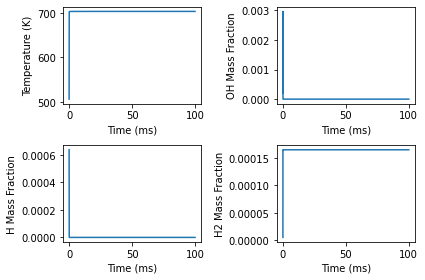

In [4]:
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.Y[:, gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mass Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.Y[:, gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mass Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.Y[:, gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mass Fraction')
plt.tight_layout()
plt.show()

In [5]:
XData0 = np.concatenate([[T0],Y0], axis=0)
XData  = np.concatenate([states.T[...,np.newaxis],states.Y], axis=1)
XData  = np.concatenate([[XData0],XData], axis=0)

In [6]:
len(states.T)

100023

In [7]:
XData[-1,:]

array([7.03152070e+02, 1.64970126e-04, 1.49707297e-13, 1.26913410e-13,
       2.16699338e-01, 9.41881578e-12, 6.46195223e-03, 8.59769437e-07,
       3.83220904e-04, 4.39743752e-37, 8.55930413e-29, 2.07167782e-18,
       2.40352809e-19, 8.34679262e-09, 5.32059201e-02, 1.02760414e-03,
       2.44264983e-04, 2.34721743e-13, 7.29181211e-04, 1.58654023e-14,
       8.91051309e-11, 7.41238936e-04, 1.50416944e-22, 4.46281782e-08,
       2.95486602e-16, 3.73329993e-05, 7.63241930e-13, 1.94669061e-04,
       1.72953634e-17, 2.03990291e-07, 3.48913567e-13, 9.21047463e-28,
       4.88074463e-23, 2.95438849e-20, 2.67620188e-15, 4.61153209e-19,
       6.43414677e-14, 5.72590622e-10, 3.56726408e-12, 2.91405297e-20,
       8.27158356e-25, 1.28382717e-10, 1.63032469e-19, 1.00532011e-29,
       4.15232441e-13, 4.92215419e-16, 2.85461380e-12, 2.02513338e-19,
       7.20107902e-01, 0.00000000e+00, 5.19305695e-12, 5.96714452e-07,
       2.57474216e-14, 6.90661701e-07])

In [8]:
dydt

array([ 1.18047139e-01, -5.43917289e-08, -3.10876963e-13, -2.38222614e-13,
       -1.28966784e-05, -2.20101962e-11,  7.88306951e-06, -5.38358983e-06,
        7.26368133e-06, -5.36209677e-29, -2.32749069e-28,  9.40547244e-20,
        5.48341999e-19,  1.99183871e-08, -4.31014906e-06,  7.27648990e-06,
        1.99664362e-07, -9.48715831e-13,  2.24371578e-07, -3.85544679e-14,
       -3.39982579e-10, -2.72969172e-07, -3.51376530e-22,  5.61885182e-11,
       -2.13137991e-16,  1.11231956e-07, -1.44929791e-12, -5.27842474e-08,
       -4.03414333e-17, -2.74728070e-10,  1.89212926e-15,  4.83519515e-27,
       -6.32267259e-23, -6.59280613e-20,  1.15791069e-17, -9.56932242e-19,
        3.37563639e-13, -5.17545514e-13,  1.30779589e-14, -2.94456112e-20,
       -1.93388746e-24, -3.67888413e-17, -3.39801199e-19, -3.13324672e-29,
       -9.74808184e-17,  2.39351454e-18,  1.21115766e-16, -4.79342767e-19,
       -8.32311141e-15,  0.00000000e+00,  1.46587635e-11, -1.67520017e-10,
       -2.24028394e-14, -